In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from tqdm import tqdm
from data.pdbbind import PDBBindMetadataProcessor
from chembl_connector import ChEMBLConnector
from torch.utils.data import ConcatDataset
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles, MakeScaffoldGeneric, GetScaffoldForMol
from similarity_search import SimilaritySearch

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, '__version__') or LooseVersion(tensorboard.__version__) < LooseVersion('1.15'):
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, '__version__') or LooseVersion(tensorboard.__version__) < LooseVersion('1.15'):


In [2]:
pmp = PDBBindMetadataProcessor(root='../hdd/PDBBind')
pdbbind_table = pmp.get_master_dataframe()

In [3]:
chembl_table = ChEMBLConnector().get_target_table(level=3)
merged_table = pdbbind_table.merge(chembl_table, left_on='Uniprot ID', right_on='accession')

In [4]:
root = '../hdd/pdbbind_bioactive/data'
cel_df_path = os.path.join(root, 'pdb_conf_ensembles', 'ensemble_names.csv')
cel_df = pd.read_csv(cel_df_path)
cel_df.head()

ensemble_name                                             smiles filename
0           VWW  N[C@@H](CCC(=O)N[C@@H](CSCc1ccccc1)C(=O)N[C@@H...    0.sdf
1           SAS   O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O    1.sdf
2           BIS  Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO[P@@](=O)(O)O[P@...    2.sdf
3           I4B                                     CC(C)Cc1ccccc1    3.sdf
4           IND                                   c1ccc2[nH]ccc2c1    4.sdf

In [5]:
pdbbind_cel_df = pd.read_csv(os.path.join(root, 'pdbbind_df.csv'))
pdbbind_cel_df.head()

ligand_name pdb_id
0         VWW   10gs
1         SAS   13gs
2         BIS   16pk
3         I4B   184l
4         IND   185l

In [6]:
%%time
ss = SimilaritySearch(smiles_list=cel_df['smiles'].values)

Similarity matrix ready
CPU times: user 20.9 s, sys: 251 ms, total: 21.1 s
Wall time: 20.5 s


  2%|▋                                          | 5/313 [00:00<00:07, 43.86it/s]

P00918
['CARBONIC ANHYDRASE 2' 'CARBONIC ANHYDRASE IX-MIMIC']


100%|█████████████████████████████████████████| 313/313 [00:04<00:00, 68.74it/s]


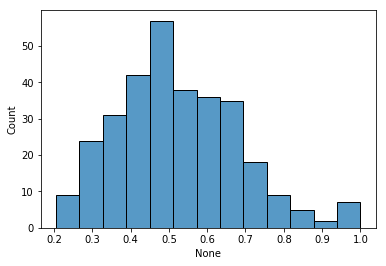

  6%|██▍                                      | 12/201 [00:00<00:01, 109.82it/s]

0.5249825010800797
P56817
['BETA-SECRETASE 1' 'BETA-SECRETASE-1']


100%|████████████████████████████████████████| 201/201 [00:01<00:00, 113.77it/s]


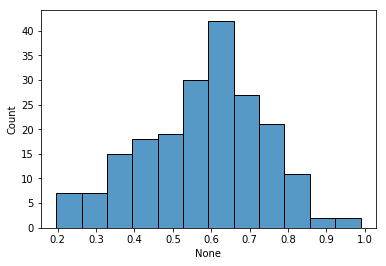

  8%|███▏                                     | 13/168 [00:00<00:01, 120.64it/s]

0.5805450095536264
P24941
['CELL DIVISION PROTEIN KINASE 2' 'CYCLIN-DEPENDENT KINASE 2']


100%|████████████████████████████████████████| 168/168 [00:01<00:00, 102.70it/s]


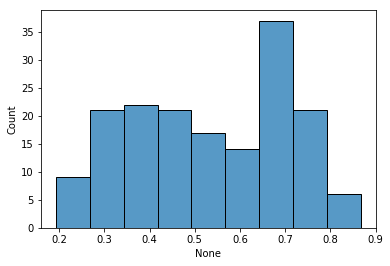

  9%|███▋                                     | 14/157 [00:00<00:01, 131.19it/s]

0.53170028535268
O60885
['BROMODOMAIN-CONTAINING PROTEIN 4' 'BROMODOMAIN-CONTAINING PROTEIN 2']


100%|████████████████████████████████████████| 157/157 [00:01<00:00, 121.34it/s]


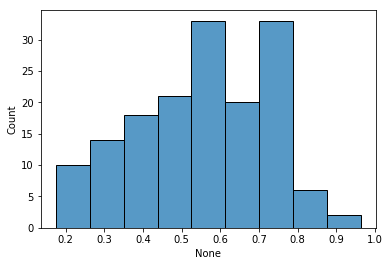

  9%|███▌                                     | 12/140 [00:00<00:01, 119.33it/s]

0.5473262450297385
P07900
['HEAT SHOCK PROTEIN HSP90-ALPHA' 'HEAT SHOCK PROTEIN HSP 90-ALPHA']


100%|█████████████████████████████████████████| 140/140 [00:01<00:00, 87.11it/s]


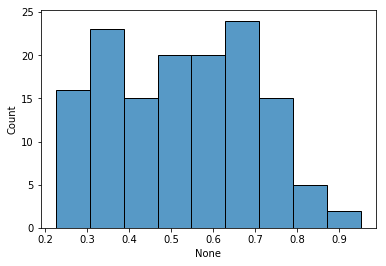

 10%|███▉                                     | 13/135 [00:00<00:00, 124.70it/s]

0.525734788056265
P00734
['THROMBIN' 'THROMBIN ALPHA' 'PROTHROMBIN' 'THROMBIN LIGHT CHAIN'
 'THROMBIN HEAVY CHAIN' 'THROMBIN ALPHA (SMALL SUBUNIT)'
 'THROMBIN SHORT CHAIN']


100%|████████████████████████████████████████| 135/135 [00:00<00:00, 137.94it/s]


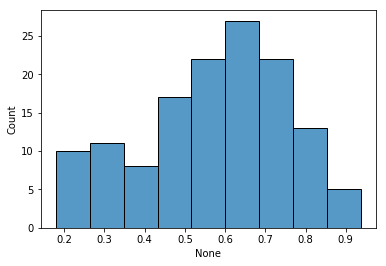

  8%|███▎                                       | 9/119 [00:00<00:01, 87.25it/s]

0.5783544722965857
Q16539
['MITOGEN-ACTIVATED PROTEIN KINASE 14'
 'MITOGEN-ACTIVATED PROTEIN KINASE P38']


100%|████████████████████████████████████████| 119/119 [00:00<00:00, 121.90it/s]


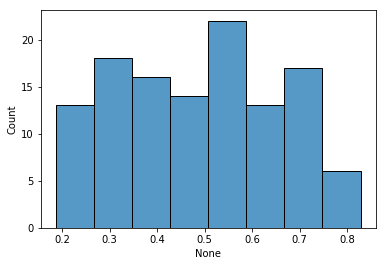

 40%|████████████████▊                         | 22/55 [00:00<00:00, 213.56it/s]

0.48944386301520654
O60674
['TYROSINE-PROTEIN KINASE JAK2']


100%|██████████████████████████████████████████| 55/55 [00:00<00:00, 181.76it/s]


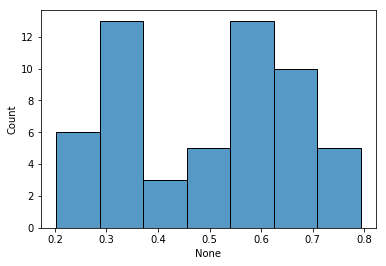

 18%|███████▋                                  | 14/77 [00:00<00:00, 133.15it/s]

0.5043178729149288
P03366
['REVERSE TRANSCRIPTASE/RIBONUCLEASE H'
 'HIV-1 REVERSE TRANSCRIPTASE/RIBONUCLEASE H'
 'HIV-1 REVERSE TRANSCRIPTASE P66 SUBUNIT' 'HIV-1 PROTEASE'
 'HIV-1 REVERSE TRANSCRIPTASE' 'HIV-1 INTEGRASE' 'P66 RT'
 'HIV-1 REVERSE TRANSCRIPTASE, P66 SUBUNIT' 'PROTEASE']


100%|██████████████████████████████████████████| 77/77 [00:00<00:00, 128.40it/s]


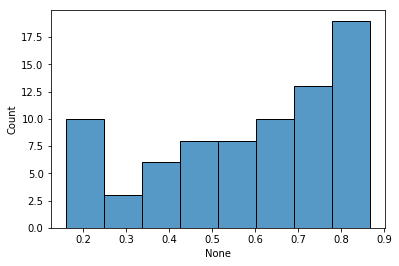

 22%|█████████▏                                | 20/92 [00:00<00:00, 196.97it/s]

0.587242456920357
Q9H2K2
['TANKYRASE-2']


100%|██████████████████████████████████████████| 92/92 [00:00<00:00, 175.81it/s]


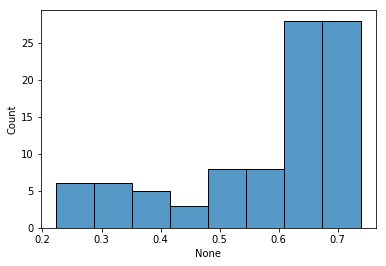

100%|██████████████████████████████████████████| 22/22 [00:00<00:00, 314.03it/s]


0.5809321584518559
O75164
['HISTONE DEMETHYLATION PROTEIN' 'LYSINE-SPECIFIC DEMETHYLASE 4A'
 'LYSINE-SPECIFIC DEMETHYLASE']


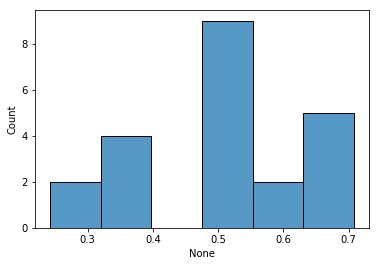

 44%|██████████████████▌                       | 26/59 [00:00<00:00, 253.34it/s]

0.4984652594995688
P00489
['GLYCOGEN PHOSPHORYLASE' 'GLYCOGEN PHOSPHORYLASE B']


100%|██████████████████████████████████████████| 59/59 [00:00<00:00, 252.31it/s]


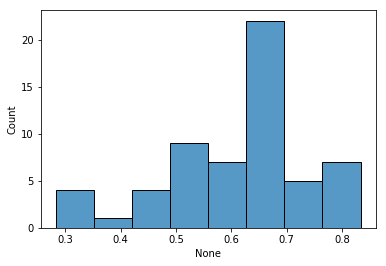

 24%|██████████▏                               | 21/87 [00:00<00:00, 201.85it/s]

0.6166105997925652
P00742
['COAGULATION FACTOR XA' 'COAGULATION FACTOR X'
 'COAGULATION FACTOR X (HEAVY CHAIN)' 'COAGULATION FACTOR X, HEAVY CHAIN'
 'COAGULATION FACTOR XA, HEAVY CHAIN' 'COAGULATION FACTOR X, LIGHT CHAIN'
 'COAGULATION FACTOR X LIGHT CHAIN' 'COAGULATION FACTOR X HEAVY CHAIN']


100%|██████████████████████████████████████████| 87/87 [00:00<00:00, 191.24it/s]


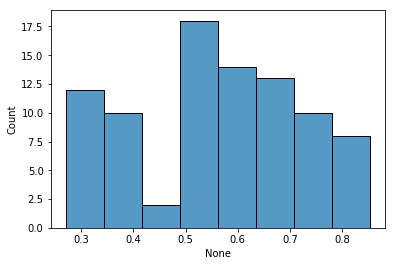

100%|██████████████████████████████████████████| 29/29 [00:00<00:00, 293.98it/s]


0.5649788314216163
P55201
['PEREGRIN']


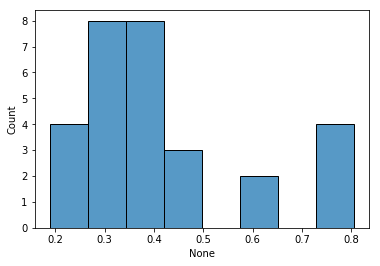

 17%|███████                                   | 13/77 [00:00<00:00, 120.19it/s]

0.42128439616663366
O14965
['AURORA KINASE A' 'SERINE/THREONINE-PROTEIN KINASE 6'
 'AURORA 2 KINASE DOMAIN' 'SERINE THREONINE-PROTEIN KINASE 6']


100%|██████████████████████████████████████████| 77/77 [00:00<00:00, 137.10it/s]


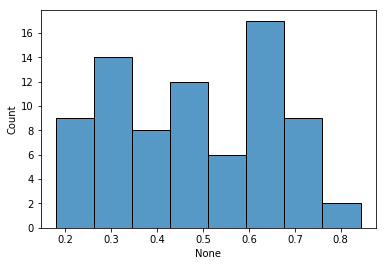

 14%|██████                                    | 13/91 [00:00<00:00, 126.51it/s]

0.4808340385876614
P34913
['BIFUNCTIONAL EPOXIDE HYDROLASE 2' 'EPOXIDE HYDROLASE 2']


100%|██████████████████████████████████████████| 91/91 [00:00<00:00, 125.08it/s]


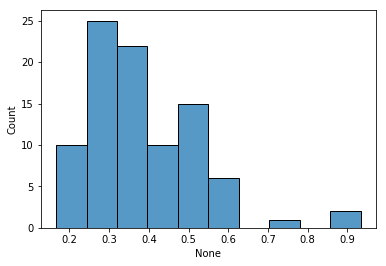

 28%|███████████▉                              | 21/74 [00:00<00:00, 208.42it/s]

0.3851052486933313
O14757
['SERINE/THREONINE-PROTEIN KINASE CHK1']


100%|██████████████████████████████████████████| 74/74 [00:00<00:00, 213.61it/s]


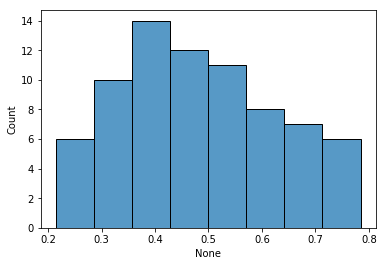

 28%|███████████▊                              | 21/75 [00:00<00:00, 206.20it/s]

0.48844400889826695
P18031
['PROTEIN-TYROSINE PHOSPHATASE 1B'
 'PROTEIN-TYROSINE PHOSPHATASE, NON-RECEPTOR TYPE 1'
 'PROTEIN-TYROSINE PHOSPHATASE'
 'TYROSINE-PROTEIN PHOSPHATASE, NON-RECEPTOR TYPE 1']


100%|██████████████████████████████████████████| 75/75 [00:00<00:00, 201.05it/s]


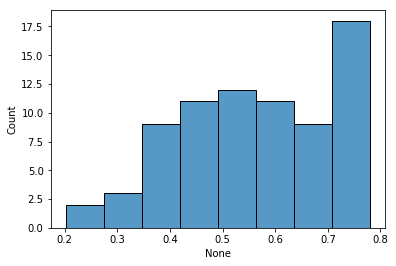

100%|██████████████████████████████████████████| 43/43 [00:00<00:00, 290.57it/s]

0.5639813582330391
Q6XEC0
['BETA-LACTAMASE']


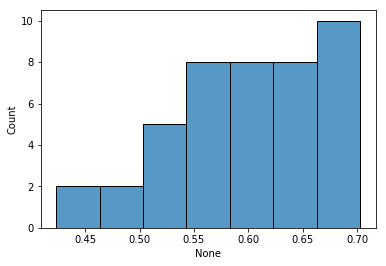

 32%|█████████████▌                            | 23/71 [00:00<00:00, 224.61it/s]

0.6015541368859666
P11309
['SERINE/THREONINE-PROTEIN KINASE PIM'
 'SERINE/THREONINE PROTEIN KINASE PIM' 'SERINE/THREONINE-PROTEIN KINASE'
 'SERINE/THREONINE-PROTEIN KINASE PIM-1'
 'PROTO-ONCOGENE SERINE/THREONINE-PROTEIN KINASE PIM']


100%|██████████████████████████████████████████| 71/71 [00:00<00:00, 181.71it/s]


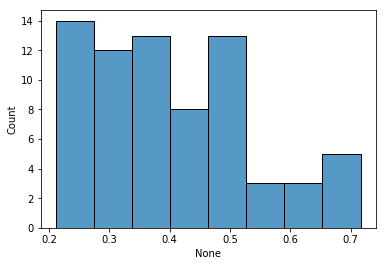

100%|██████████████████████████████████████████| 43/43 [00:00<00:00, 275.60it/s]

0.40642745287539106
P03367
['HIV-1 PROTEASE' 'PROTEASE RETROPEPSIN']


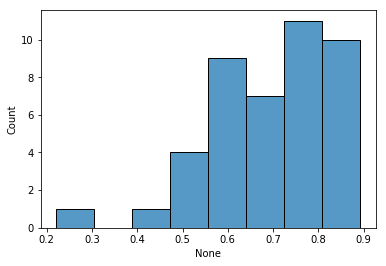

100%|██████████████████████████████████████████| 37/37 [00:00<00:00, 306.24it/s]

0.6922069061435848
Q92793
['CREB-BINDING PROTEIN']


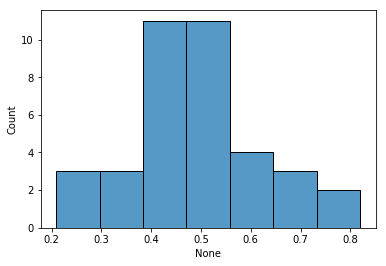

  0%|                                                    | 0/56 [00:00<?, ?it/s]

0.48903727108757755
P00533
['EPIDERMAL GROWTH FACTOR RECEPTOR']


100%|██████████████████████████████████████████| 56/56 [00:00<00:00, 234.22it/s]


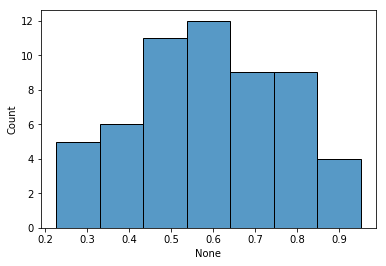

 30%|████████████▋                             | 20/66 [00:00<00:00, 197.67it/s]

0.5873877296600986
Q9Y233
["CGMP 3',5'-CYCLIC PHOSPHODIESTERASE"
 "CAMP AND CAMP-INHIBITED CGMP 3',5'-CYCLIC PHOSPHODIESTERASE"
 'PHOSPHODIESTERASE-10A']


100%|██████████████████████████████████████████| 66/66 [00:00<00:00, 212.64it/s]


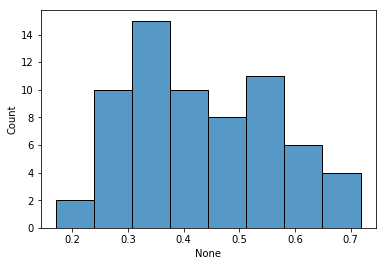

 38%|███████████████▊                          | 23/61 [00:00<00:00, 224.00it/s]

0.431411285207531
P27487
['DIPEPTIDYL PEPTIDASE 4']


100%|██████████████████████████████████████████| 61/61 [00:00<00:00, 223.38it/s]


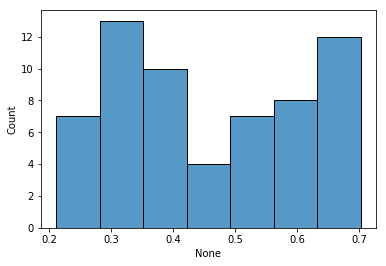

 41%|█████████████████▍                        | 24/58 [00:00<00:00, 235.83it/s]

0.4593656034072092
P00811
['BETA-LACTAMASE' 'CEPHALOSPORINASE']


100%|██████████████████████████████████████████| 58/58 [00:00<00:00, 238.38it/s]


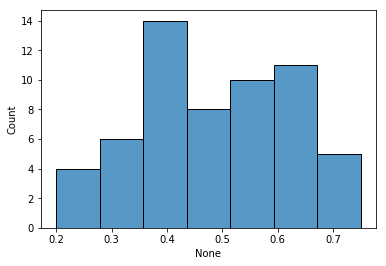

100%|██████████████████████████████████████████| 26/26 [00:00<00:00, 213.61it/s]


0.48589335400780104
P52333
['TYROSINE-PROTEIN KINASE JAK3']


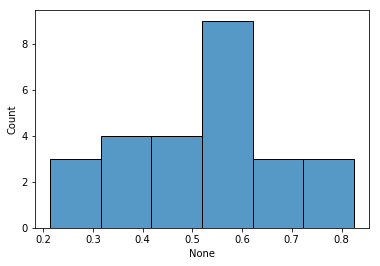

  0%|                                                    | 0/33 [00:00<?, ?it/s]

0.5275623001157463
P19491
['GLUTAMATE RECEPTOR 2']


100%|██████████████████████████████████████████| 33/33 [00:00<00:00, 336.34it/s]


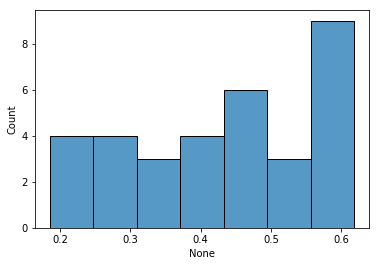

  0%|                                                    | 0/53 [00:00<?, ?it/s]

0.43556710323467596
P00797
['RENIN']


100%|██████████████████████████████████████████| 53/53 [00:00<00:00, 174.72it/s]


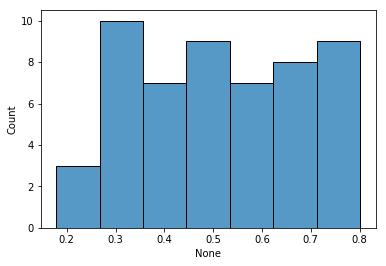

 30%|████████████▋                             | 16/53 [00:00<00:00, 157.25it/s]

0.5164349181703608
P02766
['TRANSTHYRETIN']


100%|██████████████████████████████████████████| 53/53 [00:00<00:00, 162.85it/s]


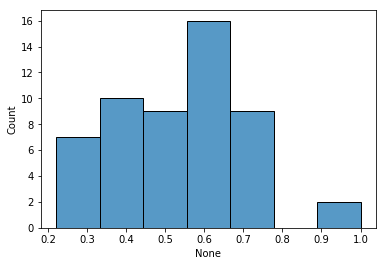

 29%|████████████                              | 16/56 [00:00<00:00, 153.51it/s]

0.5371742687909473
P00749
['UROKINASE-TYPE PLASMINOGEN ACTIVATOR'
 'UROKINASE-TYPE PLASMINOGEN ACTIVATOR CHAIN B']


100%|██████████████████████████████████████████| 56/56 [00:00<00:00, 153.99it/s]


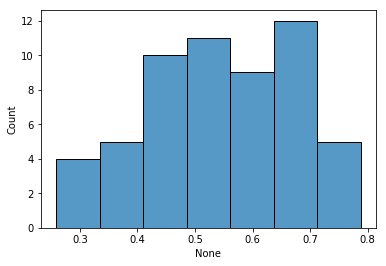

 31%|████████████▉                             | 16/52 [00:00<00:00, 154.32it/s]

0.5453670720027691
P48736
['PHOSPHATIDYLINOSITOL-4,5-BISPHOSPHATE 3-KINASE']


100%|██████████████████████████████████████████| 52/52 [00:00<00:00, 153.32it/s]


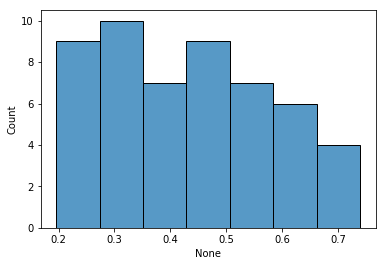

 31%|████████████▉                             | 17/55 [00:00<00:00, 160.23it/s]

0.4350682806094375
P51449
['NUCLEAR RECEPTOR ROR-GAMMA']


100%|██████████████████████████████████████████| 55/55 [00:00<00:00, 159.79it/s]


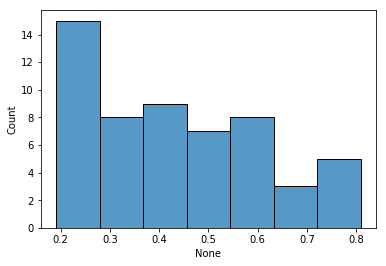

 33%|█████████████▋                            | 16/49 [00:00<00:00, 153.76it/s]

0.44080726031745227
P37231
['PEROXISOME PROLIFERATOR-ACTIVATED RECEPTOR GAMMA']


100%|██████████████████████████████████████████| 49/49 [00:00<00:00, 189.41it/s]


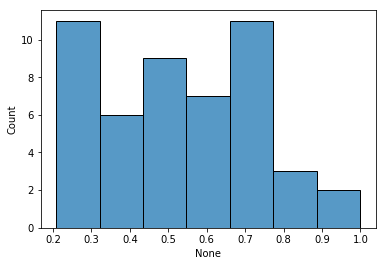

100%|██████████████████████████████████████████| 23/23 [00:00<00:00, 358.42it/s]


0.5274938827958568
P29375
['LYSINE-SPECIFIC DEMETHYLASE 5A'
 'LYSINE-SPECIFIC DEMETHYLASE 5A, LINKED KDM5A JMJ DOMAIN'
 'LINKED KDM5A JMJ DOMAIN']


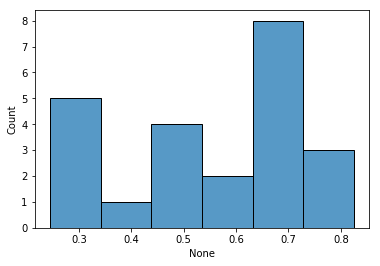

  0%|                                                    | 0/43 [00:00<?, ?it/s]

0.5505261376536417
P68400
['CASEIN KINASE II, ALPHA SUBUNIT' 'CASEIN KINASE II, SUBUNIT ALPHA'
 'CASEIN KINASE II SUBUNIT ALPHA']


100%|██████████████████████████████████████████| 43/43 [00:00<00:00, 273.22it/s]


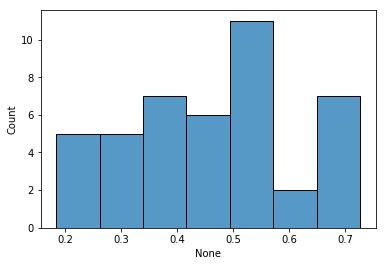

100%|██████████████████████████████████████████| 46/46 [00:00<00:00, 292.59it/s]

0.46593141883381217
P08581
['HEPATOCYTE GROWTH FACTOR RECEPTOR']


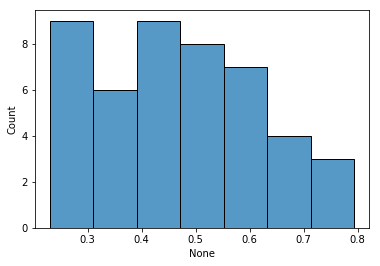

100%|██████████████████████████████████████████| 41/41 [00:00<00:00, 291.84it/s]

0.46941625426188904
Q04609
['GLUTAMATE CARBOXYPEPTIDASE 2']


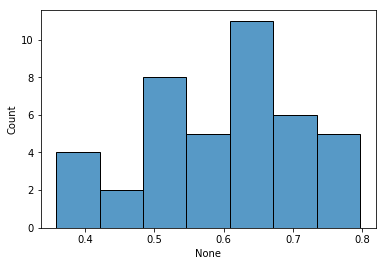

100%|██████████████████████████████████████████| 45/45 [00:00<00:00, 310.07it/s]

0.602932395246595
Q08499
["CAMP-SPECIFIC 3',5'-CYCLIC PHOSPHODIESTERASE 4D"
 'CAMP-SPECIFIC PHOSPHODIESTERASE PDE4D2']


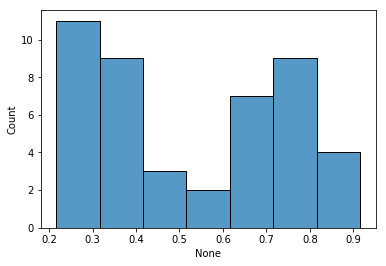

100%|██████████████████████████████████████████| 45/45 [00:00<00:00, 285.82it/s]

0.525822214864228
Q00987
['E3 UBIQUITIN-PROTEIN LIGASE MDM2']


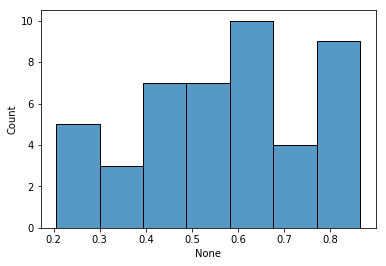

100%|██████████████████████████████████████████| 45/45 [00:00<00:00, 272.06it/s]

0.5620815082931233
P03372
['ESTROGEN RECEPTOR' 'ESTROGEN RECEPTOR ALPHA']


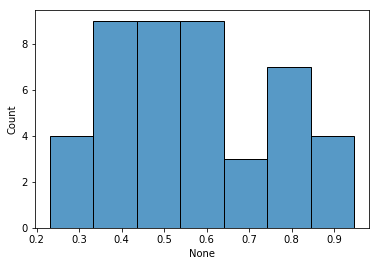

100%|██████████████████████████████████████████| 42/42 [00:00<00:00, 214.80it/s]

0.5598921170288617
P04585
['HIV-1 REVERSE TRANSCRIPTASE'
 'HIV-1 REVERSE TRANSCRIPTASE/RIBONUCLEASE H'
 'HIV-1 REVERSE TRANSCRIPTASE, CHAIN A' 'HIV-1 REVERSE TRANSCRIPTASE P66'
 'HIV-1 PROTEASE' 'HIV-1 REVERSE TRANSCRIPTASE, A-CHAIN']


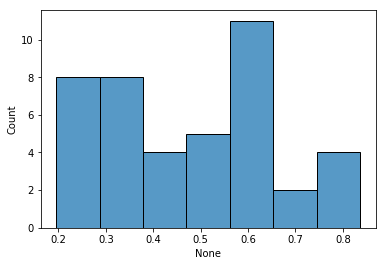

 39%|████████████████▏                         | 17/44 [00:00<00:00, 168.41it/s]

0.47648602678502494
P00517
['CAMP-DEPENDENT PROTEIN KINASE, ALPHA-CATALYTIC'
 'CAMP-DEPENDENT PROTEIN KINASE'
 'CAMP-DEPENDENT PROTEIN KINASE CATALYTIC SUBUNIT ALPHA']


100%|██████████████████████████████████████████| 44/44 [00:00<00:00, 165.48it/s]


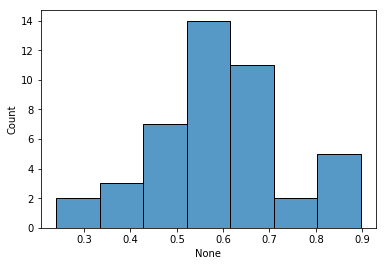

 36%|███████████████▏                          | 17/47 [00:00<00:00, 168.45it/s]

0.5895723913681982
P28482
['MITOGEN-ACTIVATED PROTEIN KINASE 1' 'EXTRACELLULAR REGULATED KINASE 2']


100%|██████████████████████████████████████████| 47/47 [00:00<00:00, 198.15it/s]


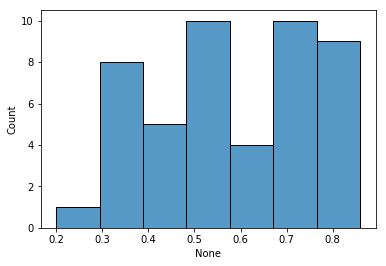

100%|██████████████████████████████████████████| 22/22 [00:00<00:00, 347.74it/s]


0.5860179367993978
P23458
['TYROSINE-PROTEIN KINASE JAK1']


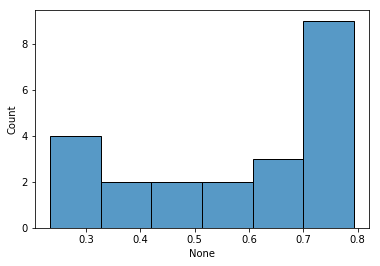

  0%|                                                    | 0/37 [00:00<?, ?it/s]

0.5772328681705946
Q06187
['TYROSINE-PROTEIN KINASE BTK' "BRUTON'S TYROSINE KINASE"
 'YROSINE-PROTEIN KINASE BTK']


100%|██████████████████████████████████████████| 37/37 [00:00<00:00, 316.07it/s]


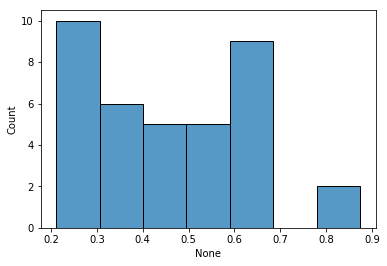

  0%|                                                    | 0/37 [00:00<?, ?it/s]

0.4518035529743823
P39900
['MACROPHAGE METALLOELASTASE (MMP-12)' 'MACROPHAGE METALLOELASTASE']


100%|██████████████████████████████████████████| 37/37 [00:00<00:00, 293.45it/s]


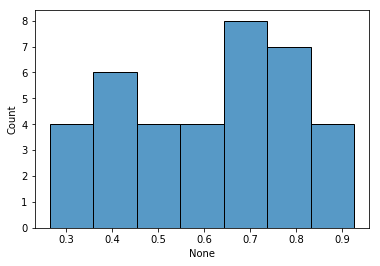

100%|██████████████████████████████████████████| 42/42 [00:00<00:00, 283.10it/s]

0.6111137559725799
P14324
['FARNESYL PYROPHOSPHATE SYNTHASE' 'FARNESYL DIPHOSPHATE SYNTHASE'
 'FARNESYL PYROPHOSPHATE SYNTHETASE']


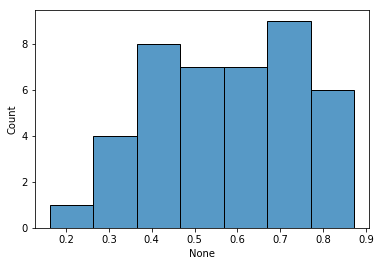

100%|██████████████████████████████████████████| 36/36 [00:00<00:00, 296.74it/s]


0.5704528444417074
P33981
['DUAL SPECIFICITY PROTEIN KINASE TTK' 'MONOPOLAR SPINDLE KINASE 1']


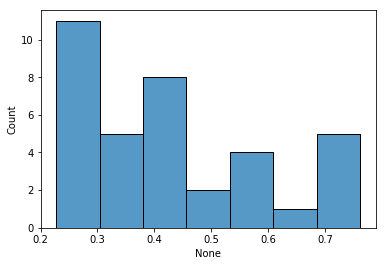

  0%|                                                    | 0/42 [00:00<?, ?it/s]

0.4325048117216481
P43405
['TYROSINE-PROTEIN KINASE SYK' 'SPLEEN TYROSINE KINASE']


100%|██████████████████████████████████████████| 42/42 [00:00<00:00, 247.96it/s]


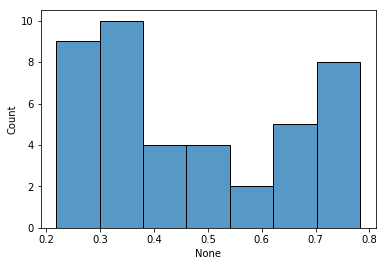

100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 238.49it/s]


0.4737348278743622
Q9UIF8
['BROMODOMAIN ADJACENT TO ZINC FINGER DOMAIN PROTEIN 2B']


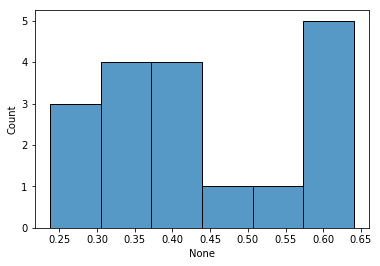

  0%|                                                    | 0/40 [00:00<?, ?it/s]

0.43781761444438005
P03951
['COAGULATION FACTOR XI' 'COAGULATION FACTOR XIA']


100%|██████████████████████████████████████████| 40/40 [00:00<00:00, 178.06it/s]


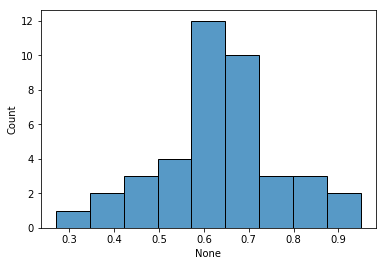

100%|██████████████████████████████████████████| 36/36 [00:00<00:00, 291.72it/s]


0.6328067259839572
P15056
['SERINE/THREONINE-PROTEIN KINASE B-RAF'
 'B-RAF PROTO-ONCOGENE SERINE/THREONINE-PROTEIN KINASE']


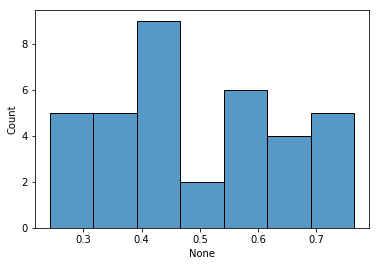

  0%|                                                    | 0/28 [00:00<?, ?it/s]

0.4971081792638403
P49841
['GLYCOGEN SYNTHASE KINASE-3 BETA']


100%|██████████████████████████████████████████| 28/28 [00:00<00:00, 317.63it/s]


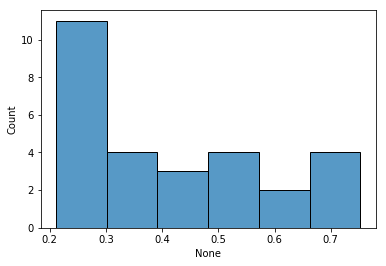

  0%|                                                    | 0/43 [00:00<?, ?it/s]

0.40957640642011556
Q96RI1
['BILE ACID RECEPTOR']


100%|██████████████████████████████████████████| 43/43 [00:00<00:00, 265.51it/s]


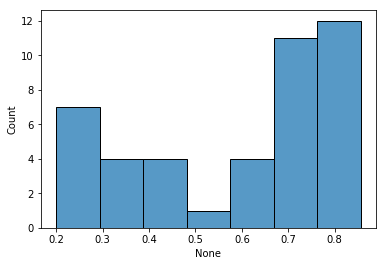

100%|██████████████████████████████████████████| 32/32 [00:00<00:00, 304.96it/s]


0.5910982083148646
P61823
['RIBONUCLEASE' 'RIBONUCLEASE A' 'RIBONUCLEASE PANCREATIC']


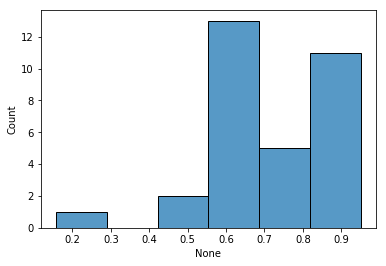

  0%|                                                    | 0/43 [00:00<?, ?it/s]

0.7042967591067804
P08709
['COAGULATION FACTOR VIIA (HEAVY CHAIN)' 'COAGULATION FACTOR VIIA'
 'COAGULATION FACTOR VII' 'COAGULATION FACTOR VII LIGHT CHAIN'
 'COAGULATION FACTOR VII PRECURSOR' 'COAGULATION FACTOR VII (HEAVY CHAIN)'
 'COAGULATION FACTOR VIIA HEAVY CHAIN']


100%|██████████████████████████████████████████| 43/43 [00:00<00:00, 267.84it/s]


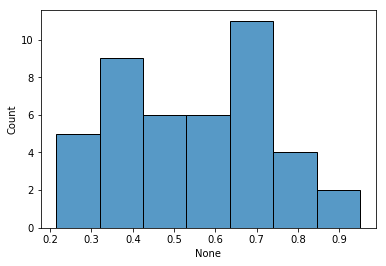

100%|██████████████████████████████████████████| 23/23 [00:00<00:00, 362.51it/s]


0.5523545403077433
P04058
['ACETYLCHOLINESTERASE']


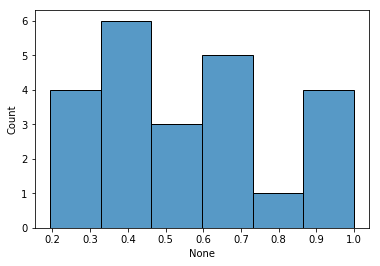

  0%|                                                    | 0/35 [00:00<?, ?it/s]

0.5413404682774489
P53779
['MITOGEN-ACTIVATED PROTEIN KINASE 10' 'C-JUN N-TERMINAL KINASE 3']


100%|██████████████████████████████████████████| 35/35 [00:00<00:00, 189.01it/s]


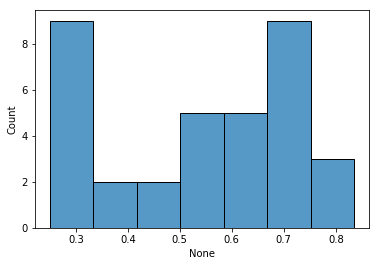

100%|██████████████████████████████████████████| 34/34 [00:00<00:00, 197.69it/s]

0.5442890038971598
O15530
['3-PHOSPHOINOSITIDE-DEPENDENT PROTEIN KINASE 1'
 '3-PHOSPHOINOSITIDE DEPENDENT PROTEIN KINASE-1']


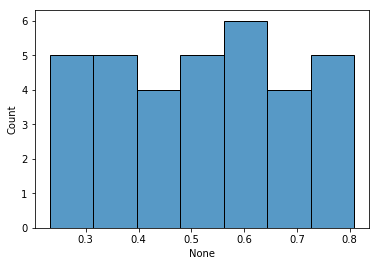

 49%|████████████████████▍                     | 19/39 [00:00<00:00, 186.62it/s]

0.5248902392140277
Q07820
['INDUCED MYELOID LEUKEMIA CELL DIFFERENTIATION PROTEIN MCL'
 'INDUCED MYELOID LEUKEMIA CELL DIFFERENTIATION PROTEIN MCL-1']


100%|██████████████████████████████████████████| 39/39 [00:00<00:00, 187.78it/s]


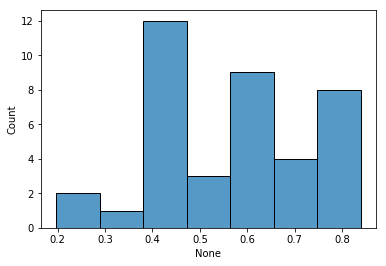

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 276.25it/s]


0.5753922752874221
P62593
['BETA-LACTAMASE TEM' 'BETA-LACTAMASE TEM-1']


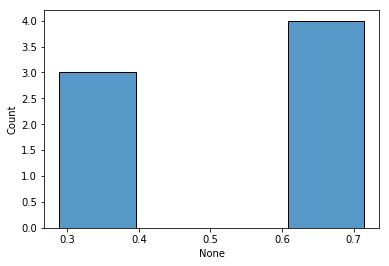

  0%|                                                    | 0/23 [00:00<?, ?it/s]

0.5120412058904977
P21836
['ACETYLCHOLINESTERASE']


100%|██████████████████████████████████████████| 23/23 [00:00<00:00, 247.24it/s]


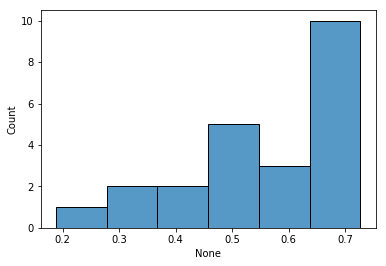

0.5581702633078394
P28720
['QUEUINE TRNA-RIBOSYLTRANSFERASE' 'TRNA GUANINE TRANSGLYCOSYLASE']


100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 239.85it/s]


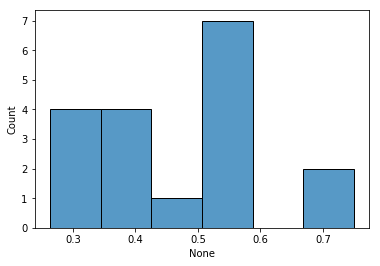

  0%|                                                    | 0/18 [00:00<?, ?it/s]

0.4768770184019597
P29597
['NON-RECEPTOR TYROSINE-PROTEIN KINASE TYK2']


100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 239.96it/s]


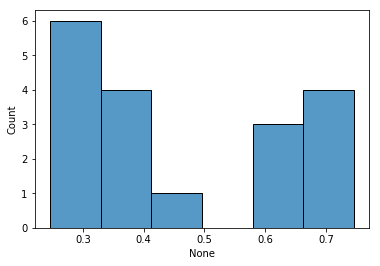

  0%|                                                    | 0/35 [00:00<?, ?it/s]

0.4695329577759716
P45452
['COLLAGENASE 3' 'COLLAGENASE 3 (MMP-13)']


100%|██████████████████████████████████████████| 35/35 [00:00<00:00, 189.97it/s]


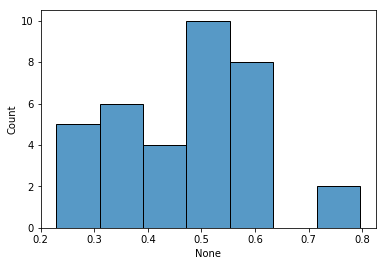

100%|██████████████████████████████████████████| 36/36 [00:00<00:00, 182.22it/s]

0.46823870677911544
P09960
['LEUKOTRIENE A-4 HYDROLASE']


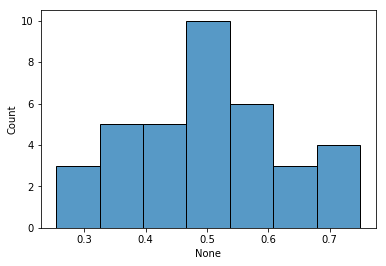

100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 237.97it/s]


0.4959170198326649
P03369
["[AIB51/51']HIV-1 PROTEASE" 'HIV-1 PROTEASE'
 "[D-ALA51/51']HIV-1 PROTEASE" 'GLY51;AIB51]HIV-1 PROTEASE'
 "[L-ALA51/51']HIV-1 PROTEASE"
 "COVALENT DIMER [GLY51/D-ALA51'] HIV-1 PROTEASE"
 "L-ALA51;GLY51']HIV-1 PROTEASE"
 "COVALENT DIMER [L-ALA51, D-ALA51'] HIV-1 PROTEASE"
 'PROTEASE RETROPEPSIN']


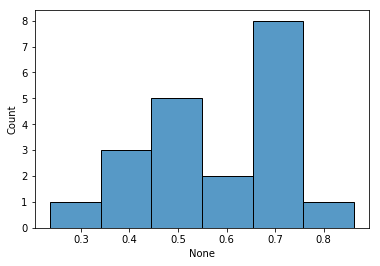

  0%|                                                    | 0/22 [00:00<?, ?it/s]

0.5933073296086022
P52732
['KINESIN-LIKE PROTEIN KIF11' 'KINESIN-RELATED MOTOR PROTEIN EG5']


100%|██████████████████████████████████████████| 22/22 [00:00<00:00, 238.04it/s]


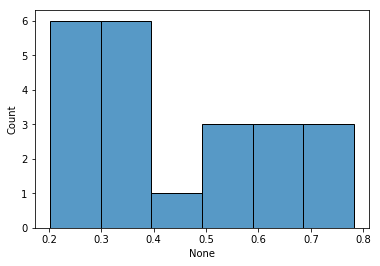

0.4473993943427846
Q9UM73


100%|██████████████████████████████████████████| 21/21 [00:00<00:00, 232.72it/s]


['ALK TYROSINE KINASE RECEPTOR']


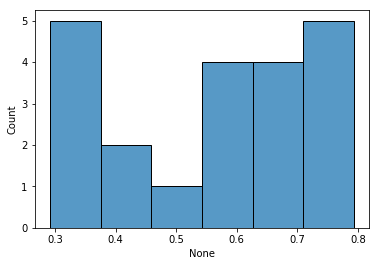

  0%|                                                    | 0/13 [00:00<?, ?it/s]

0.5701410112615417
P43235
['CATHEPSIN K']


100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 242.58it/s]


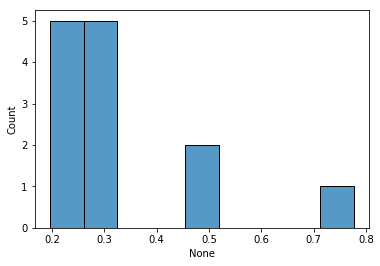

  0%|                                                    | 0/34 [00:00<?, ?it/s]

0.3352097447947187
Q15370
['TRANSCRIPTION ELONGATION FACTOR B POLYPEPTIDE 2' 'ELONGIN-B']


100%|██████████████████████████████████████████| 34/34 [00:00<00:00, 190.93it/s]


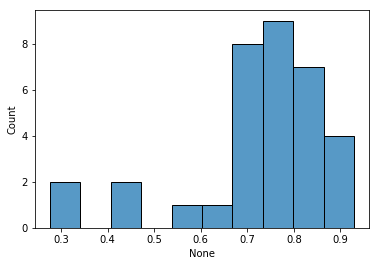

100%|██████████████████████████████████████████| 25/25 [00:00<00:00, 341.38it/s]

0.7200999144129265
P00523
['PROTO-ONCOGENE TYROSINE-PROTEIN KINASE SRC'
 'TYROSINE-PROTEIN KINASE SRC']


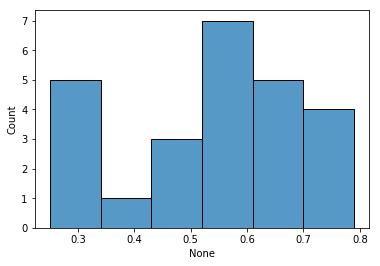

  0%|                                                    | 0/29 [00:00<?, ?it/s]

0.5425538848430844
P17931
['GALECTIN-3']


100%|██████████████████████████████████████████| 29/29 [00:00<00:00, 307.04it/s]


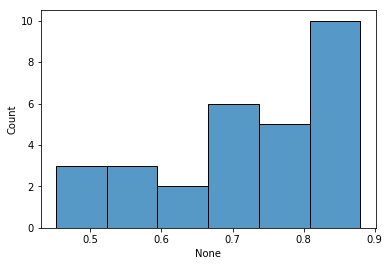

  0%|                                                    | 0/25 [00:00<?, ?it/s]

0.7230714562137093
P61964
['WD REPEAT-CONTAINING PROTEIN 5']


100%|██████████████████████████████████████████| 25/25 [00:00<00:00, 324.26it/s]


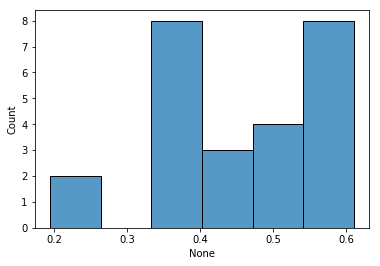

  0%|                                                    | 0/28 [00:00<?, ?it/s]

0.4635376282366245
O00408
["CGMP-DEPENDENT 3',5'-CYCLIC PHOSPHODIESTERASE"]


100%|██████████████████████████████████████████| 28/28 [00:00<00:00, 329.52it/s]


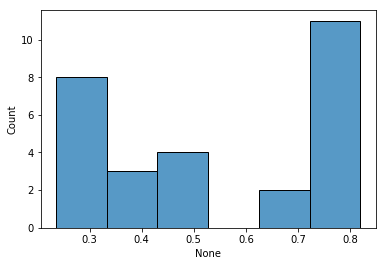

  0%|                                                    | 0/31 [00:00<?, ?it/s]

0.5473474403623604
Q9NWZ3
['INTERLEUKIN-1 RECEPTOR-ASSOCIATED KINASE 4']


100%|██████████████████████████████████████████| 31/31 [00:00<00:00, 316.29it/s]


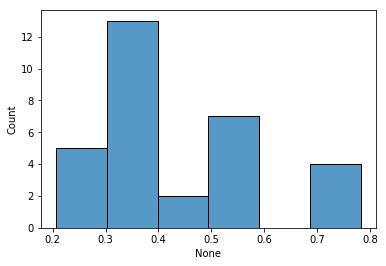

  0%|                                                    | 0/26 [00:00<?, ?it/s]

0.4351184023221966
P00800
['THERMOLYSIN']


100%|██████████████████████████████████████████| 26/26 [00:00<00:00, 332.35it/s]


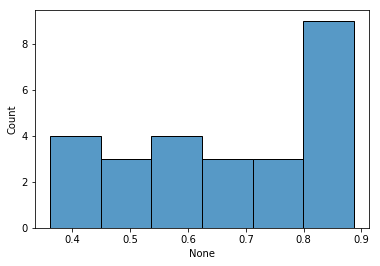

  0%|                                                    | 0/30 [00:00<?, ?it/s]

0.6648244456475242
P04637
['CELLULAR TUMOR ANTIGEN P53']


100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 336.86it/s]


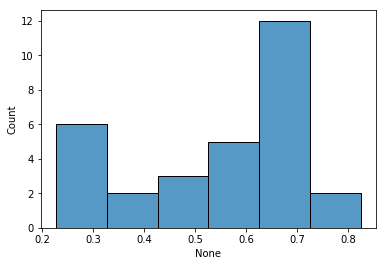

  0%|                                                    | 0/21 [00:00<?, ?it/s]

0.5545282487807294
O96017
['SERINE/THREONINE-PROTEIN KINASE CHK2']


100%|██████████████████████████████████████████| 21/21 [00:00<00:00, 353.76it/s]


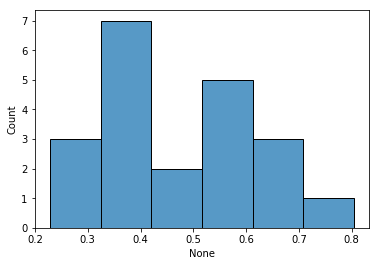

  0%|                                                    | 0/24 [00:00<?, ?it/s]

0.48097862710133343
P36639
['7,8-DIHYDRO-8-OXOGUANINE TRIPHOSPHATASE']


100%|██████████████████████████████████████████| 24/24 [00:00<00:00, 333.19it/s]


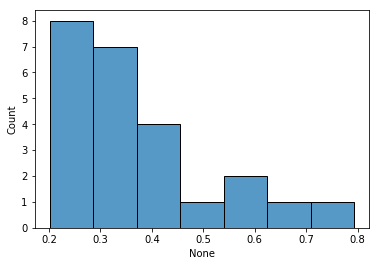

  0%|                                                    | 0/22 [00:00<?, ?it/s]

0.37832322236018673
P13053
['VITAMIN D3 RECEPTOR']


100%|██████████████████████████████████████████| 22/22 [00:00<00:00, 341.13it/s]


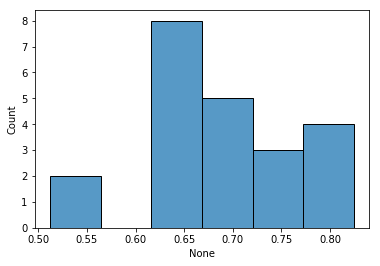

  0%|                                                    | 0/28 [00:00<?, ?it/s]

0.6893264955228037
P12931
['TYROSINE-PROTEIN KINASE SRC']


100%|██████████████████████████████████████████| 28/28 [00:00<00:00, 325.66it/s]


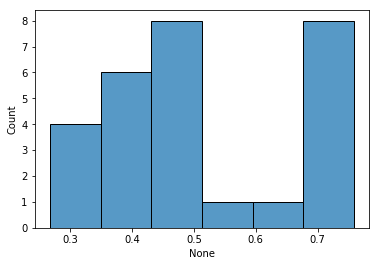

  0%|                                                    | 0/24 [00:00<?, ?it/s]

0.518034498695393
Q08881
['TYROSINE-PROTEIN KINASE ITK/TSK']


100%|██████████████████████████████████████████| 24/24 [00:00<00:00, 357.39it/s]


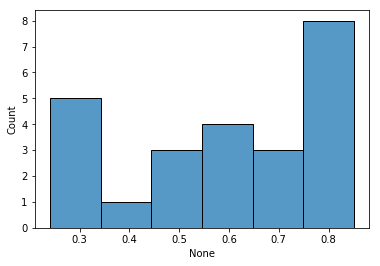

  0%|                                                    | 0/25 [00:00<?, ?it/s]

0.5909315268093759
P35968
['VASCULAR ENDOTHELIAL GROWTH FACTOR RECEPTOR 2']


100%|██████████████████████████████████████████| 25/25 [00:00<00:00, 282.69it/s]


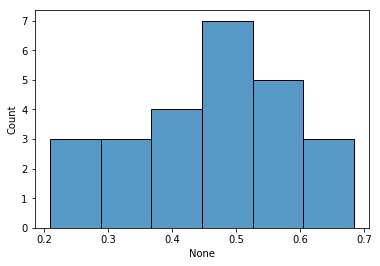

  0%|                                                    | 0/25 [00:00<?, ?it/s]

0.4617564228074805
P22734
['CATECHOL O-METHYLTRANSFERASE']


100%|██████████████████████████████████████████| 25/25 [00:00<00:00, 282.46it/s]


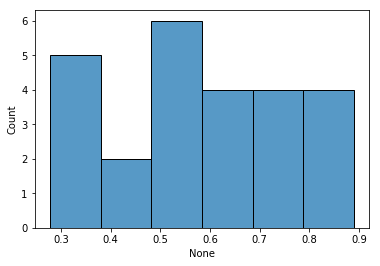

  0%|                                                    | 0/22 [00:00<?, ?it/s]

0.5915372854443727
P43490
['NICOTINAMIDE PHOSPHORIBOSYLTRANSFERASE']


100%|██████████████████████████████████████████| 22/22 [00:00<00:00, 320.05it/s]


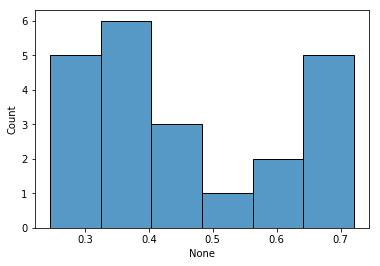

  0%|                                                    | 0/22 [00:00<?, ?it/s]

0.4508144045565628
P09874
['POLY [ADP-RIBOSE] POLYMERASE 1']


100%|██████████████████████████████████████████| 22/22 [00:00<00:00, 337.99it/s]


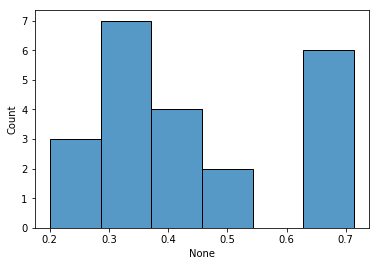

  0%|                                                    | 0/23 [00:00<?, ?it/s]

0.43812942057572335
Q07343
["CAMP-SPECIFIC 3',5'-CYCLIC PHOSPHODIESTERASE 4B"]


100%|██████████████████████████████████████████| 23/23 [00:00<00:00, 264.83it/s]


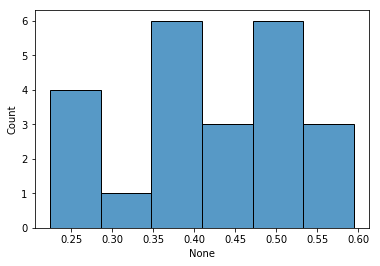

  0%|                                                    | 0/23 [00:00<?, ?it/s]

0.41758025197388826
P10275
['ANDROGEN RECEPTOR']


100%|██████████████████████████████████████████| 23/23 [00:00<00:00, 339.01it/s]


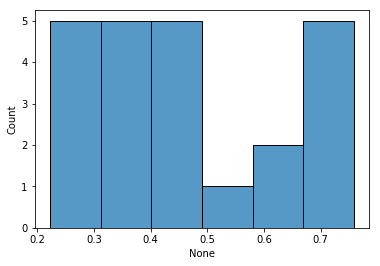

  0%|                                                    | 0/20 [00:00<?, ?it/s]

0.46924952766513667
P25440
['BROMODOMAIN-CONTAINING PROTEIN 2']


100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 231.45it/s]


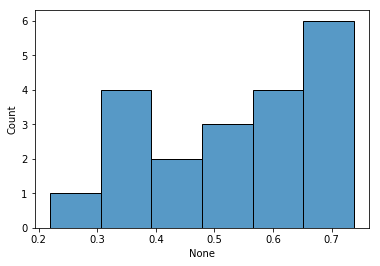

  0%|                                                    | 0/22 [00:00<?, ?it/s]

0.5393920987370652
P14174
['MACROPHAGE MIGRATION INHIBITORY FACTOR']


100%|██████████████████████████████████████████| 22/22 [00:00<00:00, 231.70it/s]


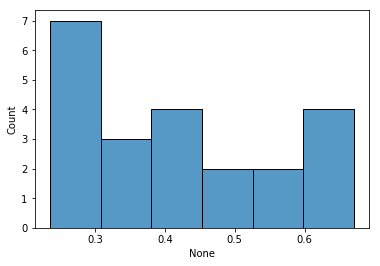

  0%|                                                    | 0/24 [00:00<?, ?it/s]

0.43010777991459787
Q9K2N0
['BETA-LACTAMASE' 'METALLO-BETA-LACTAMASE VIM-2'
 'BETA-LACTAMASE CLASS B VIM-2' 'BETA-LACTAMASE VIM-2']


100%|██████████████████████████████████████████| 24/24 [00:00<00:00, 209.19it/s]


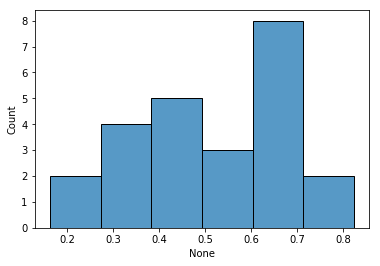

  0%|                                                    | 0/22 [00:00<?, ?it/s]

0.5306858163838258
P29317
['EPHRIN TYPE-A RECEPTOR 2']


100%|██████████████████████████████████████████| 22/22 [00:00<00:00, 349.43it/s]


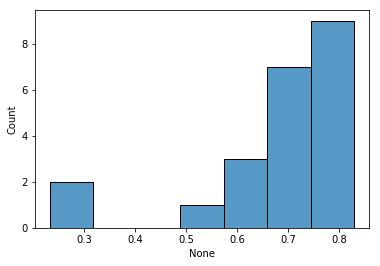

100%|██████████████████████████████████████████| 25/25 [00:00<00:00, 392.40it/s]

0.6746445550336486
P28523
['CASEIN KINASE II, ALPHA SUBUNIT' 'CASEIN KINASE II SUBUNIT ALPHA']


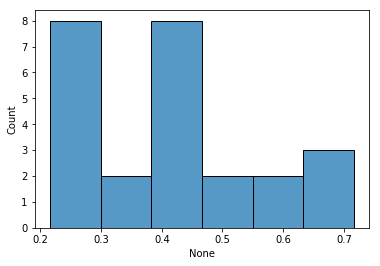

100%|██████████████████████████████████████████| 22/22 [00:00<00:00, 385.13it/s]

0.41317225436708355
P11086
['PHENYLETHANOLAMINE N-METHYLTRANSFERASE']


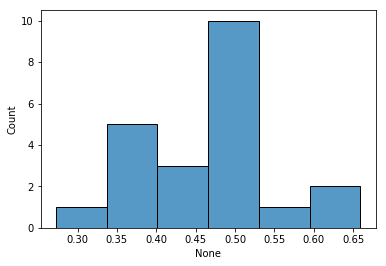

100%|██████████████████████████████████████████| 21/21 [00:00<00:00, 393.61it/s]

0.4658647493136164
P11838
['ENDOTHIAPEPSIN']


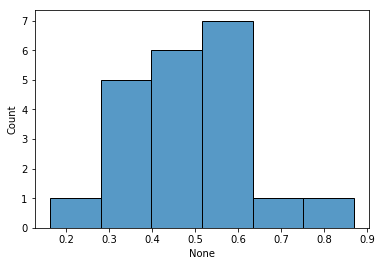

100%|██████████████████████████████████████████| 24/24 [00:00<00:00, 402.55it/s]

0.49002890917309555
P98170
['E3 UBIQUITIN-PROTEIN LIGASE XIAP'
 'BACULOVIRAL IAP REPEAT-CONTAINING PROTEIN 4']


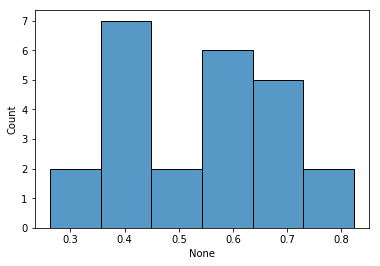

100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 434.88it/s]

0.5383510426398189
O76074
["CGMP-SPECIFIC 3',5'-CYCLIC PHOSPHODIESTERASE"]


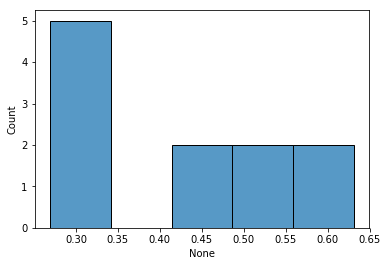

100%|██████████████████████████████████████████| 24/24 [00:00<00:00, 381.75it/s]

0.44112432646074906
Q13526
['PEPTIDYL-PROLYL CIS-TRANS ISOMERASE NIMA-INTERACTIN'
 'PEPTIDYL-PROLYL CIS-TRANS ISOMERASE NIMA']


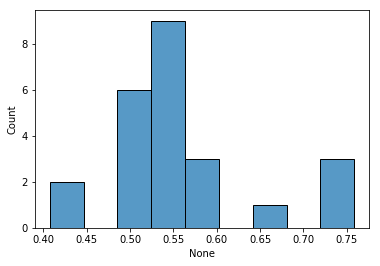

100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 376.17it/s]

0.5562522935153126
P11362
['FGF RECEPTOR 1' 'BASIC FIBROBLAST GROWTH FACTOR RECEPTOR 1'
 'FIBROBLAST GROWTH FACTOR RECEPTOR 1']


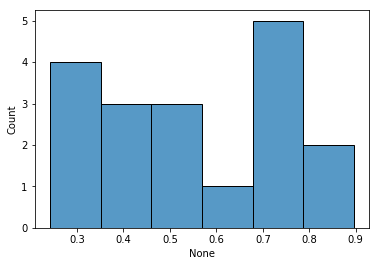

100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 366.68it/s]

0.5460703105658857
P08254
['STROMELYSIN-1' 'MATRIX METALLOPROTEINASE-3' 'STROMELYSIN-1 PRECURSOR']


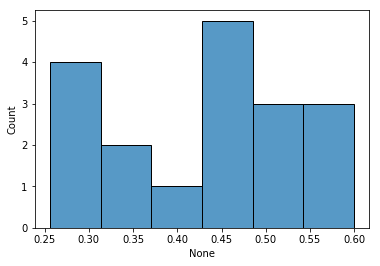

100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 326.40it/s]

0.432941880310217
P06276
['CHOLINESTERASE']


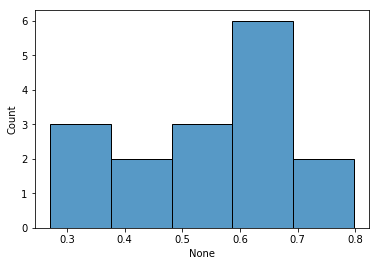

  0%|                                                    | 0/21 [00:00<?, ?it/s]

0.5479874816480972
Q13627
['DUAL SPECIFICITY TYROSINE-PHOSPHORYLATION-REGULATED KINASE']


100%|██████████████████████████████████████████| 21/21 [00:00<00:00, 337.70it/s]


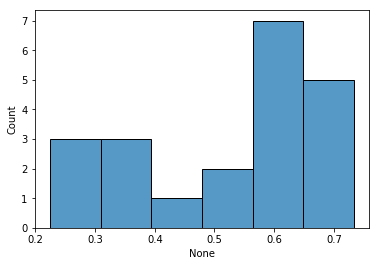

100%|██████████████████████████████████████████| 14/14 [00:00<00:00, 264.91it/s]

0.5221109196904438
P02829
['ATP-DEPENDENT MOLECULAR CHAPERONE HSP82' 'HEAT SHOCK PROTEIN HSP90'
 'HEAT SHOCK PROTEIN HSP82']


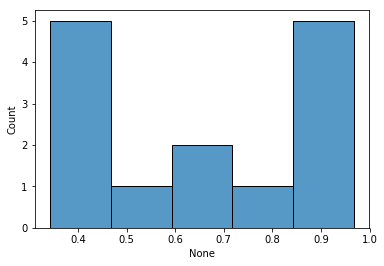

100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 240.21it/s]

0.644270441314102
P00720
['LYSOZYME' 'T4 LYSOZYME' 'ENDOLYSIN'
 'ENDOLYSIN, DCN1-LIKE PROTEIN 1 CHIMERA']


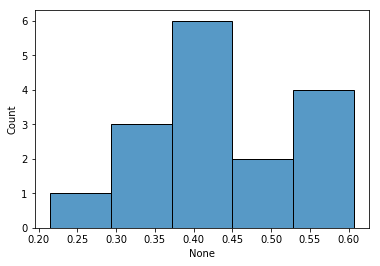

  0%|                                                    | 0/16 [00:00<?, ?it/s]

0.44568298916585203
P53582
['METHIONINE AMINOPEPTIDASE 1']


100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 234.12it/s]


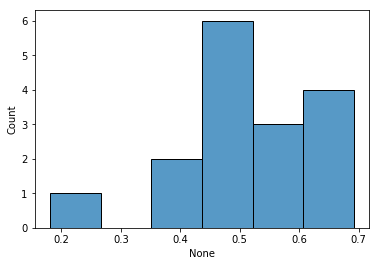

100%|██████████████████████████████████████████| 17/17 [00:00<00:00, 327.92it/s]

0.5091543072298739
P19793
['RETINOIC ACID RECEPTOR RXR-ALPHA'
 'PEROXISOME PROLIFERATOR-ACTIVATED RECEPTOR GAMMA']


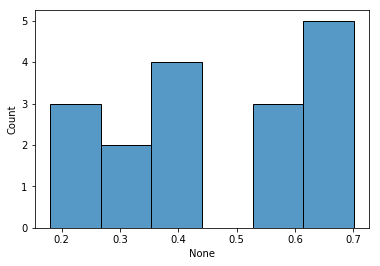

100%|██████████████████████████████████████████| 23/23 [00:00<00:00, 324.14it/s]

0.45590768420713174
O00255
['MENIN']


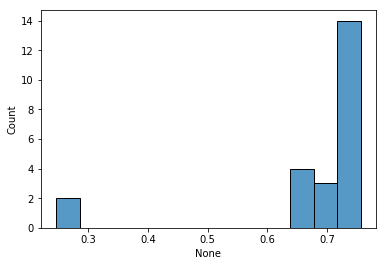

  0%|                                                    | 0/23 [00:00<?, ?it/s]

0.6759657170334442
P00746
['COMPLEMENT FACTOR D']


100%|██████████████████████████████████████████| 23/23 [00:00<00:00, 207.35it/s]


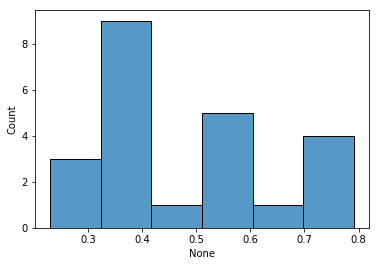

100%|██████████████████████████████████████████| 21/21 [00:00<00:00, 219.15it/s]


0.47967858123308105
Q13093
['PLATELET-ACTIVATING FACTOR ACETYLHYDROLASE']


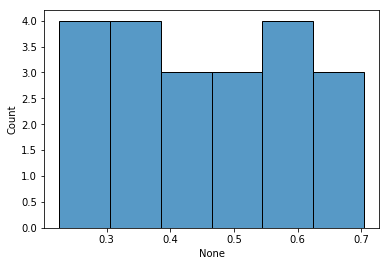

0.45590696936151204
O60341
['LYSINE-SPECIFIC HISTONE DEMETHYLASE 1'
 'LYSINE-SPECIFIC HISTONE DEMETHYLASE 1A']


100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 242.47it/s]


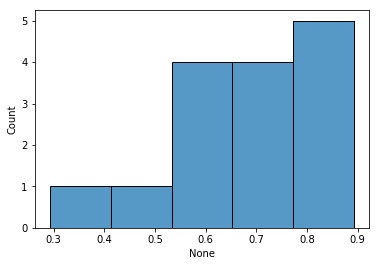

  0%|                                                    | 0/22 [00:00<?, ?it/s]

0.6614175461605453
P09955
['CARBOXYPEPTIDASE B']


100%|██████████████████████████████████████████| 22/22 [00:00<00:00, 202.52it/s]


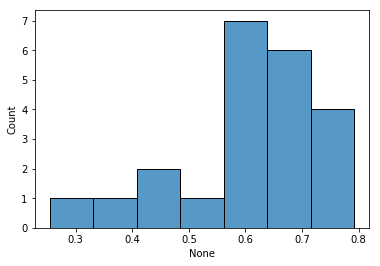

  0%|                                                    | 0/11 [00:00<?, ?it/s]

0.6067948635095379
O15164
['TRANSCRIPTION INTERMEDIARY FACTOR 1-ALPHA']


100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 367.80it/s]


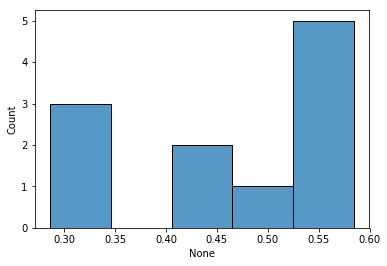

100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 366.30it/s]

0.4499443404163902
A5H660
['HISTONE DEACETYLASE' 'HISTONE DEACETYLASE 8']


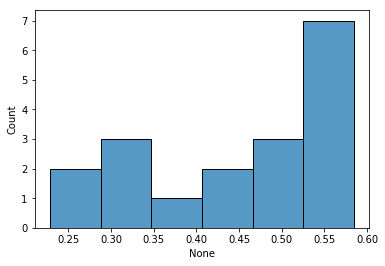

  0%|                                                    | 0/20 [00:00<?, ?it/s]

0.45116891447853164
P01116
['GTPASE KRAS, ISOFORM 2B' 'GTPASE KRAS']


100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 221.82it/s]


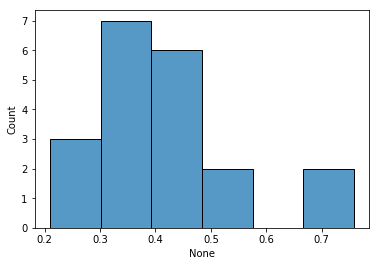

  0%|                                                    | 0/11 [00:00<?, ?it/s]

0.41795540281635873
P20701
['INTEGRIN ALPHA-L' 'ANTIGEN CD11A (P180)']


100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 379.47it/s]


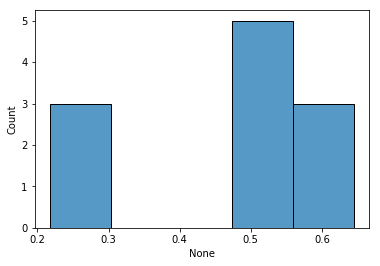

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 377.57it/s]

0.47745100002633634
P04191
['SARCOPLASMIC/ENDOPLASMIC RETICULUM CALCIUM ATPASE 1, SERCA1A'
 'SARCOPLASMIC/ENDOPLASMIC RETICULUM CALCIUM ATPASE 1']


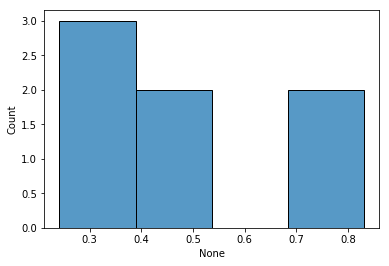

  0%|                                                    | 0/13 [00:00<?, ?it/s]

0.49345124972262283
P07711
['CATHEPSIN L1' 'CATHEPSIN L']


100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 245.67it/s]


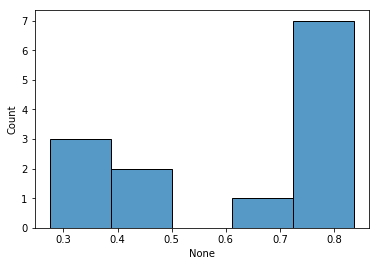

  0%|                                                    | 0/15 [00:00<?, ?it/s]

0.642554721377932
Q02750
['DUAL SPECIFICITY MITOGEN-ACTIVATED PROTEIN'
 'DUAL SPECIFICITY MITOGEN-ACTIVATED PROTEIN KINASE K'
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE 1 (MERK 1)'
 'DUAL SPECIFICITY MITOGEN-ACTIVATED PROTEIN KINASE KINASE 1'
 'DUAL SPECIFICITY MITOGEN-ACTIVATED PROTEIN KINASE']


100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 233.52it/s]


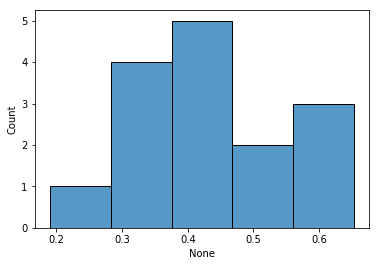

  0%|                                                    | 0/17 [00:00<?, ?it/s]

0.4424426425842874
P42336
['PHOSPHATIDYLINOSITOL 4,5-BISPHOSPHATE 3-KINASE'
 'PHOSPHATIDYLINOSITOL 4,5-BISPHOSPHATE 3-KINASE CATALYTIC']


100%|██████████████████████████████████████████| 17/17 [00:00<00:00, 238.28it/s]


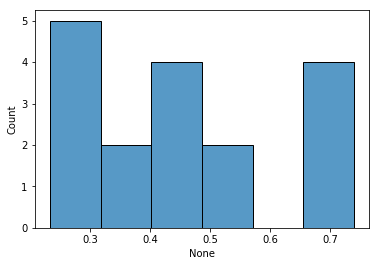

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 297.94it/s]

0.45388531411967686
P12821
['ANGIOTENSIN-CONVERTING ENZYME' 'ANGIOTENSIN CONVERTING ENZYME']


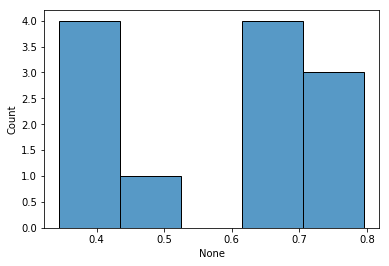

  0%|                                                    | 0/19 [00:00<?, ?it/s]

0.5791588216504119
O35904
['PHOSPHATIDYLINOSITOL-4,5-BISPHOSPHATE 3-KINASE'
 'PHOSPHATIDYLINOSITOL-4,5-BISPHOSPHATE 3-KINASE CATALYTIC'
 'PHOSPHATIDYLINOSITOL 4,5-BISPHOSPHATE 3-KINASE CATALYTIC']


100%|██████████████████████████████████████████| 19/19 [00:00<00:00, 333.97it/s]


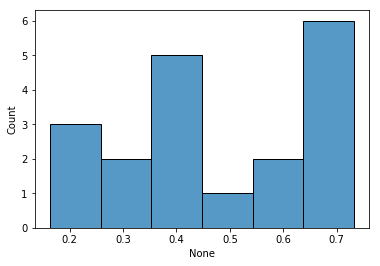

  0%|                                                    | 0/21 [00:00<?, ?it/s]

0.47109801593588135
P49336
['CYCLIN-DEPENDENT KINASE 8']


100%|██████████████████████████████████████████| 21/21 [00:00<00:00, 326.89it/s]


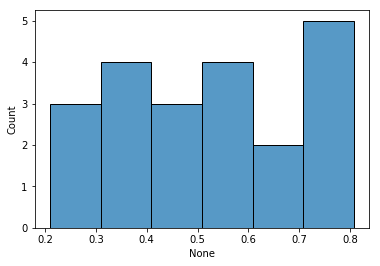

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 403.05it/s]

0.5238983083413877
P26281
['2-AMINO-4-HYDROXY-6-HYDROXYMETHYLDIHYDROPTERIDINE'
 '6-HYDROXYMETHYL-7,8-DIHYDROPTERIN PYROPHOSPHOKINASE']


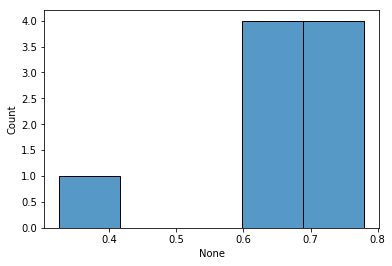

100%|██████████████████████████████████████████| 17/17 [00:00<00:00, 368.83it/s]

0.6378075400929984
O95271
['TANKYRASE-1' 'POLY [ADP-RIBOSE] POLYMERASE TANKYRASE-1']


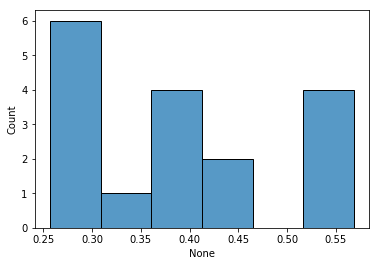

100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 303.98it/s]

0.3889048115483188
P15090
['FATTY ACID-BINDING PROTEIN, ADIPOCYTE' 'FATTY ACID-BINDING PROTEIN'
 'FATTY ACID BINDING PROTEIN, ADIPOCYTE' 'ADIPOCYTE LIPID-BINDING PROTEIN']


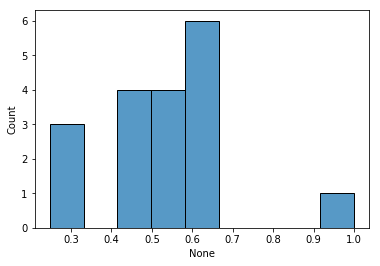

  0%|                                                    | 0/19 [00:00<?, ?it/s]

0.540545333409567
Q04631
['FARNESYLTRANSFERASE ALPHA SUBUNIT' 'FARNESYLTRANSFERASE'
 'FARNESYLTRANSFERASE/GERANYLGERANYLTRANSFERA'
 'GERANYL-GERANYLTRANSFERASE ALPHA SUBUNIT']


100%|██████████████████████████████████████████| 19/19 [00:00<00:00, 241.79it/s]


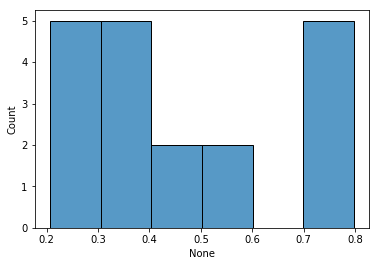

  0%|                                                    | 0/19 [00:00<?, ?it/s]

0.4610322552585235
P41182
['B-CELL LYMPHOMA 6 PROTEIN']


100%|██████████████████████████████████████████| 19/19 [00:00<00:00, 233.25it/s]


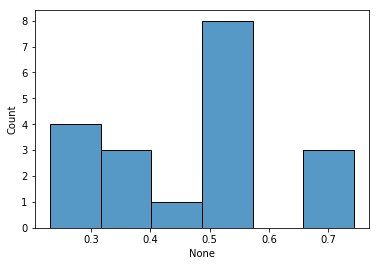

  0%|                                                     | 0/6 [00:00<?, ?it/s]

0.467242972192927
Q92831
['HISTONE ACETYLTRANSFERASE KAT2B' 'HISTONE ACETYLTRANSFERASE PCAF']


100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 265.65it/s]


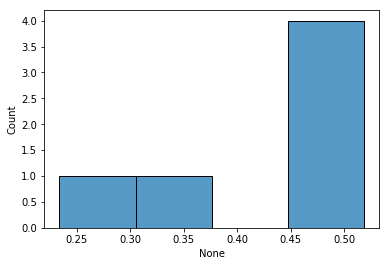

100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 247.34it/s]

0.4153517447131154
P0A6I6
['PHOSPHOPANTETHEINE ADENYLYLTRANSFERASE']


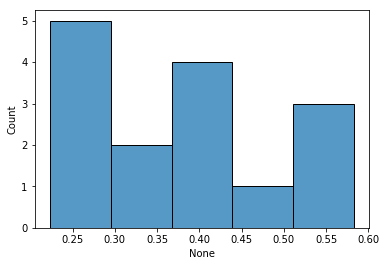

  0%|                                                    | 0/13 [00:00<?, ?it/s]

0.3861781998686655
P0AE18
['METHIONINE AMINOPEPTIDASE']


100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 258.92it/s]


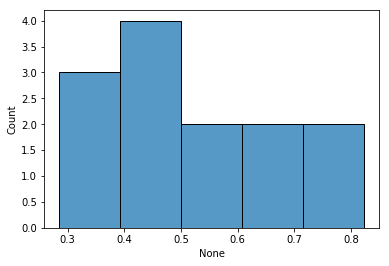

  0%|                                                    | 0/20 [00:00<?, ?it/s]

0.5200448002408727
P50579
['METHIONINE AMINOPEPTIDASE 2']


100%|██████████████████████████████████████████| 20/20 [00:00<00:00, 230.40it/s]


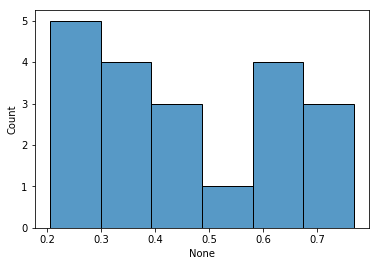

100%|██████████████████████████████████████████| 18/18 [00:00<00:00, 219.29it/s]

0.4436925735267493
P48730
['CASEIN KINASE I ISOFORM DELTA']


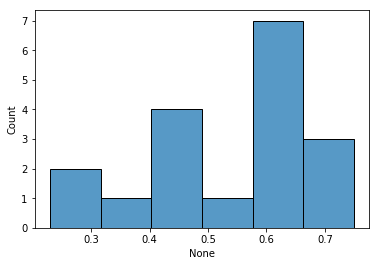

  0%|                                                     | 0/9 [00:00<?, ?it/s]

0.5533327432434193
P05089
['ARGINASE-1' 'ARGINASE 1']


100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 259.56it/s]


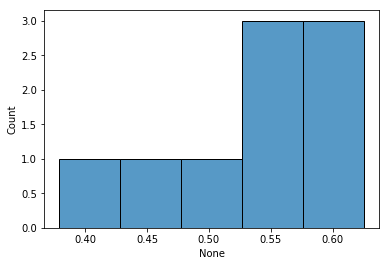

  0%|                                                    | 0/17 [00:00<?, ?it/s]

0.5384369433587557
Q6PL18
['ATPASE FAMILY AAA DOMAIN-CONTAINING PROTEIN 2']


100%|██████████████████████████████████████████| 17/17 [00:00<00:00, 238.12it/s]


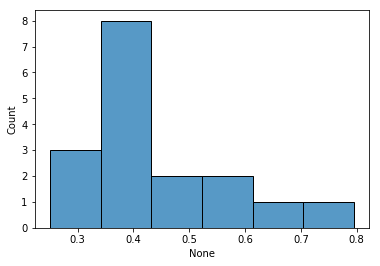

100%|██████████████████████████████████████████| 17/17 [00:00<00:00, 358.82it/s]

0.4399488074992297
P15917
['LETHAL FACTOR']


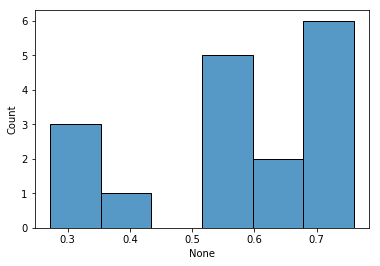

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 390.74it/s]

0.5780239710372419
P00519
['TYROSINE-PROTEIN KINASE ABL1']


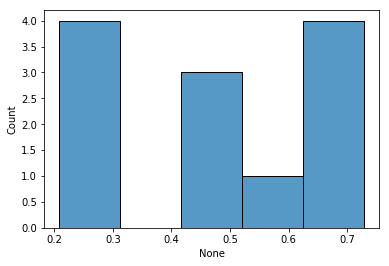

100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 365.47it/s]

0.47426883408053705
Q13451
['PEPTIDYL-PROLYL CIS-TRANS ISOMERASE FKBP5']


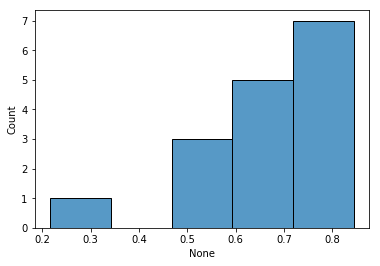

100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 370.56it/s]

0.6704355590564846
Q8TEK3
['HISTONE-LYSINE N-METHYLTRANSFERASE, H3 LYSINE-79 SPECIFIC']


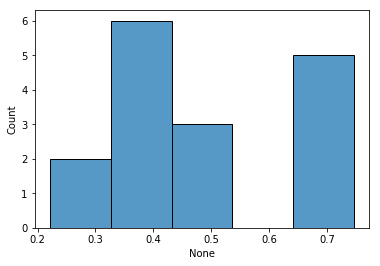

100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 386.85it/s]

0.4853876447763573
P51955
['SERINE/THREONINE-PROTEIN KINASE NEK2']


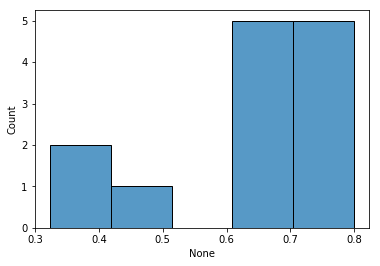

100%|██████████████████████████████████████████| 14/14 [00:00<00:00, 388.81it/s]

0.6420506339805436
Q13153
['SERINE/THREONINE-PROTEIN KINASE PAK 1']


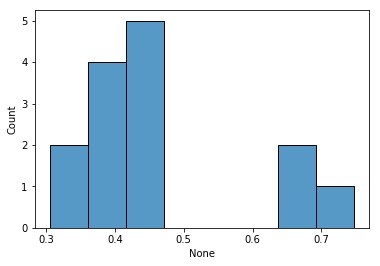

100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 326.34it/s]

0.4547031330226183
P01112
['GTPASE HRAS' 'TRANSFORMING PROTEIN P21/H-RAS-1']


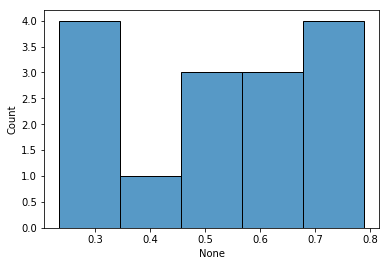

  0%|                                                    | 0/16 [00:00<?, ?it/s]

0.5442333985551877
P36897
['TGF-BETA RECEPTOR TYPE-1']


100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 234.65it/s]


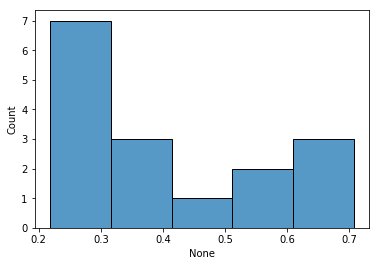

  0%|                                                    | 0/16 [00:00<?, ?it/s]

0.4072495508511751
Q14680
['MATERNAL EMBRYONIC LEUCINE ZIPPER KINASE']


100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 255.35it/s]


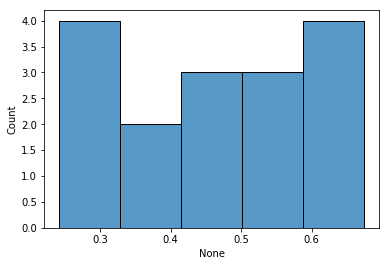

  0%|                                                    | 0/17 [00:00<?, ?it/s]

0.46593854314825967
P06239
['PROTO-ONCOGENE TYROSINE-PROTEIN KINASE LCK'
 'TYROSINE-PROTEIN KINASE LCK']


100%|██████████████████████████████████████████| 17/17 [00:00<00:00, 235.43it/s]


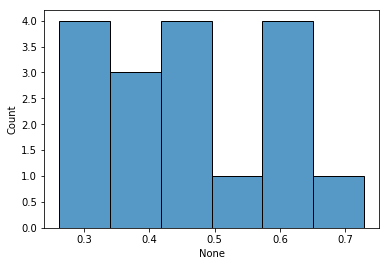

  0%|                                                     | 0/9 [00:00<?, ?it/s]

0.45539054963435077
P31749
['RAC-ALPHA SERINE/THREONINE-PROTEIN KINASE'
 'RAC-ALPHA SERINE/THREONINE-PROTEIN KINASE,PIFTIDE']


100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 270.84it/s]


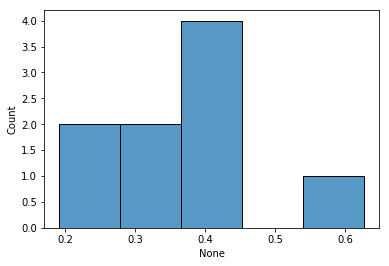

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 277.96it/s]

0.36383015027138044
P00491
['PURINE NUCLEOSIDE PHOSPHORYLASE']


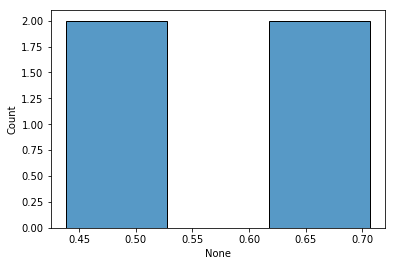

100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 372.86it/s]

0.5880373169579594
O60760
['GLUTATHIONE-REQUIRING PROSTAGLANDIN D SYNTHASE'
 'HEMATOPOIETIC PROSTAGLANDIN D SYNTHASE']


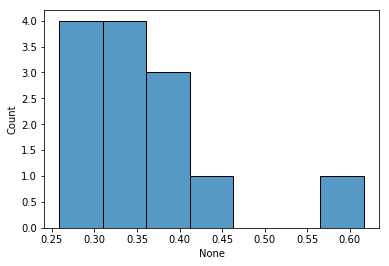

  0%|                                                    | 0/17 [00:00<?, ?it/s]

0.36009686562418125
Q13464
['RHO-ASSOCIATED PROTEIN KINASE 1']


100%|██████████████████████████████████████████| 17/17 [00:00<00:00, 226.26it/s]


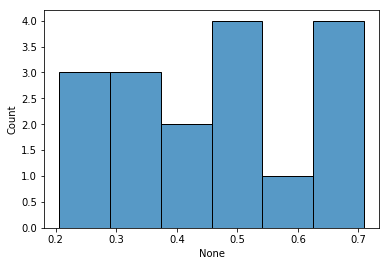

  0%|                                                    | 0/12 [00:00<?, ?it/s]

0.46463041265283744
P60472
['UNDECAPRENYL PYROPHOSPHATE SYNTHASE']


100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 263.14it/s]


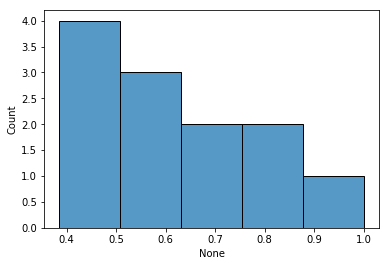

  0%|                                                    | 0/12 [00:00<?, ?it/s]

0.6035781663985742
P29274
['ADENOSINE RECEPTOR A2A' 'HUMAN A2A ADENOSINE RECEPTOR T4L CHIMERA'
 'ADENOSINE RECEPTOR A2A,SOLUBLE CYTOCHROME B562,ADENOSINE'
 'ADENOSINE RECEPTOR A2A,LYSOZYME CHIMERA'
 'HUMAN ADENOSINE A2A RECEPTOR/T4 LYSOZYME CHIMERA'
 'ADENOSINE A2A RECEPTOR']


100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 252.96it/s]


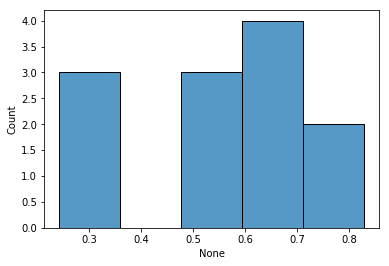

  0%|                                                    | 0/15 [00:00<?, ?it/s]

0.5615019746413202
P78536
['TNF-ALPHA-CONVERTING ENZYME, ADAM 17'
 'DISINTEGRIN AND METALLOPROTEINASE DOMAIN-CONTAINING']


100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 247.77it/s]


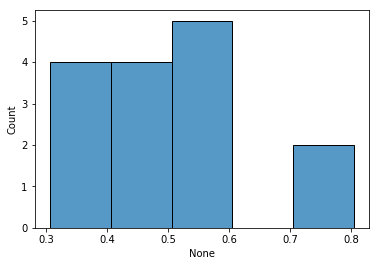

  0%|                                                    | 0/16 [00:00<?, ?it/s]

0.49858887434009275
P00915
['CARBONIC ANHYDRASE 1']


100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 234.26it/s]


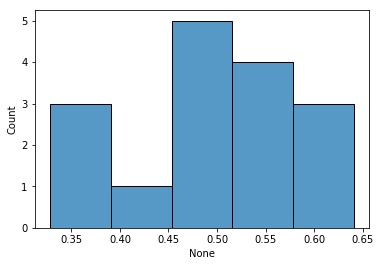

  0%|                                                    | 0/17 [00:00<?, ?it/s]

0.5002242235994451
P08235
['MINERALOCORTICOID RECEPTOR']


100%|██████████████████████████████████████████| 17/17 [00:00<00:00, 353.05it/s]


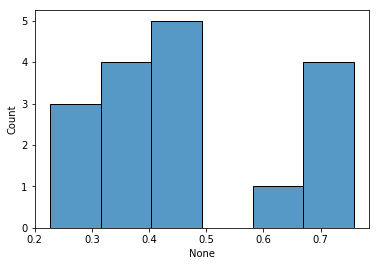

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 261.61it/s]

0.4631410186029093
O43318
['MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE 7'
 'TAK1 KINASE - TAB1 CHIMERA FUSION PROTEIN' 'TAK1-TAB1 FUSION PROTEIN']


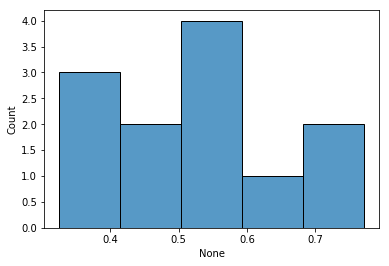

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 321.32it/s]

0.5224271206538403
Q9UIF9
['BROMODOMAIN ADJACENT TO ZINC FINGER DOMAIN PROTEIN 2A']


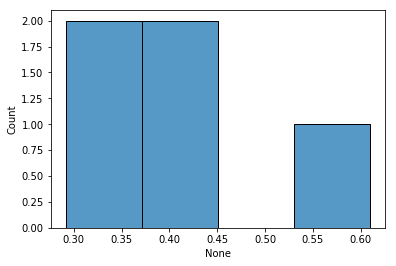

100%|██████████████████████████████████████████| 14/14 [00:00<00:00, 379.93it/s]

0.4084394045297919
Q99683
['MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE 5']


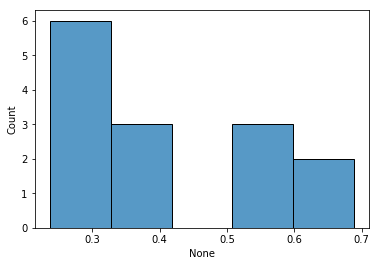

0.41722962468977237
O14786
['NEUROPILIN-1']


100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 420.46it/s]


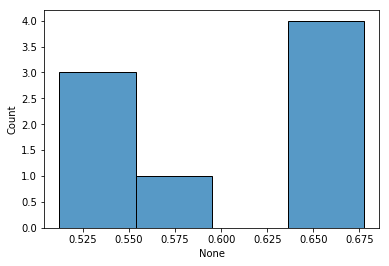

100%|██████████████████████████████████████████| 17/17 [00:00<00:00, 238.93it/s]

0.5953843884282515
P04629
['HIGH AFFINITY NERVE GROWTH FACTOR RECEPTOR']


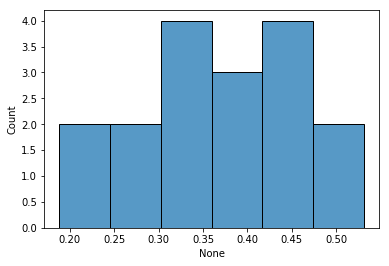

  0%|                                                    | 0/12 [00:00<?, ?it/s]

0.3744051151368687
C7C422
['METALLO-BETA-LACTAMASE TYPE 2' 'BETA-LACTAMASE NDM-1'
 'METALLO-BETA-LACTAMASE NDM-1']


100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 236.11it/s]


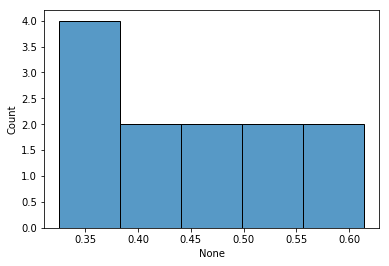

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 283.94it/s]

0.45477184570602613
P97612
['FATTY-ACID AMIDE HYDROLASE 1' 'FATTY ACID AMIDE HYDROLASE 1']


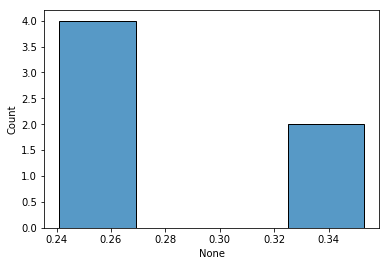

100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 336.09it/s]

0.2855842309156169
P11172
["OROTIDINE-5'-PHOSPHATE DECARBOXYLASE"
 "URIDINE 5'-MONOPHOSPHATE SYNTHASE (UMP SYNTHASE)"
 "URIDINE 5'-MONOPHOSPHATE SYNTHASE"]


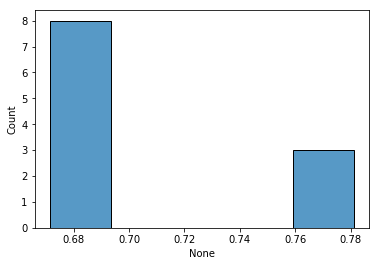

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 395.71it/s]

0.7064155681759147
P22455
['FIBROBLAST GROWTH FACTOR RECEPTOR 4']


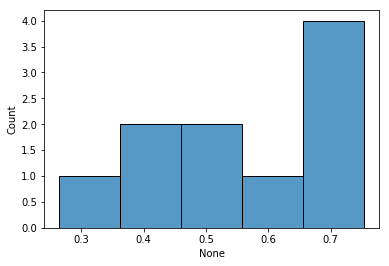

100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 349.27it/s]

0.568169411165412
P22756
['GLUTAMATE RECEPTOR, IONOTROPIC KAINATE 1']


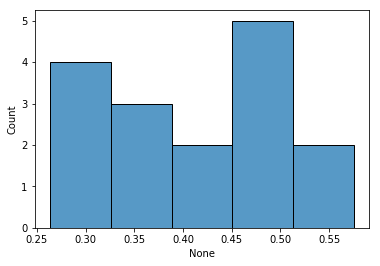

100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 391.96it/s]

0.41225477500342167
O75530
['POLYCOMB PROTEIN EED']


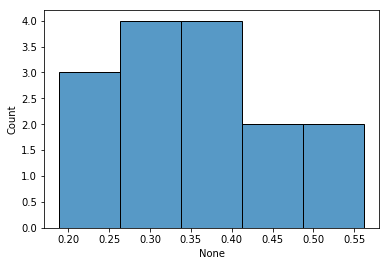

100%|██████████████████████████████████████████| 14/14 [00:00<00:00, 377.20it/s]

0.35649453997470243
Q9H8M2
['BROMODOMAIN-CONTAINING PROTEIN 9']


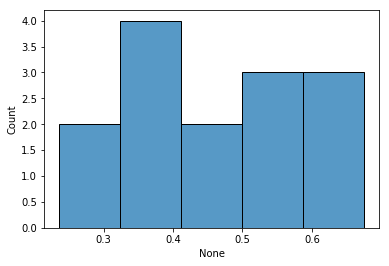

100%|██████████████████████████████████████████| 14/14 [00:00<00:00, 357.79it/s]

0.4625980194770551
Q9F663
['CARBAPENEM-HYDROLYZING BETA-LACTAMASE KPC']


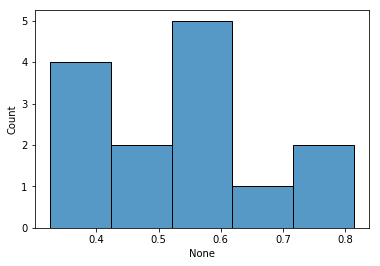

100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 354.06it/s]

0.5392766683709184
P25774
['CATHEPSIN S']


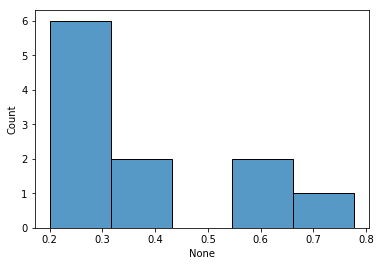

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 347.41it/s]

0.37442433307099265
P08069
['INSULIN-LIKE GROWTH FACTOR 1 RECEPTOR']


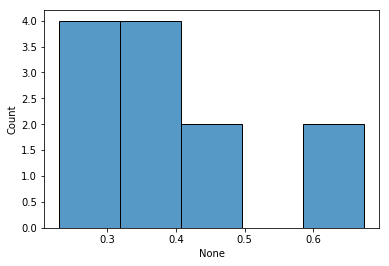

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 245.93it/s]

0.39597286598222636
Q460N5
['POLY [ADP-RIBOSE] POLYMERASE 14']


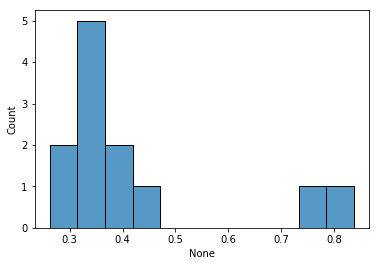

  0%|                                                    | 0/15 [00:00<?, ?it/s]

0.4256553478271555
Q9BJF5
['CALMODULIN-DOMAIN PROTEIN KINASE 1']


100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 245.78it/s]


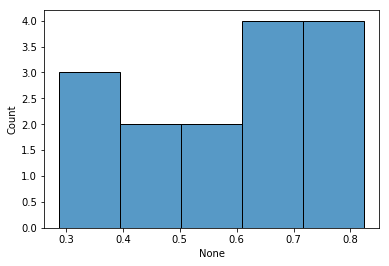

  0%|                                                    | 0/12 [00:00<?, ?it/s]

0.5931681632634531
P17612
['CAMP-DEPENDENT PROTEIN KINASE, ALPHA-CATALYTIC'
 'CAMP-DEPENDENT PROTEIN KINASE CATALYTIC SUBUNIT ALPHA'
 'CAMP-DEPENDENT PROTEIN KINASE']


100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 262.91it/s]


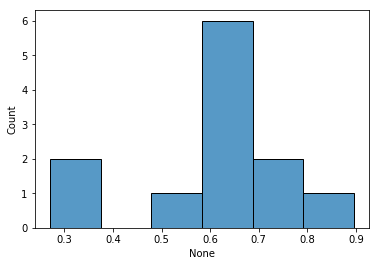

  0%|                                                    | 0/15 [00:00<?, ?it/s]

0.6051294925549016
P55055
['OXYSTEROLS RECEPTOR LXR-BETA']


100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 245.42it/s]


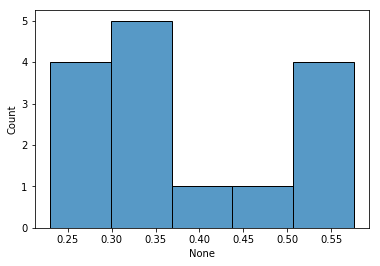

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 261.21it/s]

0.38660242927195754
P51812
['RIBOSOMAL PROTEIN S6 KINASE ALPHA-3']


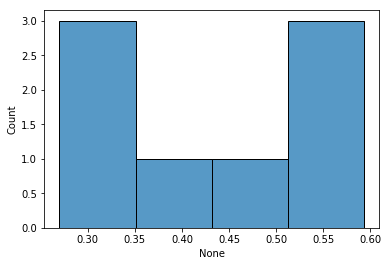

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 236.68it/s]

0.43320525359919393
P22894
['NEUTROPHIL COLLAGENASE (MMP-8)' 'MATRIX METALLOPROTEINASE-8'
 'MATRIX METALLOPROTEINASE 8' 'NEUTROPHIL COLLAGENASE']


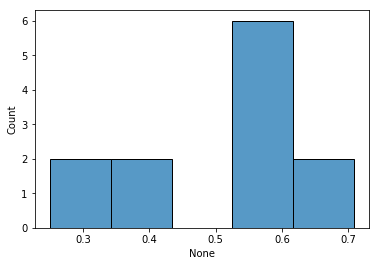

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 245.22it/s]

0.5185318193702202
P49773
['HISTIDINE TRIAD NUCLEOTIDE-BINDING PROTEIN 1']


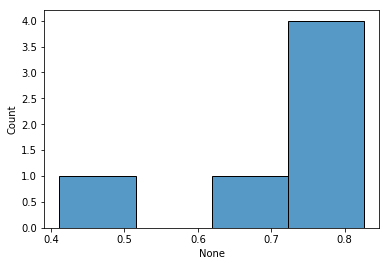

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 230.07it/s]

0.7234603993883596
P10415
['APOPTOSIS REGULATOR BCL-2,BCL-2-LIKE PROTEIN 1'
 'APOPTOSIS REGULATOR BCL-2,BCL-2-LIKE PROTEIN 1,APOPTOSIS'
 'APOPTOSIS REGULATOR BCL-2']


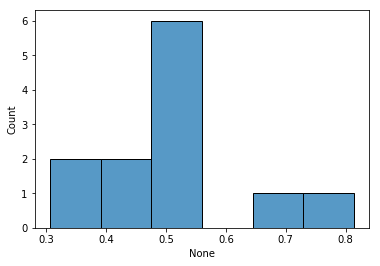

  0%|                                                    | 0/15 [00:00<?, ?it/s]

0.5132968941645332
P62937
['PEPTIDYL-PROLYL CIS-TRANS ISOMERASE A']


100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 220.91it/s]


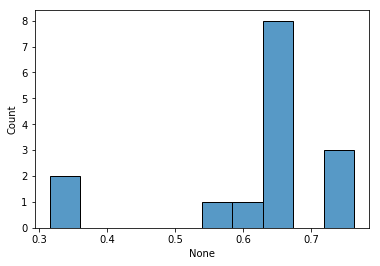

  0%|                                                    | 0/16 [00:00<?, ?it/s]

0.6164777615400204
O43570
['CARBONIC ANHYDRASE 12']


100%|██████████████████████████████████████████| 16/16 [00:00<00:00, 243.05it/s]


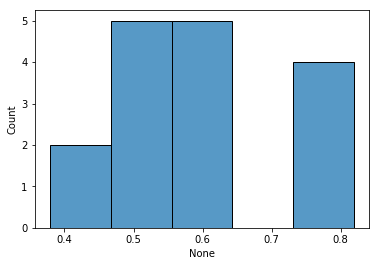

  0%|                                                    | 0/13 [00:00<?, ?it/s]

0.5985745690348797
P27707
['DEOXYCYTIDINE KINASE']


100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 320.14it/s]


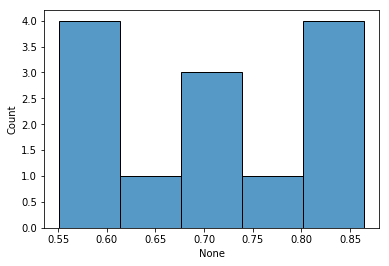

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 365.95it/s]

0.7102186683970599
P62508
['ESTROGEN-RELATED RECEPTOR GAMMA']


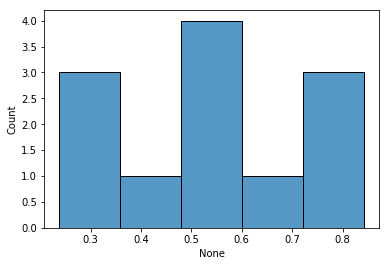

100%|██████████████████████████████████████████| 14/14 [00:00<00:00, 326.99it/s]

0.5326944433347397
Q07817
['APOPTOSIS REGULATOR BCL-X' 'BCL-2-LIKE PROTEIN 1']


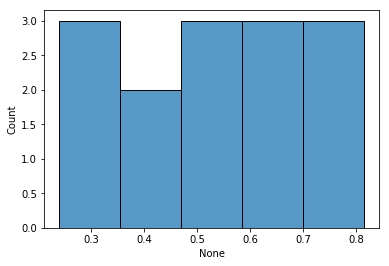

100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 365.51it/s]

0.5367885348408079
P08191
['PROTEIN FIMH' 'FIMH PROTEIN' 'TYPE 1 FIMBRIN D-MANNOSE SPECIFIC ADHESIN']


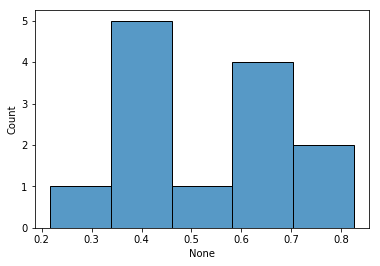

100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 252.01it/s]

0.5295880728194431
P00492
['HYPOXANTHINE-GUANINE PHOSPHORIBOSYLTRANSFERASE']


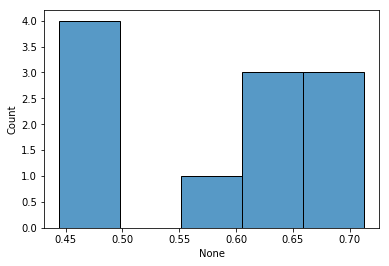

  0%|                                                    | 0/11 [00:00<?, ?it/s]

0.5861597870458486
A9JQL9
['DEHYDROSQUALENE SYNTHASE']


100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 238.25it/s]


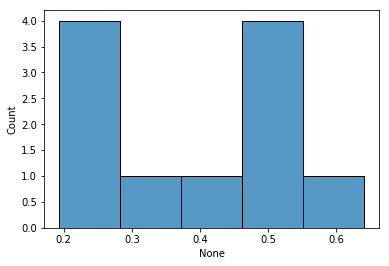

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 238.82it/s]

0.38652706185786523
Q8N884
['CYCLIC GMP-AMP SYNTHASE']


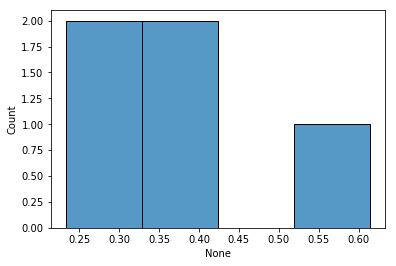

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 389.50it/s]

0.36742311463789185
P35439
['N-METHYL-D-ASPARTATE RECEPTOR SUBUNIT 1'
 'GLUTAMATE RECEPTOR IONOTROPIC, NMDA 1']


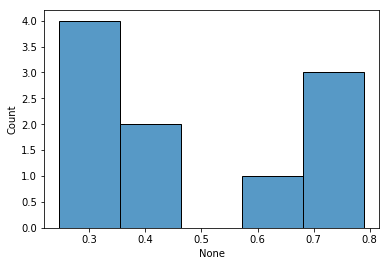

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 251.25it/s]

0.4674991655983865
P22102
['TRIFUNCTIONAL PURINE BIOSYNTHETIC PROTEIN ADENOSINE-3'
 'TRIFUNCTIONAL PURINE BIOSYNTHETIC PROTEIN ADENOSINE'
 'PHOSPHORIBOSYL GLYCINAMIDE FORMYLTRANSFERASE']


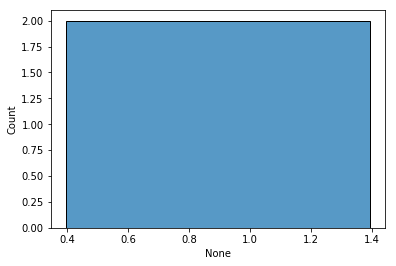

  0%|                                                    | 0/15 [00:00<?, ?it/s]

0.8953488372093024
Q92731
['ESTROGEN RECEPTOR BETA']


100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 344.74it/s]


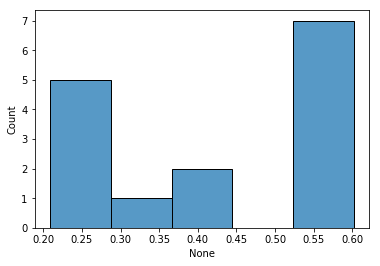

  0%|                                                    | 0/11 [00:00<?, ?it/s]

0.4226166130838655
P02754
['BETA-LACTOGLOBULIN']


100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 264.39it/s]


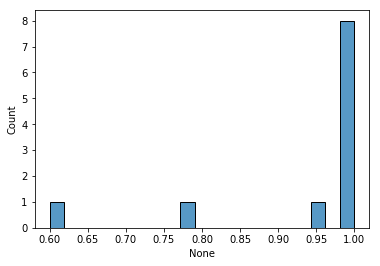

  0%|                                                    | 0/12 [00:00<?, ?it/s]

0.9393076189178139
Q08602
['GERANYLGERANYL TRANSFERASE TYPE-2 SUBUNIT ALPHA']


100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 263.20it/s]


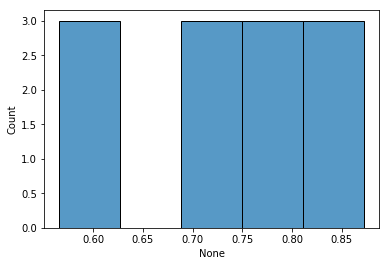

  0%|                                                    | 0/15 [00:00<?, ?it/s]

0.729583768349479
O43353
['RECEPTOR-INTERACTING SERINE/THREONINE-PROTEIN KINASE 2']


100%|██████████████████████████████████████████| 15/15 [00:00<00:00, 238.91it/s]


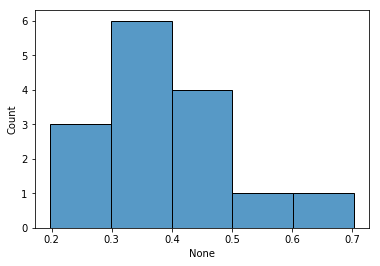

  0%|                                                    | 0/13 [00:00<?, ?it/s]

0.390476712148993
P11142
['HEAT SHOCK COGNATE 71 KDA PROTEIN']


100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 362.06it/s]


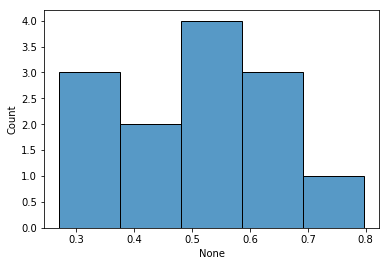

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 398.31it/s]

0.5083971930659076
P00469
['THYMIDYLATE SYNTHASE']


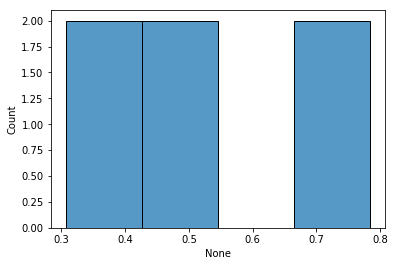

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 239.93it/s]

0.5321910190748219
P09467
['FRUCTOSE-1,6-BISPHOSPHATASE 1']


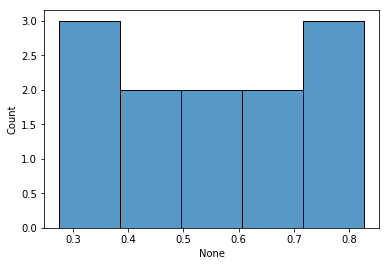

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 275.63it/s]

0.5555889316533108
P49137
['MAP KINASE-ACTIVATED PROTEIN KINASE 2']


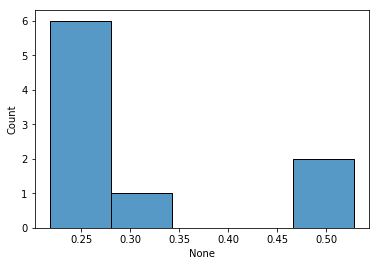

100%|██████████████████████████████████████████| 14/14 [00:00<00:00, 406.82it/s]

0.3108139510919398
Q16875
['6-PHOSPHOFRUCTO-2-KINASE/FRUCTOSE-2,6-BISPHOSPHATAS' 'HUMAN PFKFB3'
 '6-PHOSPHOFRUCTO-2-KINASE/FRUCTOSE-2,6-BISPHOSPHATASE 3']


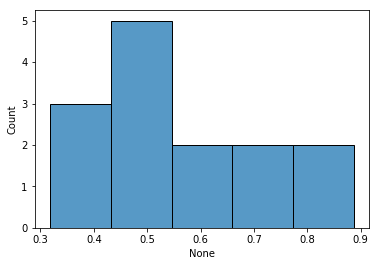

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 369.17it/s]

0.5826414107520741
Q86WV6
['STIMULATOR OF INTERFERON GENES PROTEIN' 'TRANSMEMBRANE PROTEIN 173']


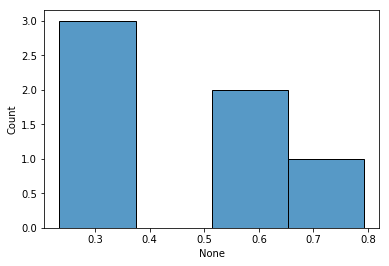

  0%|                                                     | 0/8 [00:00<?, ?it/s]

0.476472039864897
O94925
['GLUTAMINASE KIDNEY ISOFORM, MITOCHONDRIAL']


100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 377.63it/s]


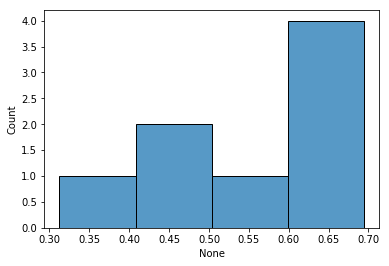

  0%|                                                    | 0/14 [00:00<?, ?it/s]

0.5660285153217914
P54760
['EPHRIN TYPE-B RECEPTOR 4']


100%|██████████████████████████████████████████| 14/14 [00:00<00:00, 354.63it/s]


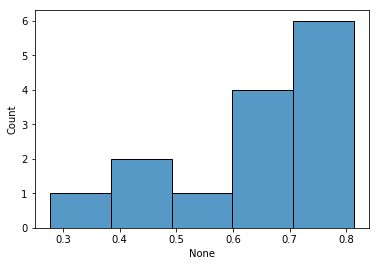

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 355.72it/s]

0.6283241732327497
Q9C0B1
['ALPHA-KETOGLUTARATE-DEPENDENT DIOXYGENASE FTO'
 'ALPHA-KETOGLUTARATE-DEPENDENT DIOXYGENASE FTO,ALPHA']


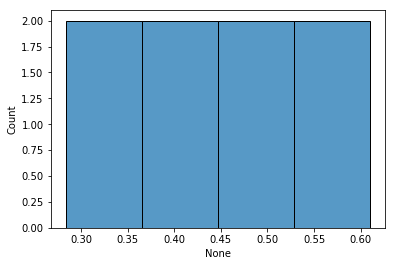

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 374.86it/s]

0.458605317446684
P53350
['SERINE/THREONINE-PROTEIN KINASE PLK1']


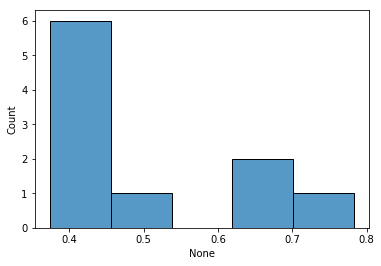

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 379.34it/s]

0.5156819111122194
Q9Y6E0
['SERINE/THREONINE-PROTEIN KINASE 24']


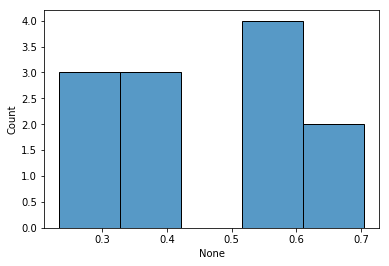

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 365.13it/s]


0.46125720179656954
P42574
['CASPASE-3']


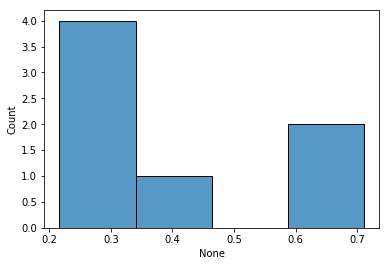

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 258.50it/s]


0.40263052485245776
P35790
['CHOLINE KINASE ALPHA']


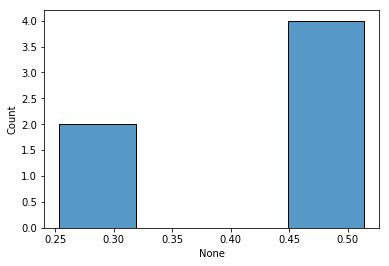

100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 382.30it/s]

0.41753287140611084
Q9BY41
['HISTONE DEACETYLASE 8']


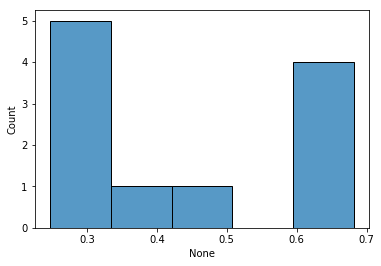

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 376.33it/s]

0.43892360290655325
Q9GZT9
['EGL NINE HOMOLOG 1']


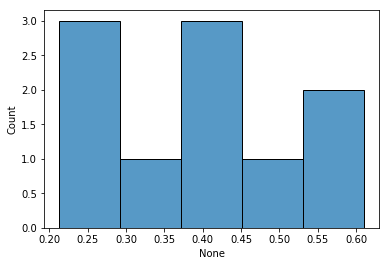

100%|██████████████████████████████████████████| 14/14 [00:00<00:00, 374.74it/s]

0.4080185180532915
Q05397
['FOCAL ADHESION KINASE 1']


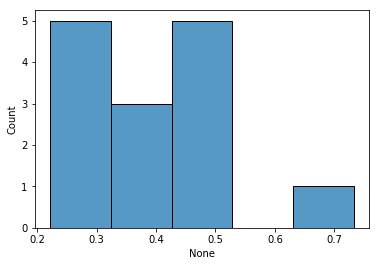

100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 261.22it/s]

0.3989784195379081
P27694
['REPLICATION PROTEIN A 70 KDA DNA-BINDING SUBUNIT']


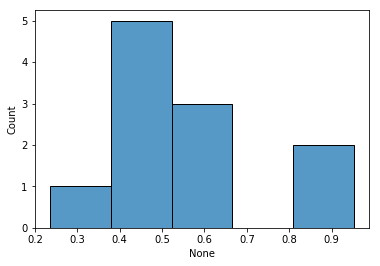

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 282.41it/s]

0.5823585025512527
P62942
['FK506-BINDING PROTEIN (FKBP)' 'FK506-BINDING PROTEIN']


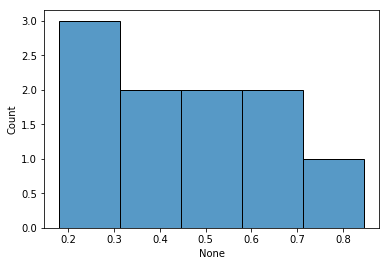

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 272.38it/s]

0.4735402469176275
P02768
['SERUM ALBUMIN']


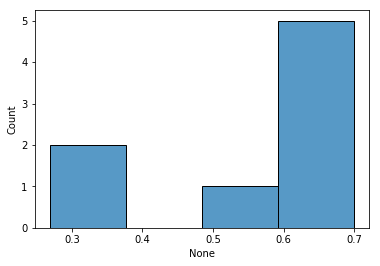

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 273.57it/s]

0.5659436248622093
Q06124
['TYROSINE-PROTEIN PHOSPHATASE, NON-RECEPTOR TYPE 11'
 'TYROSINE-PROTEIN PHOSPHATASE NON-RECEPTOR TYPE 11']


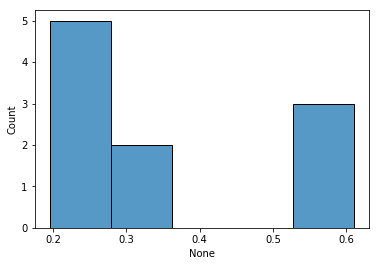

100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 260.97it/s]

0.35756850103851356
P25098
['BETA-ADRENERGIC RECEPTOR KINASE 1']


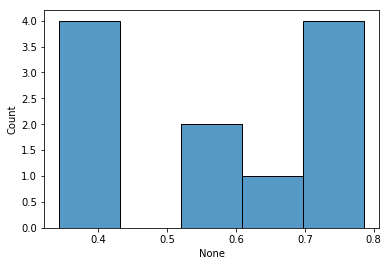

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 380.03it/s]

0.5700412282406826
O76083
["CGMP-SPECIFIC 3',5'-CYCLIC PHOSPHODIESTERASE-9"
 "HIGH AFFINITY CGMP-SPECIFIC 3',5'-CYCLIC PHOSPHODIESTERASE"]


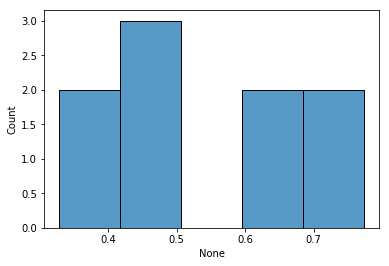

100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 249.18it/s]

0.5247016339213754
P33247
['SQUALENE-HOPENE CYCLASE']


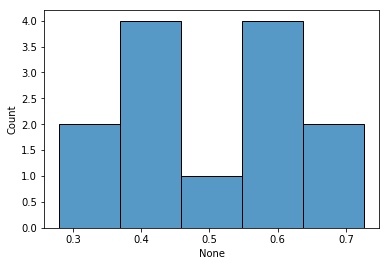

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 264.24it/s]

0.5185643226883583
P0AD64
['BETA-LACTAMASE SHV-1']


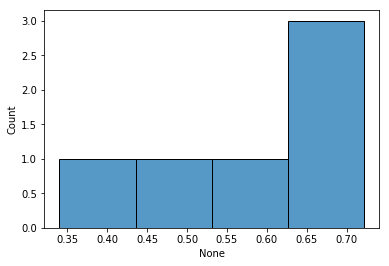

100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 239.59it/s]

0.5906199949877807
Q96PN6
['ADENYLATE CYCLASE TYPE 10']


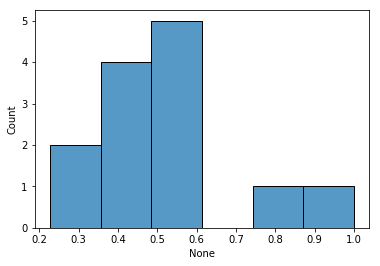

  0%|                                                    | 0/13 [00:00<?, ?it/s]

0.5222741550306181
P00730
['CARBOXYPEPTIDASE A' 'CARBOXYPEPTIDASE A1']


100%|██████████████████████████████████████████| 13/13 [00:00<00:00, 373.12it/s]


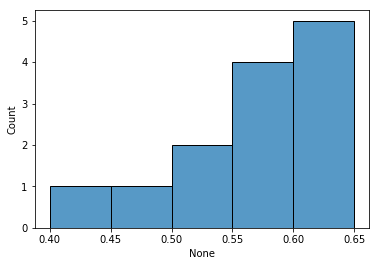

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 321.63it/s]

0.568336884630628
Q12051
['GERANYLGERANYL PYROPHOSPHATE SYNTHETASE']


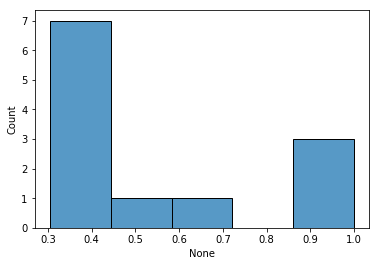

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 335.29it/s]

0.5549653280274006
P00722
['BETA-GALACTOSIDASE']


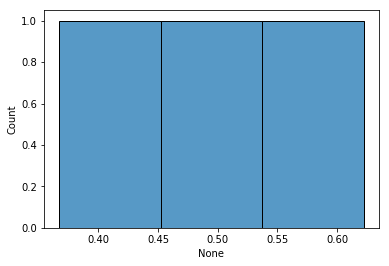

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 260.01it/s]

0.5087181756171303
Q14397
['GLUCOKINASE REGULATORY PROTEIN']


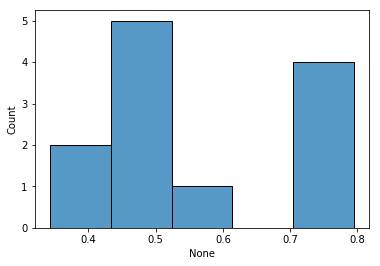

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 401.76it/s]

0.5573922611221075
Q08345
['EPITHELIAL DISCOIDIN DOMAIN-CONTAINING RECEPTOR 1']


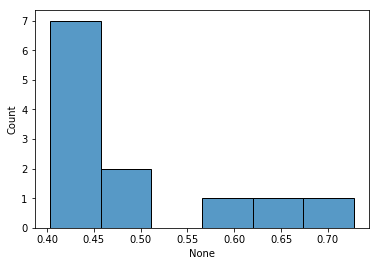

100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 289.41it/s]

0.48846933978215573
P00520
['TYROSINE-PROTEIN KINASE ABL1']


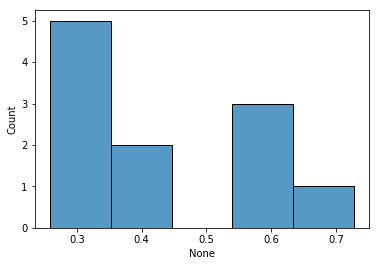

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 395.30it/s]

0.43780152071479017
P30405
['PEPTIDYL-PROLYL CIS-TRANS ISOMERASE F, MITOCHONDRIAL'
 'PEPTIDYL-PROLYL CIS-TRANS ISOMERASE F']


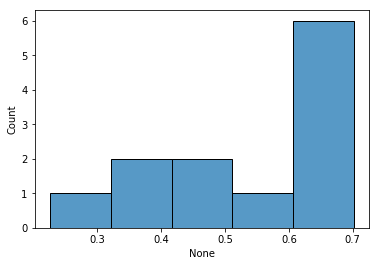

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 278.45it/s]

0.5532835682484604
P04035
['3-HYDROXY-3-METHYLGLUTARYL-COENZYME A REDUCTASE']


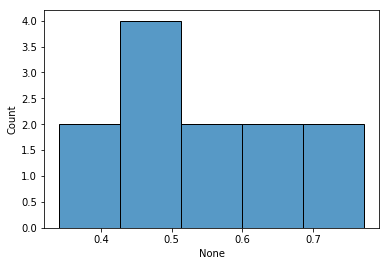

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 389.34it/s]

0.545417212718561
O43175
['D-3-PHOSPHOGLYCERATE DEHYDROGENASE']


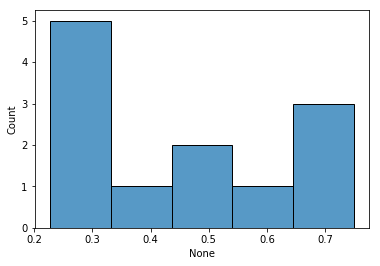

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 239.80it/s]

0.4612848233406286
O26232
["OROTIDINE 5'-MONOPHOSPHATE DECARBOXYLASE"]


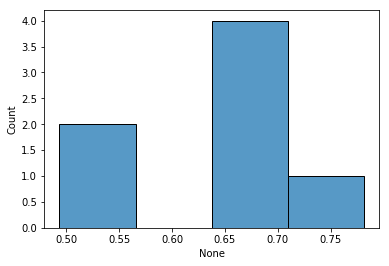

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 229.20it/s]

0.6510389502453174
P42264
['GLUTAMATE RECEPTOR, IONOTROPIC KAINATE 3']


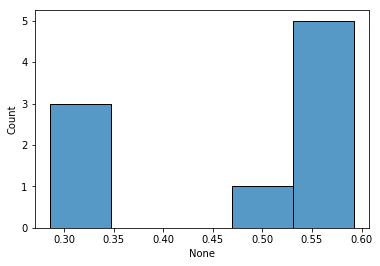

100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 223.77it/s]

0.4688538867691
P56658
['ADENOSINE DEAMINASE']


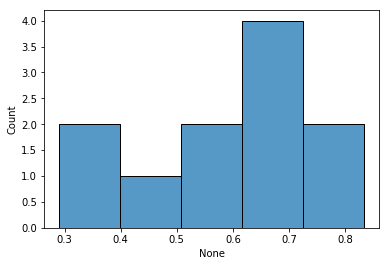

  0%|                                                    | 0/12 [00:00<?, ?it/s]

0.6042634795489401
P31947
['14-3-3 PROTEIN SIGMA']


100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 220.85it/s]


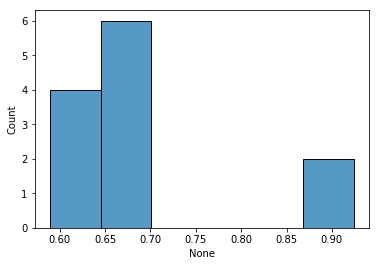

  0%|                                                    | 0/11 [00:00<?, ?it/s]

0.6987470677809021
Q9QYJ6
['PHOSPHODIESTERASE' 'PHOSPHODIESTERASE-10A'
 "CAMP AND CAMP-INHIBITED CGMP 3',5'-CYCLIC PHOSPHODIESTERASE"]


100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 251.80it/s]


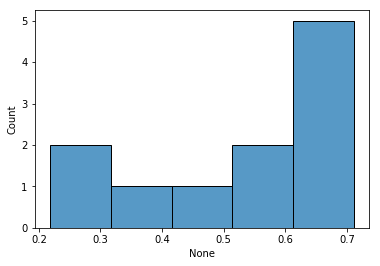

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 371.82it/s]

0.5290065644693038
P00772
['ELASTASE' 'PORCINE PANCREATIC ELASTASE']


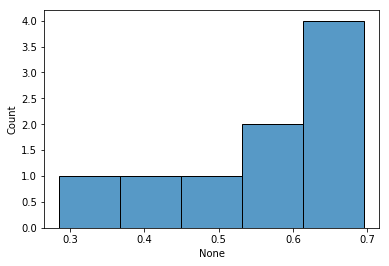

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 346.07it/s]

0.56109322862249
O43924
["RETINAL ROD RHODOPSIN-SENSITIVE CGMP 3',5'-CYCLIC"
 "RETINAL ROD RHODOPSIN-SENSITIVE CGMP 3',5'-CYCLIC PHOSPHODIESTERASE"]


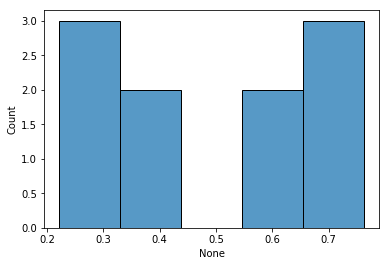

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 346.55it/s]

0.5057776821448171
P08246
['NEUTROPHIL ELASTASE' 'LEUKOCYTE ELASTASE']


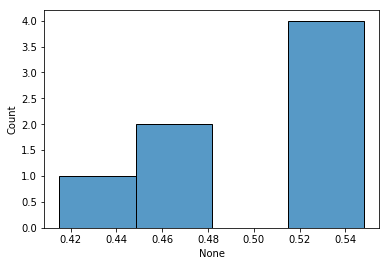

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 229.21it/s]

0.5009626299768771
P47811
['MITOGEN-ACTIVATED PROTEIN KINASE 14']


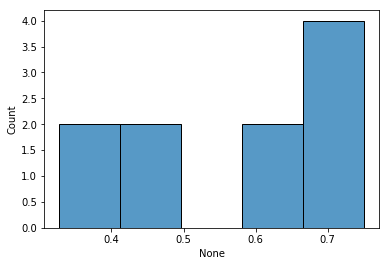

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 338.75it/s]

0.5710842845469232
P11609
['T-CELL SURFACE GLYCOPROTEIN CD1D1'
 'ANTIGEN-PRESENTING GLYCOPROTEIN CD1D1']


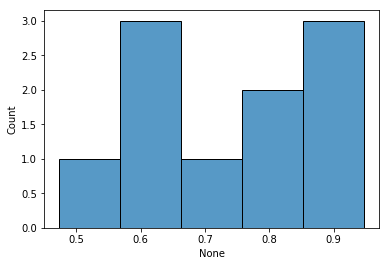

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 270.27it/s]

0.7322797248968017
O96013
['SERINE/THREONINE-PROTEIN KINASE PAK 4']


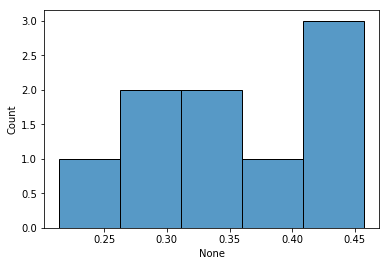

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 229.62it/s]

0.35216183813298585
P14780
['MATRIX METALLOPROTEINASE-9 (MMP-9)']


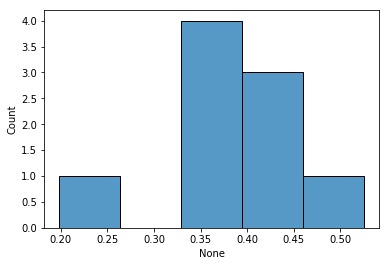

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 332.68it/s]

0.3901739658947851
Q05097
['PA-I GALACTOPHILIC LECTIN']


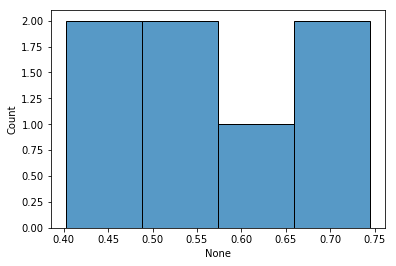

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 228.04it/s]

0.5647941528018688
Q8RLA6
['BETA-LACTAMASE' 'BETA-LACTAMASE OXA-24' 'BETA-LACTAMASE OXA24']


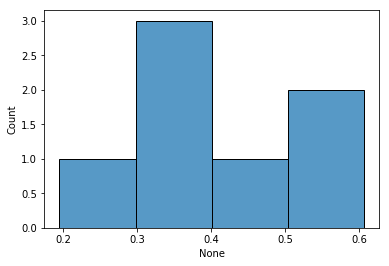

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 260.21it/s]

0.40669778487873504
P47205
['UDP-3-O-[3-HYDROXYMYRISTOYL] N-ACETYLGLUCOSAMINE DEACETYLASE'
 'UDP-3-O-ACYL-N-ACETYLGLUCOSAMINE DEACETYLASE']


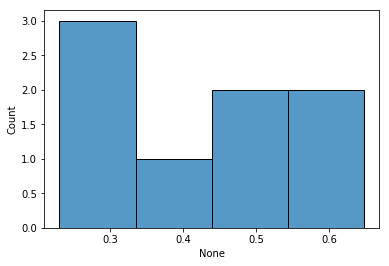

100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 255.09it/s]

0.44883620427160964
O14684
['PROSTAGLANDIN E SYNTHASE']


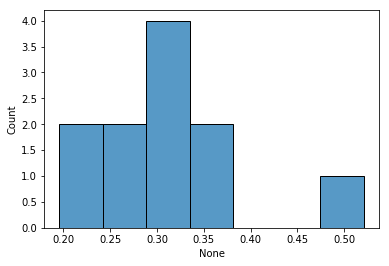

  0%|                                                    | 0/10 [00:00<?, ?it/s]

0.31024528493019277
Q93009
['UBIQUITIN CARBOXYL-TERMINAL HYDROLASE 7']


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 249.80it/s]


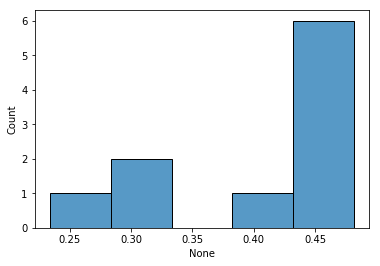

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 324.17it/s]

0.41222964608554946
P23687
['PROLYL ENDOPEPTIDASE']


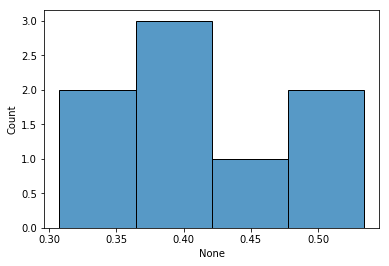

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 238.43it/s]

0.4130938116582291
Q92876
['KALLIKREIN-6']


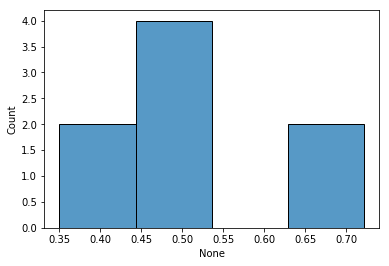

100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 276.28it/s]

0.5178658901181805
P23946
['CHYMASE']


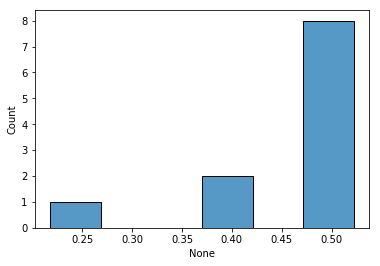

100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 264.28it/s]

0.4658281283758694
Q13546
['RECEPTOR-INTERACTING SERINE/THREONINE-PROTEIN KINASE 1']


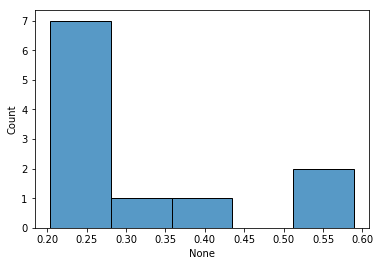

100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 400.35it/s]

0.3307885911531792
O15151
['PROTEIN MDM4']


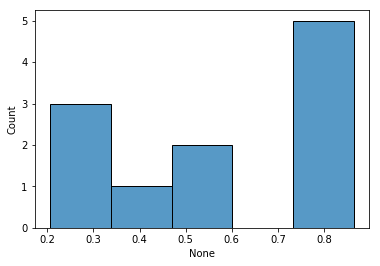

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 381.76it/s]


0.5581494571600925
Q9Y5P4
['LIPID-TRANSFER PROTEIN CERT']


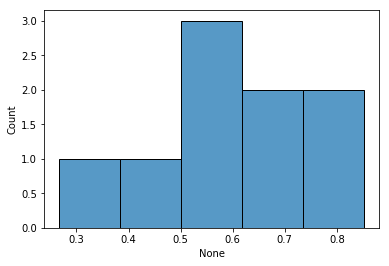

  0%|                                                    | 0/10 [00:00<?, ?it/s]

0.6161035414462426
P41148
['ENDOPLASMIN']


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 429.83it/s]


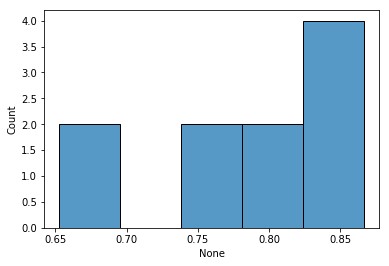

  0%|                                                    | 0/10 [00:00<?, ?it/s]

0.7841126297077861
P14735
['INSULIN-DEGRADING ENZYME']


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 416.93it/s]


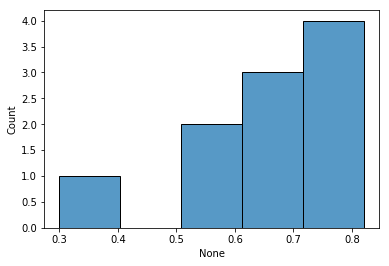

  0%|                                                    | 0/11 [00:00<?, ?it/s]

0.6693344332211033
Q8IKG4
['1-DEOXY-D-XYLULOSE 5-PHOSPHATE REDUCTOISOMERASE']


100%|██████████████████████████████████████████| 11/11 [00:00<00:00, 350.09it/s]


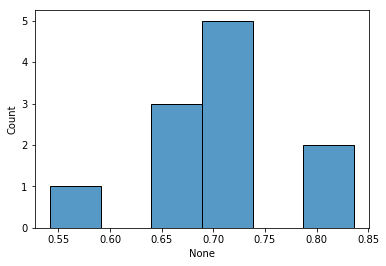

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 265.50it/s]

0.7105581699952477
P10828
['THYROID HORMONE RECEPTOR BETA-1']


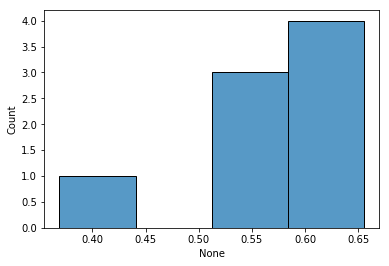

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 407.55it/s]

0.5700914845869423
Q9NWT6
['HYPOXIA-INDUCIBLE FACTOR 1-ALPHA INHIBITOR']


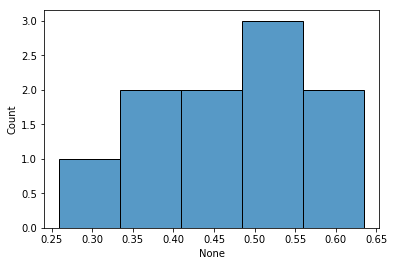

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 373.31it/s]


0.47076629026629024
P50750
['CYCLIN-DEPENDENT KINASE 9']


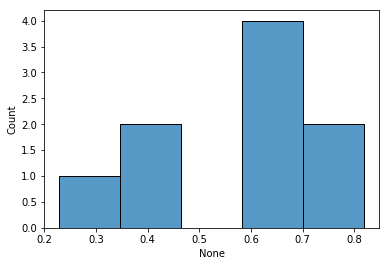

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 432.13it/s]

0.6060716169256879
P30291
['WEE1-LIKE PROTEIN KINASE']


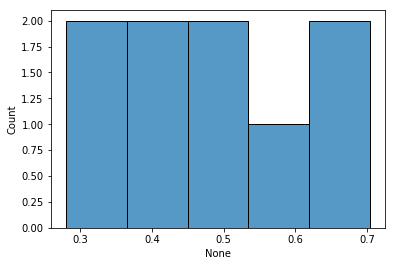

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 277.54it/s]

0.4890077497985963
Q05320
['ENVELOPE GLYCOPROTEIN 1'
 'ENVELOPE GLYCOPROTEIN,GP1,ENVELOPE GLYCOPROTEIN'
 'ENVELOPE GLYCOPROTEIN,ENVELOPE GLYCOPROTEIN,ENVELOPE']


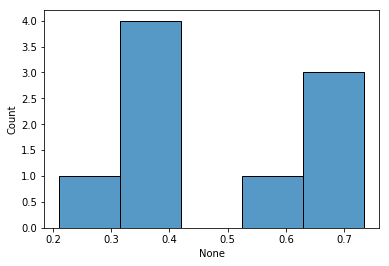

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 244.61it/s]

0.4843817344663508
Q9Z2X8
['KELCH-LIKE ECH-ASSOCIATED PROTEIN 1']


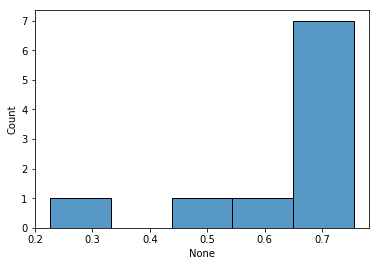

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 372.86it/s]

0.6301056214200449
Q9Y6F1
['POLY [ADP-RIBOSE] POLYMERASE 3']


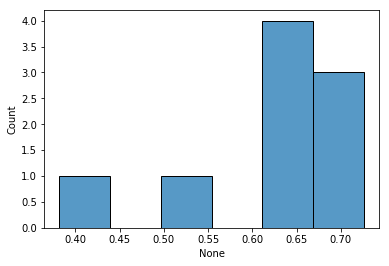

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 266.27it/s]

0.6215576180558107
Q8TF76
['SERINE/THREONINE-PROTEIN KINASE HASPIN']


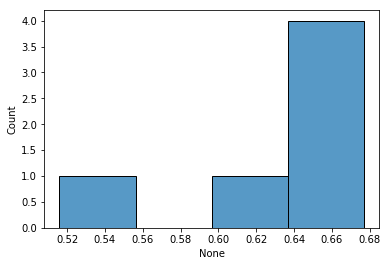

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 412.66it/s]

0.6330800744364932
P09211
['GLUTATHIONE S-TRANSFERASE P1-1' 'GLUTATHIONE S-TRANSFERASE P'
 'GLUTATHIONE S-TRANSFERASE']


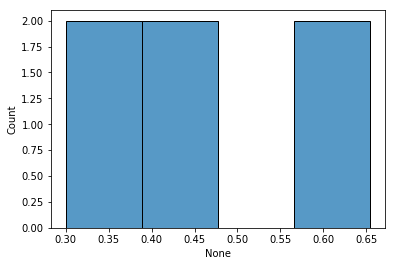

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 413.12it/s]

0.4560826268408822
Q9UBN7
['HISTONE DEACETYLASE 6']


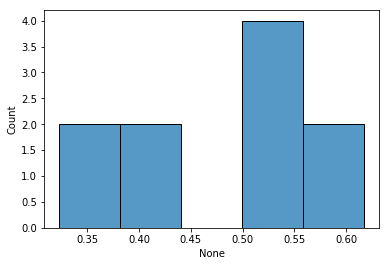

  0%|                                                     | 0/6 [00:00<?, ?it/s]

0.49084703112258044
O14733
['DUAL SPECIFICITY MITOGEN-ACTIVATED PROTEIN KINASE K'
 'DUAL SPECIFICITY MITOGEN-ACTIVATED PROTEIN KINASE KINASE 7']


100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 401.00it/s]


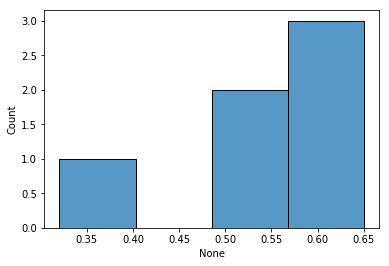

  0%|                                                     | 0/7 [00:00<?, ?it/s]

0.5554166816772684
P0A6D3
['3-PHOSPHOSHIKIMATE 1-CARBOXYVINYLTRANSFERASE']


100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 383.56it/s]


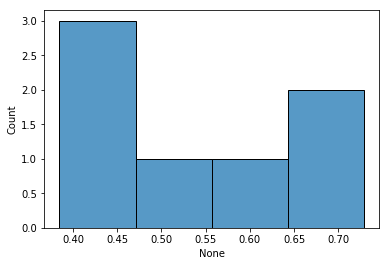

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 374.64it/s]

0.5392039584796716
P02701
['AVIDIN' 'CIRCULAR PERMUTANT OF AVIDIN']


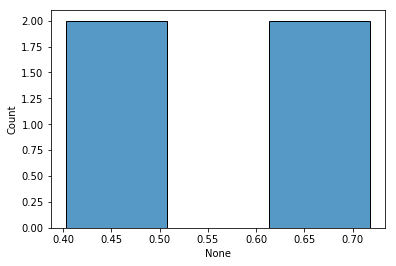

  0%|                                                    | 0/10 [00:00<?, ?it/s]

0.5417503903853034
P45983
['MITOGEN-ACTIVATED PROTEIN KINASE 8']


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 386.55it/s]


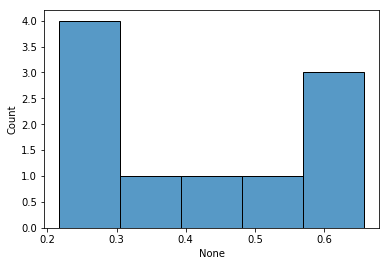

  0%|                                                    | 0/10 [00:00<?, ?it/s]

0.40745182466218755
Q8N1Q1
['CARBONIC ANHYDRASE 13']


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 416.39it/s]


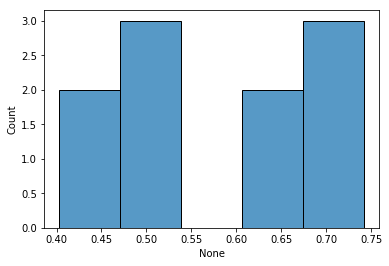

  0%|                                                    | 0/10 [00:00<?, ?it/s]

0.5784416007060449
P04642
['L-LACTATE DEHYDROGENASE A CHAIN']


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 371.04it/s]


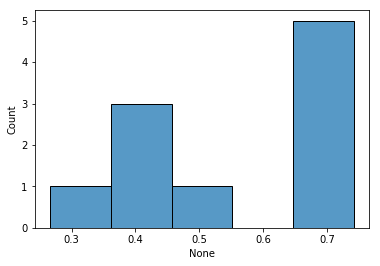

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 267.73it/s]


0.5644447361706264
Q9H9B1
['HISTONE-LYSINE N-METHYLTRANSFERASE EHMT1'
 'HISTONE-LYSINE N-METHYLTRANSFERASE, H3 LYSINE-9 SPECIFIC']


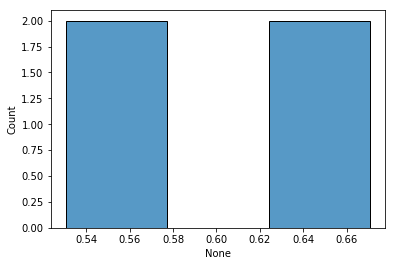

0.6021870082900824
Q15119


100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 385.85it/s]


['PYRUVATE DEHYDROGENASE [LIPOAMIDE] KINASE ISOZYME'
 'PYRUVATE DEHYDROGENASE (ACETYL-TRANSFERRING) KINASE'
 'PYRUVATE DEHYDROGENASE KINASE ISOENZYME 2']


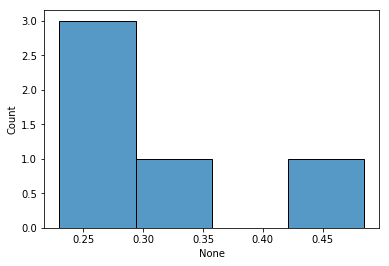

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 322.48it/s]

0.3112158010969805
P80188
['NEUTROPHIL GELATINASE-ASSOCIATED LIPOCALIN' 'HUMAN LIPOCALIN 2']


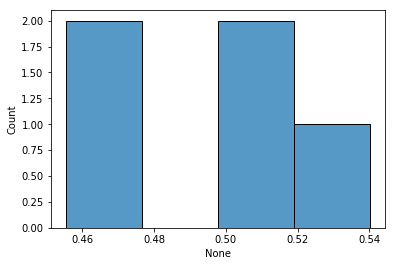

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 371.10it/s]

0.4914427782300777
Q16658
['FASCIN']


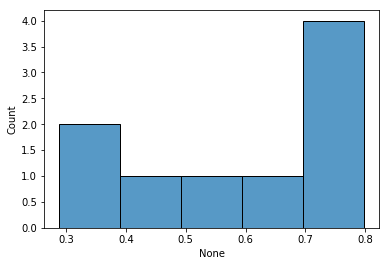

  0%|                                                     | 0/8 [00:00<?, ?it/s]

0.5958875967797055
P53355
['DEATH-ASSOCIATED PROTEIN KINASE 1']


100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 418.21it/s]


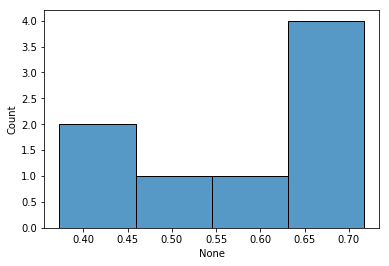

  0%|                                                     | 0/5 [00:00<?, ?it/s]

0.5768479877721149
P05413
['FATTY ACID-BINDING PROTEIN']


100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 402.30it/s]


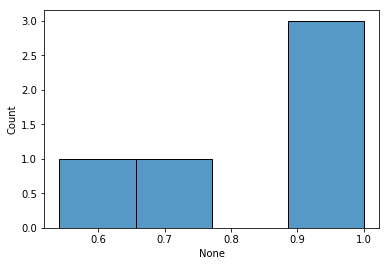

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 384.82it/s]

0.8477272727272729
Q12866
['TYROSINE-PROTEIN KINASE MER']


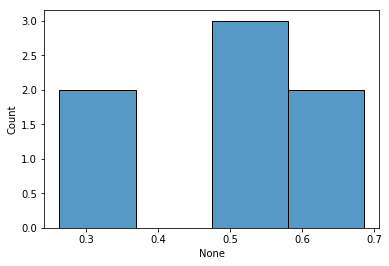

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 346.81it/s]

0.4958176497332101
Q9H7Z6
['HISTONE ACETYLTRANSFERASE KAT8']


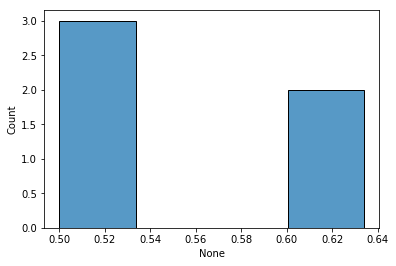

  0%|                                                     | 0/8 [00:00<?, ?it/s]

0.5652858326429163
P07333
['CFMS TYROSINE KINASE' 'MACROPHAGE COLONY-STIMULATING FACTOR 1 RECEPTOR']


100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 377.47it/s]


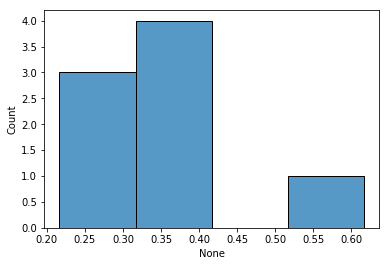

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 258.86it/s]

0.3568511679523656
Q9NP87
['DNA-DIRECTED DNA/RNA POLYMERASE MU'
 'DNA-DIRECTED DNA/RNA POLYMERASE MU,DNA-DIRECTED DNA/RNA']


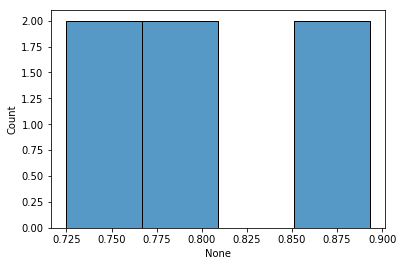

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 394.82it/s]

0.8013213660569861
Q9UGL1
['LYSINE-SPECIFIC DEMETHYLASE 5B'
 'LYSINE-SPECIFIC DEMETHYLASE 5B,LYSINE-SPECIFIC DEMETHYLASE']


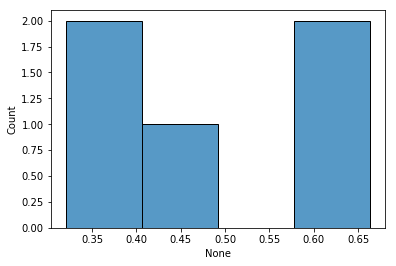

  0%|                                                     | 0/4 [00:00<?, ?it/s]

0.4909320567326185
P04818
['THYMIDYLATE SYNTHASE' 'THYMIDYLATE SYNTHASE,THYMIDYLATE SYNTHASE']


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 356.95it/s]


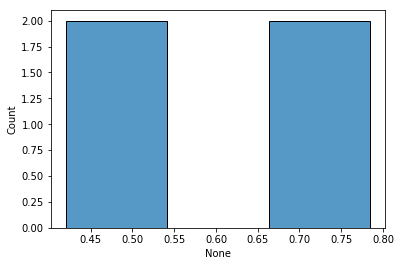

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 236.45it/s]

0.5909624576718479
P32324
['ELONGATION FACTOR 2']


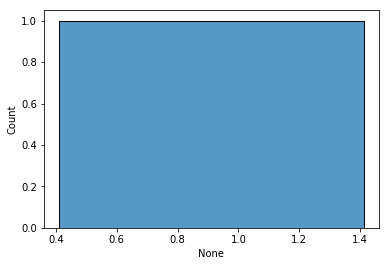

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 399.47it/s]

0.9113924050632911
Q9NRG4
['N-LYSINE METHYLTRANSFERASE SMYD2']


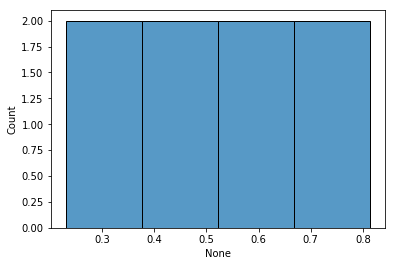

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 338.06it/s]

0.5222227031386738
P78540
['ARGINASE-2, MITOCHONDRIAL PRECURSON' 'ARGINASE-2, MITOCHONDRIAL'
 'ARGINASE-2, MITOCHONDRIAL PRECURSOR']


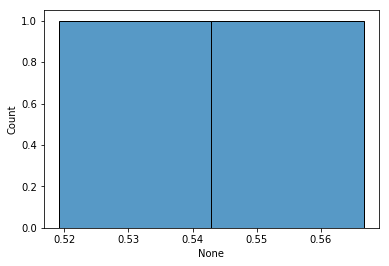

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 435.46it/s]

0.542948717948718
P14618
['PYRUVATE KINASE ISOZYMES M1/M2' 'PYRUVATE KINASE PKM'
 'PYRUVATE KINASE ISOZYME M2']


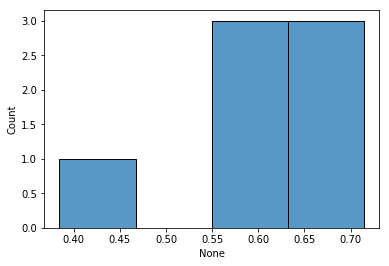

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 279.93it/s]

0.6038128979613125
P39086
['GLUTAMATE RECEPTOR, IONOTROPIC KAINATE 1']


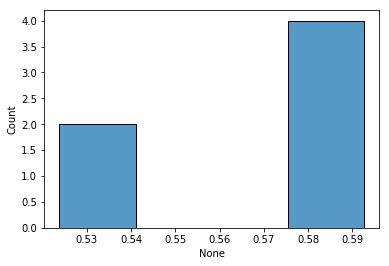

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 252.63it/s]

0.5660495141369458
Q9Y5Y6
['SUPPRESSOR OF TUMORIGENICITY 14'
 'SUPPRESSOR OF TUMORIGENICITY 14 PROTEIN']


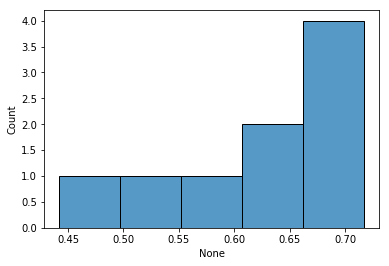

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 425.87it/s]

0.6210933233886164
P11797
['CHITINASE B']


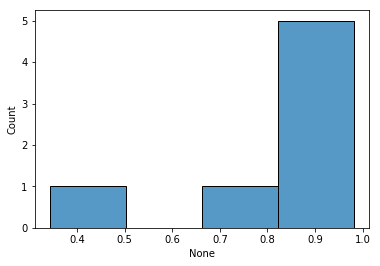

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 415.59it/s]


0.8244861393024286
Q9NUW8
['TYROSYL-DNA PHOSPHODIESTERASE 1'
 'TDP1 CATALYTIC DOMAIN (RESIDUES 149-609)']


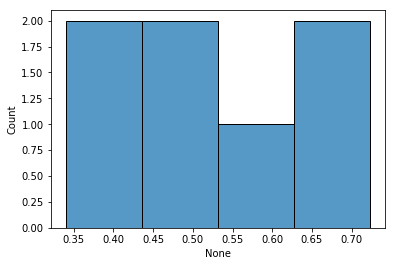

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 250.71it/s]

0.5452483358447094
P06401
['PROGESTERONE RECEPTOR']


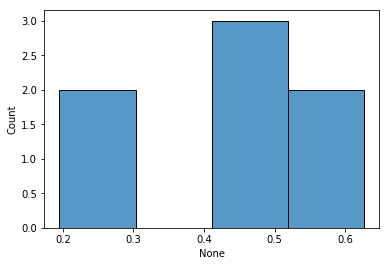

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 280.36it/s]

0.4507143064173193
Q9I194
['ACYL-HOMOSERINE LACTONE ACYLASE PVDQ']


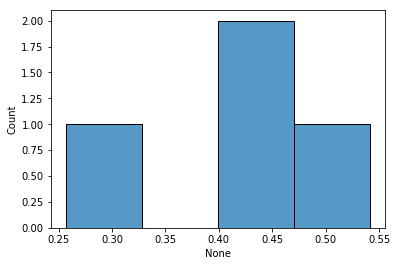

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 266.28it/s]

0.39960585585585584
O95819
['MITOGEN-ACTIVATED PROTEIN KINASE 4']


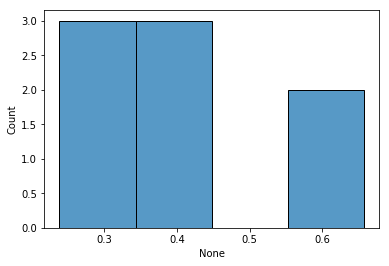

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 278.32it/s]

0.41128523283843527
P07379
['PHOSPHOENOLPYRUVATE CARBOXYKINASE'
 'PHOSPHOENOLPYRUVATE CARBOXYKINASE, CYTOSOLIC']


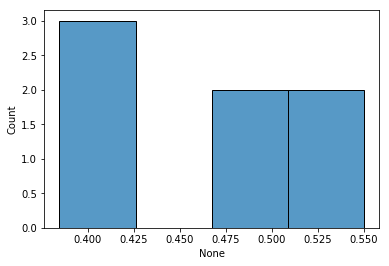

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 261.31it/s]

0.46362234228511173
P29373
['CELLULAR RETINOIC ACID-BINDING PROTEIN 2' 'CRABP-II']


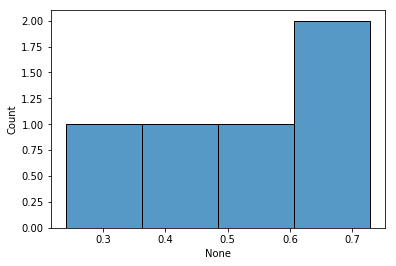

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 252.97it/s]

0.5243293499584841
P0A7Z4
['DNA-DIRECTED RNA POLYMERASE SUBUNIT ALPHA']


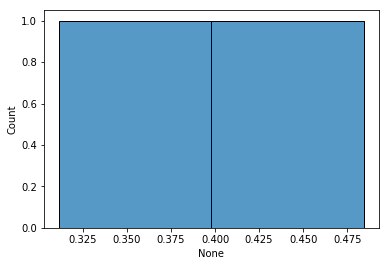

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 216.00it/s]

0.39798252062403006
Q8Y8D7
['INORGANIC POLYPHOSPHATE/ATP-NAD KINASE' 'NAD KINASE 1'
 'INORGANIC POLYPHOSPHATE/ATP-NAD KINASE 1']


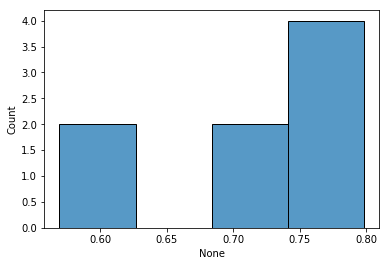

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 242.23it/s]

0.7172863937881101
O00329
['PHOSPHATIDYLINOSITOL 4,5-BISPHOSPHATE 3-KINASE CATALYTIC'
 'PHOSPHATIDYLINOSITOL-4,5-BISPHOSPHATE 3-KINASE CATALYTIC'
 'PHOSPHATIDYLINOSITOL 4,5-BISPHOSPHATE 3-KINASE']


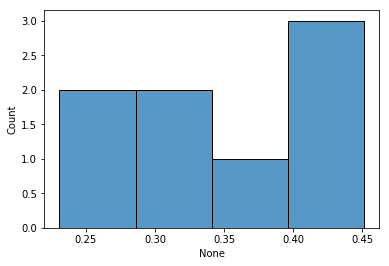

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 201.90it/s]

0.351121987007349
P78417
['GLUTATHIONE S-TRANSFERASE OMEGA-1']


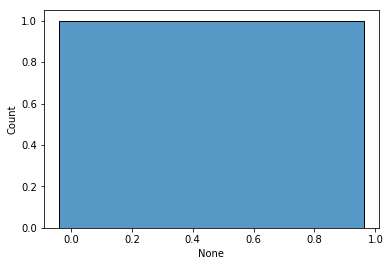

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 227.07it/s]

0.46153846153846156
P14900
['UDP-N-ACETYLMURAMOYLALANINE-D-GLUTAMATE LIGASE']


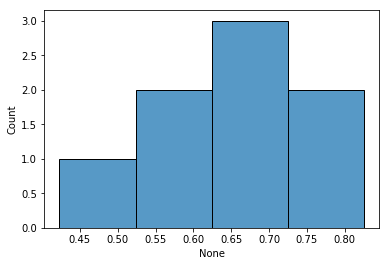

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 257.19it/s]

0.6606531154489075
P54645
["5'-AMP-ACTIVATED PROTEIN KINASE CATALYTIC SUBUNIT A"]


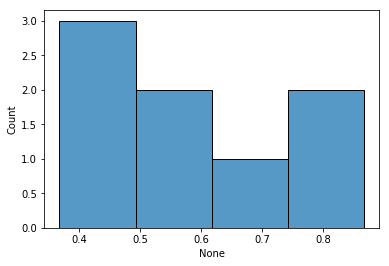

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 265.38it/s]

0.590030741085524
I6YFP0
['BIFUNCTIONAL LIGASE/REPRESSOR BIRA']


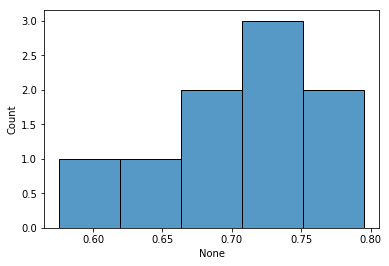

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 272.56it/s]

0.7101070636378188
P9WPQ5
['ATP-DEPENDENT DETHIOBIOTIN SYNTHETASE BIOD']


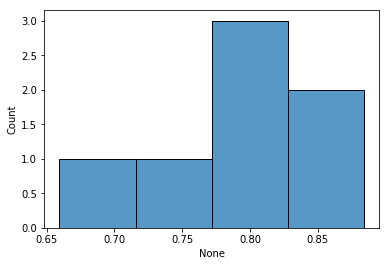

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 257.85it/s]

0.7856075141340185
O43451
['MALTASE-GLUCOAMYLASE']


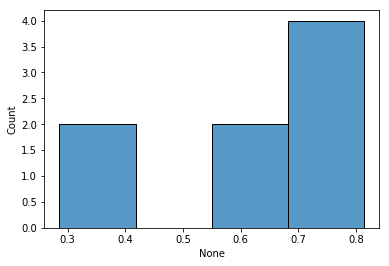

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 280.72it/s]

0.6338150648413008
P0A988
['DNA POLYMERASE III SUBUNIT BETA']


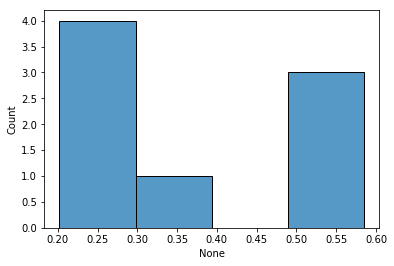

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 276.15it/s]

0.37259893113694487
Q9WUL6
['MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE 14'
 'NF-KAPPA-BETA-INDUCING KINASE']


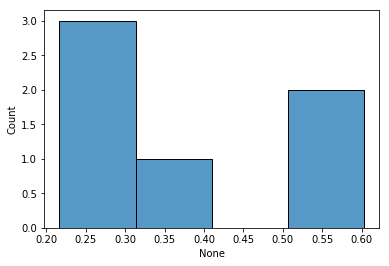

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 263.82it/s]

0.40082904956926985
P16442
['FUCOSYLGLYCOPROTEIN ALPHA-N' 'HISTO-BLOOD GROUP ABO SYSTEM TRANSFERASE'
 'FUCOSYLGLYCOPROTEIN ALPHA-N-ACETYLGALACTOSAMINYLTRA']


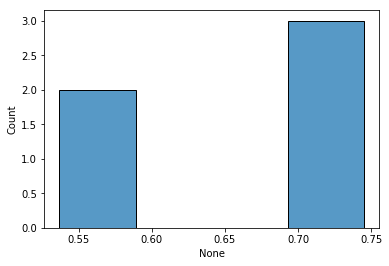

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 249.95it/s]

0.6619885538398803
P63316
['TROPONIN C, SLOW SKELETAL AND CARDIAC MUSCLES' 'TROPONIN C']


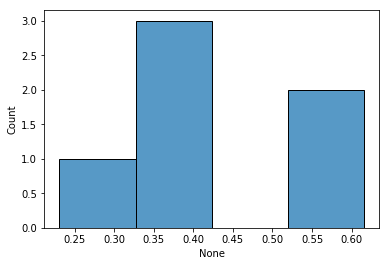

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 273.52it/s]

0.41514881671493425
P39045
['D-ALANYL-D-ALANINE CARBOXYPEPTIDASE']


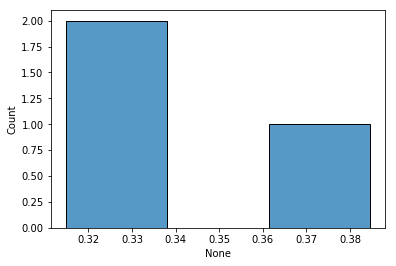

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 290.03it/s]

0.3442545109211776
P04190
['BETA-LACTAMASE 2']


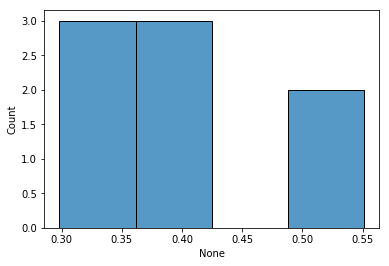

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 271.58it/s]

0.40291904247701316
P49759
['DUAL SPECIFICITY PROTEIN KINASE CLK1']


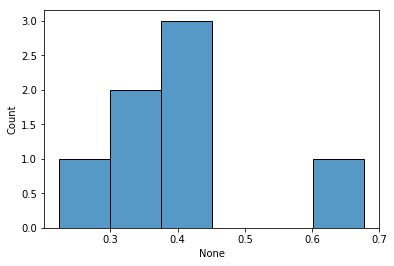

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 268.15it/s]

0.4065116197829914
Q9BZ95
['HISTONE-LYSINE N-METHYLTRANSFERASE NSD3']


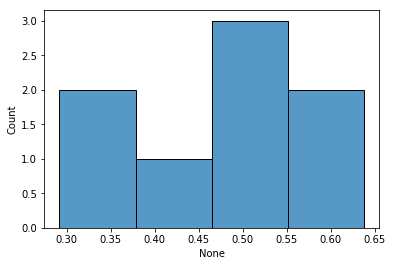

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 269.26it/s]

0.48023700475445585
O14744
['PROTEIN ARGININE N-METHYLTRANSFERASE 5']


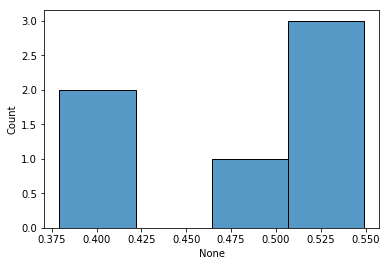

100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 272.65it/s]

0.4815728364121464
P08631
['TYROSINE-PROTEIN KINASE HCK']


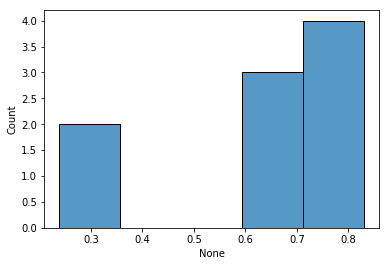

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 254.06it/s]

0.6332883874376543
P17707
['S-ADENOSYLMETHIONINE DECARBOXYLASE BETA CHAIN'
 'S-ADENOSYLMETHIONINE DECARBOXYLASE PROENZYME']


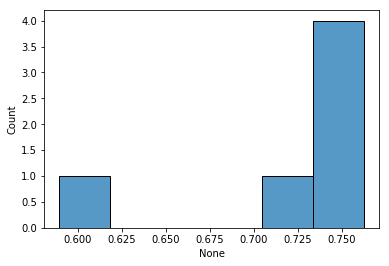

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 273.33it/s]

0.7233756946484257
P69834
['2-C-METHYL-D-ERYTHRITOL 4-PHOSPHATE CYTIDYLYLTRANSFERASE']


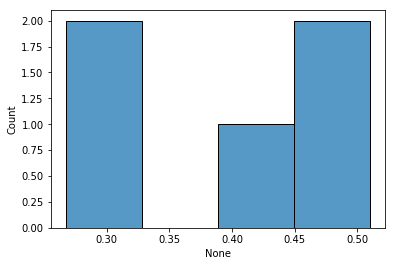

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 337.71it/s]

0.3970586001842597
P9WMC1
['HTH-TYPE TRANSCRIPTIONAL REGULATOR ETHR']


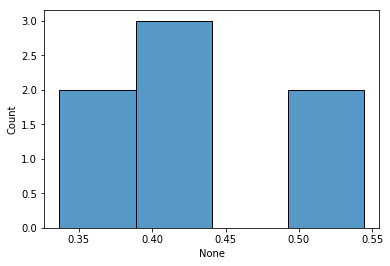

  0%|                                                     | 0/9 [00:00<?, ?it/s]

0.4304229564183096
Q8WQX9
['PHOSPHODIESTERASE' 'PHOSPHODIESTERASE B1'
 'CLASS 1 PHOSPHODIESTERASE PDEB1']


100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 473.49it/s]


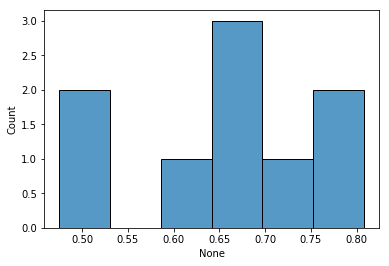

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 486.31it/s]

0.6622334782284306
Q14289
['PROTEIN-TYROSINE KINASE 2 BETA']


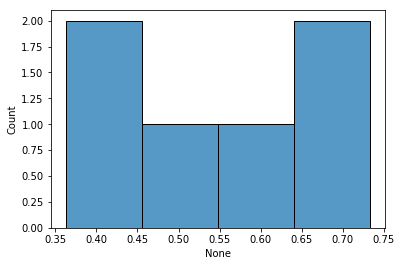

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 467.47it/s]

0.5515412905196602
Q9HYN5
['FUCOSE-BINDING LECTIN PA-IIL']


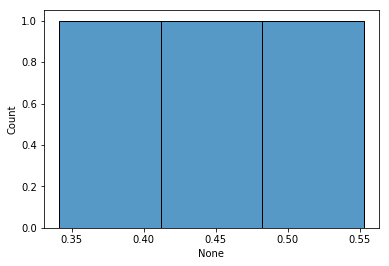

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 446.90it/s]

0.4511848176803248
Q48255
['3-DEHYDROQUINATE DEHYDRATASE']


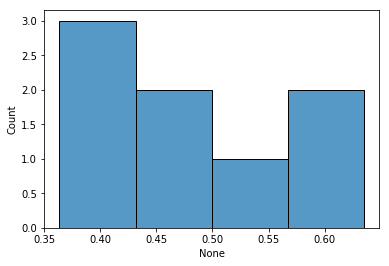

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 305.01it/s]

0.48262141504329004
P0A884
['THYMIDYLATE SYNTHASE']


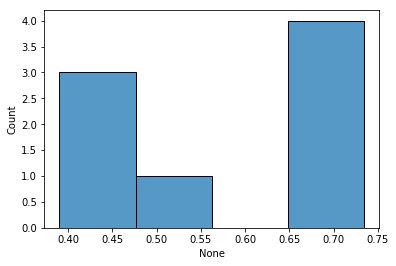

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 269.05it/s]

0.5680017357064021
P04150
['GLUCOCORTICOID RECEPTOR']


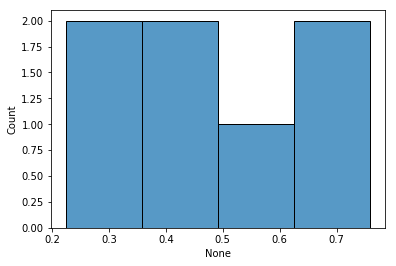

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 331.33it/s]

0.46868313210273127
P10721
['MAST/STEM CELL GROWTH FACTOR RECEPTOR KIT'
 'HOMO SAPIENS V-KIT HARDY-ZUCKERMAN 4 FELINE'
 'MAST/STEM CELL GROWTH FACTOR RECEPTOR']


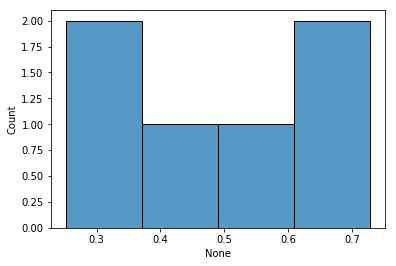

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 349.93it/s]

0.474292723392403
Q07010
['HYPOXANTHINE-GUANINE PHOSPHORIBOSYLTRANSFERASE']


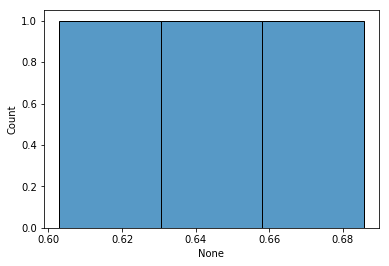

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 411.79it/s]

0.6483018207282912
P22748
['CARBONIC ANHYDRASE 4']


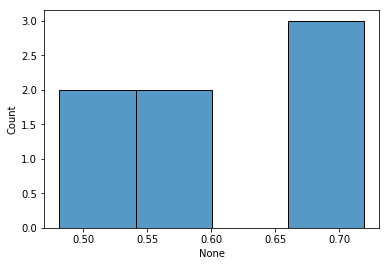

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 280.44it/s]

0.6174279686126
Q86U86
['PROTEIN POLYBROMO-1']


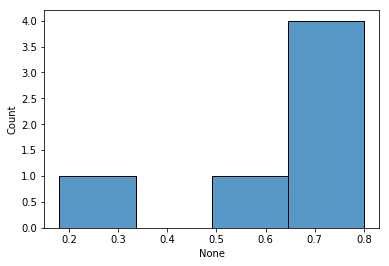

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 243.46it/s]

0.6214133923150317
P55859
['PURINE NUCLEOSIDE PHOSPHORYLASE']


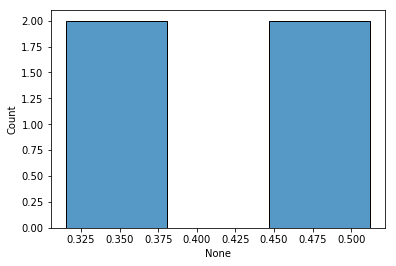

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 254.16it/s]

0.41984432072581596
P24735
['BETA-LACTAMASE']


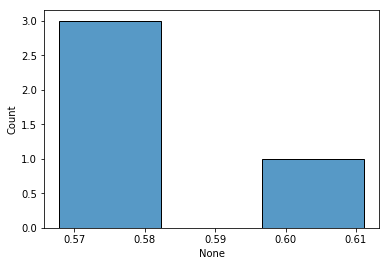

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 263.84it/s]

0.5814652371669915
Q9HBH9
['MAP KINASE-INTERACTING SERINE/THREONINE-PROTEIN KINASE 2']


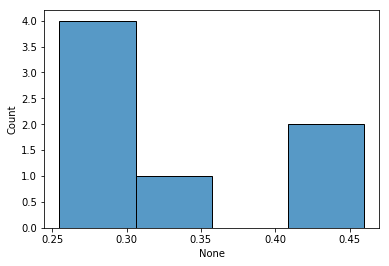

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 259.96it/s]

0.3391956416098276
Q9PTN2
['VITAMIN D3 RECEPTOR A']


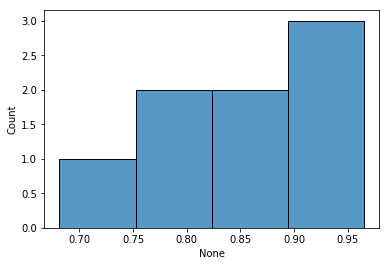

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 271.27it/s]

0.8470606645671654
Q8NEB9
['PHOSPHATIDYLINOSITOL 3-KINASE CATALYTIC SUBUNIT TYP'
 'PHOSPHATIDYLINOSITOL 3-KINASE CATALYTIC SUBUNIT TYPE 3']


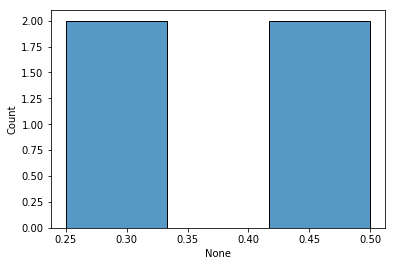

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 390.00it/s]

0.385
P0A0K8
['DNA GYRASE SUBUNIT B']


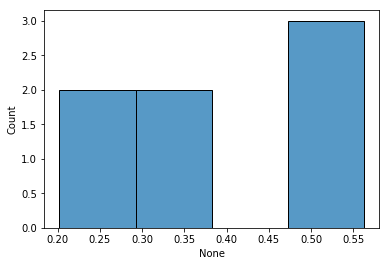

  0%|                                                     | 0/6 [00:00<?, ?it/s]

0.385628980576812
P02791
['FERRITIN LIGHT CHAIN']


100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 279.64it/s]


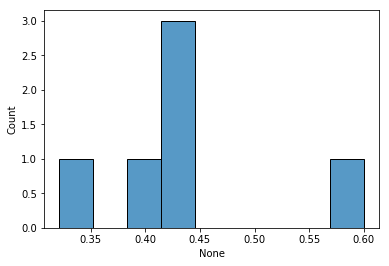

  0%|                                                     | 0/6 [00:00<?, ?it/s]

0.4375992063492064
P28907
['ADP-RIBOSYL CYCLASE 1'
 'ADP-RIBOSYL CYCLASE/CYCLIC ADP-RIBOSE HYDROLASE 1']


100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 381.65it/s]


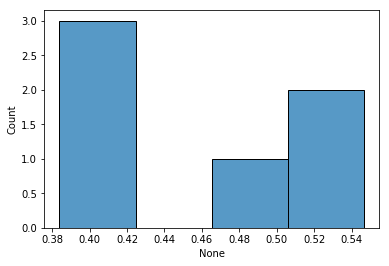

  0%|                                                     | 0/5 [00:00<?, ?it/s]

0.4627579788284551
P22303
['ACETYLCHOLINESTERASE']


100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 271.86it/s]


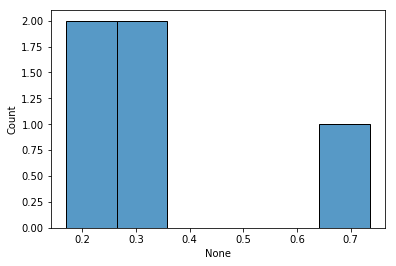

  0%|                                                     | 0/8 [00:00<?, ?it/s]

0.33598595848595847
P63086
['EXTRACELLULAR REGULATED KINASE 2' 'MITOGEN-ACTIVATED PROTEIN KINASE 1']


100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 397.29it/s]


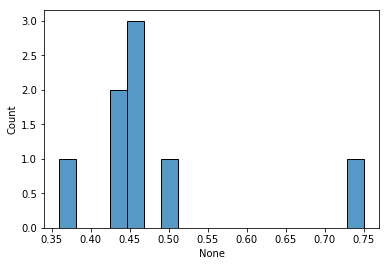

0.4836681098520721
P50120
['RETINOL-BINDING PROTEIN 2']


0it [00:00, ?it/s]


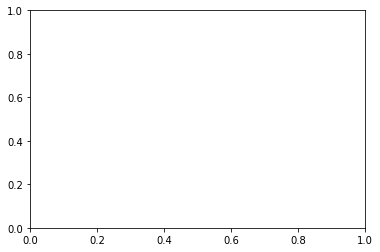

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 367.72it/s]

nan
Q8IXJ6
['NAD-DEPENDENT PROTEIN DEACETYLASE SIRTUIN-2']


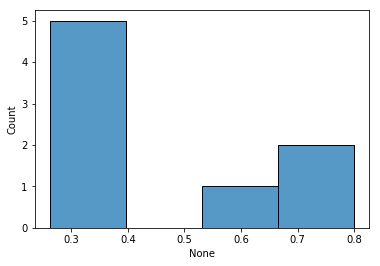

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 357.96it/s]

0.4889807800361787
P42260
['GLUTAMATE RECEPTOR, IONOTROPIC KAINATE 2' 'GLUTAMATE RECEPTOR 6']


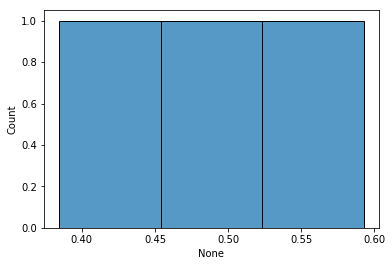

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 275.43it/s]


0.4839280827981393
Q9NZJ5
['EUKARYOTIC TRANSLATION INITIATION FACTOR 2-ALPHA KINASE 3']


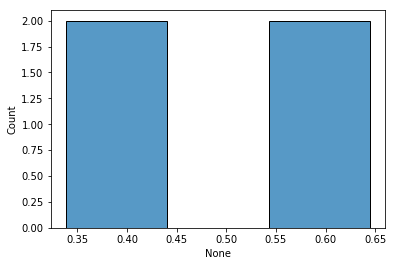

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 390.29it/s]

0.500039628521423
Q13490
['BACULOVIRAL IAP REPEAT-CONTAINING PROTEIN 2']


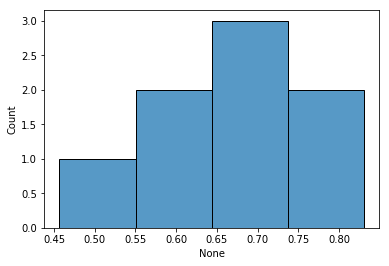

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 273.04it/s]

0.6729938245111093
P07824
['ARGINASE 1' 'ARGINASE-1' 'ARGINASE']


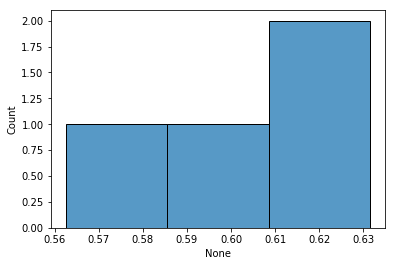

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 255.91it/s]

0.6047697368421052
P04062
['GLUCOSYLCERAMIDASE']


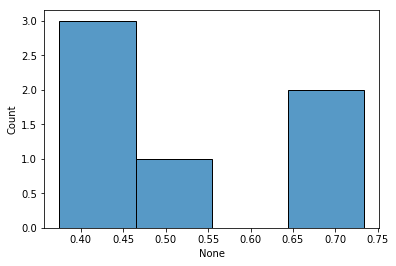

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 313.45it/s]

0.532422913343966
Q09472
['HISTONE ACETYLTRANSFERASE P300']


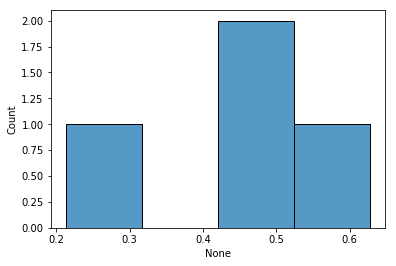

0.45720543673401615
Q81R22
['DIHYDROFOLATE REDUCTASE']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 331.43it/s]


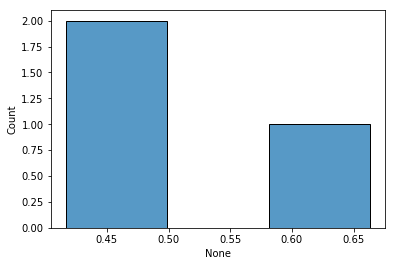

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 392.72it/s]

0.519667148188275
Q9UHD2
['SERINE/THREONINE-PROTEIN KINASE TBK1']


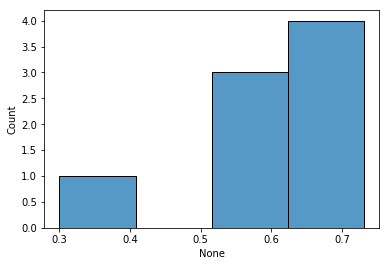

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 404.66it/s]

0.610662602360043
Q03111
['PROTEIN ENL']


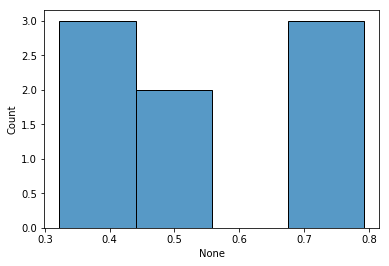

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 410.33it/s]

0.5377306350190163
P55212
['CASPASE-6']


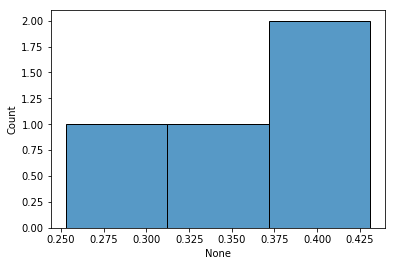

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 393.23it/s]

0.3597851356472046
P01011
['ALPHA-1-ANTICHYMOTRYPSIN']


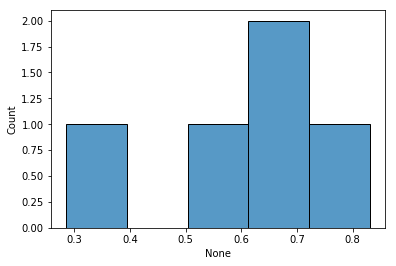

  0%|                                                     | 0/6 [00:00<?, ?it/s]

0.5867148665275396
Q70I53
['HISTONE DEACETYLASE-LIKE AMIDOHYDROLASE']


100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 285.59it/s]


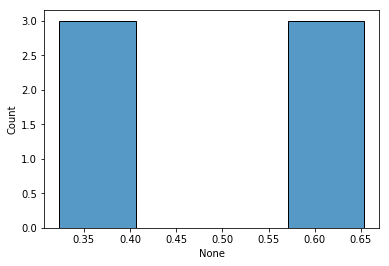

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 252.14it/s]

0.5068013082057616
P00374
['DIHYDROFOLATE REDUCTASE']


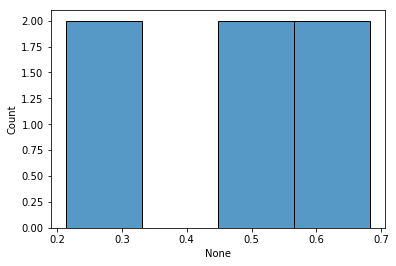

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 399.17it/s]

0.47344541067954
O15294
['UDP-N-ACETYLGLUCOSAMINE--PEPTIDE' 'UDP-N-ACETYLGLUCOSAMINE--PEPTIDE N']


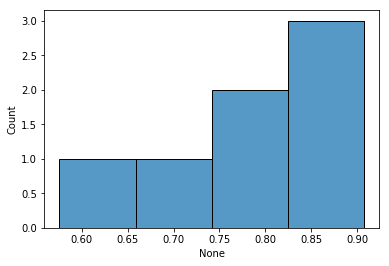

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 264.09it/s]

0.7851956369261301
P07550
['ENDOLYSIN,BETA-2 ADRENERGIC RECEPTOR,BETA-2 ADRENERGIC'
 'FUSION PROTEIN OF BETA-2 ADRENERGIC RECEPTOR AND T4'
 'BETA-2 ADRENERGIC RECEPTOR, LYSOZYME']


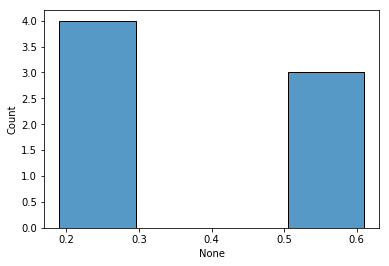

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 273.14it/s]

0.3787393009442034
Q13164
['MITOGEN-ACTIVATED PROTEIN KINASE 7']


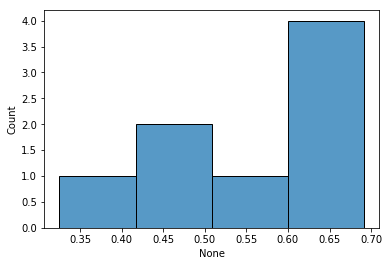

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 251.29it/s]

0.5606385003631584
P0AEG4
['THIOL:DISULFIDE INTERCHANGE PROTEIN DSBA']


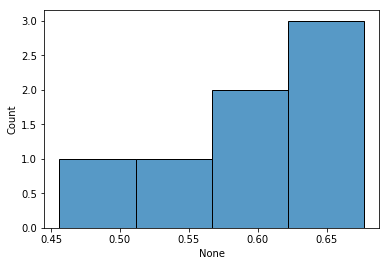

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 272.05it/s]

0.599541306063586
Q99640
['MEMBRANE-ASSOCIATED TYROSINE- AND THREONINE-SPECIFIC CDC2']


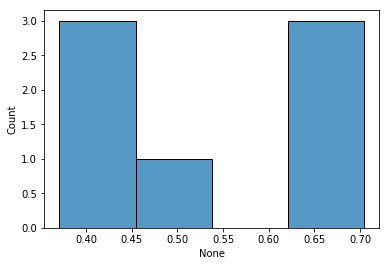

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 268.91it/s]

0.5269956482416752
P37268
['SQUALENE SYNTHASE' 'FARNESYL-DIPHOSPHATE FARNESYLTRANSFERASE']


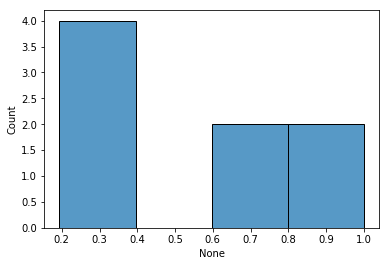

100%|████████████████████████████████████████████| 8/8 [00:00<00:00, 250.93it/s]

0.5408717949877784
P53634
['DIPEPTIDYL PEPTIDASE 1']


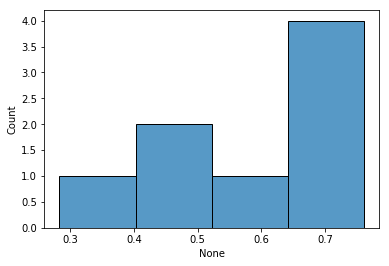

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 267.29it/s]

0.5777582906946441
P14555
['PHOSPHOLIPASE A2']


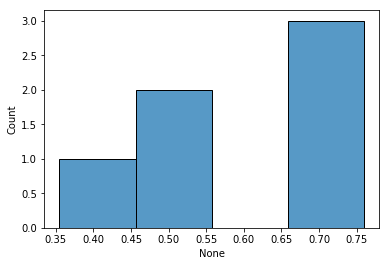

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 270.50it/s]

0.5930719681076779
Q9R1E6
['ECTONUCLEOTIDE PYROPHOSPHATASE/PHOSPHODIESTERASE']


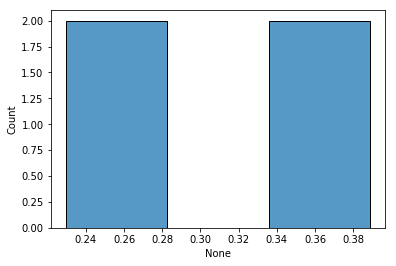

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 255.66it/s]

0.29992090882945066
Q16790
['CARBONIC ANHYDRASE 9']


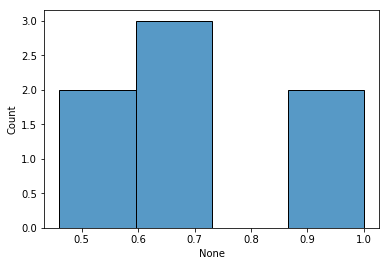

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 263.02it/s]

0.7225805423605252
Q8WWQ0
['PH-INTERACTING PROTEIN']


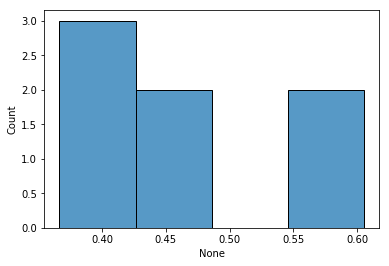

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 270.75it/s]

0.4771896435082376
P15379
['CD44 ANTIGEN']


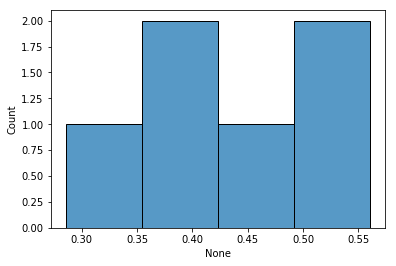

0it [00:00, ?it/s]

0.43307679974346636
P56740
['DIHYDRONEOPTERIN ALDOLASE']


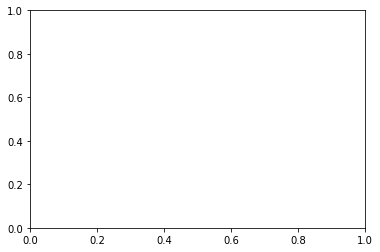

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 230.38it/s]


nan
P55072
['TRANSITIONAL ENDOPLASMIC RETICULUM ATPASE']


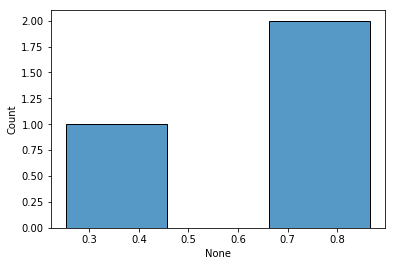

  0%|                                                     | 0/6 [00:00<?, ?it/s]

0.6521677050882658
P07949
['PROTO-ONCOGENE TYROSINE-PROTEIN KINASE RECEPTOR RET'
 'PROTO-ONCOGENE TYROSINE-PROTEIN KINASE']


100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 274.54it/s]


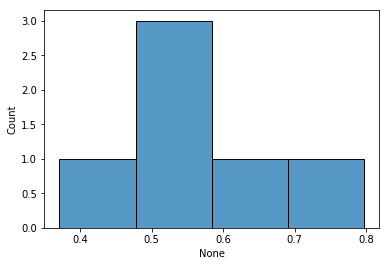

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 247.75it/s]

0.5575401447502885
P23443
['RIBOSOMAL PROTEIN S6 KINASE BETA-1' 'P70S6K1']


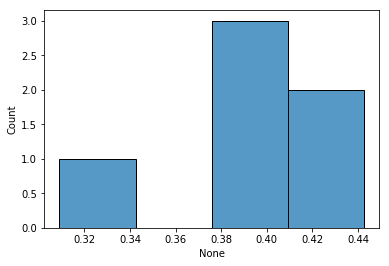

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 255.25it/s]

0.39579709867320484
Q6T755
['PHOSPHOETHANOLAMINE N-METHYLTRANSFERASE']


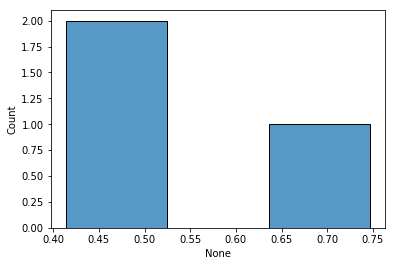

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 273.21it/s]

0.5270785335700167
Q8NFU5
['INOSITOL POLYPHOSPHATE MULTIKINASE,INOSITOL POLYPHOSPHATE']


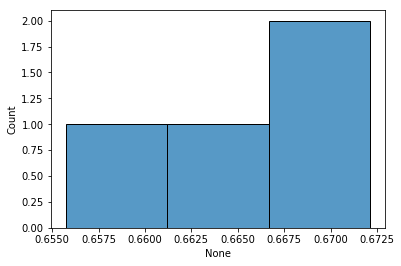

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 263.04it/s]

0.6653225806451613
P02743
['SERUM AMYLOID P-COMPONENT']


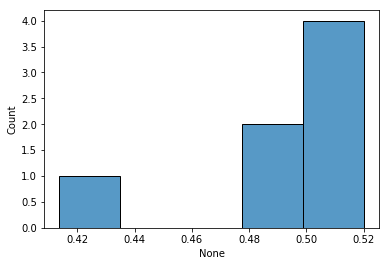

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 273.88it/s]

0.4893527070341417
P36544
['ACETYLCHOLINE-BINDING PROTEIN' 'ACETYLCHOLINE BINDING PROTEIN']


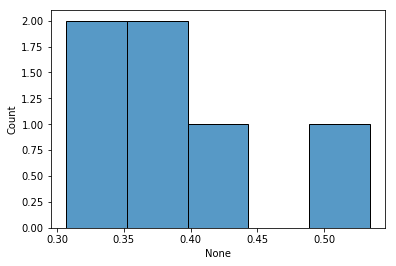

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 265.68it/s]

0.3877858010060838
Q03181
['PEROXISOME PROLIFERATOR-ACTIVATED RECEPTOR DELTA']


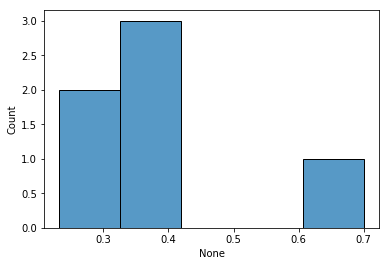

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 398.17it/s]

0.3726837729639454
Q00960
['GLUTAMATE RECEPTOR IONOTROPIC, NMDA 1']


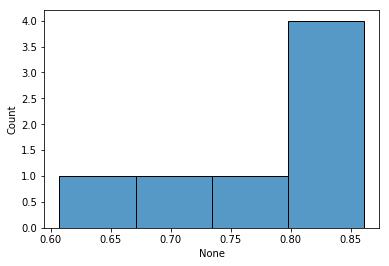

100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 278.42it/s]

0.7829203939013885
P50053
['KETOHEXOKINASE']


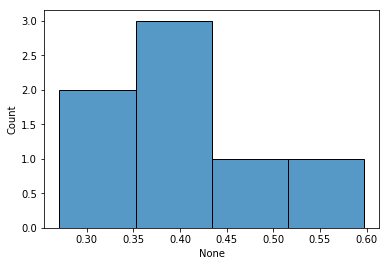

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 459.99it/s]


0.39323514273721605
P54818
['GALACTOCEREBROSIDASE']


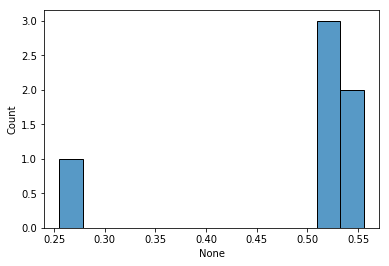

0.48469753951606265
Q96KQ7
['HISTONE-LYSINE N-METHYLTRANSFERASE EHMT2'
 'HISTONE-LYSINE N-METHYLTRANSFERASE, H3 LYSINE-9 SPECIFIC']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 273.51it/s]


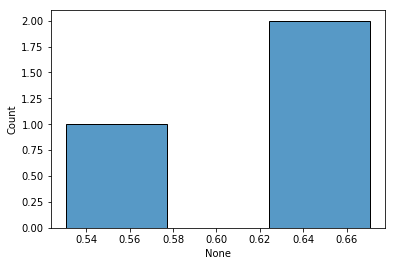

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 335.24it/s]


0.6241281322655645
P08238
['HEAT SHOCK PROTEIN HSP90-BETA']


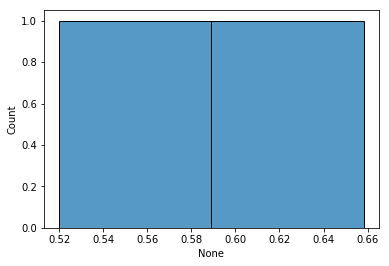

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 297.28it/s]

0.5891139240506329
P04278
['SEX HORMONE-BINDING GLOBULIN']


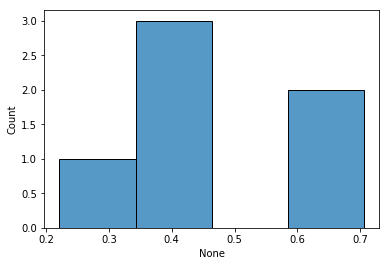

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 366.88it/s]

0.4687049639819543
O75936
['GAMMA-BUTYROBETAINE DIOXYGENASE']


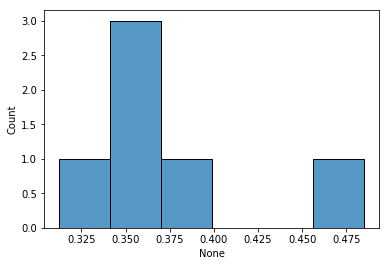

  0%|                                                     | 0/6 [00:00<?, ?it/s]

0.36834309481368305
P11444
['MANDELATE RACEMASE']


100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 357.90it/s]


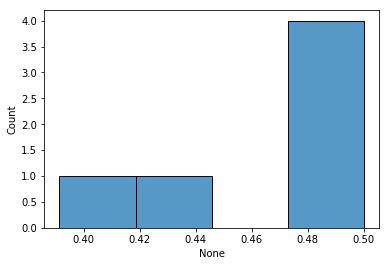

  0%|                                                     | 0/6 [00:00<?, ?it/s]

0.4699792960662526
P23470
['RECEPTOR-TYPE TYROSINE-PROTEIN PHOSPHATASE GAMMA']


100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 389.07it/s]


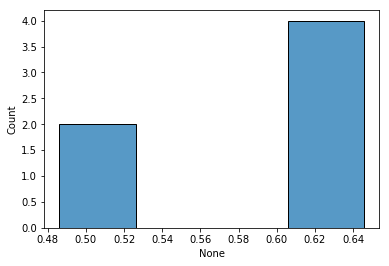

0.5930928694658788
Q873X9
['CHITINASE']


100%|████████████████████████████████████████████| 7/7 [00:00<00:00, 392.41it/s]


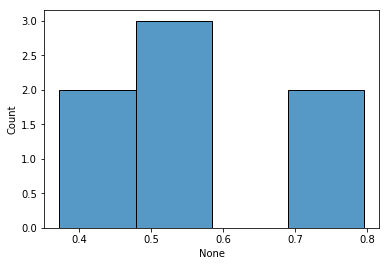

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 276.26it/s]

0.5467887721567949
P56221
['SCYTALONE DEHYDRATASE']


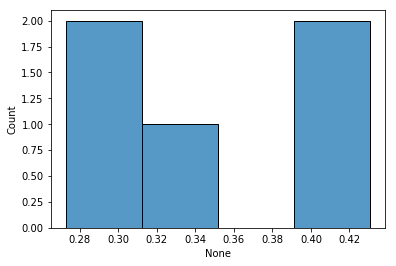

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 438.61it/s]

0.35404194971199143
O75460
['SERINE/THREONINE-PROTEIN KINASE/ENDORIBONUCLEASE IR'
 'SERINE/THREONINE-PROTEIN KINASE/ENDORIBONUCLEASE IRE1']


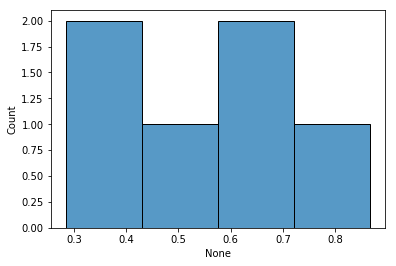

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 265.69it/s]

0.5658490777928499
P00740
['COAGULATION FACTOR IX']


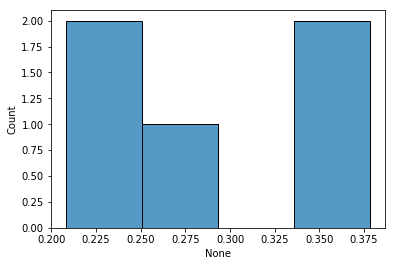

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 359.83it/s]

0.28575892689681237
P35247
['PULMONARY SURFACTANT-ASSOCIATED PROTEIN D']


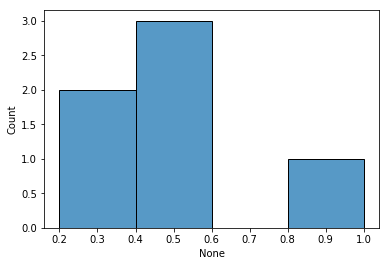

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 371.60it/s]

0.5306574431574432
Q86X55
['HISTONE-ARGININE METHYLTRANSFERASE CARM1']


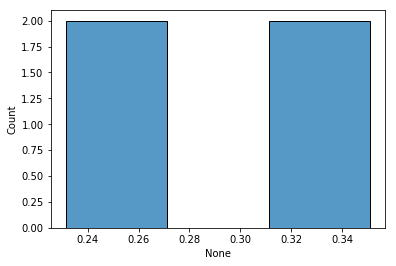

  0%|                                                     | 0/6 [00:00<?, ?it/s]

0.28309799588735135
Q14145
['KELCH-LIKE ECH-ASSOCIATED PROTEIN 1']


100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 353.76it/s]


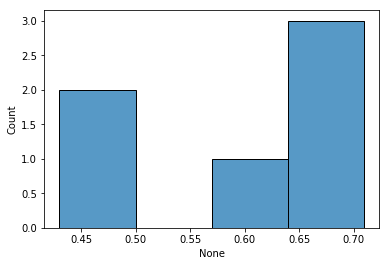

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 258.82it/s]

0.6015955743321795
P08473
['NEPRILYSIN']


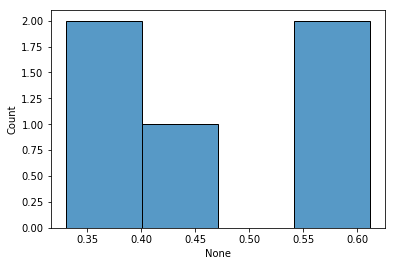

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 250.59it/s]

0.46597575310261885
P00669
['SEMINAL RIBONUCLEASE']


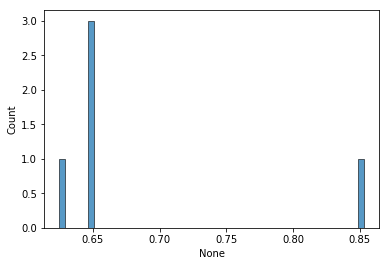

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 282.39it/s]

0.6853174603174603
P00763
['TRYPSIN BETA']


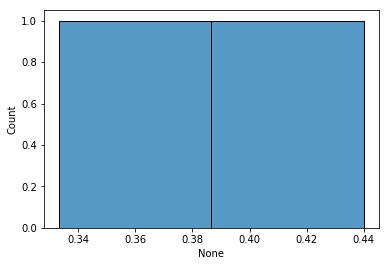

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 266.11it/s]

0.38666666666666666
P00338
['L-LACTATE DEHYDROGENASE A CHAIN']


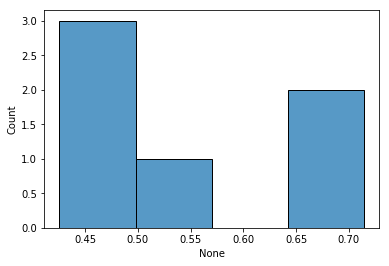

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 239.37it/s]

0.5431163018917755
P17752
['TRYPTOPHAN 5-HYDROXYLASE 1']


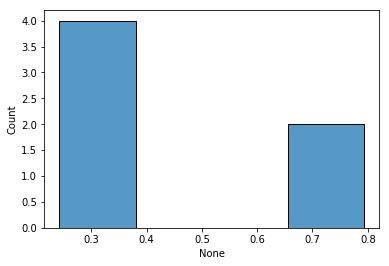

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 372.07it/s]

0.4554539548582735
P14769
['N-ACETYLLACTOSAMINIDE ALPHA-1,3-GALACTOSYLTRANSFERASE']


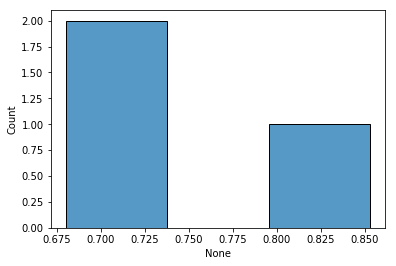

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 325.09it/s]

0.7379307467667918
Q13822
['ECTONUCLEOTIDE PYROPHOSPHATASE/PHOSPHODIESTERASE']


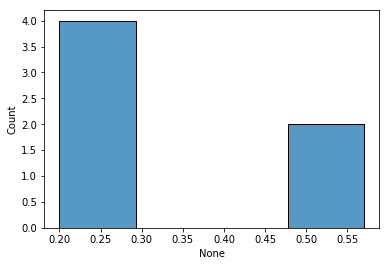

  0%|                                                     | 0/6 [00:00<?, ?it/s]

0.34564356322626305
A5U4N0
['ADENOSINE KINASE']


100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 360.49it/s]


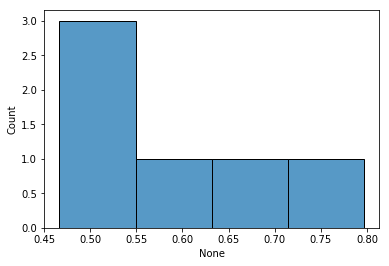

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 264.31it/s]

0.58839043468851
O94760
['N(G),N(G)-DIMETHYLARGININE DIMETHYLAMINOHYDROLASE 1']


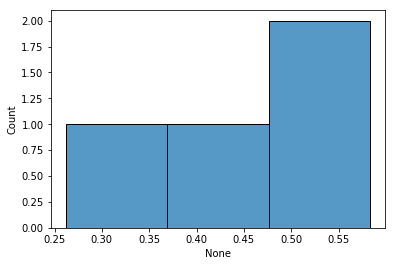

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 268.35it/s]

0.45451707097933514
P07267
['SACCHAROPEPSIN']


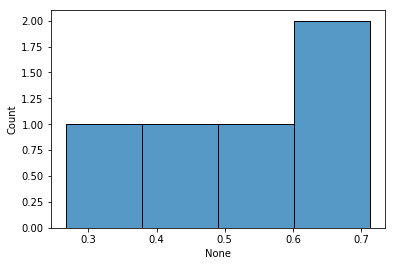

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 262.91it/s]

0.5357142857142857
Q6DE08
['SERINE/THREONINE-PROTEIN KINASE 12-A' 'AURORA KINASE B-A']


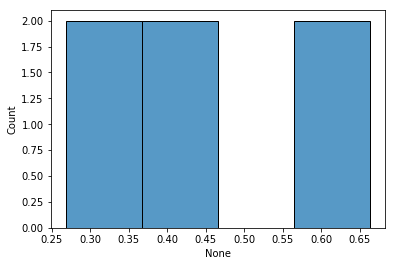

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 258.75it/s]

0.4509396811996081
P06730
['EUKARYOTIC TRANSLATION INITIATION FACTOR 4E']


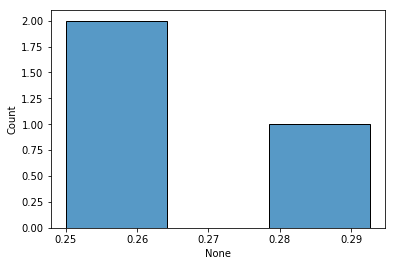

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 250.11it/s]

0.2686136071887035
Q07869
['PEROXISOME PROLIFERATOR-ACTIVATED RECEPTOR ALPHA']


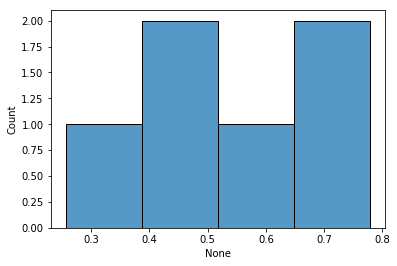

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 199.61it/s]

0.5547017586530264
P93836
['4-HYDROXYPHENYLPYRUVATE DIOXYGENASE']


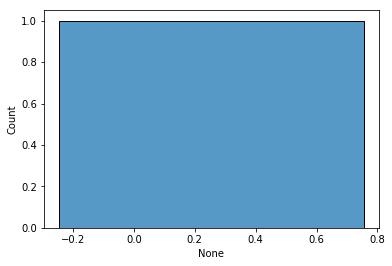

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 287.17it/s]

0.2549019607843137
P62617
['2-C-METHYL-D-ERYTHRITOL 2,4-CYCLODIPHOSPHATE'
 '2-C-METHYL-D-ERYTHRITOL 2,4-CYCLODIPHOSPHATE SYNTHASE']


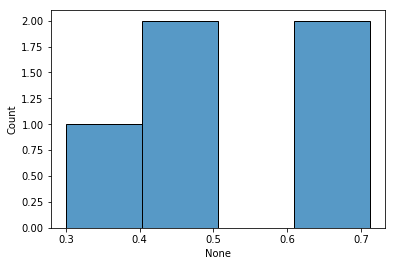

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 249.19it/s]

0.5075528389973952
P50135
['HISTAMINE N-METHYLTRANSFERASE']


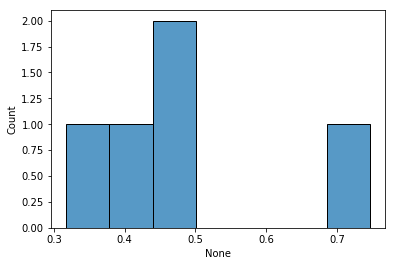

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 251.86it/s]

0.48216981813367354
P10153
['EOSINOPHIL-DERIVED NEUROTOXIN']


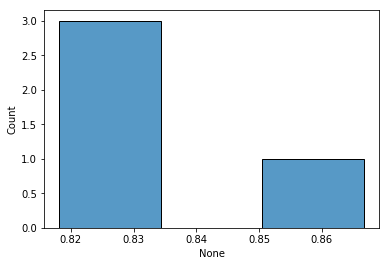

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 305.34it/s]

0.8347005315359746
Q9BZP6
['ACIDIC MAMMALIAN CHITINASE']


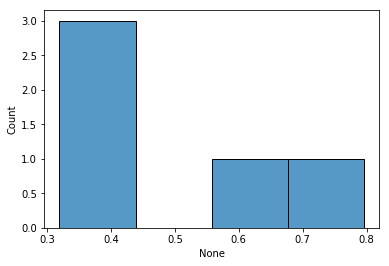

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 272.06it/s]

0.491112968698136
Q9H7B4
['HISTONE-LYSINE N-METHYLTRANSFERASE SMYD3']


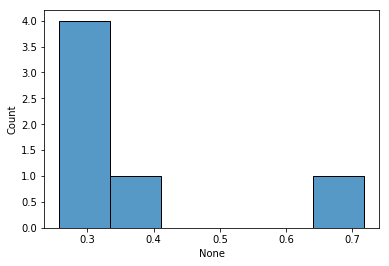

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 388.35it/s]

0.378750445606933
Q92630
['DYRK2 DUAL-SPECIFICITY TYROSINE-PHOSPHORYLATION REG'
 'DUAL SPECIFICITY TYROSINE-PHOSPHORYLATION-REGULATED'
 'DUAL SPECIFICITY TYROSINE-PHOSPHORYLATION-REGULATED KINASE']


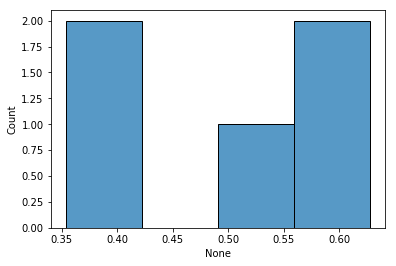

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 274.30it/s]

0.5124139785342281
Q48935
['ACETYLPOLYAMINE AMINOHYDROLASE']


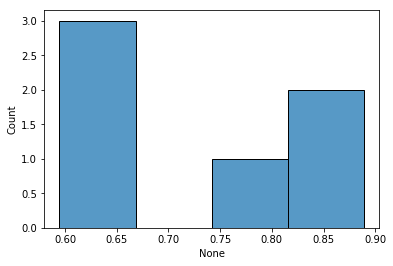

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 250.34it/s]

0.7315893128901259
P06737
['GLYCOGEN PHOSPHORYLASE']


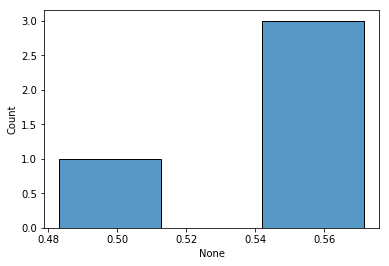

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 216.55it/s]

0.5407091097308488
Q9H3R0
['LYSINE-SPECIFIC DEMETHYLASE 4C']


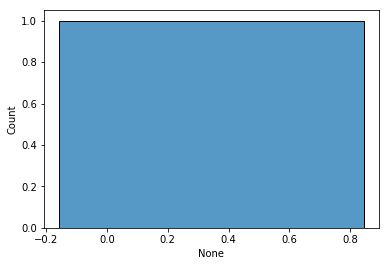

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 365.76it/s]

0.34375
P41594
['METABOTROPIC GLUTAMATE RECEPTOR 5'
 'METABOTROPIC GLUTAMATE RECEPTOR 5, ENDOLYSIN'
 'METABOTROPIC GLUTAMATE RECEPTOR 5, LYSOZYME']


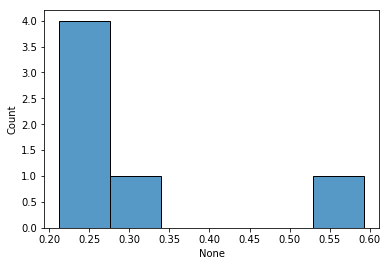

  0%|                                                     | 0/4 [00:00<?, ?it/s]

0.3006135143479058
P09391
['RHOMBOID PROTEASE GLPG']


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 357.07it/s]


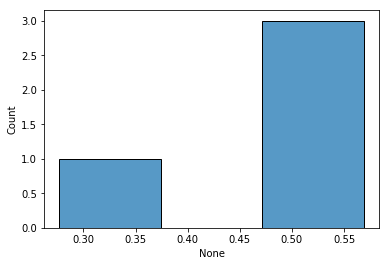

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 401.16it/s]

0.4908103020450073
Q92769
['HISTONE DEACETYLASE 2']


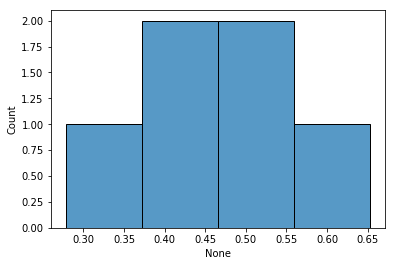

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 284.73it/s]

0.4616133563703519
Q9Y657
['SPINDLIN-1']


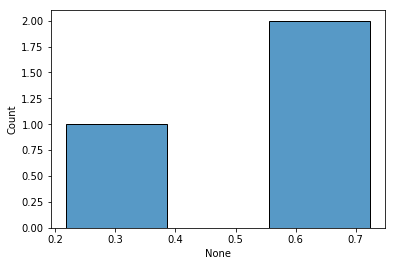

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 277.31it/s]

0.5552223888055973
P21146
['BETA-ADRENERGIC RECEPTOR KINASE 1']


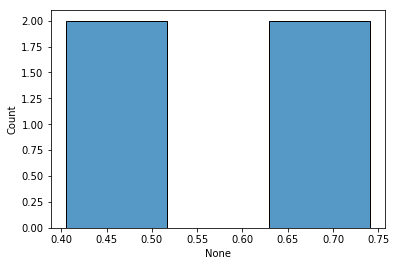

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 286.31it/s]

0.5709902851850344
P47929
['GALECTIN-7']


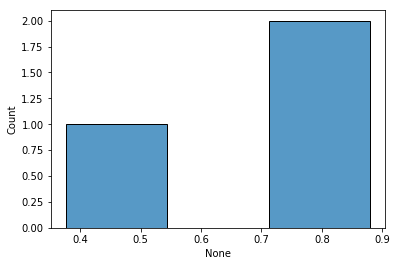

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 252.04it/s]

0.7120792079207922
P05024
['SODIUM/POTASSIUM-TRANSPORTING ATPASE SUBUNIT ALPHA']


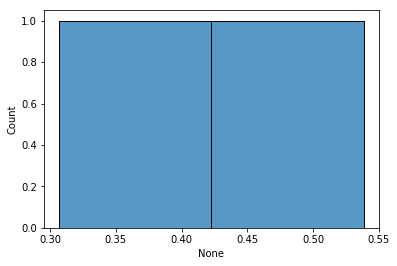

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 343.06it/s]

0.4227740763173834
P00747
['PLASMINOGEN' 'PROTEIN (PLASMINOGEN)']


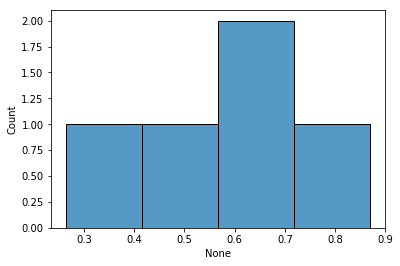

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 352.12it/s]

0.5985174390826564
P04825
['AMINOPEPTIDASE N']


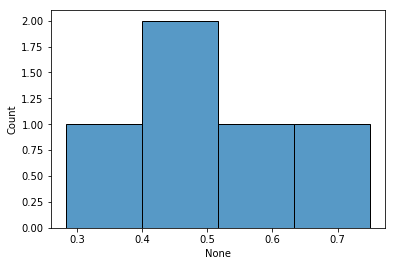

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 259.49it/s]

0.4905715943711012
P18654
['RIBOSOMAL PROTEIN S6 KINASE ALPHA-3']


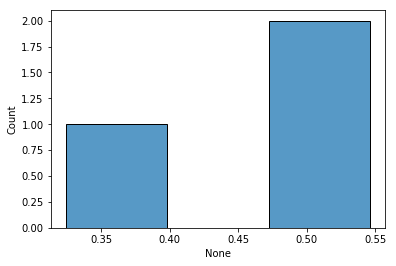

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 246.36it/s]

0.4723692764929878
P05164
['MYELOPEROXIDASE LIGHT CHAIN' 'MYELOPEROXIDASE']


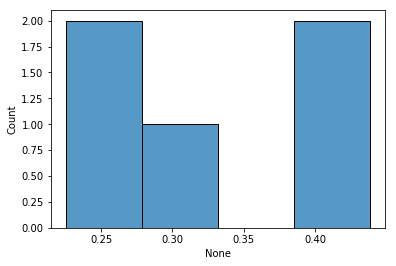

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 274.52it/s]

0.3363740090630847
P56524
['HISTONE DEACETYLASE 4']


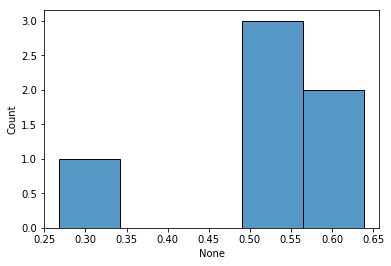

100%|████████████████████████████████████████████| 6/6 [00:00<00:00, 417.26it/s]

0.5278912144056709
P11021
['78 KDA GLUCOSE-REGULATED PROTEIN']


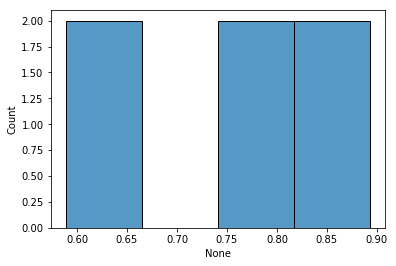

0.7556918167312515
Q6P6C2
['RNA DEMETHYLASE ALKBH5']


100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 391.82it/s]


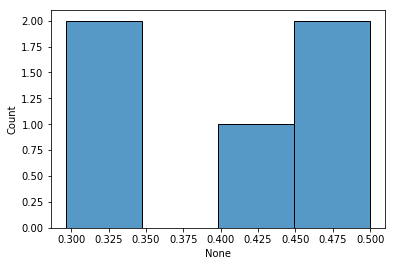

0.4053065565565565
P06493
['CYCLIN-DEPENDENT KINASE 1']


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 272.21it/s]


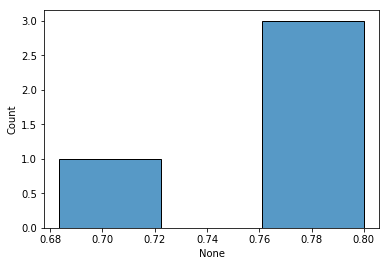

0.7643436270841387
P04746


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 358.92it/s]


['ALPHA-AMYLASE']


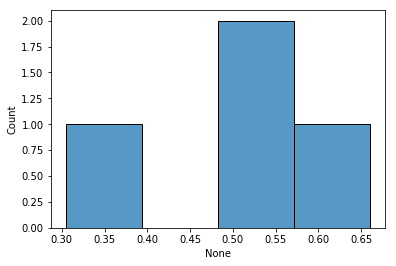

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 379.42it/s]

0.5217335337618356
Q12852
['MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE 12']


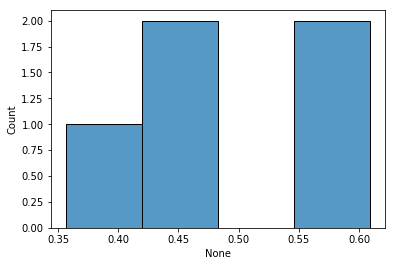

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 382.80it/s]

0.5013730566227028
P0A953
['3-OXOACYL-[ACYL-CARRIER-PROTEIN] SYNTHASE I'
 'BETA-KETOACYL-[ACYL CARRIER PROTEIN] SYNTHASE I'
 '3-OXOACYL-[ACYL-CARRIER-PROTEIN] SYNTHASE 1']


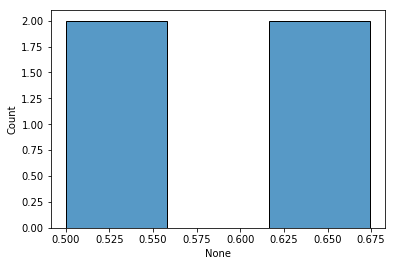

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 253.02it/s]

0.5942847740236946
P10844
['BOTULINUM NEUROTOXIN TYPE B']


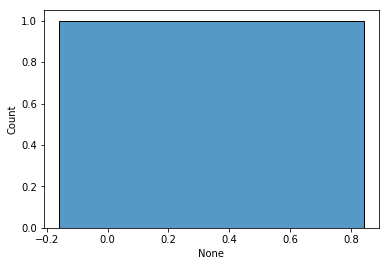

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 387.32it/s]

0.34146341463414637
P06280
['ALPHA-GALACTOSIDASE A']


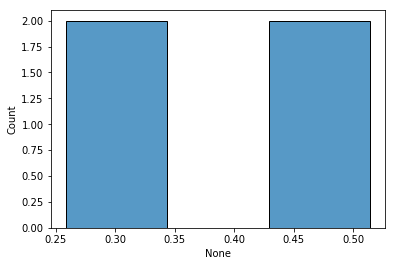

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 263.46it/s]

0.39426179767259223
Q13126
["S-METHYL-5'-THIOADENOSINE PHOSPHORYLASE"
 "5'-DEOXY-5'-METHYLTHIOADENOSINE PHOSPHORYLASE"]


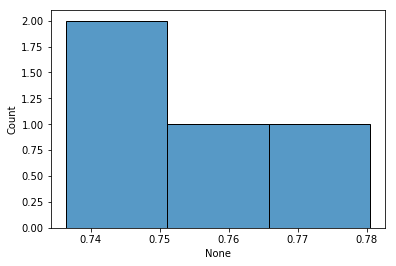

  0%|                                                     | 0/4 [00:00<?, ?it/s]

0.7546617940926884
P22411
['DIPEPTIDYL PEPTIDASE 4']


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 328.69it/s]


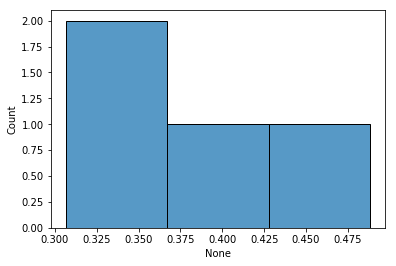

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 405.91it/s]


0.391761482037176
Q16531
['DNA DAMAGE-BINDING PROTEIN 1']


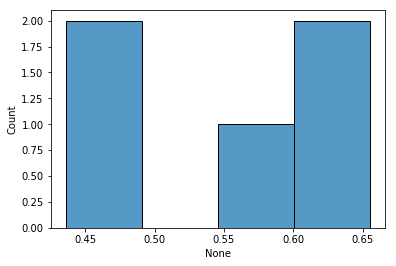

  0%|                                                     | 0/4 [00:00<?, ?it/s]

0.5524374456363389
O43314
['INOSITOL HEXAKISPHOSPHATE AND DIPHOSPHOINOSITOL']


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 278.30it/s]


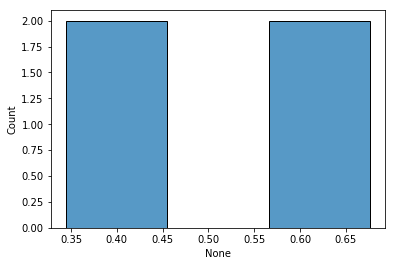

  0%|                                                     | 0/3 [00:00<?, ?it/s]

0.5309185149469624
P31939
['BIFUNCTIONAL PURINE BIOSYNTHESIS PROTEIN PURH']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 407.41it/s]


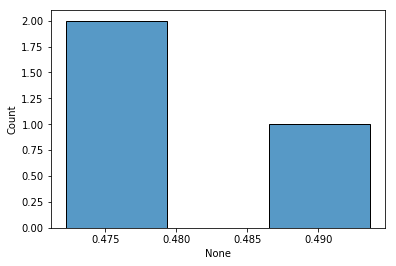

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 417.29it/s]

0.4793717768401313
Q02763
['ANGIOPOIETIN-1 RECEPTOR']


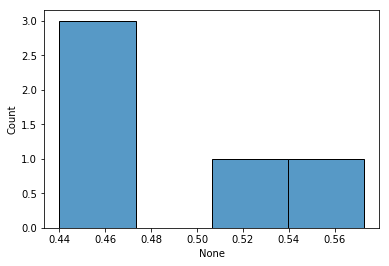

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 252.40it/s]

0.4890082355194396
P00651
['RIBONUCLEASE T1']


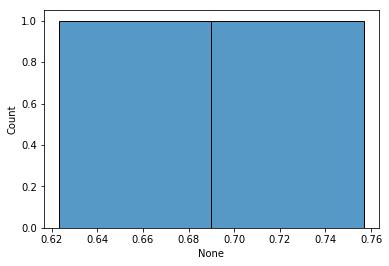

  0%|                                                     | 0/4 [00:00<?, ?it/s]

0.6900666900666901
P05132
['CAMP-DEPENDENT PROTEIN KINASE'
 'CAMP-DEPENDENT PROTEIN KINASE, ALPHA-CATALYTIC']


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 247.52it/s]


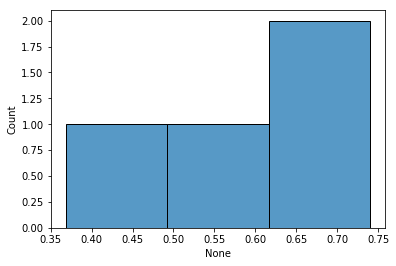

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 341.94it/s]

0.5872351332877649
P0A6K3
['PEPTIDE DEFORMYLASE']


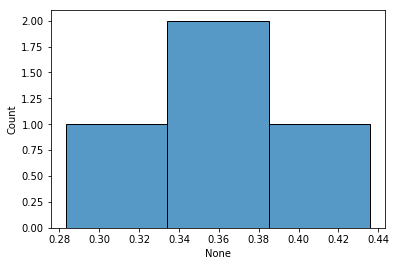

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 350.06it/s]

0.354108079828817
Q26710
['ALTERNATIVE OXIDASE, MITOCHONDRIAL']


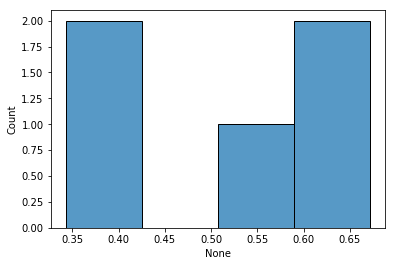

  0%|                                                     | 0/3 [00:00<?, ?it/s]

0.5350651493036551
P08172
['MUSCARINIC ACETYLCHOLINE RECEPTOR M2,REDESIGNED APO'
 'MUSCARINIC ACETYLCHOLINE RECEPTOR M2,APO-CYTOCHROME B562']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 221.62it/s]


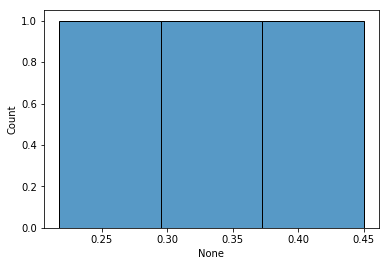

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 239.53it/s]

0.33796526054590575
P49354
['FARNESYLTRANSFERASE' 'FARNESYLTRANSFERASE ALPHA SUBUNIT']


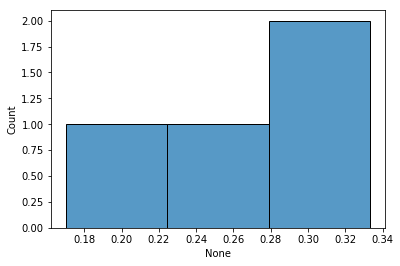

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 271.53it/s]

0.26530612244897955
Q64610
['ECTONUCLEOTIDE PYROPHOSPHATASE/PHOSPHODIESTERASE']


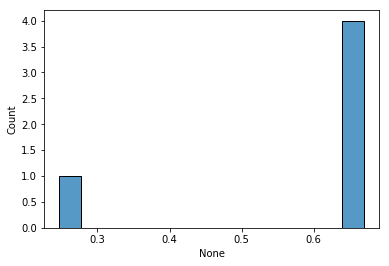

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 271.47it/s]

0.5780337941628264
P04117
['ADIPOCYTE LIPID-BINDING PROTEIN']


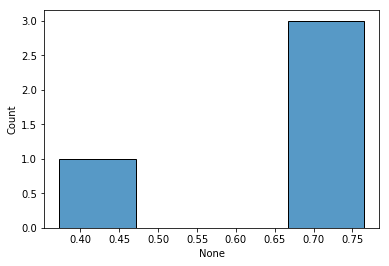

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 304.80it/s]

0.6336392338137103
O00625
['PIRIN']


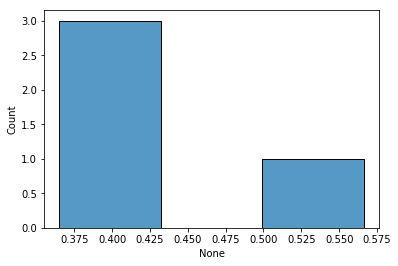

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 266.15it/s]

0.4236647566307823
Q07889
['SON OF SEVENLESS HOMOLOG 1']


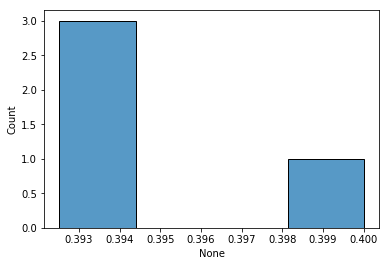

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 270.31it/s]

0.39471203770269186
Q9NZK7
['GROUP IIE SECRETORY PHOSPHOLIPASE A2']


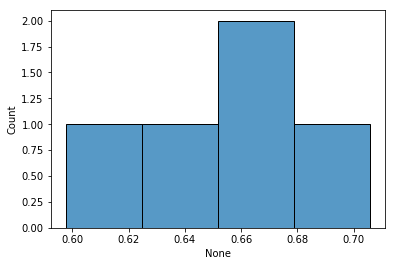

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 366.23it/s]

0.6516756761722736
P00352
['RETINAL DEHYDROGENASE 1']


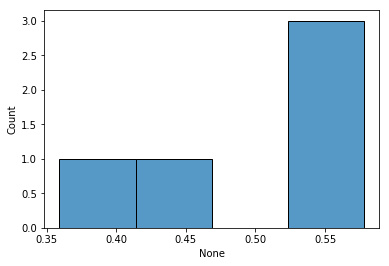

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 283.67it/s]

0.49987021730809084
P09455
['RETINOL-BINDING PROTEIN 1']


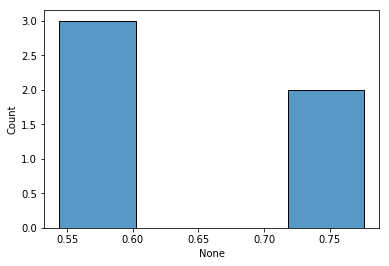

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 244.24it/s]

0.6591683569979716
P43166
['CARBONIC ANHYDRASE 7']


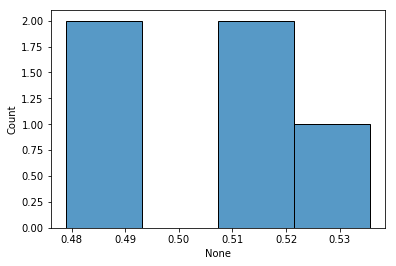

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 433.82it/s]

0.502198875953343
P09237
['MATRILYSIN']


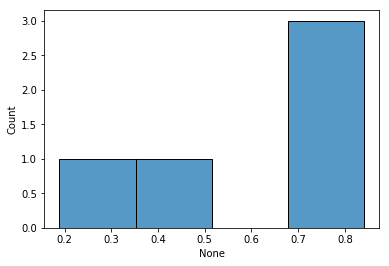

  0%|                                                     | 0/5 [00:00<?, ?it/s]

0.6204101328209551
O15496
['GROUP 10 SECRETORY PHOSPHOLIPASE A2']


100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 388.54it/s]


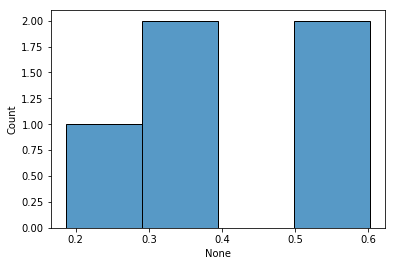

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 285.92it/s]

0.4268594338601708
Q04771
['ACTIVIN RECEPTOR TYPE-1']


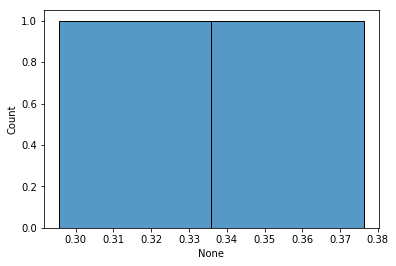

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 273.20it/s]

0.33594489883770984
P0DMV8
['HEAT SHOCK 70 KDA PROTEIN 1A']


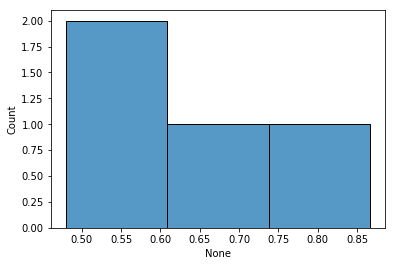

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 261.46it/s]

0.643201917390974
O75874
['ISOCITRATE DEHYDROGENASE [NADP] CYTOPLASMIC']


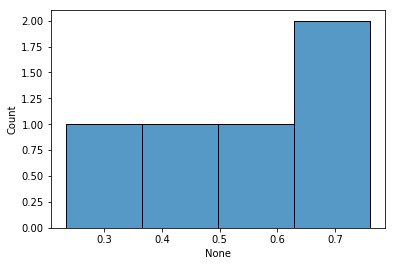

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 288.41it/s]

0.547974405319766
P0AES6
['DNA GYRASE SUBUNIT B']


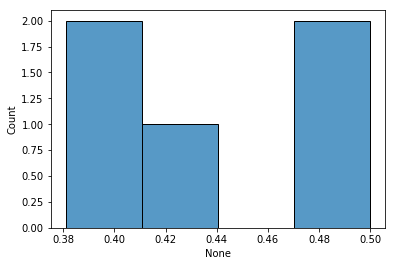

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 266.26it/s]

0.4336320049134694
Q9NYY3
['SERINE/THREONINE-PROTEIN KINASE PLK2']


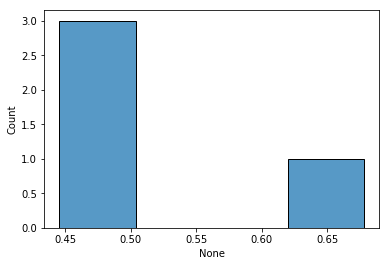

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 355.71it/s]

0.5308345310815666
O35820
["DEOXYRIBONUCLEOSIDE 5'-MONOPHOSPHATE N-GLYCOSIDASE"
 "2'-DEOXYNUCLEOSIDE 5'-PHOSPHATE N-HYDROLASE 1"]


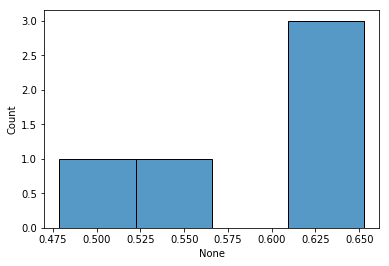

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 384.58it/s]

0.5910021794362365
Q01064
["CALCIUM/CALMODULIN-DEPENDENT 3',5'-CYCLIC NUCLEOTIDE"]


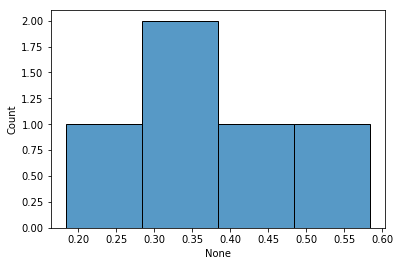

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 267.73it/s]

0.38247227159355984
P14210
['HEPATOCYTE GROWTH FACTOR']


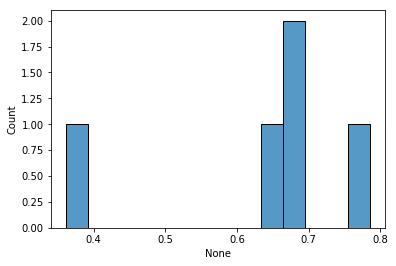

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 281.35it/s]

0.6238095238095237
P03474
['NEURAMINIDASE']


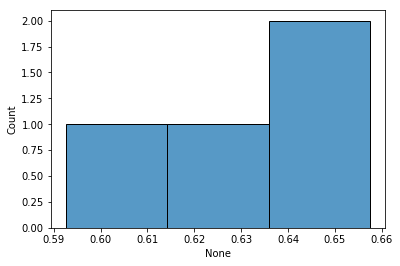

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 261.40it/s]

0.6318448489006081
P31645
['SODIUM-DEPENDENT SEROTONIN TRANSPORTER']


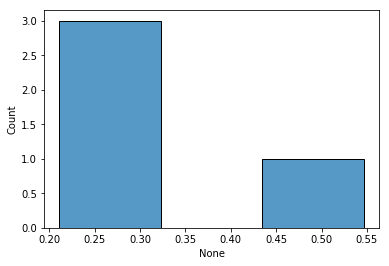

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 254.76it/s]

0.3184659083506048
O67648
['UDP-3-O-[3-HYDROXYMYRISTOYL] N-ACETYLGLUCOSAMINE']


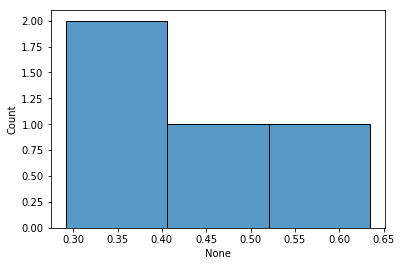

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 356.17it/s]

0.4486957339350956
Q9BYW2
['HISTONE-LYSINE N-METHYLTRANSFERASE SETD2']


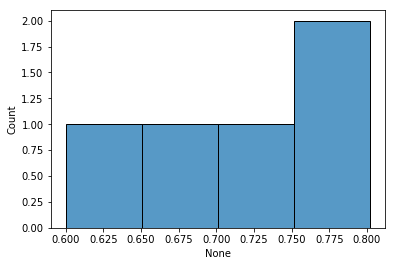

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 243.29it/s]

0.7242386185243329
P19492
['GLUTAMATE RECEPTOR 3']


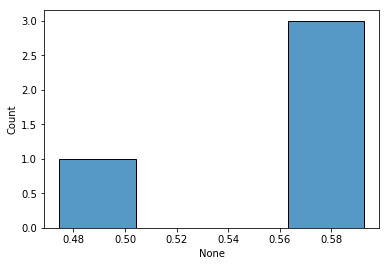

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 210.64it/s]

0.5552537544062968
P03420
['FUSION GLYCOPROTEIN F0']


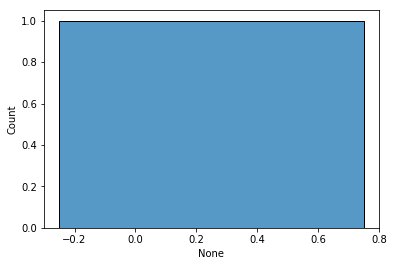

  0%|                                                     | 0/5 [00:00<?, ?it/s]

0.25
P0C6X7
['3C-LIKE PROTEINASE' "2'-O-METHYL TRANSFERASE"
 "PUTATIVE 2'-O-METHYL TRANSFERASE"]


100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 262.99it/s]


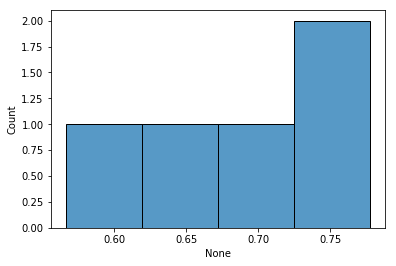

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 209.57it/s]

0.6949357533639616
P13051
['URACIL-DNA GLYCOSYLASE']


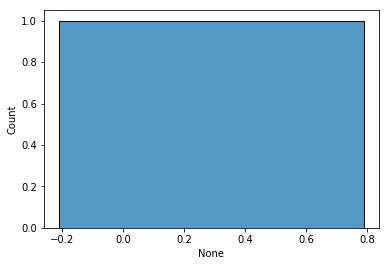

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 247.84it/s]

0.2894736842105263
O60502
['PROTEIN O-GLCNACASE' 'O-GLCNACASE TIM-BARREL DOMAIN']


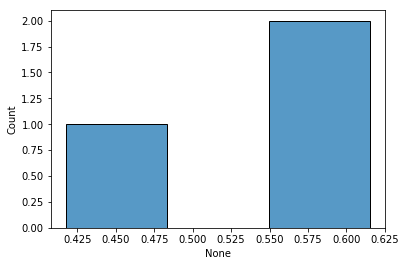

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 261.74it/s]

0.5339775167361375
P00735
['THROMBIN' 'THROMBIN LIGHT CHAIN' 'THROMBIN EPSILON' 'EPSILON THROMBIN']


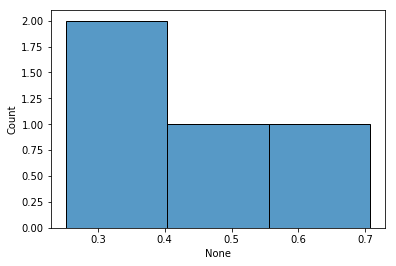

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 264.42it/s]

0.4216086283194881
Q9NPB1
["5'(3')-DEOXYRIBONUCLEOTIDASE"]


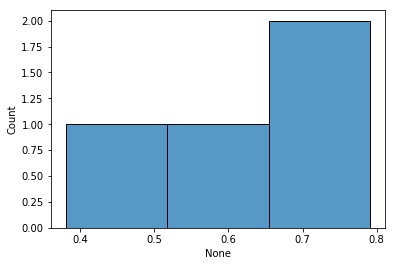

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 334.85it/s]

0.6500268167467655
P14489
['BETA-LACTAMASE OXA-10']


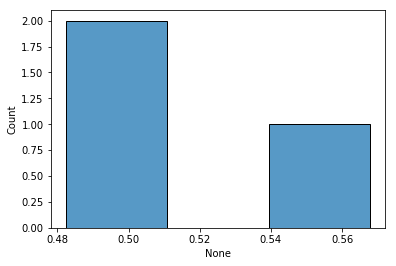

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 315.34it/s]

0.5108690389736141
P41595
['5HT2B RECEPTOR, BRIL CHIMERA'
 'CHIMERA PROTEIN OF HUMAN 5-HYDROXYTRYPTAMINE RECEPTOR 2B']


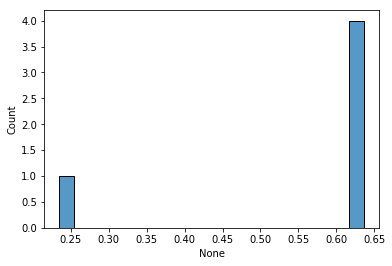

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 290.30it/s]

0.5518518013720412
O00481
['BUTYROPHILIN SUBFAMILY 3 MEMBER A1']


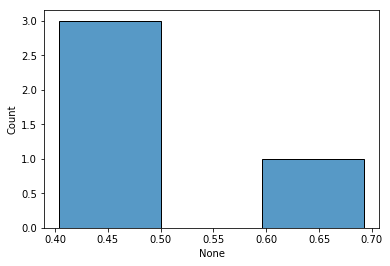

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 415.63it/s]

0.5025398756711746
O88703
['POTASSIUM/SODIUM HYPERPOLARIZATION-ACTIVATED CYCLIC']


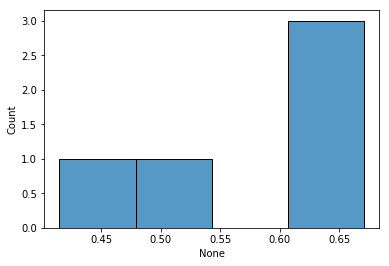

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 387.58it/s]

0.5731707317073171
Q00534
['CYCLIN-DEPENDENT KINASE 6']


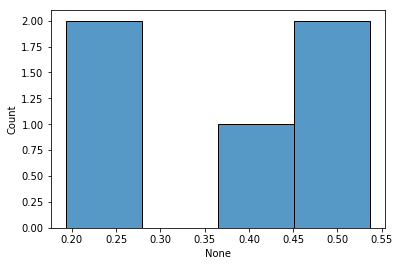

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 390.15it/s]

0.38075905443504665
Q00535
['CYCLIN-DEPENDENT KINASE 5']


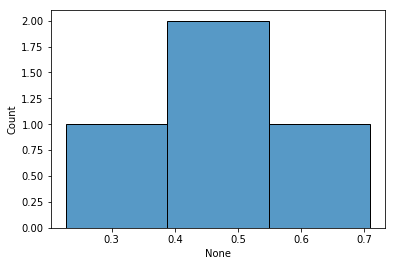

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 257.59it/s]


0.48485570187727656
P05543
['THYROXINE-BINDING GLOBULIN']


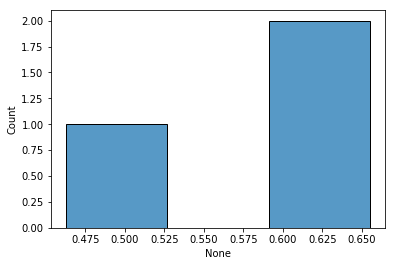

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 210.30it/s]

0.5801668301304149
P07445
['STEROID DELTA-ISOMERASE' 'KETOSTEROID ISOMERASE']


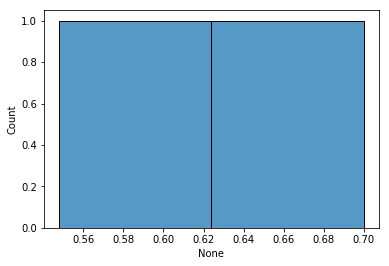

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 243.46it/s]

0.623972602739726
Q9UNA0
['PROTEIN ADAMTS-5' 'A DISINTEGRIN AND METALLOPROTEINASE WITH THROMBOSPO'
 'A DISINTEGRIN AND METALLOPROTEINASE WITH' 'CATALYTIC DOMAIN OF ADAMTS-5']


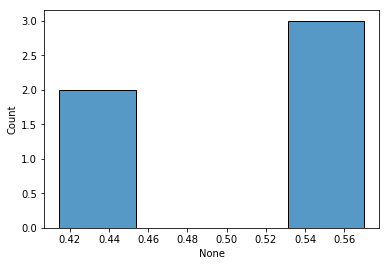

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 241.74it/s]

0.5100431768382484
P05091
['ALDEHYDE DEHYDROGENASE' 'ALDEHYDE DEHYDROGENASE, MITOCHONDRIAL']


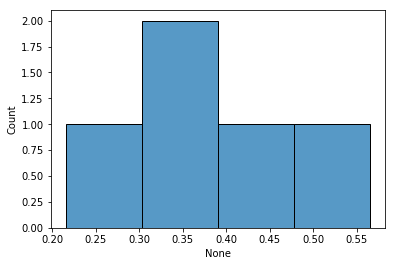

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 332.87it/s]

0.39720849258120444
P29466
['INTERLEUKIN-1 BETA CONVERTASE' 'CASPASE-1']


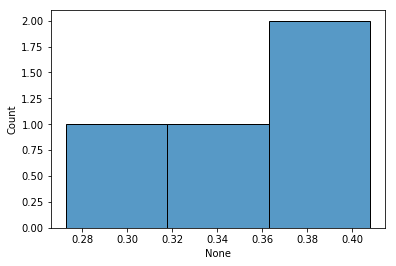

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 205.40it/s]


0.358647983595352
P15273
['TYROSINE-PROTEIN PHOSPHATASE YOPH' 'PROTEIN-TYROSINE PHOSPHATASE YOPH']


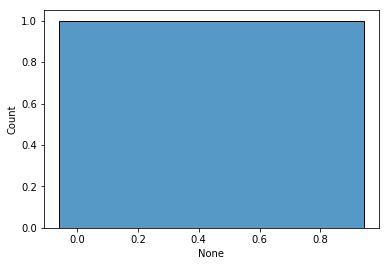

0it [00:00, ?it/s]

0.4418604651162791
P05230
['HEPARIN-BINDING GROWTH FACTOR 1']


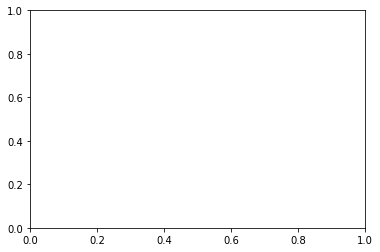

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 262.27it/s]

nan
Q8I5R7
['PROLINE--TRNA LIGASE']


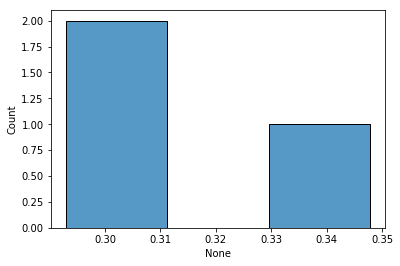

0.31421405744621494
Q8WTS6


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 203.93it/s]


['HISTONE-LYSINE N-METHYLTRANSFERASE SETD7']


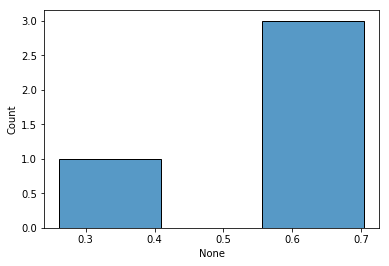

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 277.41it/s]

0.5904049654049655
O70370
['CATHEPSIN S']


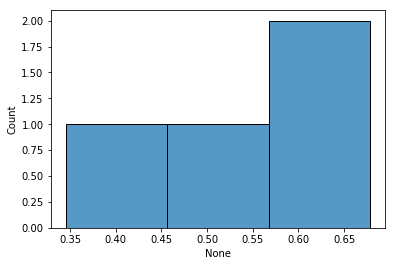

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 283.58it/s]

0.545214568040655
P01375
['TUMOR NECROSIS FACTOR' 'TUMOR NECROSIS FACTOR (TNF-ALPHA)']


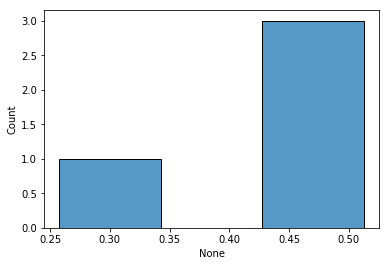

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 202.69it/s]

0.4368647411616161
O15264
['MITOGEN-ACTIVATED PROTEIN KINASE 13']


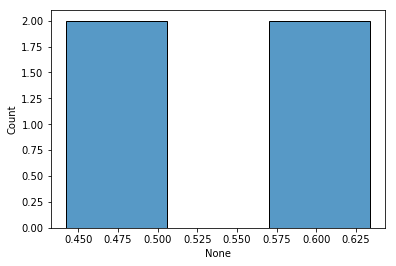

0.5395772569504583
Q16288
['NT-3 GROWTH FACTOR RECEPTOR']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 210.74it/s]


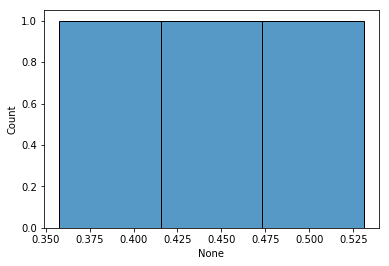

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 274.12it/s]


0.4519385491133372
Q9Y6M4
['CASEIN KINASE I ISOFORM GAMMA-3']


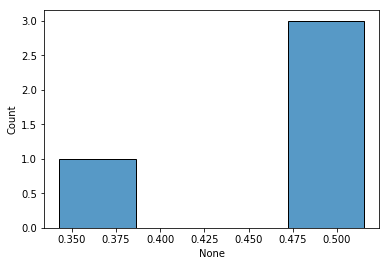

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 360.00it/s]


0.46765861226645544
P15207
['ANDROGEN RECEPTOR']


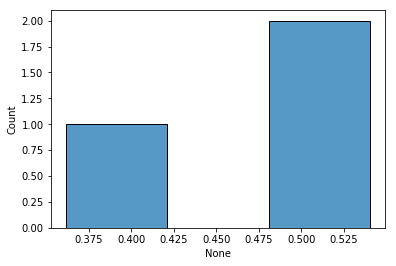

  0%|                                                     | 0/4 [00:00<?, ?it/s]

0.48084228807120377
P30044
['PEROXIREDOXIN-5']


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 272.90it/s]


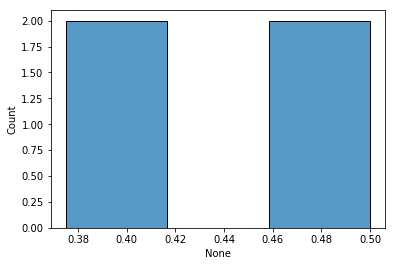

  0%|                                                     | 0/3 [00:00<?, ?it/s]

0.436661877394636
Q9NR97
['TOLL-LIKE RECEPTOR 8']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 255.86it/s]


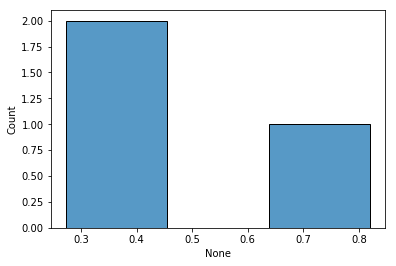

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 246.00it/s]

0.4607336523125997
P08799
['MYOSIN-2 HEAVY CHAIN' 'MYOSIN']


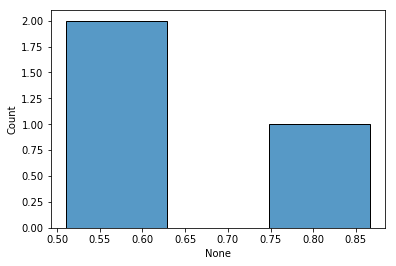

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 220.23it/s]

0.6290249433106575
Q8N6T7
['NAD-DEPENDENT PROTEIN DEACETYLASE SIRTUIN-6']


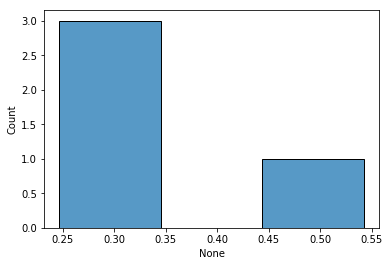

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 266.18it/s]

0.3318458649783951
Q01469
['FATTY ACID-BINDING PROTEIN' 'FATTY ACID BINDING PROTEIN']


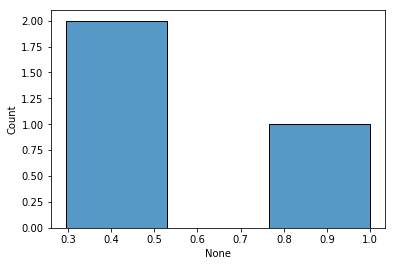

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 250.35it/s]

0.6082887700534759
O75173
['ADAMTS-4' 'A DISINTEGRIN AND METALLOPROTEINASE WITH THROMBOSPO']


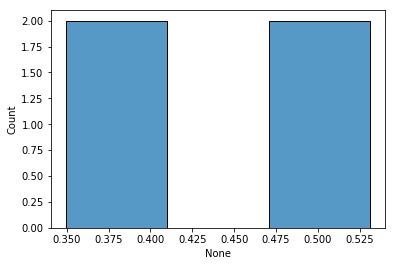

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 257.85it/s]

0.44756899218495605
P68135
['ACTIN, ALPHA SKELETAL MUSCLE' 'ACTIN-ALPHA-1']


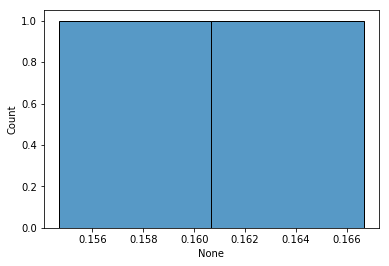

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 257.14it/s]

0.16068139963167588
P48039
['CHIMERA PROTEIN OF MELATONIN RECEPTOR TYPE 1A AND GLGA']


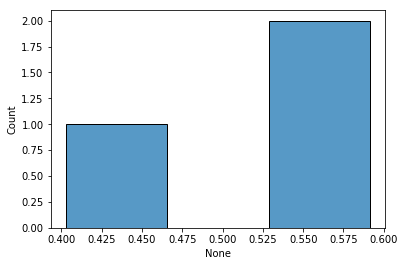

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 305.82it/s]

0.5286254564423579
Q99814
['ENDOTHELIAL PAS DOMAIN-CONTAINING PROTEIN 1']


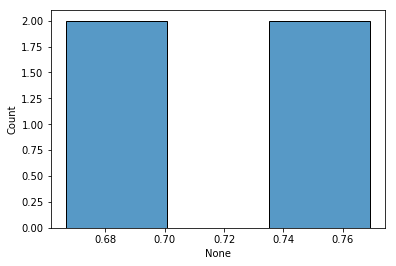

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 256.62it/s]

0.717948717948718
Q965D7
['BETA-HYDROXYACYL-ACP DEHYDRATASE']


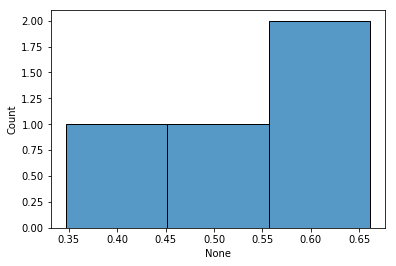

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 235.66it/s]

0.5322447200327385
Q04759
['HUMAN PROTEIN KINASE C THETA' 'PROTEIN KINASE C, THETA TYPE']


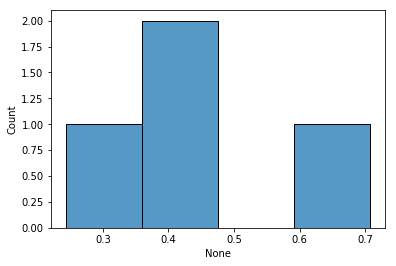

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 361.78it/s]

0.4367854838838137
P0A6R0
['3-OXOACYL-[ACYL-CARRIER-PROTEIN] SYNTHASE 3']


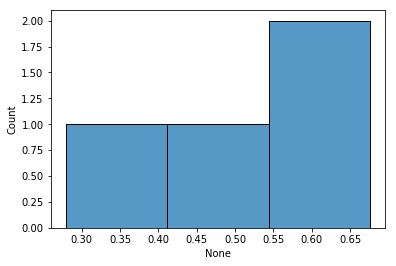

0.4973157904683227
P08559
['PYRUVATE DEHYDROGENASE E1 COMPONENT SUBUNIT'
 'PYRUVATE DEHYDROGENASE E1 COMPONENT SUBUNIT ALPHA, SOMATIC']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 285.53it/s]


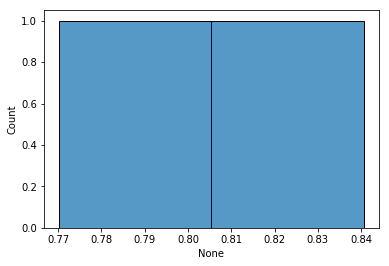

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 341.63it/s]

0.805424990207599
P03354
['MATRIX PROTEIN P19' 'INTEGRASE']


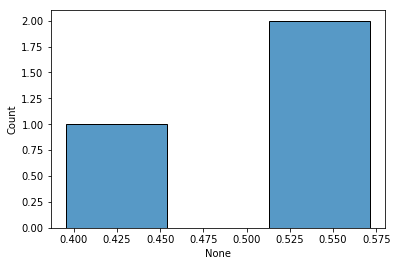

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 340.27it/s]

0.512735326688815
Q99523
['SORTILIN']


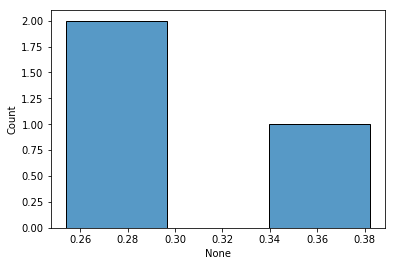

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 228.36it/s]

0.3015379593571846
Q9Y5Z0
['BETA-SECRETASE 2']


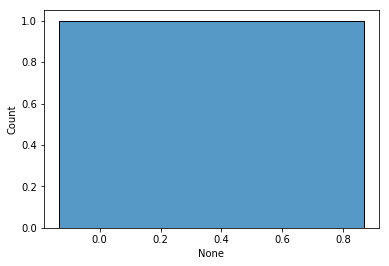

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 219.16it/s]

0.3671875
Q99685
['MONOGLYCERIDE LIPASE']


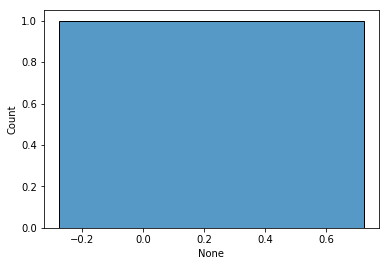

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 218.03it/s]

0.22413793103448276
P00883
['FRUCTOSE-BISPHOSPHATE ALDOLASE A' 'ALDOLASE']


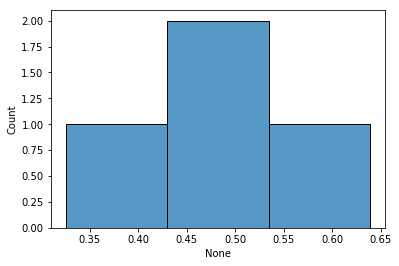

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 244.57it/s]

0.48962302200254004
Q13133
['OXYSTEROLS RECEPTOR LXR-ALPHA']


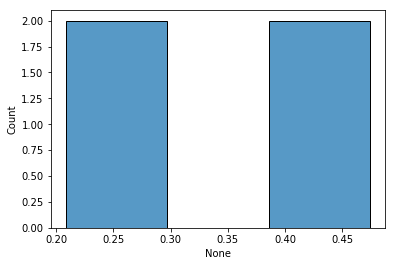

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 213.98it/s]

0.34958115607065493
Q9UGN5
['POLY [ADP-RIBOSE] POLYMERASE 2']


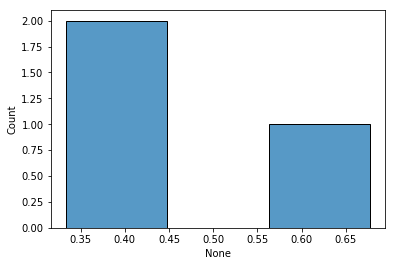

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 207.97it/s]

0.47205269785914944
Q16637
['SURVIVAL MOTOR NEURON PROTEIN']


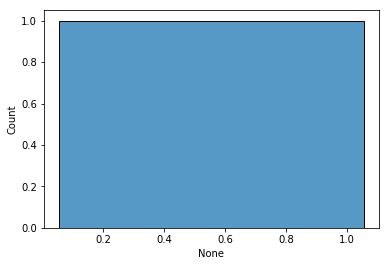

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 228.97it/s]

0.5555555555555556
Q8DNV6
['UDP-N-ACETYLMURAMOYLALANINE-D-GLUTAMYL-LYSINE-D'
 'UDP-N-ACETYLMURAMOYL-TRIPEPTIDE-D-ALANYL-D-ALANINE']


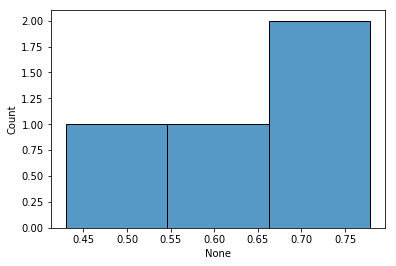

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 217.42it/s]

0.6563809760112795
P40136
['CALMODULIN-SENSITIVE ADENYLATE CYCLASE']


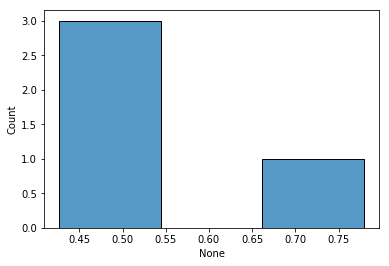

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 297.91it/s]

0.5607572941546921
Q28175
['RETINOID ISOMEROHYDROLASE']


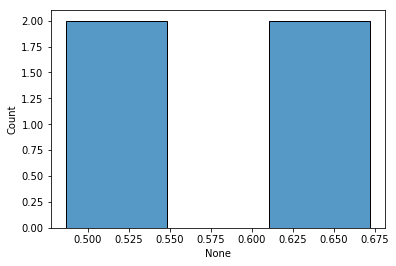

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 281.11it/s]


0.5845528670339045
Q16769
['GLUTAMINYL-PEPTIDE CYCLOTRANSFERASE']


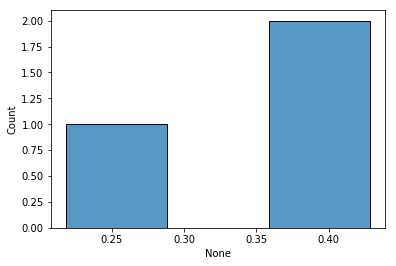

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.3502694623384279
Q9R117
['NON-RECEPTOR TYROSINE-PROTEIN KINASE TYK2']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 229.11it/s]


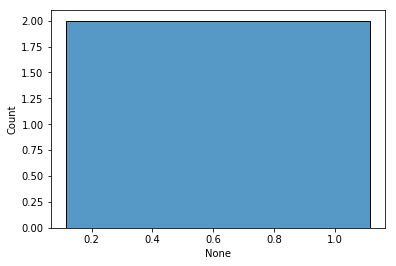

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 202.28it/s]

0.6153846153846154
P03958
['ADENOSINE DEAMINASE']


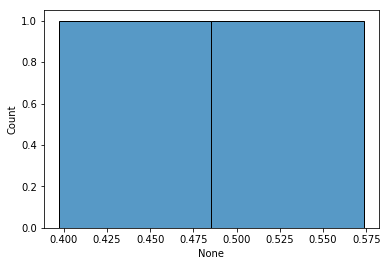

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 343.26it/s]

0.4854826546003016
Q9NTG7
['NAD-DEPENDENT PROTEIN DEACETYLASE SIRTUIN-3']


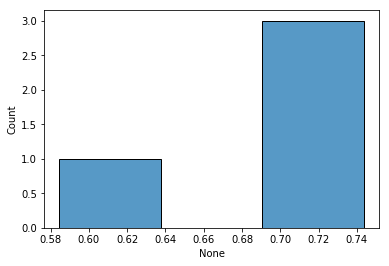

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.694419306184012
P14207
['FOLATE RECEPTOR BETA']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 235.70it/s]


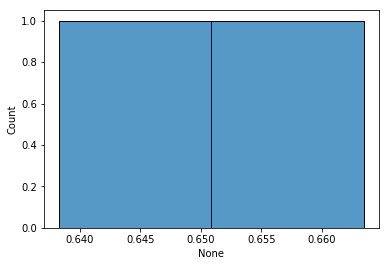

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 294.51it/s]

0.6508797054009821
Q8N5Z0
['KYNURENINE/ALPHA-AMINOADIPATE AMINOTRANSFERASE']


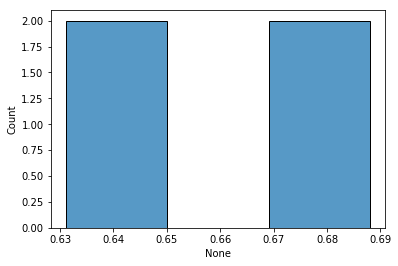

0it [00:00, ?it/s]

0.6595706778302307
P20231
['TRYPTASE BETA-2']


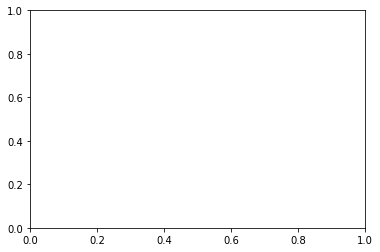

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 308.77it/s]

nan
Q8WZA1
['PROTEIN O-LINKED-MANNOSE BETA-1,2-N']


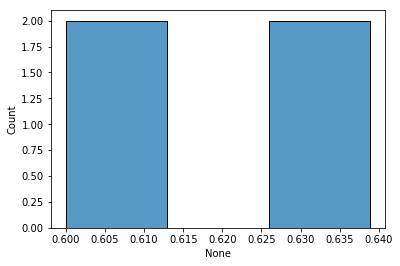

  0%|                                                     | 0/4 [00:00<?, ?it/s]

0.6219868173258004
O75469
['ORPHAN NUCLEAR RECEPTOR PXR'
 'NUCLEAR RECEPTOR SUBFAMILY 1 GROUP I MEMBER 2']


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 297.47it/s]


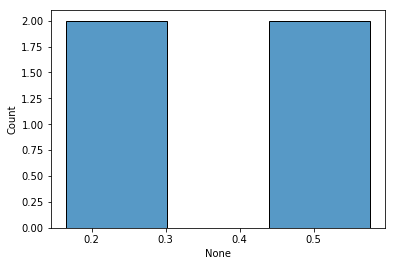

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 215.87it/s]

0.3712214847025241
P49761
['DUAL SPECIFICITY PROTEIN KINASE CLK3']


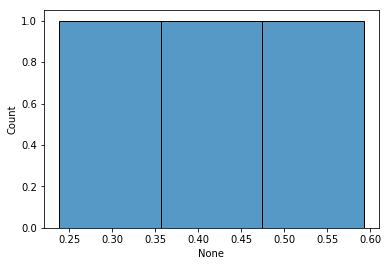

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 211.62it/s]

0.41024720893141947
P21675
['TRANSCRIPTION INITIATION FACTOR TFIID SUBUNIT 1']


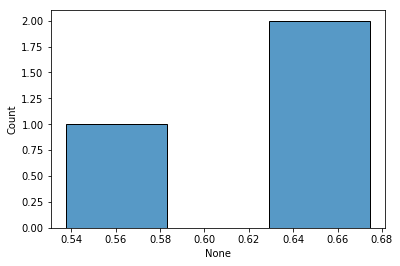

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 212.78it/s]

0.6220149830089589
P28327
['RHODOPSIN KINASE']


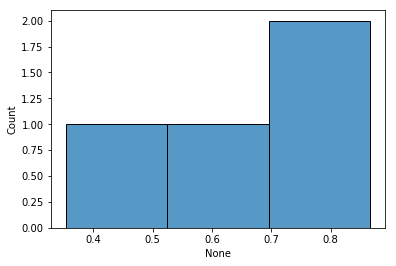

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 311.08it/s]

0.6177862858212397
P14740
['DIPEPTIDYL PEPTIDASE 4']


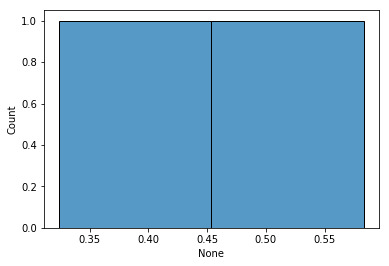

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 268.55it/s]

0.4537037037037037
P31751
['RAC-BETA SERINE/THREONINE-PROTEIN KINASE']


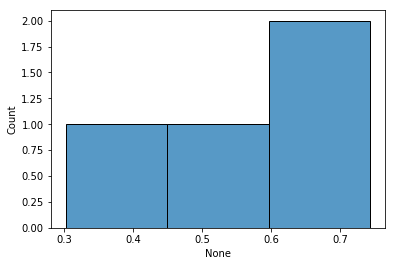

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 258.33it/s]

0.5538947599345153
P02753
['RETINOL-BINDING PROTEIN 4']


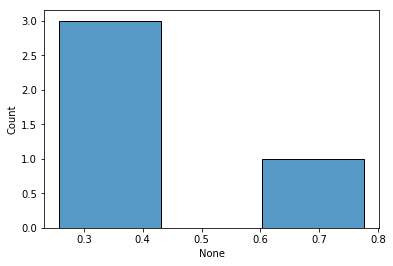

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 282.27it/s]

0.41275628697392985
Q8T6J6
["OROTIDINE 5'-PHOSPHATE DECARBOXYLASE"]


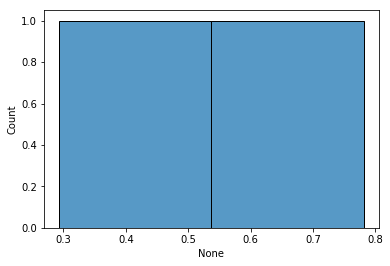

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 219.93it/s]

0.5372916666666667
Q8WUI4
['HISTONE DEACETYLASE 7A' 'HISTONE DEACETYLASE 7']


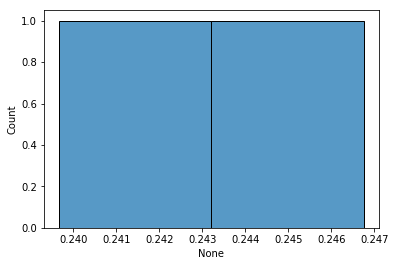

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 417.77it/s]

0.24321133412042503
O75385
['SERINE/THREONINE-PROTEIN KINASE ULK1']


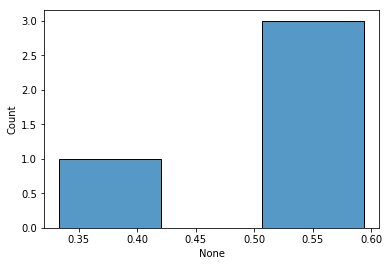

  0%|                                                     | 0/4 [00:00<?, ?it/s]

0.5144675925925926
P45568
['1-DEOXY-D-XYLULOSE 5-PHOSPHATE REDUCTOISOMERASE']


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 325.67it/s]


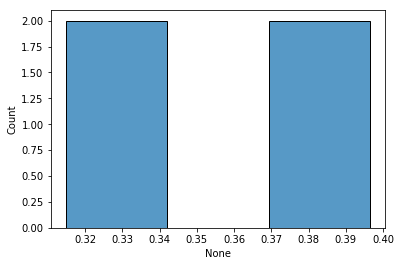

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 218.28it/s]

0.35481207808794013
P19156
['POTASSIUM-TRANSPORTING ATPASE ALPHA CHAIN 1']


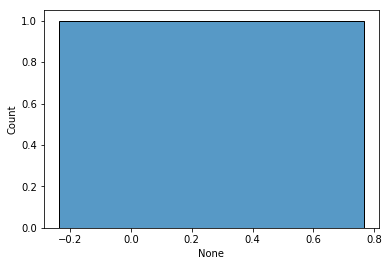

  0%|                                                     | 0/3 [00:00<?, ?it/s]

0.26506024096385544
P49760
['DUAL SPECIFICITY PROTEIN KINASE CLK2']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 267.44it/s]


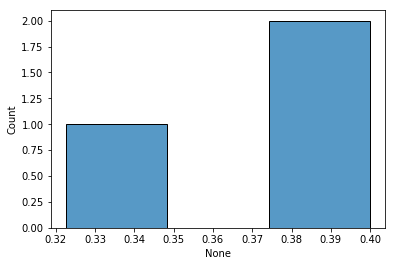

0it [00:00, ?it/s]

0.3693005820262405
P61073
['C-X-C CHEMOKINE RECEPTOR TYPE 4, LYSOZYME CHIMERA']


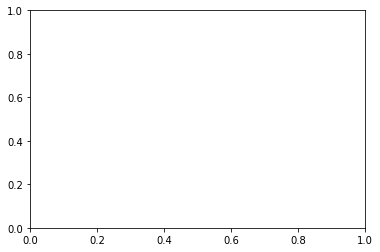

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 444.92it/s]

nan
P29029
['ENDOCHITINASE']


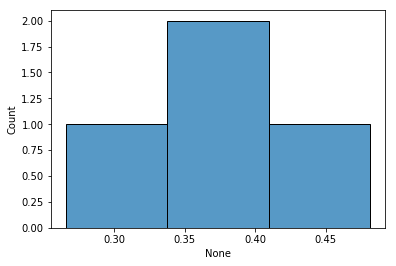

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 411.94it/s]

0.36837795562120423
P13631
['RETINOIC ACID RECEPTOR GAMMA-1']


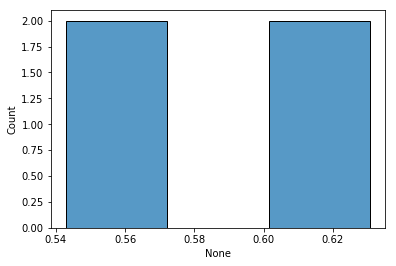

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 442.53it/s]


0.5891586025914384
O66465
['MRAYAA NANOBODY' 'PHOSPHO-N-ACETYLMURAMOYL-PENTAPEPTIDE-TRANSFERASE']


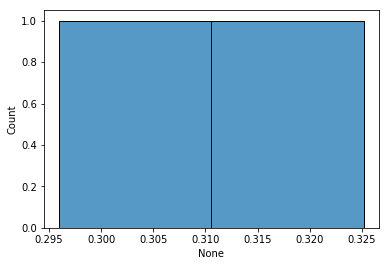

0it [00:00, ?it/s]

0.3105766871165644
Q92830
['HISTONE ACETYLTRANSFERASE KAT2A']


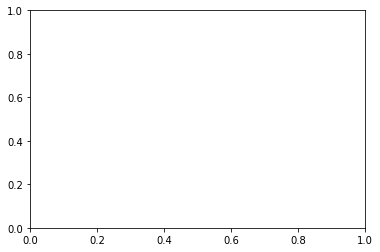

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|                                                     | 0/4 [00:00<?, ?it/s]

nan
P06213
['INSULIN RECEPTOR' 'INSULIN RECEPTOR, KINASE DOMAIN']


100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 417.11it/s]


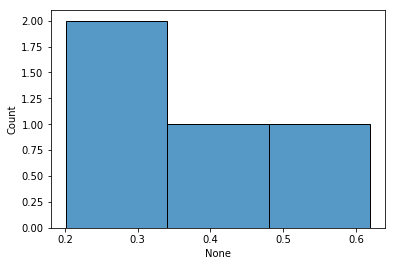

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 256.25it/s]


0.3559925874555507
P46598
['HEAT SHOCK PROTEIN 90 HOMOLOG']


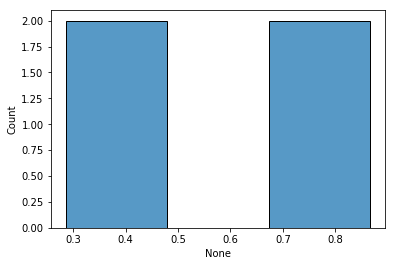

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 170.61it/s]

0.5611215538847117
P19784
['CASEIN KINASE II SUBUNIT ALPHA']


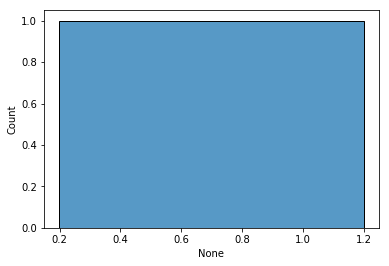

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 240.22it/s]

0.6989247311827957
Q14416
['METABOTROPIC GLUTAMATE RECEPTOR 2']


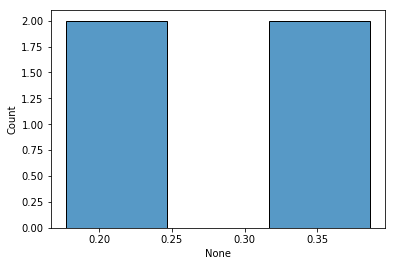

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 267.29it/s]

0.29180047760210803
Q93LQ9
['SERINE BETA-LACTAMASE KPC-2']


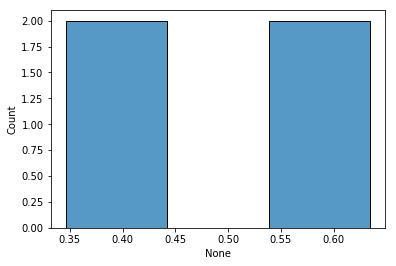

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 202.30it/s]

0.5031108597285068
P42262
['GLUTAMATE RECEPTOR 2']


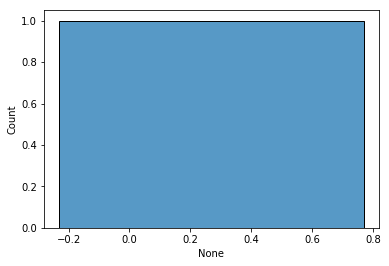

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 268.75it/s]

0.26956521739130435
Q96C86
['SCAVENGER MRNA-DECAPPING ENZYME DCPS' 'M7GPPPX DIPHOSPHATASE']


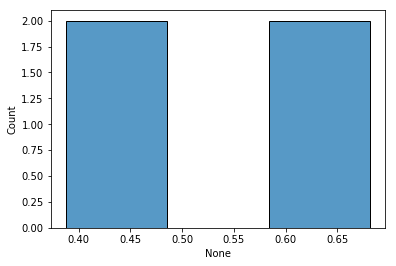

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 365.44it/s]

0.5347990162822251
P0AEX9
['MBL-MCL1 CHIMERA PROTEIN' 'MBP-MCL1 CHIMERA PROTEIN'
 'MBP-MCL1 CHIMERA PROTEIN,INDUCED MYELOID LEUKEMIA C'
 'INDUCED MYELOID LEUKEMIA CELL DIFFERENTIATION PROTEIN MCL-1']


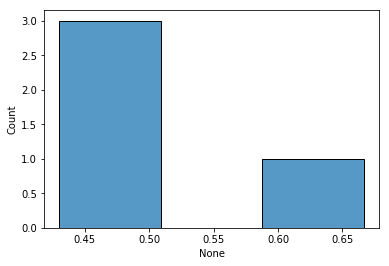

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 243.54it/s]


0.5037032393001419
Q72547
['REVERSE TRANSCRIPTASE/RNASEH' 'HIV-1 REVERSE TRANSCRIPTASE/RNASEH'
 'GAG-POL POLYPROTEIN']


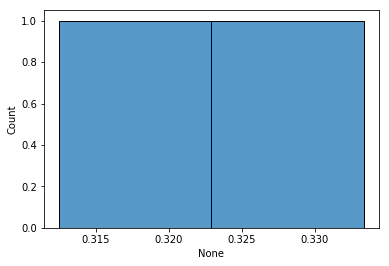

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 263.02it/s]

0.32291666666666663
P77173
['CELL DIVISION PROTEIN ZIPA']


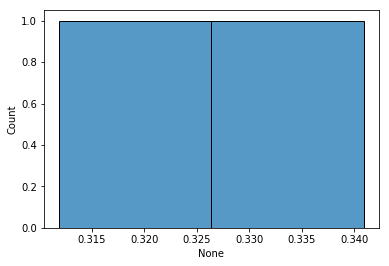

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 205.71it/s]

0.32641784820683906
P25910
['METALLO-BETA-LACTAMASE' 'BETA-LACTAMASE TYPE II']


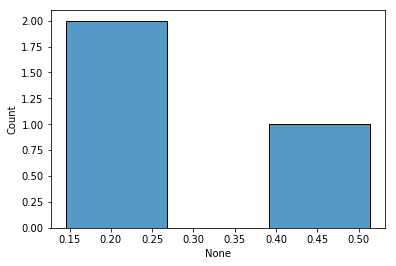

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 187.58it/s]

0.29228818046371885
P03433
['POLYMERASE ACIDIC PROTEIN']


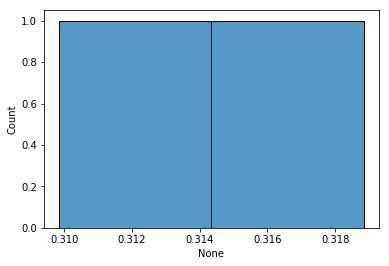

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 202.79it/s]

0.31434986731986114
Q13882
['PROTEIN-TYROSINE KINASE 6']


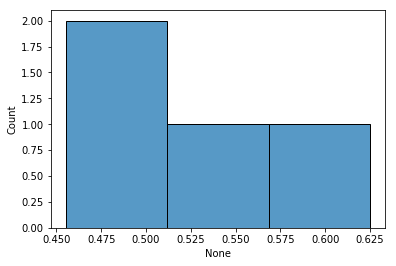

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 306.09it/s]

0.5166356392546226
P00636
['FRUCTOSE-1,6-BISPHOSPHATASE']


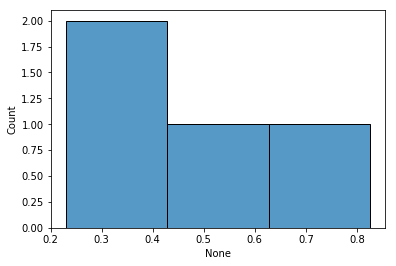

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 247.76it/s]

0.46631009891879455
Q92918
['MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE KINASE 1']


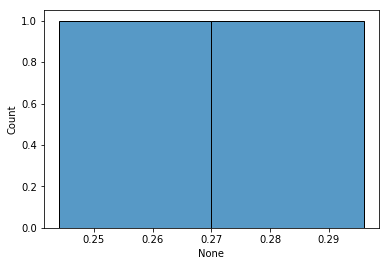

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 332.82it/s]

0.2700064277679576
Q86W56
['POLY(ADP-RIBOSE) GLYCOHYDROLASE']


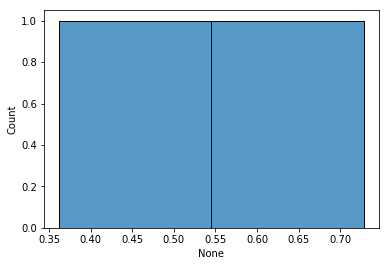

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 272.06it/s]

0.5452898550724637
P05804
['BETA-GLUCURONIDASE']


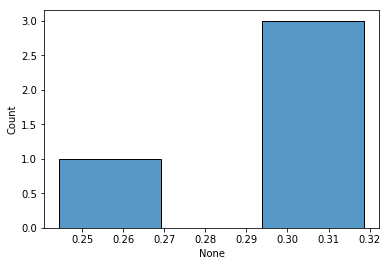

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 270.82it/s]

0.2979893534058929
P33316
["DEOXYURIDINE 5'-TRIPHOSPHATE NUCLEOTIDOHYDROLASE"]


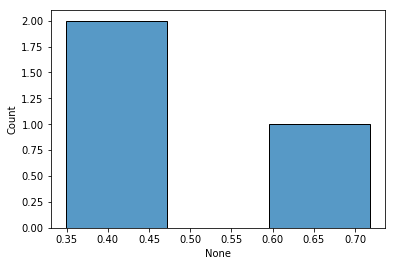

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 196.26it/s]

0.47214102223403315
Q13946
["CAMP-SPECIFIC 3',5'-CYCLIC PHOSPHODIESTERASE 7A"
 "HIGH AFFINITY CAMP-SPECIFIC 3',5'-CYCLIC PHOSPHODIE"]


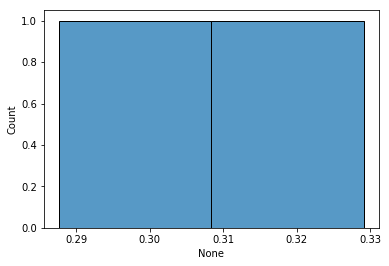

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 246.12it/s]

0.30839257846367263
Q54727
['SIALIDASE B']


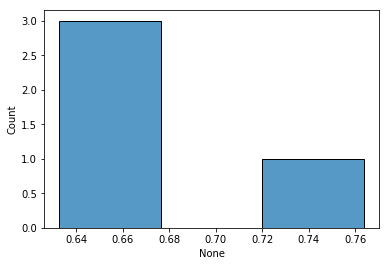

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 190.73it/s]

0.6739022881880025
P43681
['NEURONAL ACETYLCHOLINE RECEPTOR SUBUNIT ALPHA-4']


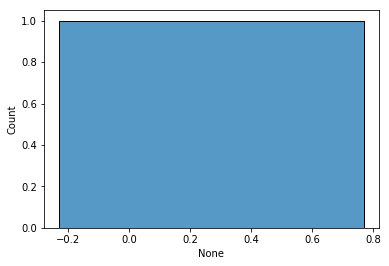

0.2698412698412698
O15826


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 327.12it/s]


['DUTPASE']


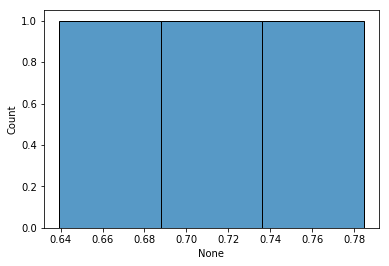

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 316.15it/s]

0.7140898353551322
Q9VWX8
['CG5907-PA, ISOFORM A' 'FREQUENIN 2' 'FI18190P1']


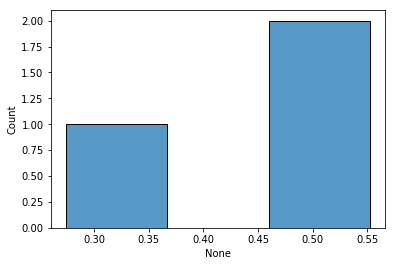

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 271.57it/s]

0.4569072762486393
Q16620
['BDNF/NT-3 GROWTH FACTORS RECEPTOR']


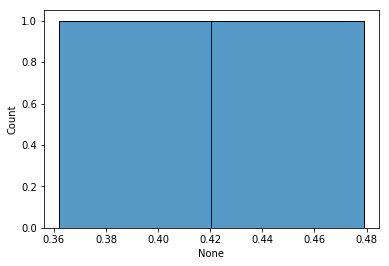

0it [00:00, ?it/s]

0.42047110247693054
P07813
['LEUCYL-TRNA SYNTHETASE']


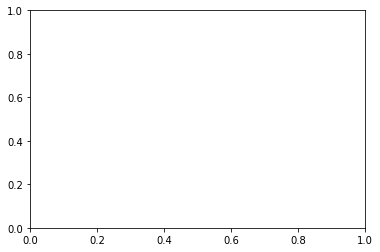

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 296.42it/s]

nan
Q9BH77
['ENOYL-ACYL CARRIER REDUCTASE']


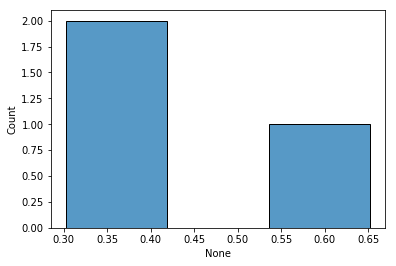

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 240.83it/s]

0.4526694221228839
P0ABQ4
['DIHYDROFOLATE REDUCTASE']


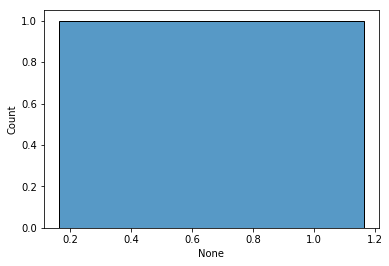

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 329.39it/s]


0.6634615384615384
Q15120
['PYRUVATE DEHYDROGENASE [LIPOAMIDE] KINASE']


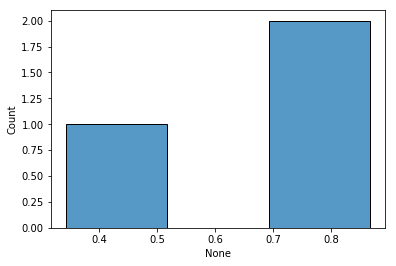

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 364.22it/s]

0.6671516188846099
P04905
['GLUTATHIONE S-TRANSFERASE (ISOENZYME 3-3)'
 'TETRA-(5-FLUOROTRYPTOPHANYL)-GLUTATHIONE']


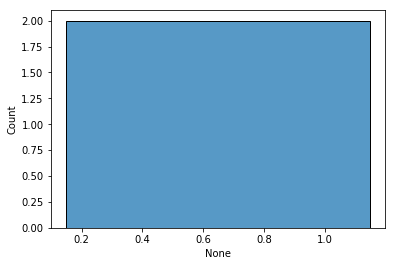

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 241.98it/s]

0.6483516483516484
P41279
['MITOGEN-ACTIVATED PROTEIN KINASE 8']


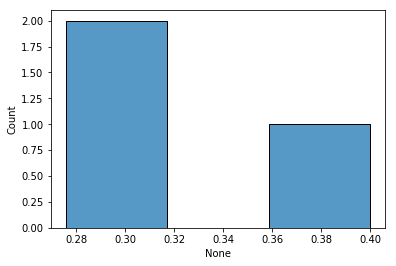

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 268.64it/s]

0.3288472268720009
P36873
['SERINE/THREONINE PROTEIN PHOSPHATASE PP1-GAMMA']


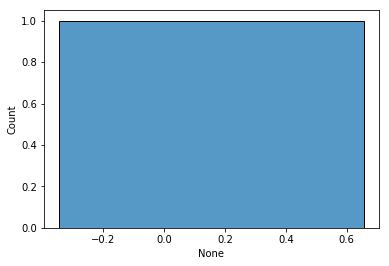

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 313.73it/s]

0.1559633027522936
P13491
['L-LACTATE DEHYDROGENASE A CHAIN']


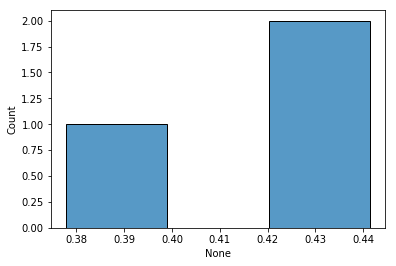

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 235.00it/s]

0.42022022022022015
P07339
['CATHEPSIN D LIGHT CHAIN']


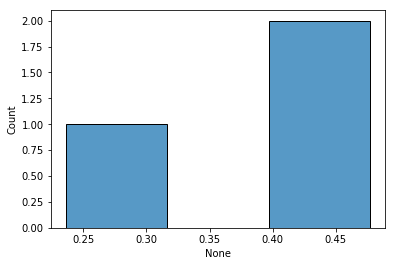

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 327.36it/s]

0.3968855218855219
P56373
['P2X PURINOCEPTOR 3']


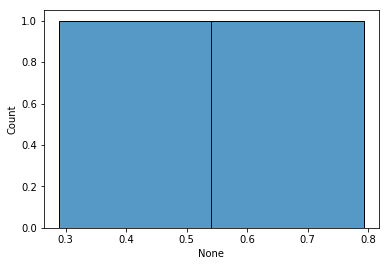

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 194.67it/s]

0.5410783055198973
P51531
['PROBABLE GLOBAL TRANSCRIPTION ACTIVATOR SNF2L2']


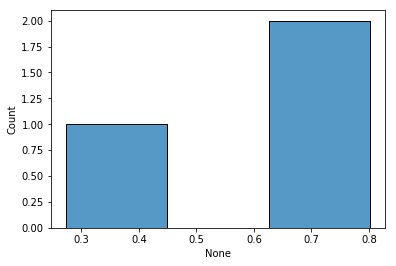

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 179.36it/s]

0.6258392306296497
P22262
['LISTERIOLYSIN REGULATORY PROTEIN']


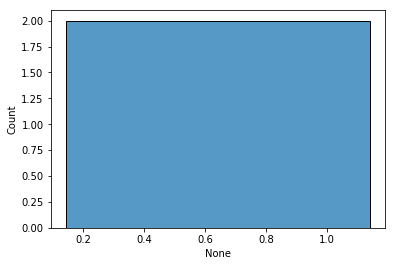

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 181.74it/s]

0.6428571428571429
Q16654
['PYRUVATE DEHYDROGENASE KINASE ISOZYME 4'
 'PYRUVATE DEHYDROGENASE [LIPOAMIDE] KINASE']


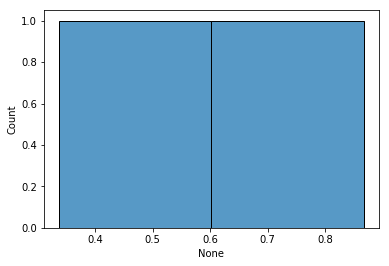

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 273.47it/s]

0.6022522522522522
P54829
['TYROSINE-PROTEIN PHOSPHATASE NON-RECEPTOR TYPE 5']


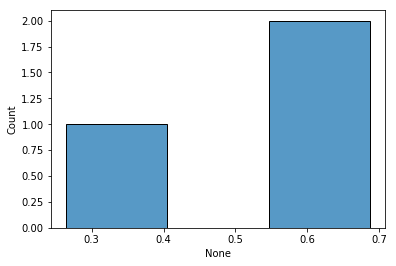

  0%|                                                     | 0/3 [00:00<?, ?it/s]

0.5462962962962963
P52789
['HEXOKINASE-2']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 319.96it/s]


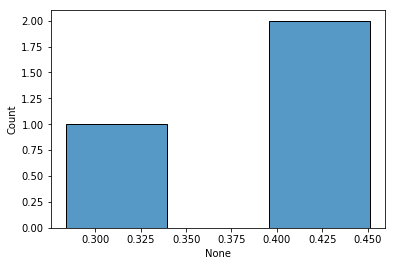

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 243.56it/s]

0.395479550346807
Q3TBT3
['STIMULATOR OF INTERFERON GENES PROTEIN']


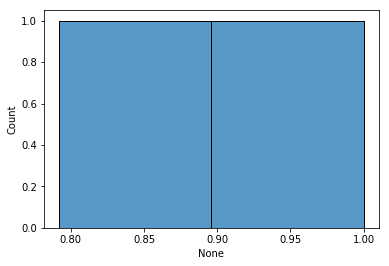

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 306.29it/s]

0.8961038961038961
Q13231
['CHITOTRIOSIDASE-1']


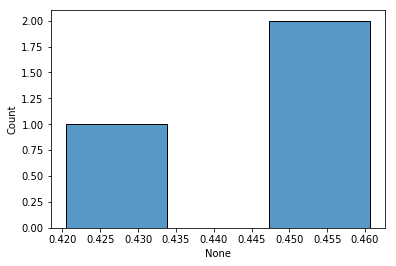

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 227.94it/s]

0.447267620020429
Q14832
['METABOTROPIC GLUTAMATE RECEPTOR 3']


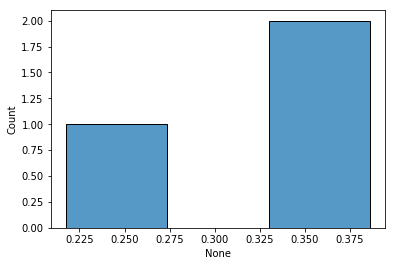

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.31719367588932806
O15540
['FATTY ACID-BINDING PROTEIN']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 252.39it/s]


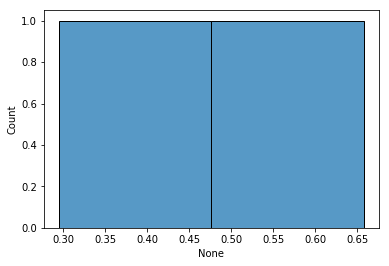

  0%|                                                     | 0/3 [00:00<?, ?it/s]

0.47667464114832536
P35558
['PHOSPHOENOLPYRUVATE CARBOXYKINASE']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 273.36it/s]


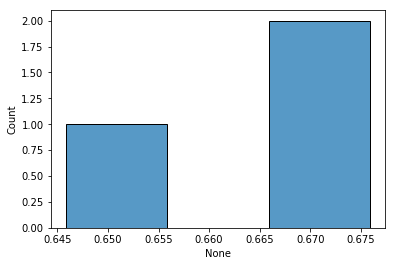

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 247.83it/s]

0.6658950617283951
P03437
['HEMAGGLUTININ, CHAIN HA1']


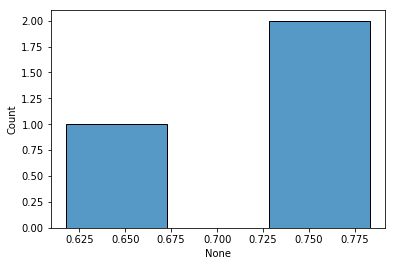

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 244.23it/s]

0.7281045751633987
Q92905
['COP9 SIGNALOSOME COMPLEX SUBUNIT 5']


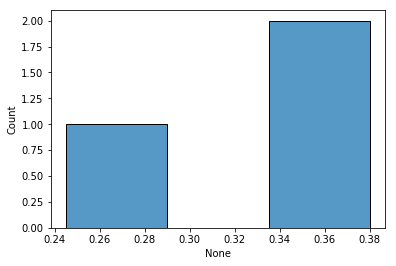

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 220.78it/s]

0.3350761792320234
P00441
['SUPEROXIDE DISMUTASE' 'SUPEROXIDE DISMUTASE [CU-ZN']


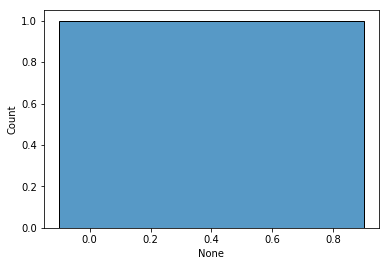

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 205.23it/s]

0.4
P54646
["5'-AMP-ACTIVATED PROTEIN KINASE CATALYTIC SUBUNIT A"
 "5'-AMP-ACTIVATED PROTEIN KINASE CATALYTIC SUBUNIT ALPHA-2"]


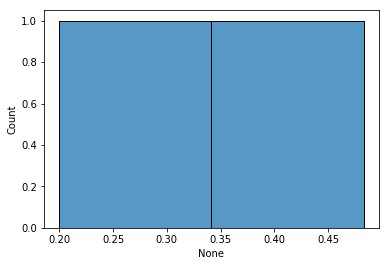

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 257.46it/s]

0.3415730337078652
P49862
['KALLIKREIN-7']


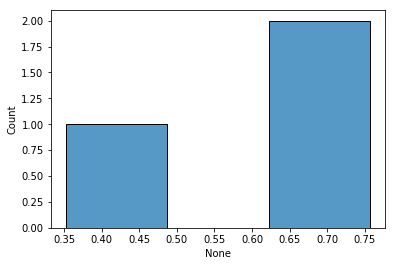

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 246.74it/s]

0.6221592359940759
Q8VDS3
['CHROMOBOX PROTEIN HOMOLOG 7']


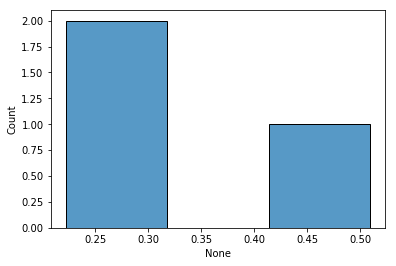

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 243.91it/s]

0.32550615263381216
Q9BZX2
['URIDINE-CYTIDINE KINASE 2']


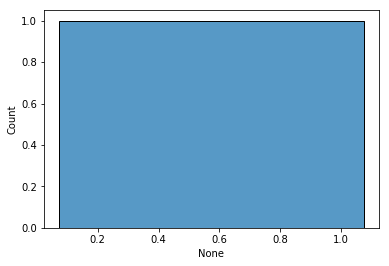

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 221.38it/s]

0.5737704918032787
Q8IYT8
['SERINE/THREONINE-PROTEIN KINASE ULK2']


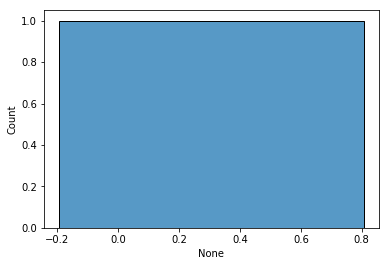

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 273.21it/s]

0.3064516129032258
P34914
['EPOXIDE HYDROLASE']


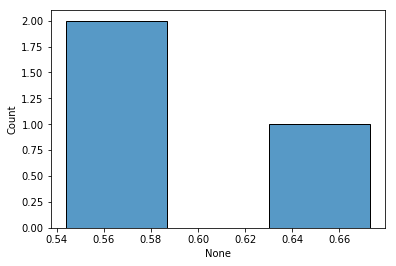

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 276.13it/s]

0.6006140775256962
Q59H18
['SERINE/THREONINE-PROTEIN KINASE TNNI3K']


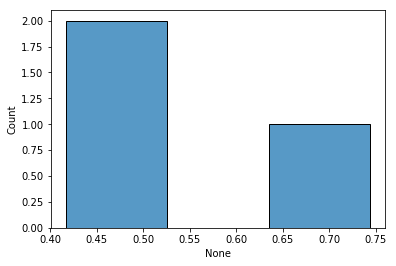

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 264.59it/s]

0.5401040575459181
Q6P988
['PALMITOLEOYL-PROTEIN CARBOXYLESTERASE NOTUM']


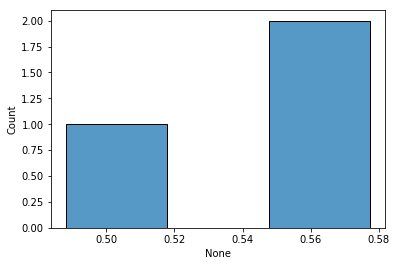

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 352.54it/s]


0.5476749385200089
P13497
['BONE MORPHOGENETIC PROTEIN 1']


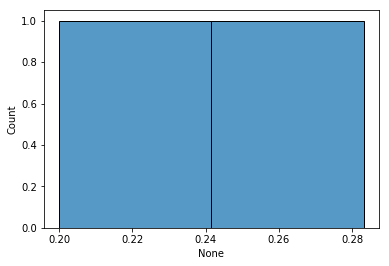

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 360.07it/s]

0.2415929203539823
Q99720
['SIGMA NON-OPIOID INTRACELLULAR RECEPTOR 1']


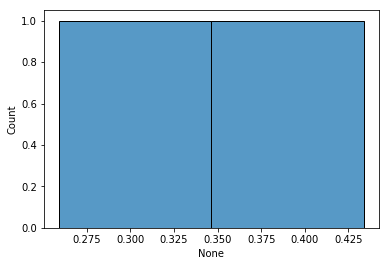

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 222.04it/s]

0.3464970995091477
Q6P179
['ENDOPLASMIC RETICULUM AMINOPEPTIDASE 2']


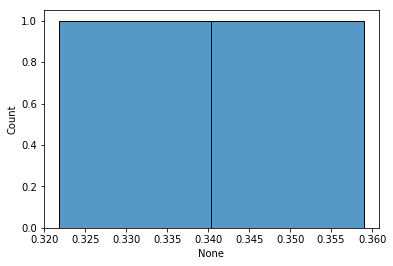

  0%|                                                     | 0/3 [00:00<?, ?it/s]

0.34040671971706454
P03211
['EPSTEIN-BARR NUCLEAR ANTIGEN 1']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 271.42it/s]


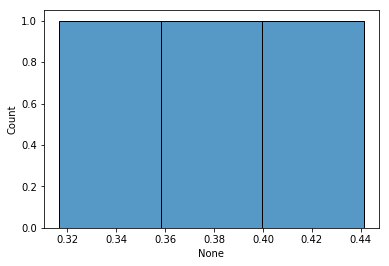

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 283.87it/s]

0.3822440087145969
P00727
['LEUCINE AMINOPEPTIDASE']


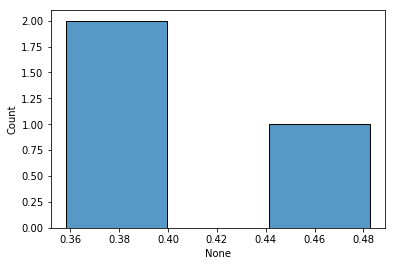

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 245.70it/s]

0.41127490625689284
P07741
['ADENINE PHOSPHORIBOSYLTRANSFERASE']


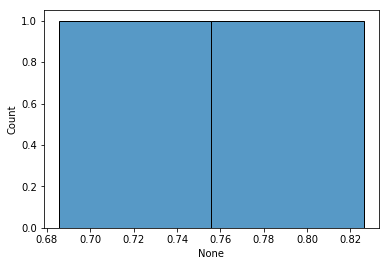

0it [00:00, ?it/s]

0.7559006211180124
P09038
['FIBROBLAST GROWTH FACTOR 2']


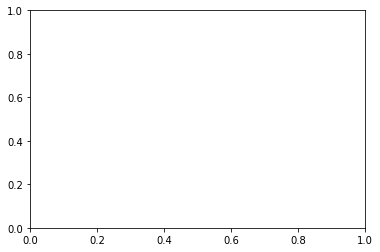

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 286.18it/s]

nan
Q9NYA1
['SPHINGOSINE KINASE 1']


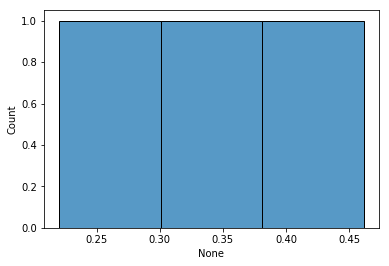

  0%|                                                     | 0/3 [00:00<?, ?it/s]

0.33953737948895335
O14842
['FREE FATTY ACID RECEPTOR 1,LYSOZYME'
 'FREE FATTY ACID RECEPTOR 1,ENDOLYSIN,FREE FATTY ACID'
 'FREE FATTY ACID RECEPTOR 1,LYSOZYME,FREE FATTY ACID']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 241.00it/s]


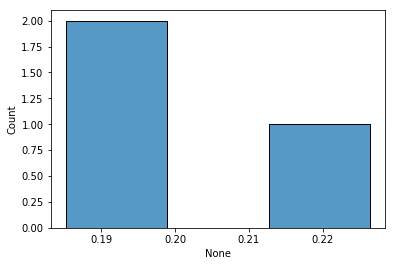

0.20201490798975075
P97571
['CALPAIN-1, CATALYTIC SUBUNIT']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 286.26it/s]


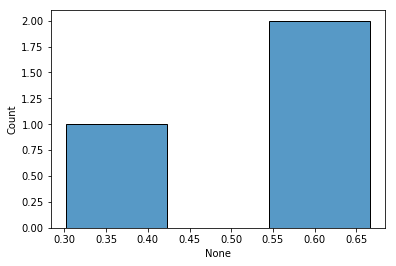

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 355.78it/s]


0.544973544973545
Q9Y3Q4
['POTASSIUM/SODIUM HYPERPOLARIZATION-ACTIVATED CYCLIC']


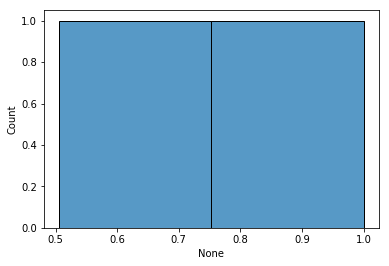

  0%|                                                     | 0/3 [00:00<?, ?it/s]

0.7530120481927711
P09382
['GALECTIN-1']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 372.15it/s]


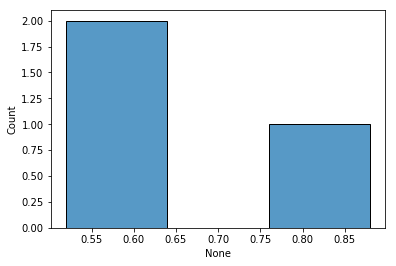

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 312.66it/s]

0.6453552951113927
Q51504
['PENICILLIN-BINDING PROTEIN 3' 'PEPTIDOGLYCAN D,D-TRANSPEPTIDASE FTSI']


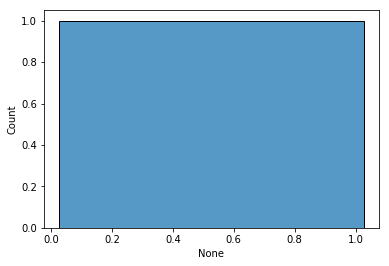

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 336.17it/s]

0.5267857142857143
Q15562
['TRANSCRIPTIONAL ENHANCER FACTOR TEF-4']


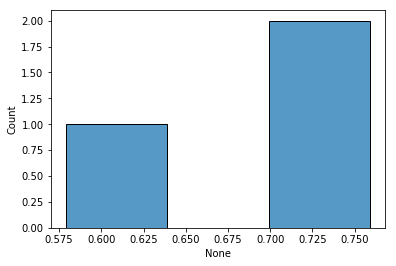

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 359.07it/s]

0.6991552956465238
Q96RR4
['CALCIUM/CALMODULIN-DEPENDENT PROTEIN KINASE 2'
 'CALCIUM/CALMODULIN-DEPENDENT PROTEIN KINASE KINASE 2']


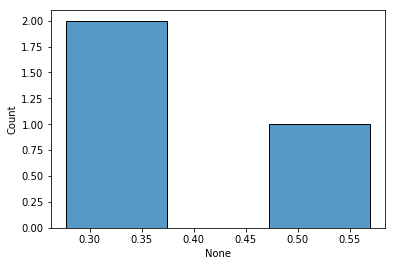

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 304.85it/s]

0.38772812770067616
Q8T9Z7
['PURINE NUCLEOSIDE PHOSPHORYLASE']


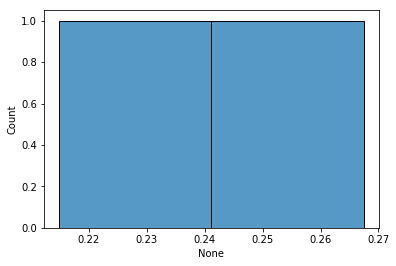

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 363.02it/s]

0.2411975657465768
P9WFK7
['N-ACETYLTRANSFERASE EIS']


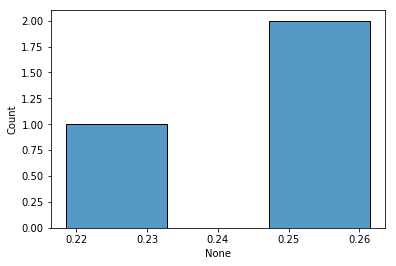

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 339.07it/s]

0.2465470803706098
Q9Y3Q0
['GLUTAMATE CARBOXYPEPTIDASE 3']


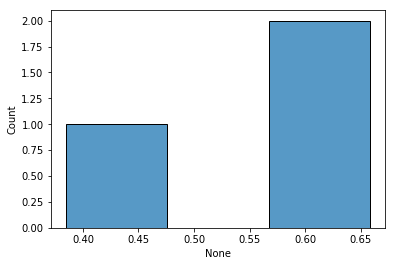

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 235.57it/s]

0.5452481875246104
P05121
['PLASMINOGEN ACTIVATOR INHIBITOR 1']


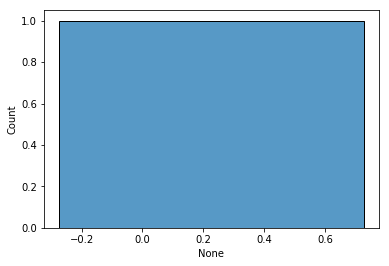

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 309.95it/s]

0.2268041237113402
Q16512
['SERINE/THREONINE-PROTEIN KINASE N1']


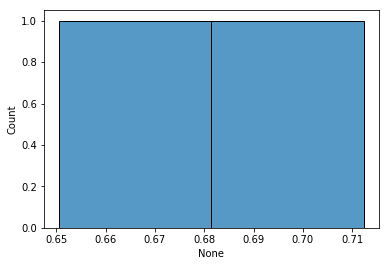

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 172.12it/s]

0.6814655883809209
Q9UM07
['PROTEIN-ARGININE DEIMINASE TYPE-4']


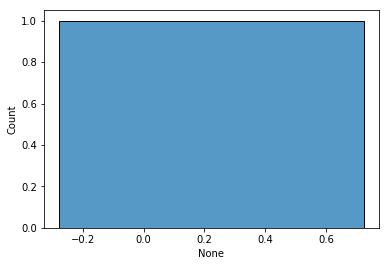

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 226.84it/s]

0.22302158273381295
P50225
['SULFOTRANSFERASE 1A1']


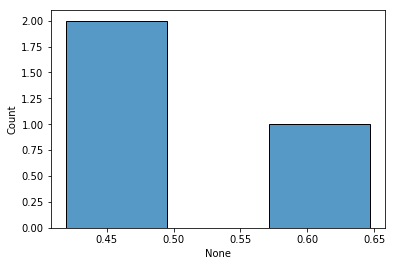

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 336.51it/s]

0.4968853621605045
Q80Z29
['NICOTINAMIDE PHOSPHORIBOSYLTRANSFERASE']


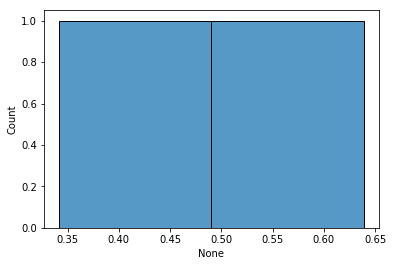

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 361.47it/s]

0.49038461538461536
Q9NYL2
['MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE MLT']


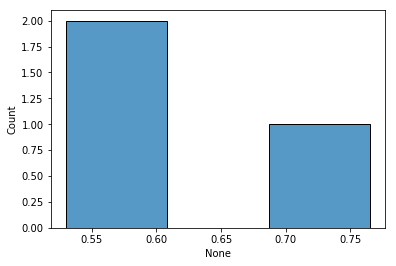

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 259.05it/s]

0.6083783940926798
P54578
['UBIQUITIN CARBOXYL-TERMINAL HYDROLASE 14']


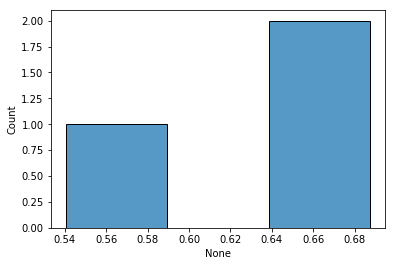

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 239.49it/s]

0.6385135135135135
P14061
['ESTRADIOL 17-BETA-DEHYDROGENASE 1'
 'TYPE 1 17 BETA-HYDROXYSTEROID DEHYDROGENASE']


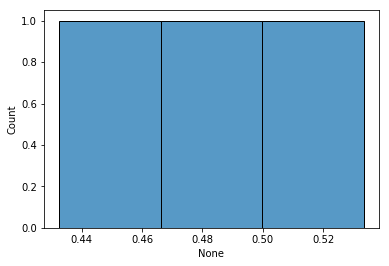

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 279.86it/s]

0.4780141843971631
O32393
['ADENYLATE CYCLASE']


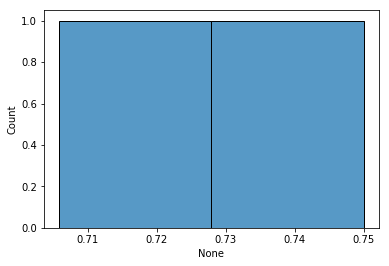

0.7279411764705883
P60568
['INTERLEUKIN-2']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 243.12it/s]


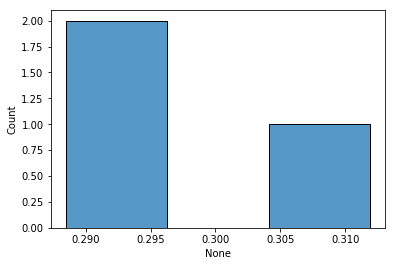

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 254.89it/s]

0.29628322747588803
P10253
['LYSOSOMAL ALPHA-GLUCOSIDASE']


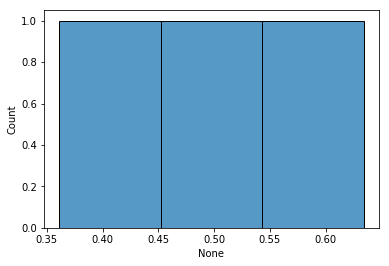

0.5031810556200801
Q16853
['MEMBRANE PRIMARY AMINE OXIDASE']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 232.99it/s]


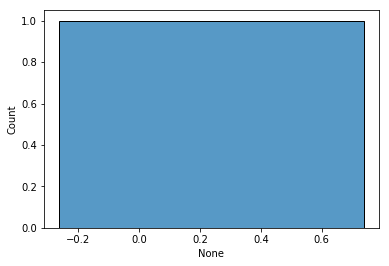

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 244.71it/s]

0.2375
P08263
['GLUTATHIONE S-TRANSFERASE A1' 'GLUTATHIONE S-TRANSFERASE A1-1']


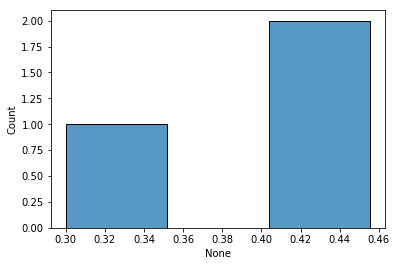

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 383.96it/s]

0.3922027290448343
P26918
['BETA-LACTAMASE']


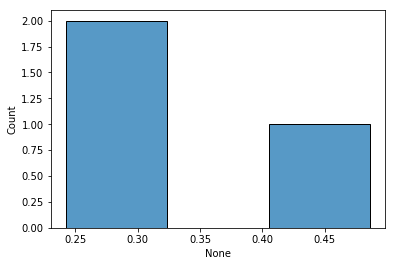

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 313.08it/s]

0.3344735109440992
Q9Y3R4
['SIALIDASE 2']


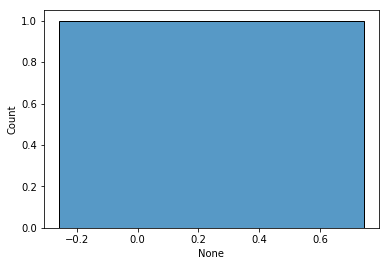

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 235.94it/s]

0.24285714285714285
Q9EXV5
['BETA-LACTAMASE']


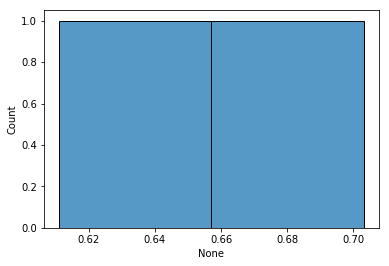

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 346.39it/s]

0.6571180555555556
Q9UDY8
['MUCOSA-ASSOCIATED LYMPHOID TISSUE LYMPHOMA TRANSLOC'
 'MUCOSA-ASSOCIATED LYMPHOID TISSUE LYMPHOMA TRANSLOCATION']


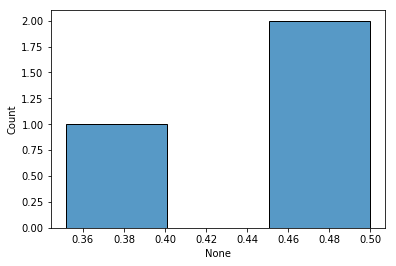

0it [00:00, ?it/s]

0.45054945054945056
Q194T1
['NEURAMINIDASE']


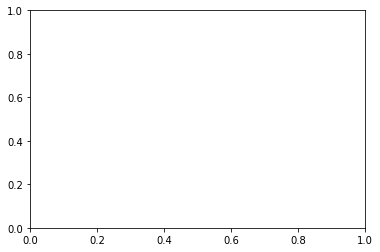

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]

nan
P0ACB2
['PORPHOBILINOGEN SYNTHASE']


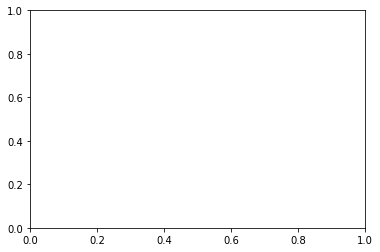

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 217.29it/s]

nan
P13569
['CYSTIC FIBROSIS TRANSMEMBRANE CONDUCTANCE REGULATOR'
 'CYSTIC FIBROSIS TRANSMEMBRANE CONDUCTANCE']


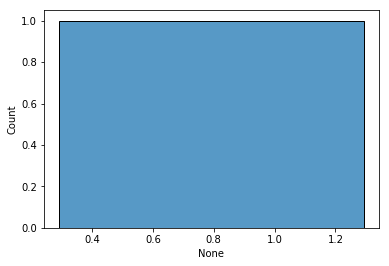

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 254.63it/s]


0.7926829268292683
Q834R3
['THYMIDYLATE SYNTHASE']


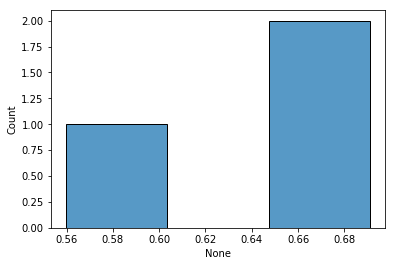

0it [00:00, ?it/s]

0.6380903455242365
P41222
['PROSTAGLANDIN-H2 D-ISOMERASE']


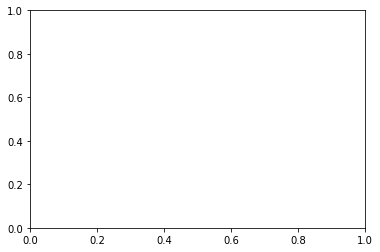

nan
Q9CPU0
['LACTOYLGLUTATHIONE LYASE']


/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 389.89it/s]


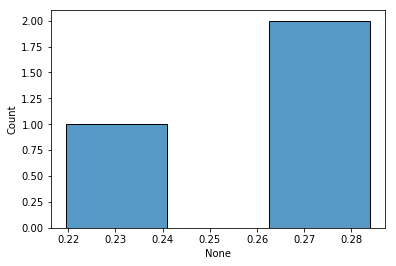

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 361.41it/s]

0.25696822429033933
Q9XZT6
['DEOXYNUCLEOSIDE KINASE']


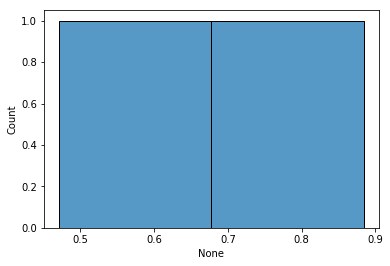

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 378.59it/s]


0.6777432712215321
Q9NXS2
['GLUTAMINYL-PEPTIDE CYCLOTRANSFERASE-LIKE PROTEIN']


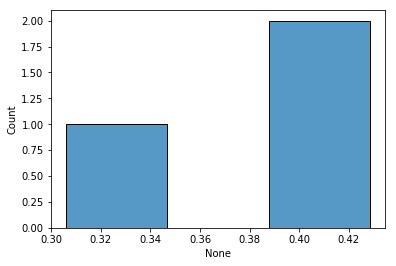

0it [00:00, ?it/s]

0.37943331178625295
O75643
['U5 SMALL NUCLEAR RIBONUCLEOPROTEIN 200 KDA HELICASE']


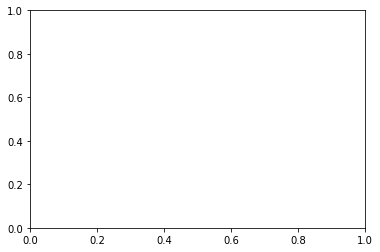

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 272.80it/s]

nan
Q9EQY0
['SERINE/THREONINE-PROTEIN KINASE/ENDORIBONUCLEASE IR']


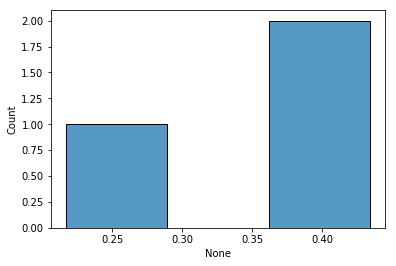

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 180.96it/s]

0.36176284083703236
O14976
['CYCLIN-G-ASSOCIATED KINASE']


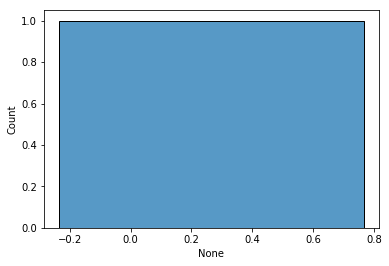

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 293.81it/s]

0.26595744680851063
P05981
['SERINE PROTEASE HEPSIN']


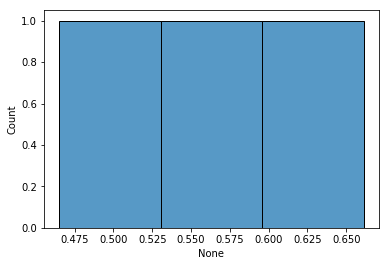

  0%|                                                     | 0/3 [00:00<?, ?it/s]

0.5740504275004921
Q9UKM7
['ENDOPLASMIC RETICULUM MANNOSYL-OLIGOSACCHARIDE 1'
 'ALPHA-1,2-MANNOSIDASE']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 284.71it/s]


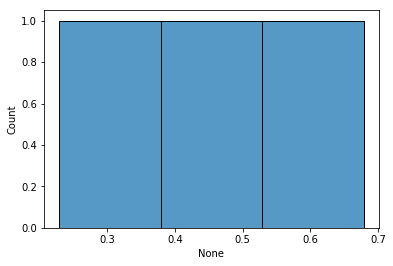

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 233.97it/s]

0.4560265417642467
O95696
['BROMODOMAIN-CONTAINING PROTEIN 1']


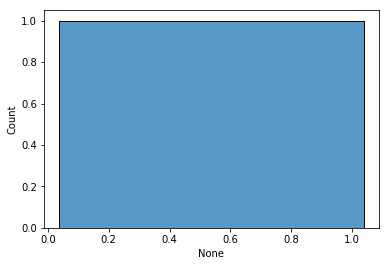

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 311.44it/s]


0.5375
Q9KU37
['BETA-HEXOSAMINIDASE']


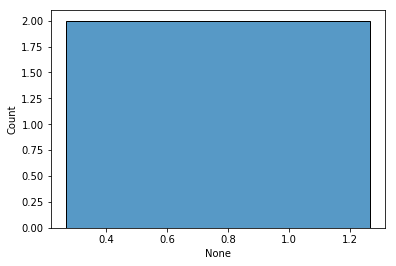

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 295.89it/s]

0.7671232876712328
B4EB35
['D-BETA-D-HEPTOSE 7-PHOSPHATE KINASE']


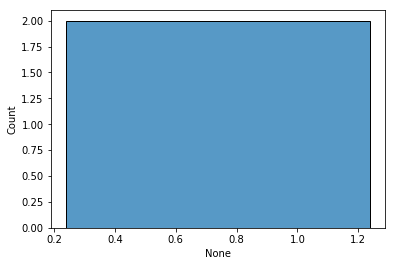

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 251.56it/s]

0.7391304347826086
P63000
['RAS-RELATED C3 BOTULINUM TOXIN SUBSTRATE 1']


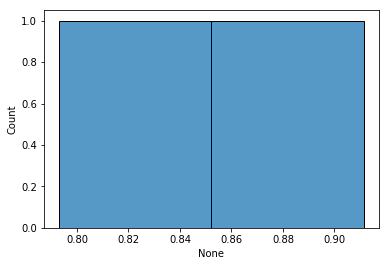

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 214.28it/s]

0.8522479266695766
P00959
['METHIONYL-TRNA SYNTHETASE']


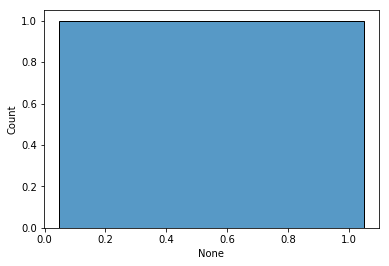

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 355.89it/s]

0.5483870967741935
P63279
['SUMO-CONJUGATING ENZYME UBC9']


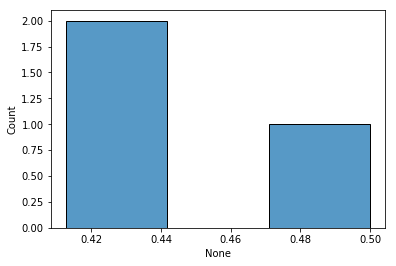

0.4491603404646883
Q9P2K8


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 189.31it/s]

['EIF-2-ALPHA KINASE GCN2,EIF-2-ALPHA KINASE GCN2'
 'EIF-2-ALPHA KINASE GCN2']


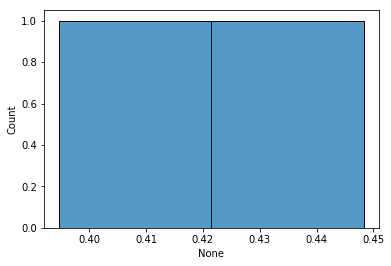

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 167.55it/s]

0.42150635208711434
P05364
['BETA-LACTAMASE']


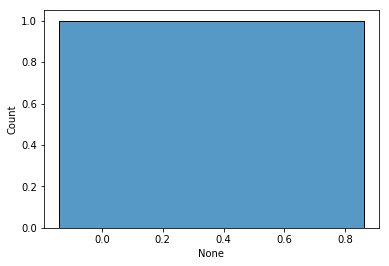

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 179.24it/s]

0.36046511627906974
O97447
['PUTATIVE FRUCTOSE-1,6-BISPHOSPHATE ALDOLASE']


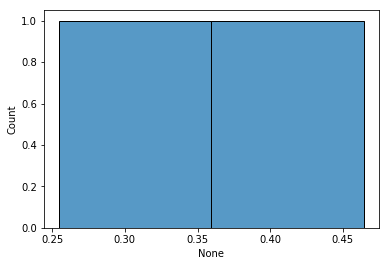

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 253.64it/s]

0.359593837535014
Q9NZQ7
['PROGRAMMED CELL DEATH 1 LIGAND 1']


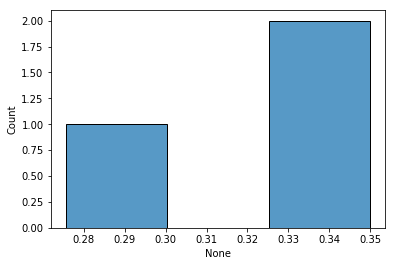

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 231.50it/s]

0.3251968503937008
Q3S340
['NEURAMINIDASE']


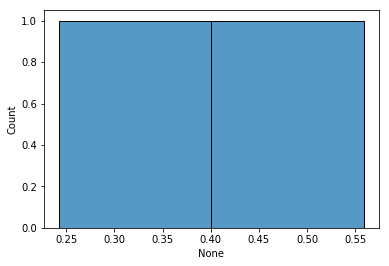

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 291.67it/s]

0.4008403361344538
P03418
['NUCLEOPROTEIN']


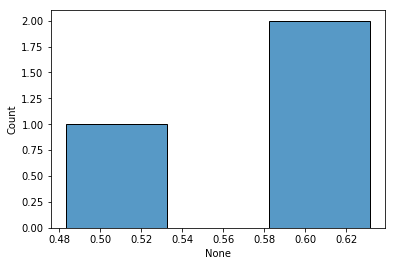

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 316.78it/s]

0.5821637426900584
P11473
['VITAMIN D3 RECEPTOR']


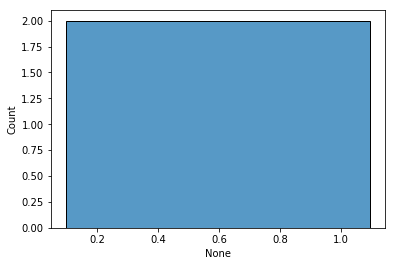

  0%|                                                     | 0/3 [00:00<?, ?it/s]

0.5959595959595959
P41743
['PROTEIN KINASE C, IOTA' 'PROTEIN KINASE C IOTA TYPE']


100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 258.78it/s]


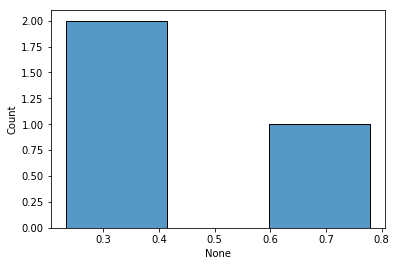

0it [00:00, ?it/s]

0.43837181337181336
P9WFV1
['LEUCINE--TRNA LIGASE']


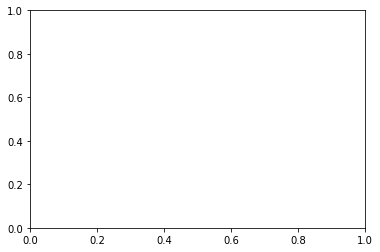

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 227.20it/s]

nan
P0DP23
['CALMODULIN-1']


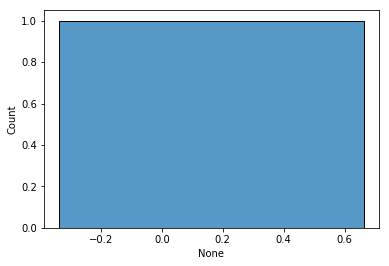

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 248.96it/s]

0.16279069767441862
P02919
['PENICILLIN-BINDING PROTEIN 1B']


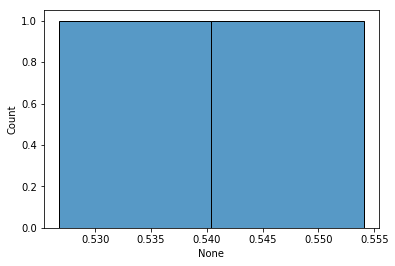

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 289.28it/s]


0.5404198841698842
P00381
['DIHYDROFOLATE REDUCTASE']


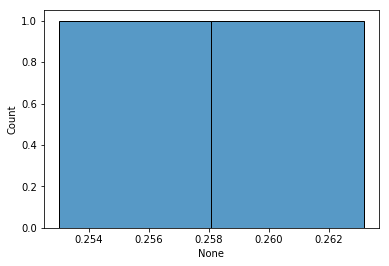

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 210.50it/s]

0.2580849714648066
P43378
['TYROSINE-PROTEIN PHOSPHATASE NON-RECEPTOR TYPE 9']


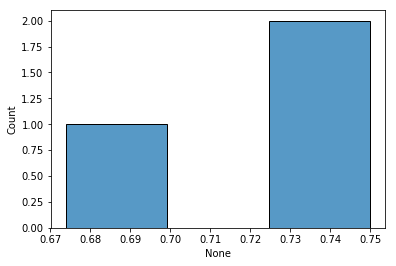

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 225.67it/s]

0.7246376811594203
Q9Y223
['BIFUNCTIONAL UDP-N-ACETYLGLUCOSAMINE']


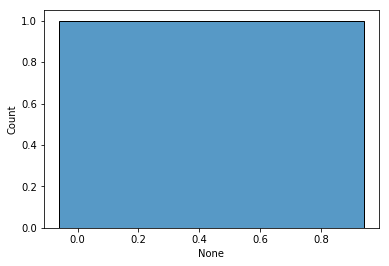

0it [00:00, ?it/s]

0.44
P43003
['EXCITATORY AMINO ACID TRANSPORTER 1,NEUTRAL AMINO ACID']


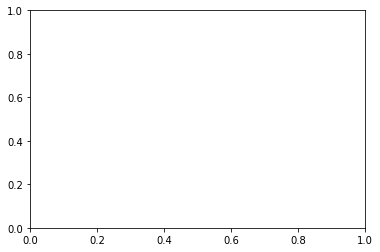

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 248.82it/s]

nan
P24666
['LOW MOLECULAR WEIGHT PHOSPHOTYROSINE PROTEIN PHOSPHATASE']


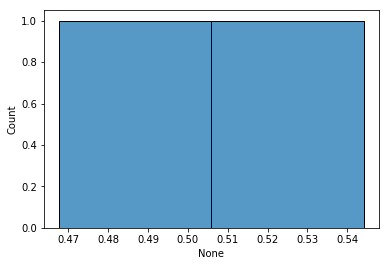

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.5059297912713472
O00763
['ACETYL-COA CARBOXYLASE 2']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 245.22it/s]


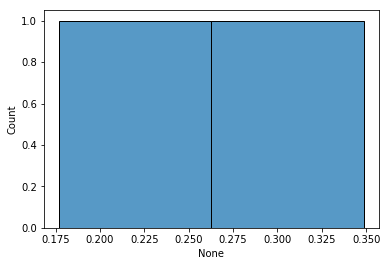

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 241.16it/s]

0.2628535932721713
P13956
["ERMC' METHYLTRANSFERASE" "ERMC' RRNA METHYLTRANSFERASE"]


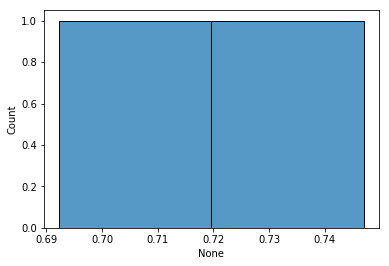

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 236.10it/s]

0.7196478220574606
P15085
['CARBOXYPEPTIDASE A1']


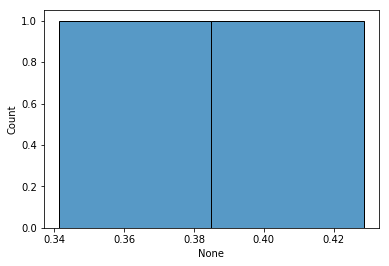

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 232.98it/s]

0.38501742160278746
O55239
['NICOTINAMIDE N-METHYLTRANSFERASE']


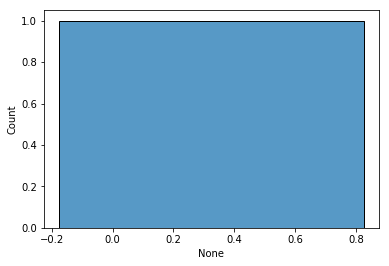

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 287.80it/s]

0.325
P15474
['3-DEHYDROQUINATE DEHYDRATASE']


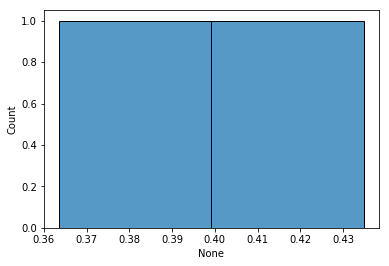

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 388.06it/s]

0.39920948616600793
Q9UBF8
['PHOSPHATIDYLINOSITOL 4-KINASE BETA,PHOSPHATIDYLINOS'
 'PHOSPHATIDYLINOSITOL 4-KINASE BETA,PHOSPHATIDYLINOSITOL 4']


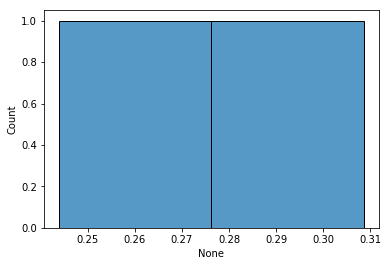

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 293.25it/s]

0.2762722071665161
P56109
['FRUCTOSE-BISPHOSPHATE ALDOLASE']


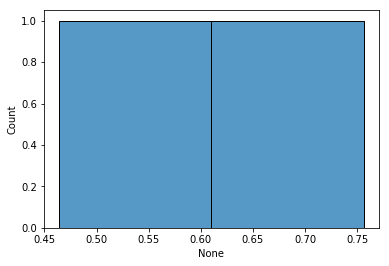

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 208.10it/s]

0.610191637630662
P9WFY7
['TRNA (GUANINE-N(1)-)-METHYLTRANSFERASE']


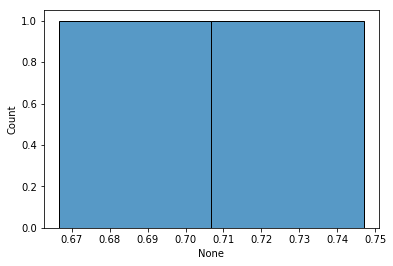

0it [00:00, ?it/s]

0.7068273092369477
P15328
['FOLATE RECEPTOR ALPHA']


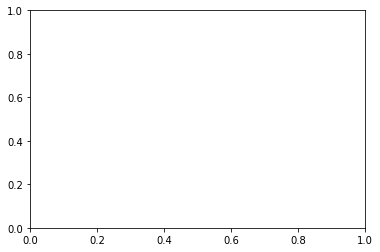

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 296.88it/s]

nan
Q9NQR1
['N-LYSINE METHYLTRANSFERASE KMT5A']


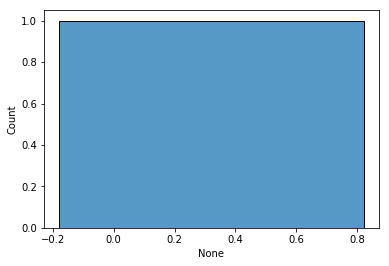

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 259.77it/s]

0.3211009174311927
Q91VE3
['KALLIKREIN-7']


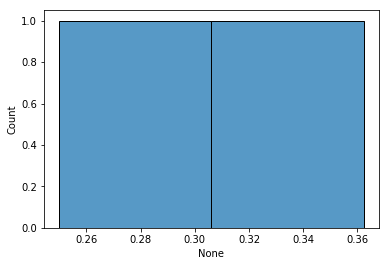

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 225.21it/s]


0.3061594202898551
P0AD57
['OCTAPRENYL DIPHOSPHATE SYNTHASE']


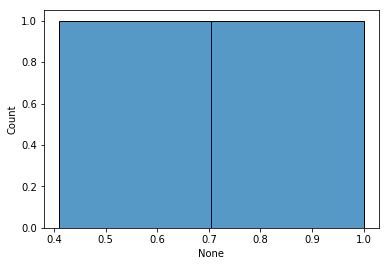

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 265.22it/s]

0.7051282051282051
O75116
['RHO-ASSOCIATED PROTEIN KINASE 2']


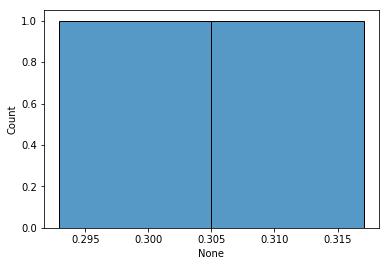

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 318.51it/s]

0.3050012318305001
P00558
['PHOSPHOGLYCERATE KINASE 1']


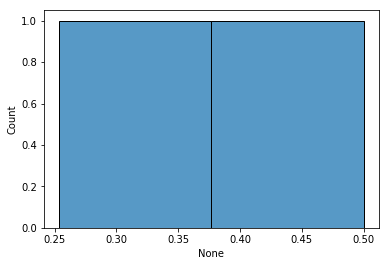

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 328.18it/s]

0.3768656716417911
P03962
["OROTIDINE 5'-MONOPHOSPHATE DECARBOXYLASE"]


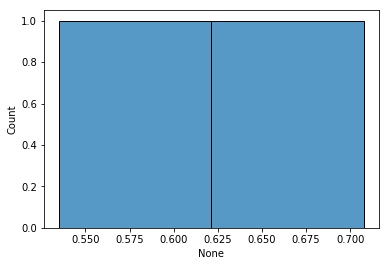

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 355.98it/s]

0.6214517876489707
P49902
["CYTOSOLIC PURINE 5'-NUCLEOTIDASE"]


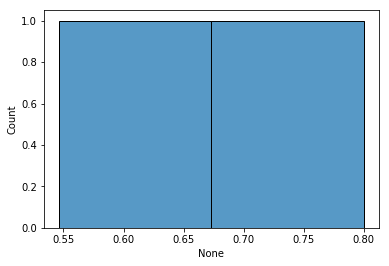

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 349.37it/s]

0.6732558139534883
P04626
['RECEPTOR TYROSINE-PROTEIN KINASE ERBB-2']


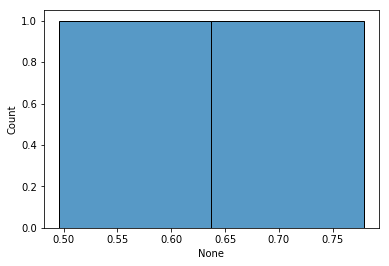

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 378.33it/s]

0.6373805309734513
Q13285
['STEROIDOGENIC FACTOR 1']


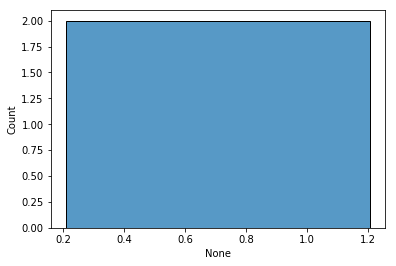

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 336.93it/s]

0.7078651685393258
Q07785
['CELL DIVISION CONTROL PROTEIN 2 HOMOLOG']


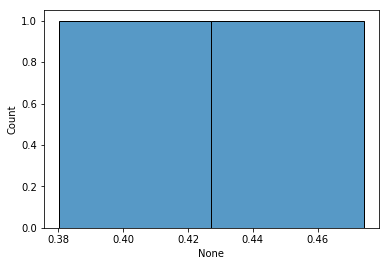

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 294.36it/s]

0.4272542471322782
P07148
['FATTY ACID-BINDING PROTEIN, LIVER']


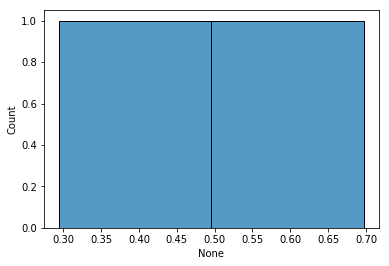

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 387.18it/s]

0.4958532695374801
O00214
['GALECTIN-8']


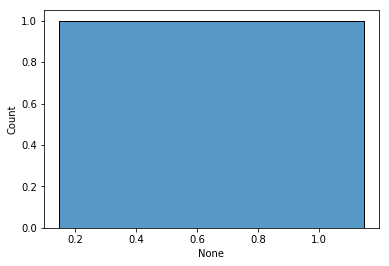

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 392.47it/s]

0.6470588235294118
Q5TCY1
['TAU-TUBULIN KINASE 1']


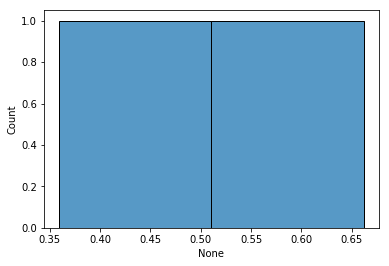

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 408.26it/s]


0.5106576338400528
P62993
['GROWTH FACTOR RECEPTOR-BOUND PROTEIN 2']


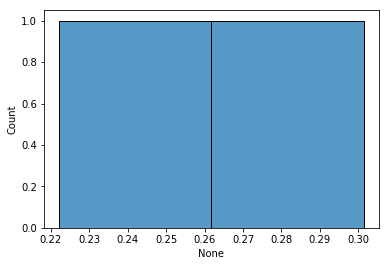

0.2617960426179604
A2RI47
['THIAMINE TRANSPORTER THIT']


0it [00:00, ?it/s]


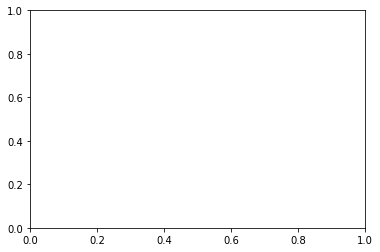

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 404.41it/s]

nan
O00141
['SERINE/THREONINE-PROTEIN KINASE SGK1']


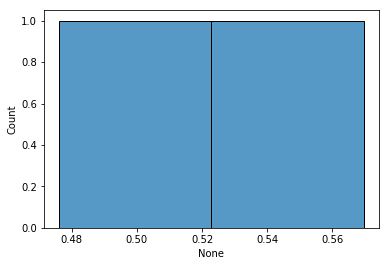

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 371.74it/s]

0.5229053646775166
Q9ZLT0
['GLUTAMATE RACEMASE']


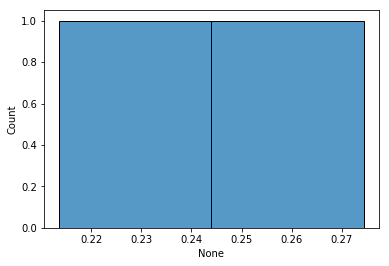

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 274.94it/s]

0.2440057484305272
P18886
['CARNITINE O-PALMITOYLTRANSFERASE 2']


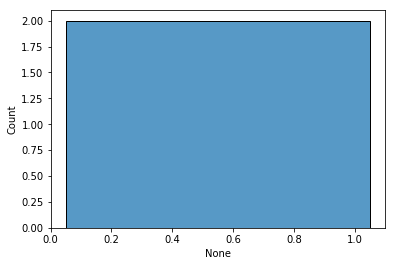

0it [00:00, ?it/s]

0.55
P19971
['THYMIDINE PHOSPHORYLASE']


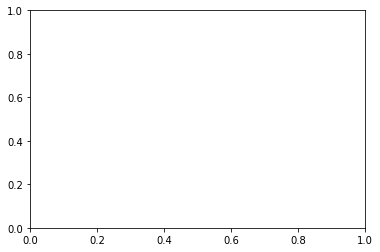

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 245.16it/s]

nan
Q16602
['CALCITONIN GENE-RELATED PEPTIDE TYPE 1 RECEPTOR']


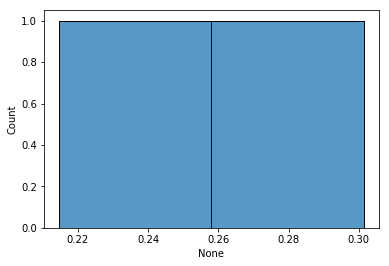

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 224.23it/s]

0.25804689469703335
Q04760
['LACTOYLGLUTATHIONE LYASE']


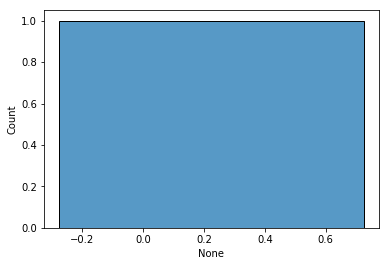

0.22448979591836735
P12955
['XAA-PRO DIPEPTIDASE']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 225.52it/s]


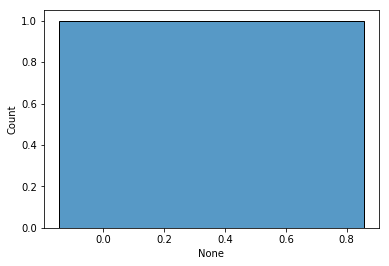

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.35555555555555557
P00524
['PP60 V-SRC TYROSINE KINASE TRANSFORMING PROTEIN']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 229.99it/s]


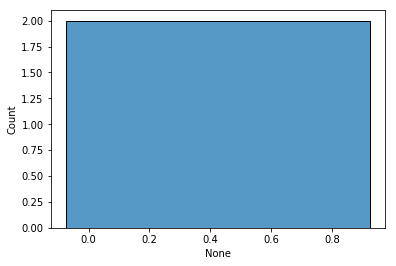

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 336.03it/s]

0.425
P35030
['TRYPSIN IVA' 'TRYPSIN-3']


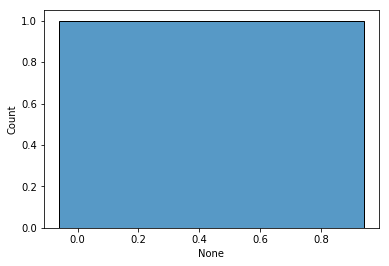

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 301.81it/s]

0.44
P00634
['ALKALINE PHOSPHATASE']


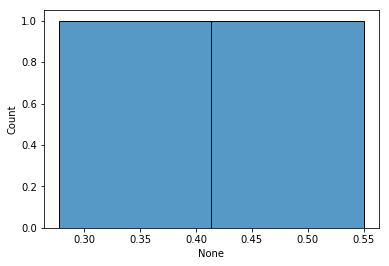

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 258.25it/s]

0.4138888888888889
P13995
['BIFUNCTIONAL METHYLENETETRAHYDROFOLATE']


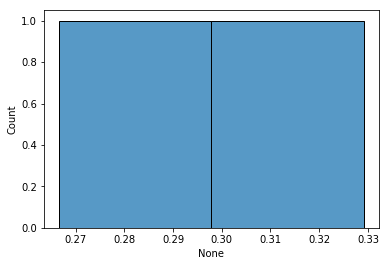

0.29789029535864975

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 269.66it/s]


P35408
['PROSTAGLANDIN E2 RECEPTOR EP4 SUBTYPE']


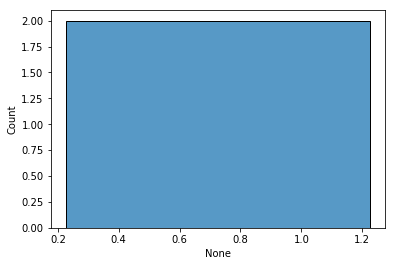

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 340.96it/s]

0.7261904761904762
P47900
['P2Y PURINOCEPTOR 1, RUBREDOXIN, P2Y PURINOCEPTOR 1']


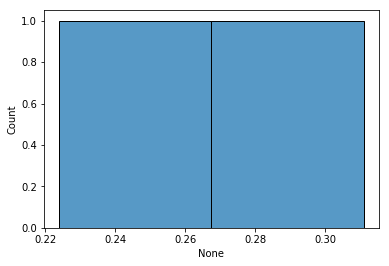

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 348.80it/s]

0.26746218487394957
Q9Y5S2
['SERINE/THREONINE-PROTEIN KINASE MRCK BETA']


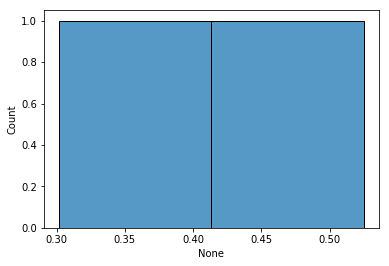

0it [00:00, ?it/s]

0.4134433962264151
Q15303
['RECEPTOR TYROSINE-PROTEIN KINASE ERBB-4']


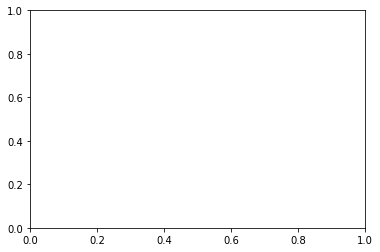

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 250.88it/s]

nan
Q6B0I6
['LYSINE-SPECIFIC DEMETHYLASE 4D']


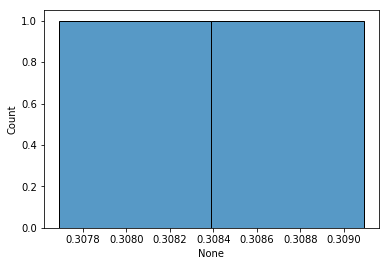

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 268.61it/s]

0.3083916083916084
O00764
['PYRIDOXAL KINASE']


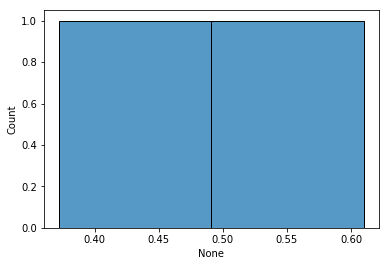

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 269.45it/s]

0.49115255858440937
Q15118
['PYRUVATE DEHYDROGENASE [LIPOAMIDE] KINASE']


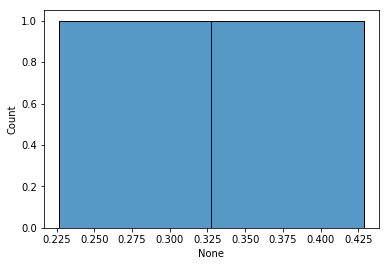

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 243.23it/s]

0.3276877761413844
P02647
['APOLIPOPROTEIN A-I']


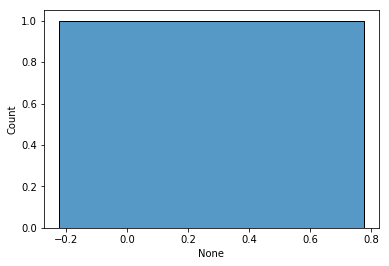

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 221.24it/s]

0.2765957446808511
Q9NQV7
['HISTONE-LYSINE N-METHYLTRANSFERASE PRDM9']


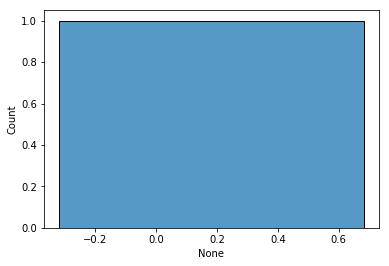

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.18181818181818182
Q15047
['HISTONE-LYSINE N-METHYLTRANSFERASE SETDB1']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 215.05it/s]


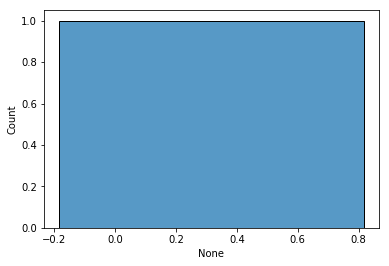

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 296.10it/s]

0.31645569620253167
P15309
['PROSTATIC ACID PHOSPHATASE']


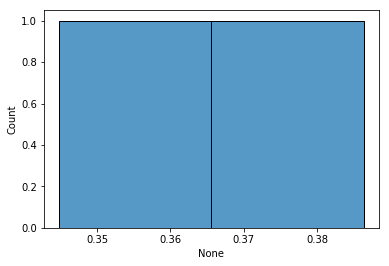

0it [00:00, ?it/s]

0.36559561128526646
Q6GG09
['PYRUVATE KINASE']


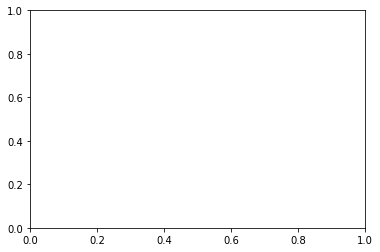

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 348.48it/s]

nan
O95749
['GERANYLGERANYL PYROPHOSPHATE SYNTHETASE'
 'GERANYLGERANYL PYROPHOSPHATE SYNTHASE']


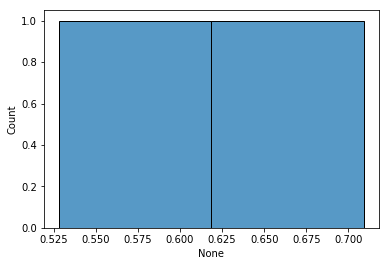

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.618696397941681
P06721
['CYSTATHIONINE BETA-LYASE']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 276.75it/s]


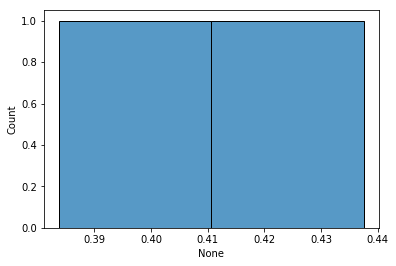

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 214.10it/s]

0.41066919191919193
P9WI55
['INORGANIC PYROPHOSPHATASE']


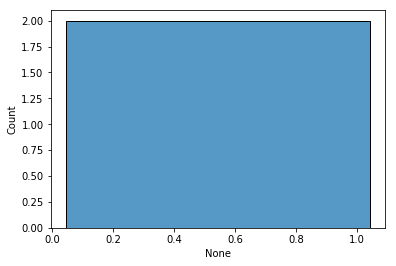

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 184.60it/s]

0.543859649122807
O85361
['B-N-ACETYLHEXOSAMINIDASE' 'BETA-N-ACETYLHEXOSAMINIDASE']


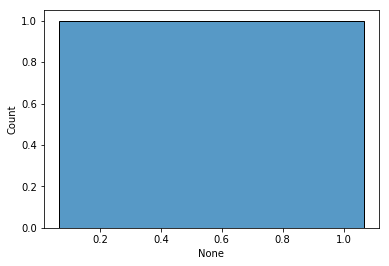

0.5660377358490566

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 219.93it/s]



Q9AIU7
['DNA LIGASE']


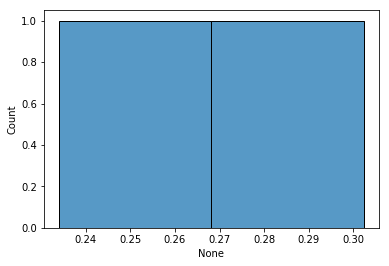

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.2681840672934191
P10619
['LYSOSOMAL PROTECTIVE PROTEIN 32 KDA CHAIN']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 214.54it/s]


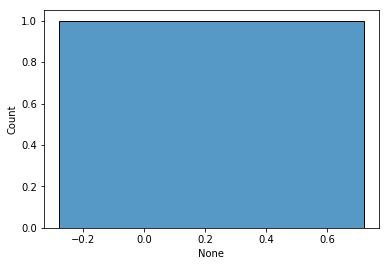

0it [00:00, ?it/s]


0.22058823529411764
P41229
['HISTONE DEMETHYLASE JARID1C']


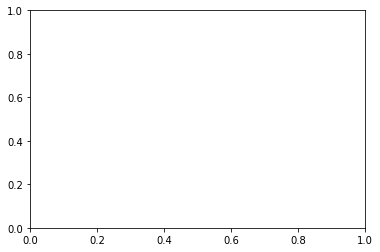

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 260.97it/s]

nan
Q96LA8
['PROTEIN ARGININE N-METHYLTRANSFERASE 6']


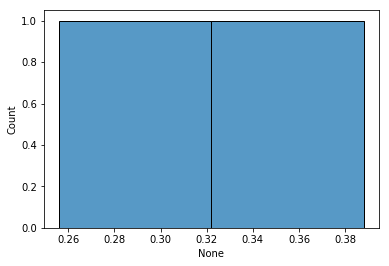

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 267.31it/s]

0.32207863123407354
Q96IY4
['CARBOXYPEPTIDASE B2']


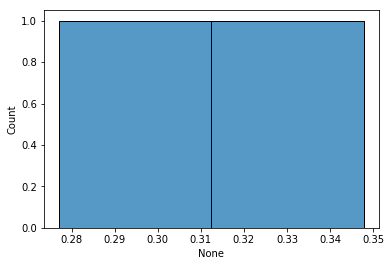

0it [00:00, ?it/s]

0.31246726034573075
Q4QBL1
['FARNESYL PYROPHOSPHATE SYNTHASE']


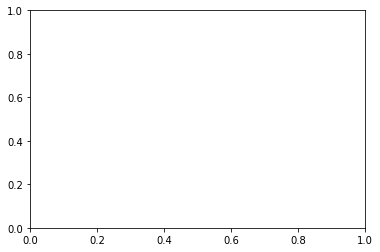

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 268.73it/s]

nan
Q8TCD5
["5'(3')-DEOXYRIBONUCLEOTIDASE, CYTOSOLIC TYPE"]


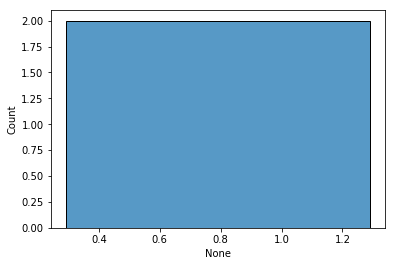

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 280.06it/s]

0.7912087912087912
P25911
['TYROSINE-PROTEIN KINASE LYN']


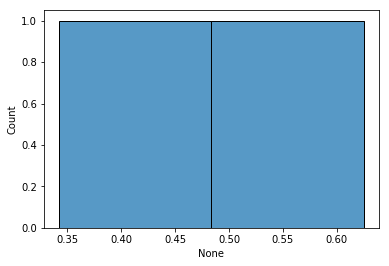

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 268.39it/s]

0.4837328767123288
Q9NSY1
['BMP-2-INDUCIBLE PROTEIN KINASE']


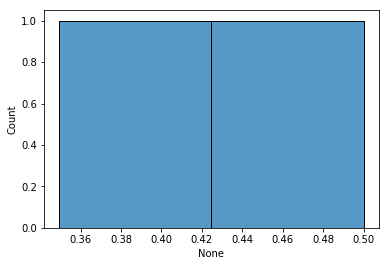

0.4247572815533981
P54753
['EPHRIN TYPE-B RECEPTOR 3']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 234.98it/s]


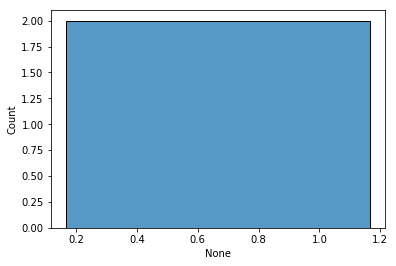

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.6666666666666666
P45446
['NUCLEAR RECEPTOR ROR-BETA']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 213.85it/s]


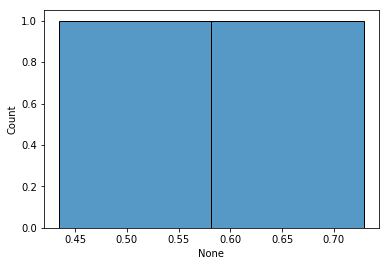

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 216.98it/s]

0.581798084008843
Q9UKK9
['ADP-SUGAR PYROPHOSPHATASE']


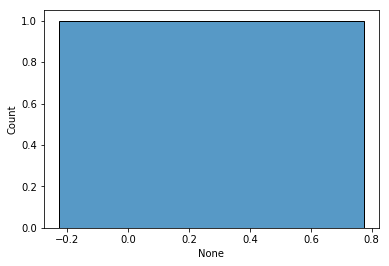

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 283.71it/s]

0.27358490566037735
P54762
['EPHRIN TYPE-B RECEPTOR 1']


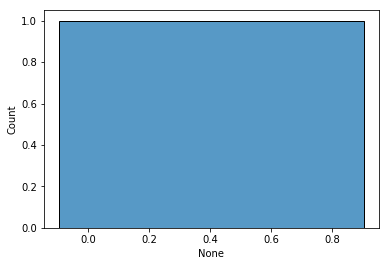

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 266.97it/s]

0.40476190476190477
P08922
['PROTO-ONCOGENE TYROSINE-PROTEIN KINASE ROS']


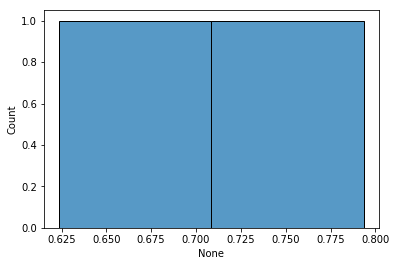

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 188.98it/s]

0.7086203185535944
P20138
['MYELOID CELL SURFACE ANTIGEN CD33']


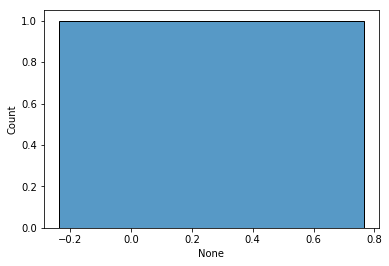

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 268.52it/s]

0.26455026455026454
O43614
['OREXIN RECEPTOR TYPE 2,GLGA GLYCOGEN SYNTHASE,OREXIN']


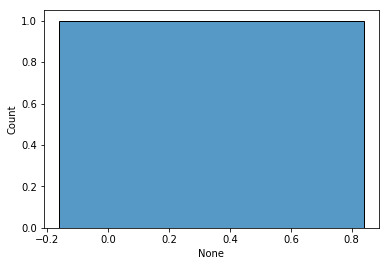

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 310.90it/s]

0.3392857142857143
P30305
['M-PHASE INDUCER PHOSPHATASE 2']


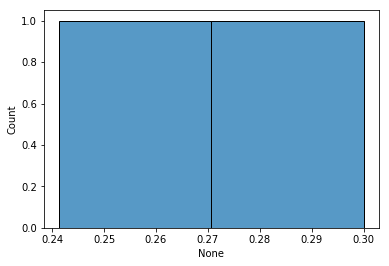

0it [00:00, ?it/s]

0.2706896551724138
P21964
['CATECHOL O-METHYLTRANSFERASE']


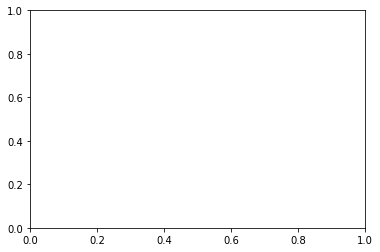

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|                                                     | 0/2 [00:00<?, ?it/s]

nan
P37173
['TGF-BETA RECEPTOR TYPE-2']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 250.12it/s]


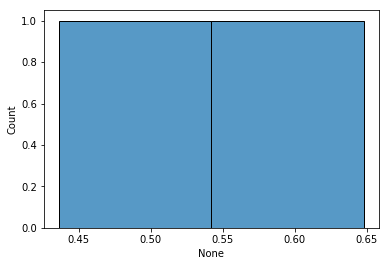

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 226.47it/s]

0.5420454545454545
Q9H999
['PANTOTHENATE KINASE 3']


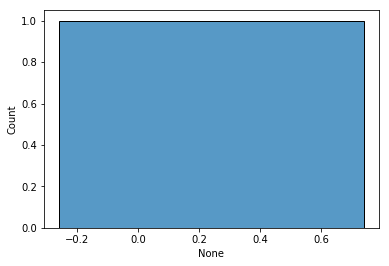

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 193.79it/s]

0.2403846153846154
Q96T88
['E3 UBIQUITIN-PROTEIN LIGASE UHRF1']


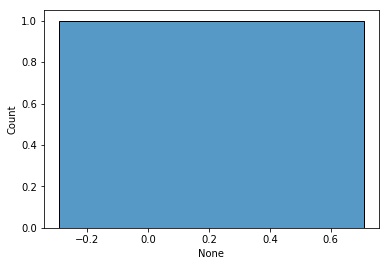

0.208
P43220
['GLUCAGON-LIKE PEPTIDE 1 RECEPTOR, ENDOLYSIN CHIMERA']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 233.08it/s]


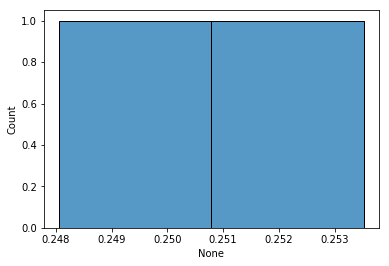

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 247.87it/s]

0.25079157113221967
P17050
['ALPHA-N-ACETYLGALACTOSAMINIDASE']


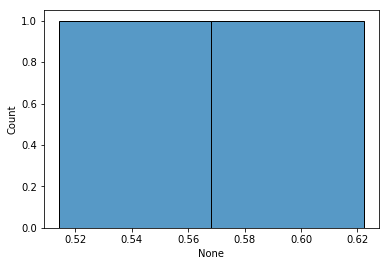

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 232.35it/s]

0.5682539682539682
P26639
['THREONINE--TRNA LIGASE, CYTOPLASMIC']


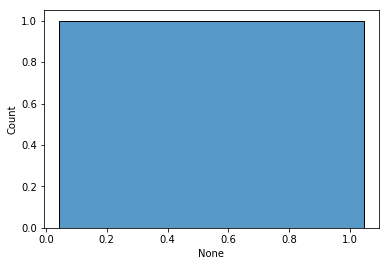

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 352.18it/s]

0.5444444444444444
P23141
['LIVER CARBOXYLESTERASE I' 'CES1 PROTEIN']


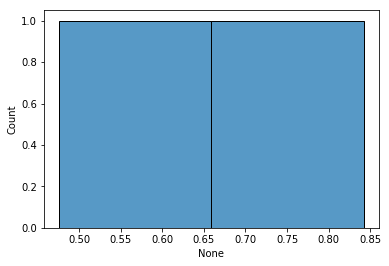

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 334.97it/s]

0.6591478696741855
P21802
['FIBROBLAST GROWTH FACTOR RECEPTOR 2']


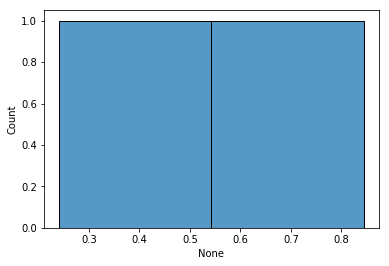

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 256.38it/s]

0.5427675772503359
Q873Y0
['ASPERGILLUS FUMIGATUS CHITINASE A1' 'CHITINASE']


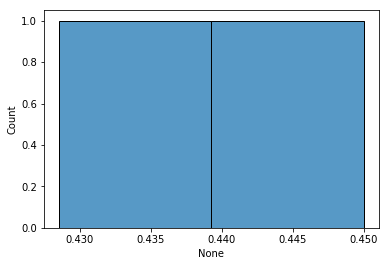

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 284.83it/s]

0.4392857142857143
P29994
['INOSITOL 1,4,5-TRISPHOSPHATE RECEPTOR TYPE 1']


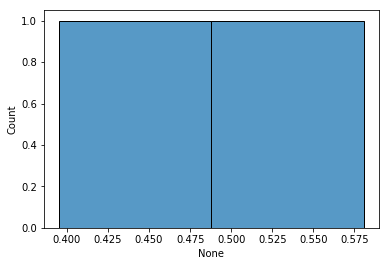

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 258.72it/s]

0.48799699924981244
O34667
['S-RIBOSYLHOMOCYSTEINE LYASE']


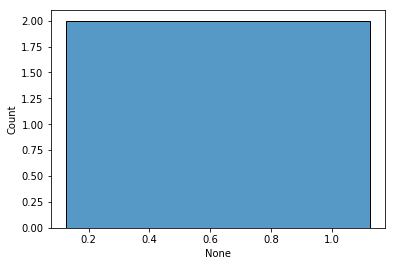

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 238.75it/s]

0.625
P13100
['THYMIDYLATE SYNTHASE']


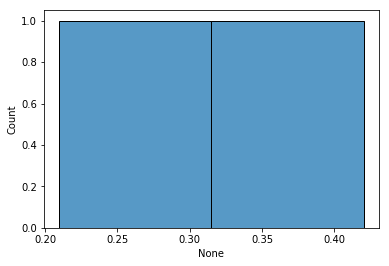

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 244.83it/s]

0.3149791385085503
P52209
['6-PHOSPHOGLUCONATE DEHYDROGENASE, DECARBOXYLATING']


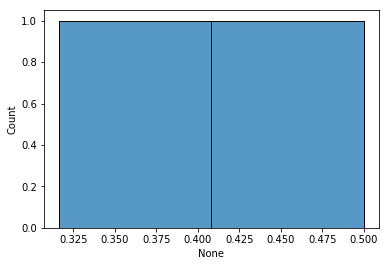

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.4083333333333333
Q99558
['MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE 14']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 208.83it/s]


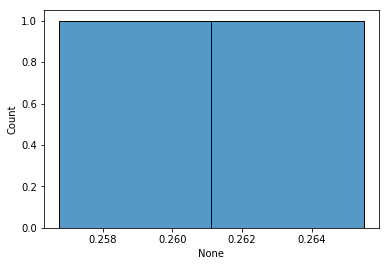

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.2611217412102368
P42684
['TYROSINE-PROTEIN KINASE ABL2']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 249.31it/s]


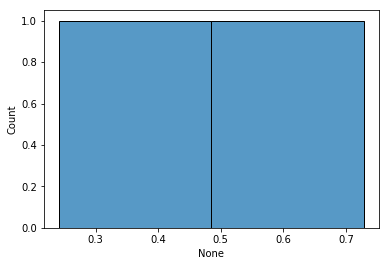

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 291.29it/s]

0.4851714199029126
Q15125
['3-BETA-HYDROXYSTEROID-DELTA(8),DELTA(7)-ISOMERASE']


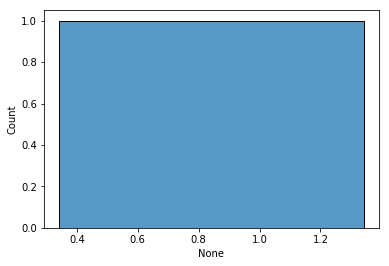

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 225.77it/s]

0.8421052631578947
Q8NB16
['MIXED LINEAGE KINASE DOMAIN-LIKE PROTEIN']


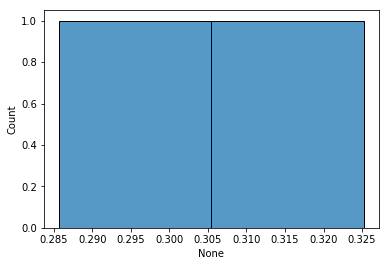

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 287.12it/s]

0.305458768873403
P45984
['MITOGEN-ACTIVATED PROTEIN KINASE 9']


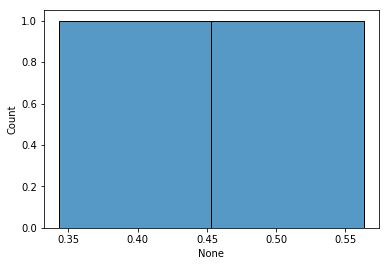

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 261.00it/s]

0.4532705697754241
P9WKE1
['THYMIDYLATE KINASE']


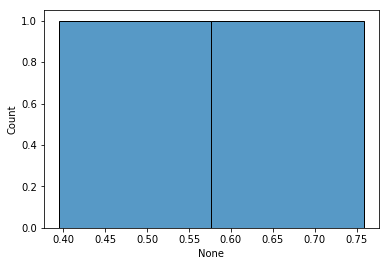

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 280.31it/s]

0.5767952977255303
P0ACC7
['BIFUNCTIONAL PROTEIN GLMU']


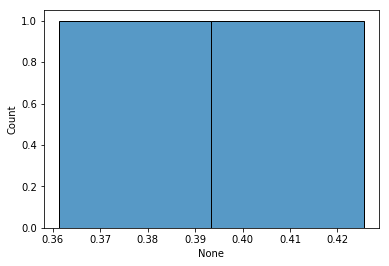

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 213.79it/s]

0.39343822635437153
Q96CA5
['BACULOVIRAL IAP REPEAT-CONTAINING PROTEIN 7']


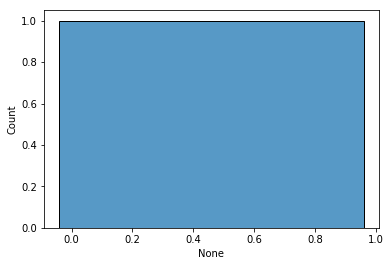

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 323.02it/s]

0.45977011494252873
P22736
['NUCLEAR RECEPTOR SUBFAMILY 4 GROUP A MEMBER 1']


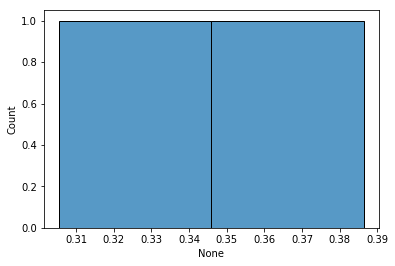

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 243.40it/s]

0.34595959595959597
Q16651
['PROSTASIN']


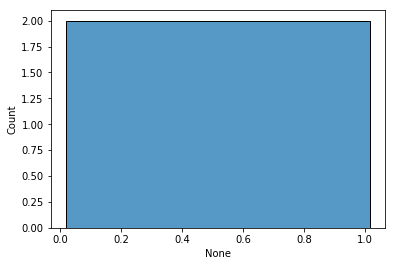

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 266.16it/s]

0.5174825174825175
P0C559
['DNA GYRASE SUBUNIT B']


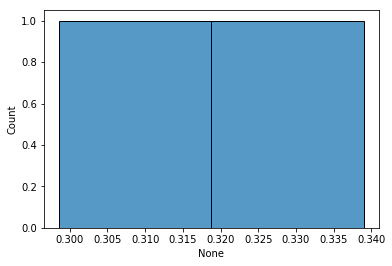

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 210.00it/s]

0.3187970809792844
P00363
['FUMARATE REDUCTASE FLAVOPROTEIN']


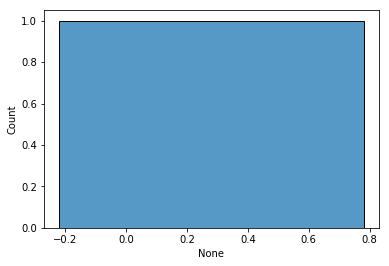

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.2807017543859649
P0A720
['THYMIDYLATE KINASE']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 167.03it/s]


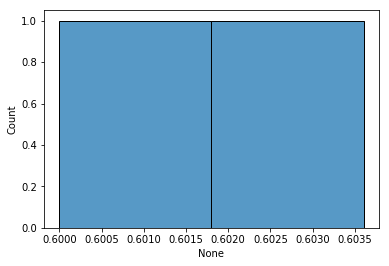

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 187.61it/s]

0.6018018018018019
P62136
['SERINE/THREONINE-PROTEIN PHOSPHATASE PP1-ALPHA']


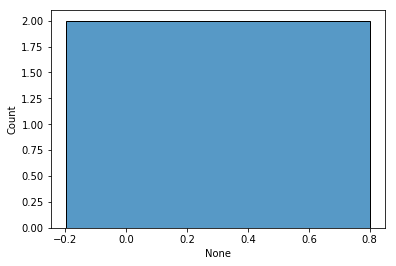

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 142.13it/s]

0.3013698630136986
Q15910
['HISTONE-LYSINE N-METHYLTRANSFERASE EZH2,POLYCOMB PROTEIN'
 'HISTONE-LYSINE N-METHYLTRANSFERASE EZH2,HISTONE-LYSINE N']


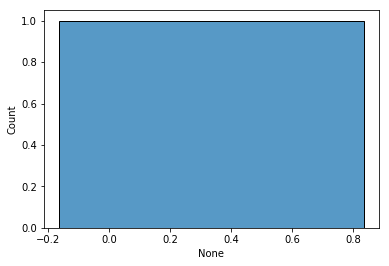

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.68it/s]


0.33557046979865773
Q15418
['RIBOSOMAL PROTEIN S6 KINASE ALPHA-1']


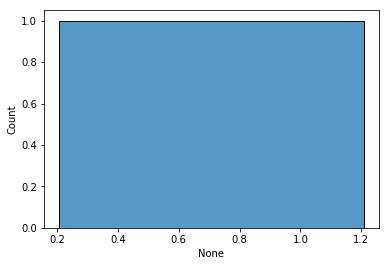

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 204.38it/s]

0.7075471698113207
P47870
['GAMMA-AMINOBUTYRIC ACID RECEPTOR SUBUNIT BETA-2,GAMMA']


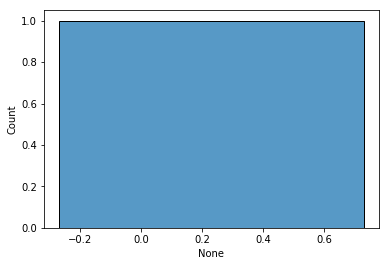

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 267.65it/s]

0.23076923076923078
P32019
['TYPE II INOSITOL 1,4,5-TRISPHOSPHATE 5-PHOSPHATASE']


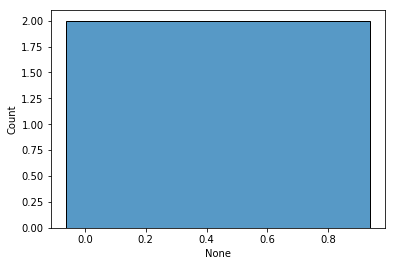

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 253.80it/s]

0.4375
Q16644
['MAP KINASE-ACTIVATED PROTEIN KINASE 3']


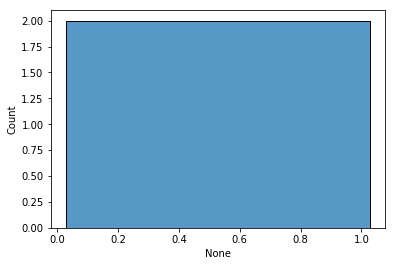

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 236.57it/s]

0.5287356321839081
Q9NYV4
['CYCLIN-DEPENDENT KINASE 12']


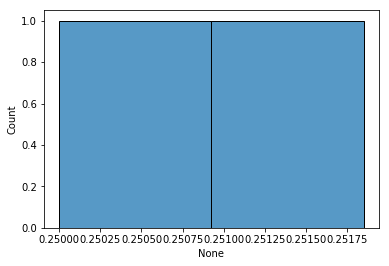

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 251.23it/s]

0.2509259259259259
Q9UHI8
['A DISINTEGRIN AND METALLOPROTEINASE WITH THROMBOSPO']


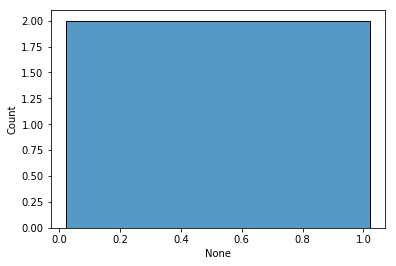

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 194.08it/s]

0.5221238938053098
P56073
['SHIKIMATE KINASE']


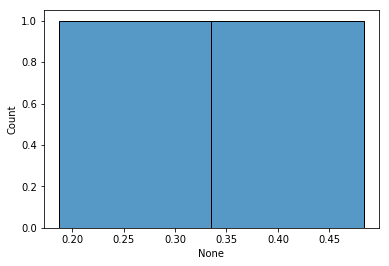

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 253.41it/s]

0.3354166666666667
P03956
['COLLAGENASE 1 (MMP-1)']


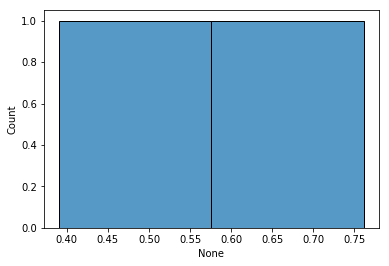

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 222.96it/s]

0.5760515603799186
P29473
['NITRIC OXIDE SYNTHASE, ENDOTHELIAL' 'ENDOTHELIAL NITRIC OXIDE SYNTHASE']


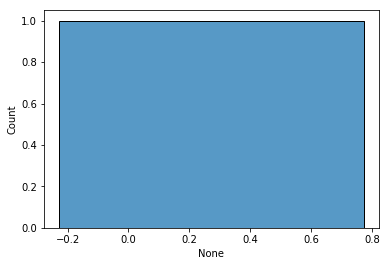

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.2727272727272727
P09104
['GAMMA-ENOLASE']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 359.76it/s]


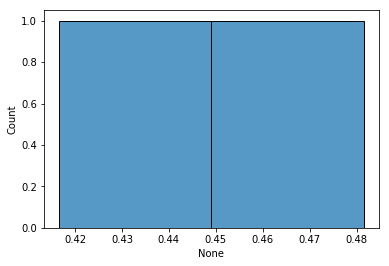

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 187.83it/s]

0.44907407407407407
P49642
['DNA PRIMASE SMALL SUBUNIT']


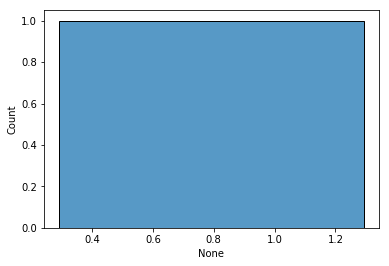

0it [00:00, ?it/s]

0.7926829268292683
P04632
['CALPAIN SMALL SUBUNIT 1']


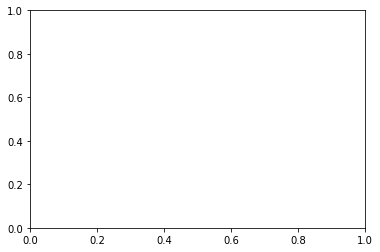

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 252.14it/s]

nan
Q820T1
['3-OXOACYL-[ACYL-CARRIER-PROTEIN] SYNTHASE 3']


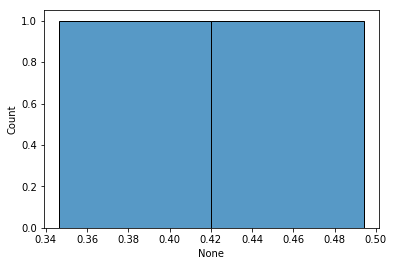

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 264.12it/s]

0.42032615026208503
P55210
['CASPASE-7 (CASP-7)']


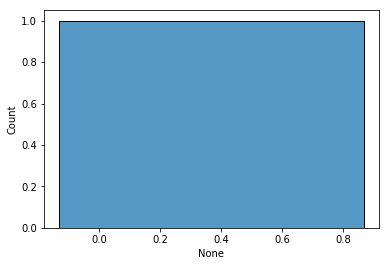

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 247.33it/s]


0.3684210526315789
Q13370
["CGMP-INHIBITED 3',5'-CYCLIC PHOSPHODIESTERASE B"]


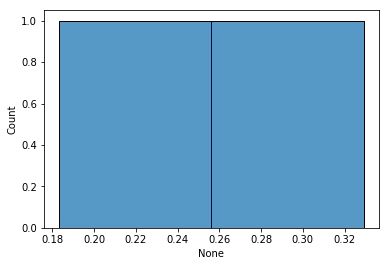

0it [00:00, ?it/s]

0.2562236286919831
Q6ZMT4
['LYSINE-SPECIFIC DEMETHYLASE 7']


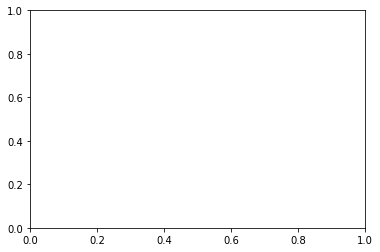

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|                                                     | 0/2 [00:00<?, ?it/s]

nan
Q00688
['PEPTIDYL-PROLYL CIS-TRANS ISOMERASE FKBP3' 'FKBP25']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 202.90it/s]


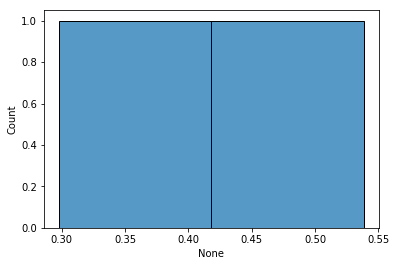

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.4182692307692307
Q9WVG6
['HISTONE-ARGININE METHYLTRANSFERASE CARM1']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 160.44it/s]


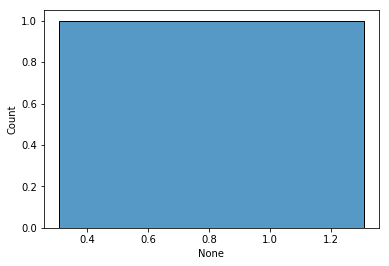

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.8082191780821918
Q9N1E2
['GLUCOSE-6-PHOSPHATE ISOMERASE']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 269.20it/s]


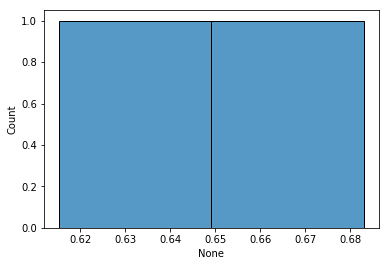

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 296.83it/s]

0.6491557223264541
P07332
['TYROSINE-PROTEIN KINASE FES/FPS']


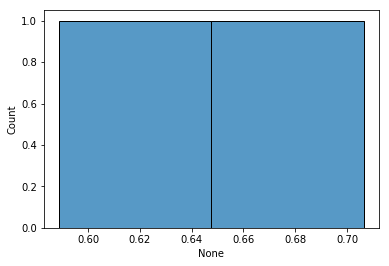

0it [00:00, ?it/s]

0.6476554536187564
P18206
['VINCULIN']


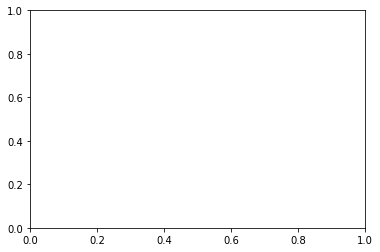

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 204.75it/s]

nan
P00698
['LYSOZYME C']


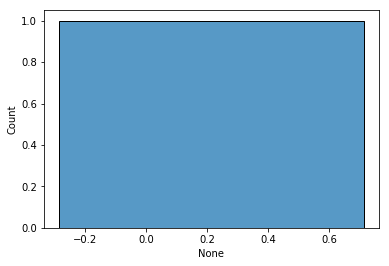

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 215.55it/s]

0.21428571428571427
Q13976
['CGMP-DEPENDENT PROTEIN KINASE 1']


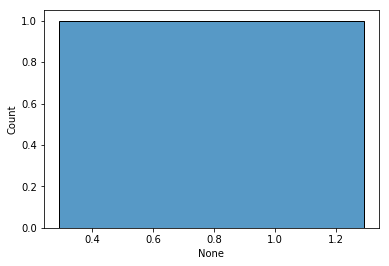

0.7922077922077922
Q58F21
['BROMODOMAIN TESTIS-SPECIFIC PROTEIN']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 211.41it/s]


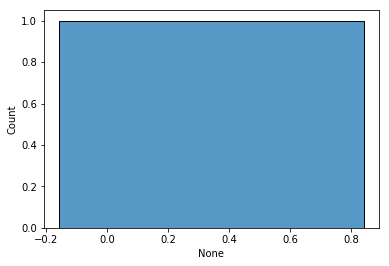

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 242.99it/s]

0.34234234234234234
Q9R1M7
['GLUTAMATE [NMDA] RECEPTOR SUBUNIT 3A']


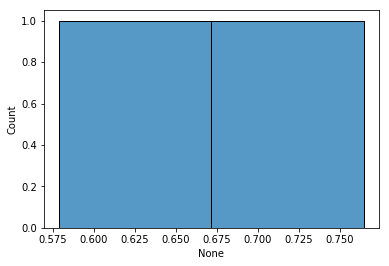

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 263.04it/s]

0.6718266253869969
P35747
['SERUM ALBUMIN']


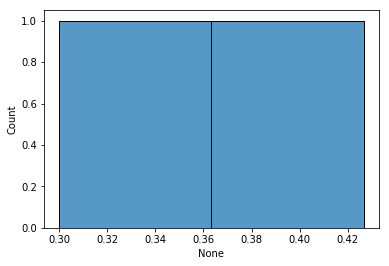

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 265.95it/s]

0.36333333333333334
P28335
['5-HYDROXYTRYPTAMINE RECEPTOR 2C,SOLUBLE CYTOCHROME B562']


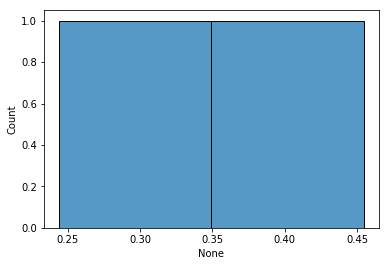

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 166.28it/s]

0.3493199713672155
O75940
['SURVIVAL OF MOTOR NEURON-RELATED-SPLICING FACTOR 30']


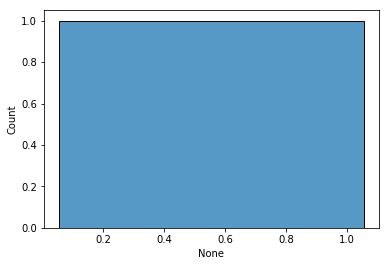

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 216.45it/s]

0.5555555555555556
Q10471
['POLYPEPTIDE N-ACETYLGALACTOSAMINYLTRANSFERASE 2']


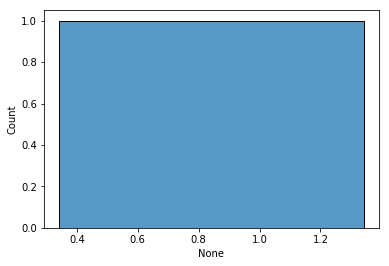

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 170.15it/s]

0.8421052631578947
P40261
['NICOTINAMIDE N-METHYLTRANSFERASE']


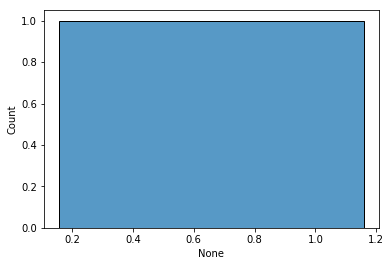

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 191.77it/s]

0.6583333333333333
Q8I3X4
['URIDINE PHOSPHORYLASE PUTATIVE']


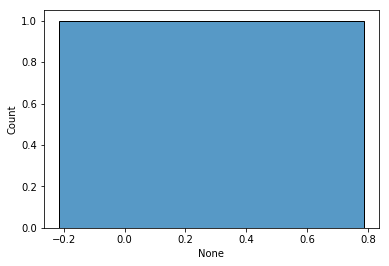

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 194.35it/s]

0.2857142857142857
Q00610
['CLATHRIN HEAVY CHAIN 1']


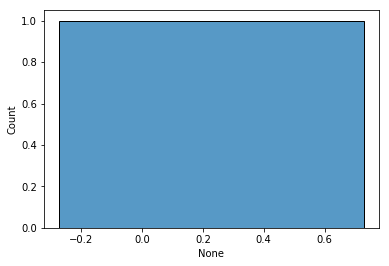

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 230.44it/s]

0.22826086956521738
P16753
['CAPSID PROTEIN P40']


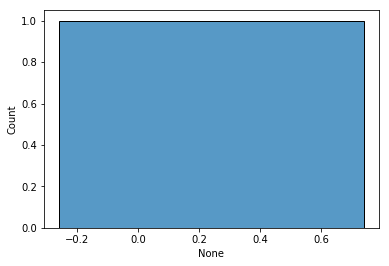

0.24031007751937986
Q9UKE5
['TRAF2 AND NCK-INTERACTING PROTEIN KINASE']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 255.77it/s]


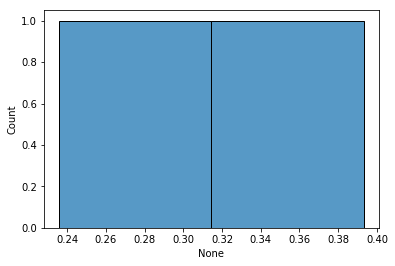

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 183.22it/s]

0.3145587246710842
P00592
['PROPHOSPHOLIPASE A2' 'PHOSPHOLIPASE A2']


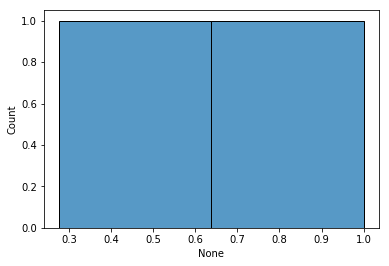

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 234.49it/s]

0.6385542168674698
P62157
['CALMODULIN']


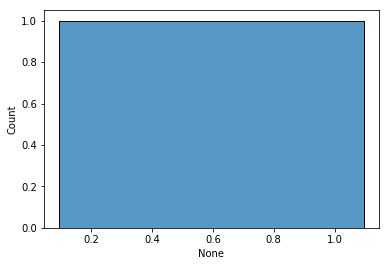

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 231.83it/s]

0.5955056179775281
Q62986
['ESTROGEN RECEPTOR BETA']


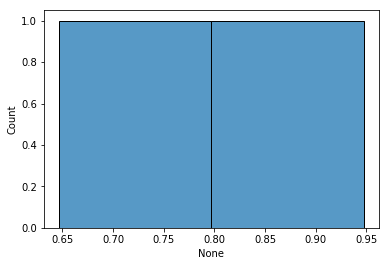

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 209.93it/s]

0.7972136222910217
Q9GZZ9
['UBIQUITIN-LIKE MODIFIER-ACTIVATING ENZYME 5']


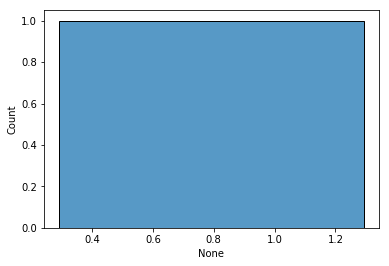

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 207.02it/s]

0.7926829268292683
Q03137
['EPHRIN TYPE-A RECEPTOR 4']


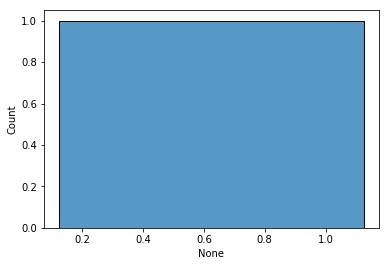

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.625
Q9NXA8
['NAD-DEPENDENT DEACYLASE SIRTUIN-5']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 221.56it/s]


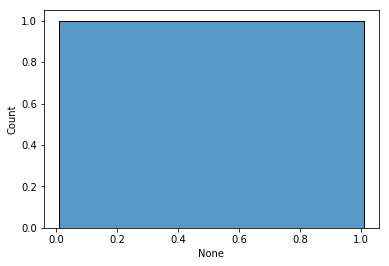

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 248.52it/s]

0.5096153846153846
P28223
['5-HYDROXYTRYPTAMINE RECEPTOR 2A,SOLUBLE CYTOCHROME B562']


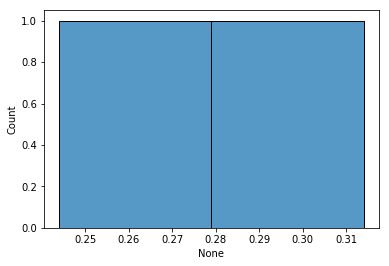

0.2790239882805347
P27708


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 371.29it/s]


['CAD PROTEIN']


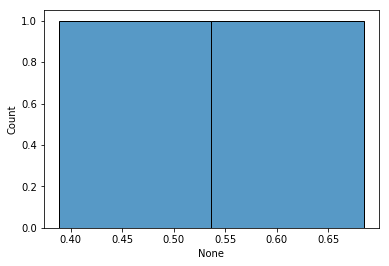

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.5365497076023392
Q15382
['GTP-BINDING PROTEIN RHEB']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 258.79it/s]


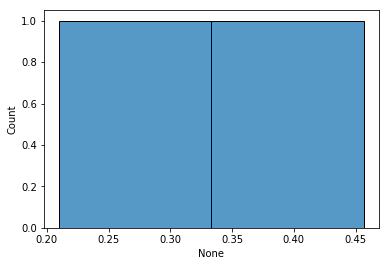

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 259.64it/s]

0.33330288637194005
P27361
['MITOGEN-ACTIVATED PROTEIN KINASE 3']


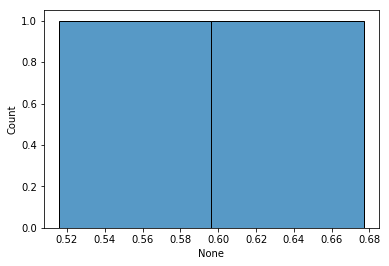

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 267.26it/s]

0.5964233219010289
P63096
['GUANINE NUCLEOTIDE-BINDING PROTEIN G(I), ALPHA-1'
 'GUANINE NUCLEOTIDE-BINDING PROTEIN G(I) SUBUNIT ALPHA-1']


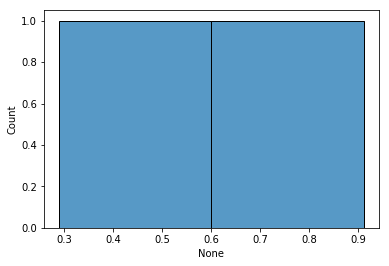

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 209.96it/s]

0.6010450397409479
Q15046
['LYSINE--TRNA LIGASE']


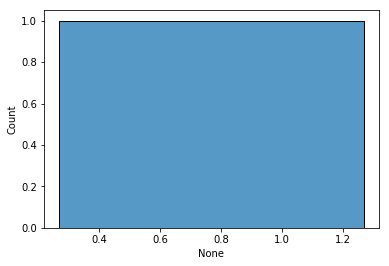

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 219.30it/s]

0.7692307692307693
Q59643
['DELTA-AMINOLEVULINIC ACID DEHYDRATASE']


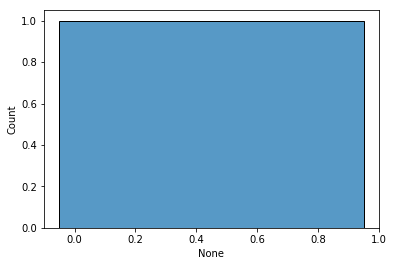

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 224.99it/s]

0.45
P09598
['PHOSPHOLIPASE C']


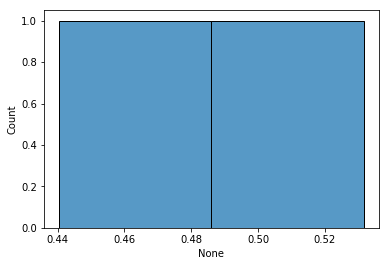

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 232.80it/s]

0.4860608800482218
Q05769
['PROSTAGLANDIN G/H SYNTHASE 2']


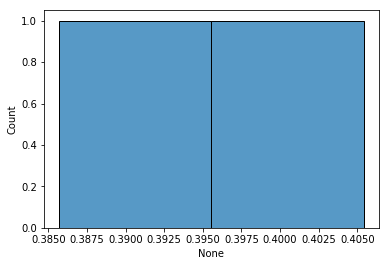

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 276.19it/s]

0.3955598455598456
Q0P9D1
['UDP-N-ACETYLBACILLOSAMINE N-ACETYLTRANSFERASE']


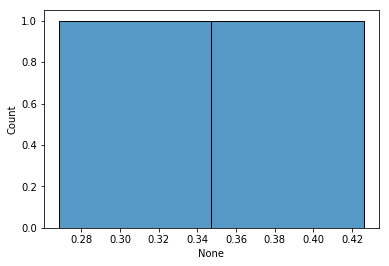

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 221.66it/s]

0.3472913211719182
Q14790
['CASPASE-8']


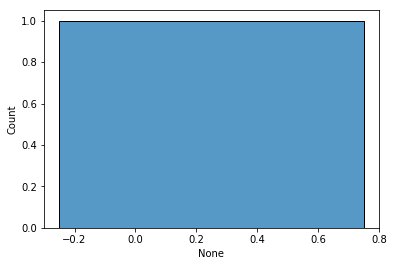

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 318.14it/s]

0.25
P19801
['AMILORIDE-SENSITIVE AMINE OXIDASE']


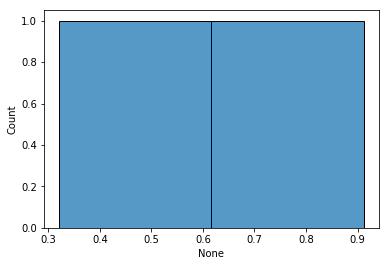

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 188.83it/s]

0.6165966386554622
P19493
['GLUTAMATE RECEPTOR 4']


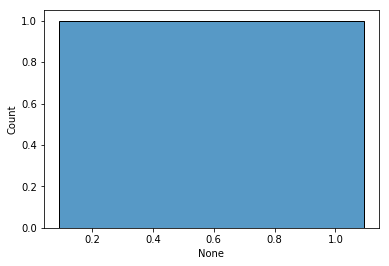

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 227.80it/s]

0.5925925925925926
P0C6E9
['SIALIDASE']


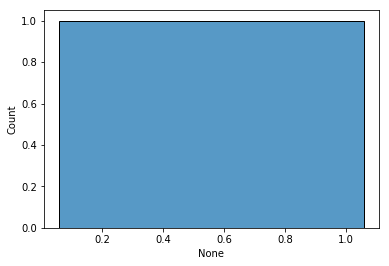

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 269.42it/s]

0.5588235294117647
P25321
['CAMP-DEPENDENT PROTEIN KINASE CATALYTIC SUBUNIT ALPHA']


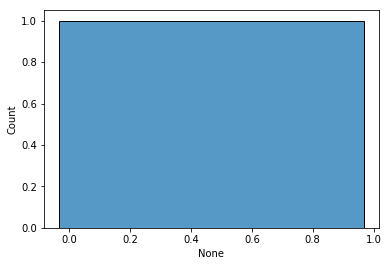

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.4673913043478261
O43293
['DEATH-ASSOCIATED PROTEIN KINASE 3']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 265.89it/s]


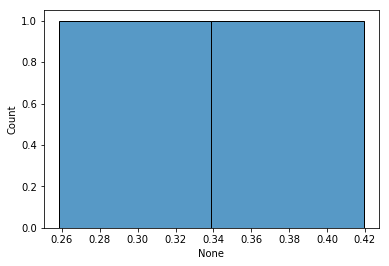

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 328.39it/s]

0.33898776418242493
Q8N543
['2-OXOGLUTARATE AND IRON-DEPENDENT OXYGENASE DOMAIN']


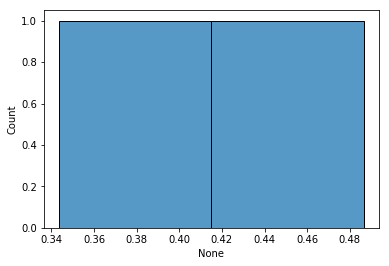

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 250.91it/s]

0.41511824324324326
P03952
['PLASMA KALLIKREIN']


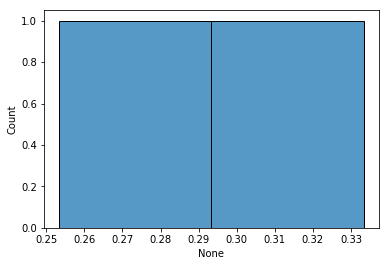

0it [00:00, ?it/s]

0.29337899543379
P66937
['DNA GYRASE SUBUNIT B, DNA GYRASE SUBUNIT A']


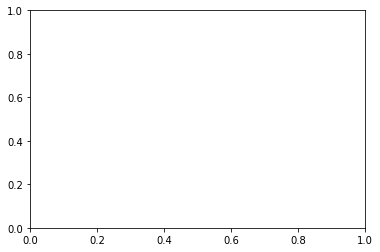

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 253.17it/s]

nan
P49327
['ENOYL-[ACYL-CARRIER-PROTEIN] REDUCTASE' 'FATTY ACID SYNTHASE']


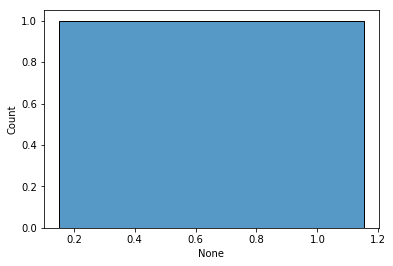

0it [00:00, ?it/s]


0.6521739130434783
Q05823
['2-5A-DEPENDENT RIBONUCLEASE']


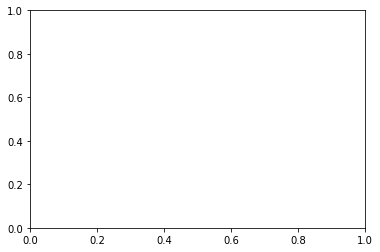

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]

nan
P63104
['14-3-3 PROTEIN ZETA/DELTA']


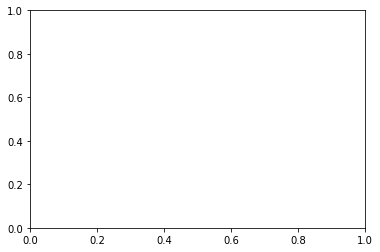

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 217.63it/s]

nan
Q12931
['HEAT SHOCK PROTEIN 75 KDA, MITOCHONDRIAL']


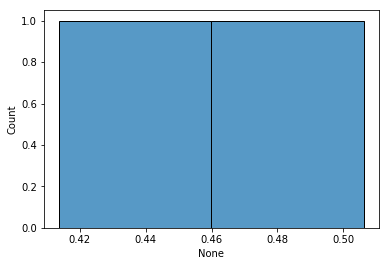

0it [00:00, ?it/s]


0.45998297147722433
P55899
['IGG RECEPTOR FCRN LARGE SUBUNIT P51']


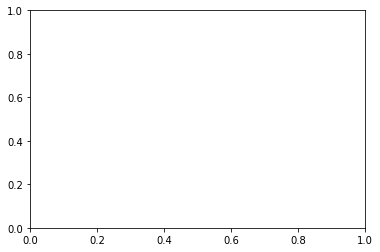

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 263.24it/s]

nan
P51161
['GASTROTROPIN']


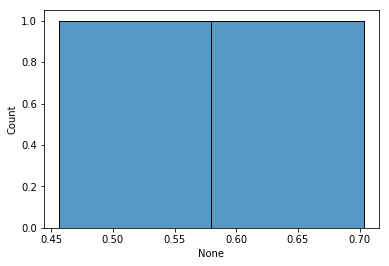

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 209.87it/s]

0.579909221213569
Q93UV0
['SERINE PALMITOYLTRANSFERASE']


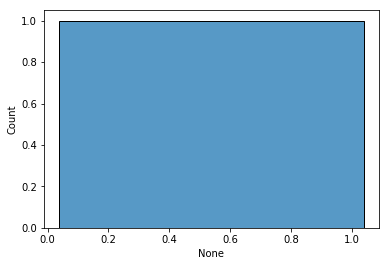

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.5384615384615384
P53396
['ATP-CITRATE SYNTHASE']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 247.50it/s]


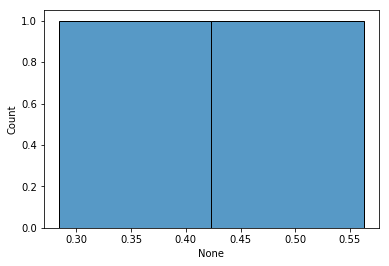

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.42340686274509803
P08311
['CATHEPSIN G']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 244.86it/s]


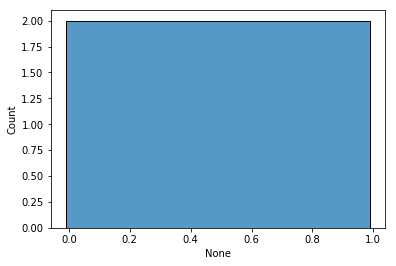

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 209.52it/s]

0.4897959183673469
Q07912
['ACTIVATED CDC42 KINASE 1']


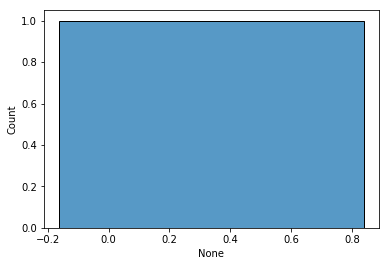

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 208.64it/s]

0.33793103448275863
P56470
['GALECTIN-4']


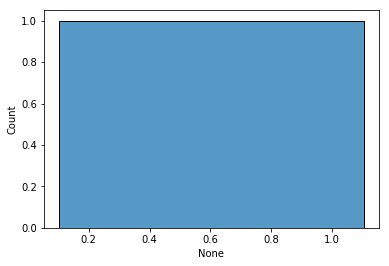

  0%|                                                     | 0/2 [00:00<?, ?it/s]

0.603448275862069
O43613
['HUMAN OX1R FUSION PROTEIN TO P.ABYSII GLYCOGEN SYNTHASE']


100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 200.32it/s]


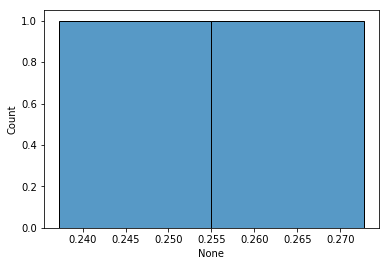

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 219.60it/s]

0.25500770416024654
Q96LI5
['CCR4-NOT TRANSCRIPTION COMPLEX SUBUNIT 6-LIKE']


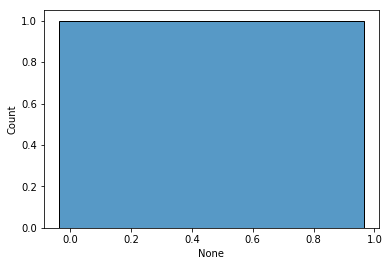

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 241.02it/s]

0.46464646464646464
Q9UBK2
['GLUCOCORTICOID RECEPTOR']


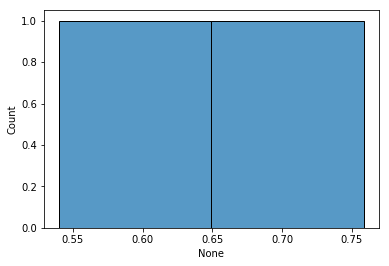

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 179.62it/s]

0.6494252873563218
P01008
['ANTITHROMBIN-III']


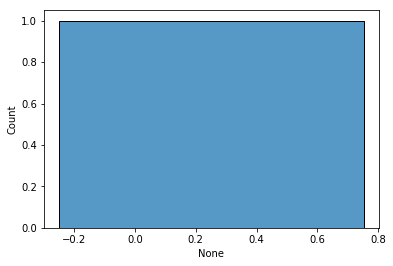

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 248.16it/s]

0.25196850393700787
P97287
['INDUCED MYELOID LEUKEMIA CELL DIFFERENTIATION PROTEIN MCL-1']


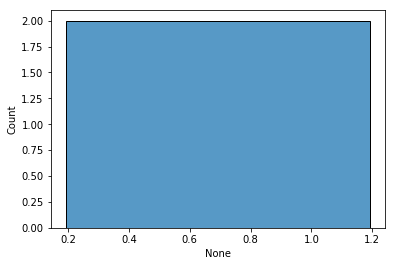

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 224.03it/s]

0.6928571428571428
P00750
['TISSUE PLASMINOGEN ACTIVATOR']


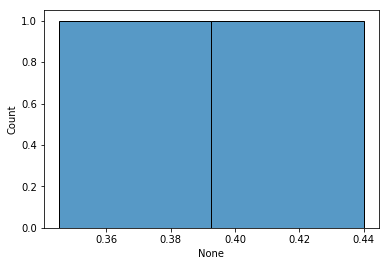

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 183.01it/s]

0.3927272727272727
P61769
['BETA-2-MICROGLOBULIN/T-CELL SURFACE GLYCOPROTEIN CD']


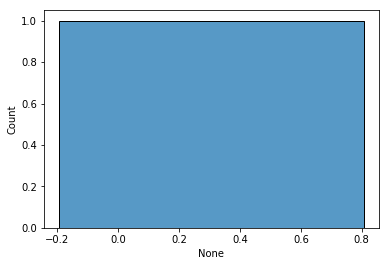

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.3064516129032258
Q8VHN2
['GLUTAMATE [NMDA] RECEPTOR SUBUNIT 3B']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 305.86it/s]


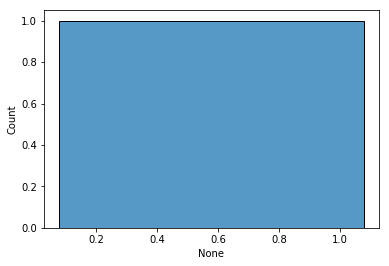

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 301.42it/s]

0.5789473684210527
Q9Y2T3
['GUANINE DEAMINASE']


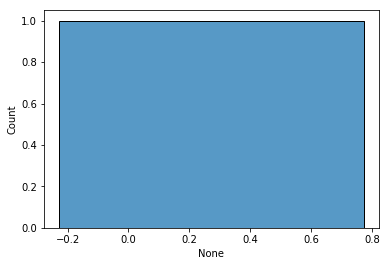

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 249.17it/s]

0.2727272727272727
Q869C3
['ACETYLCHOLINESTERASE']


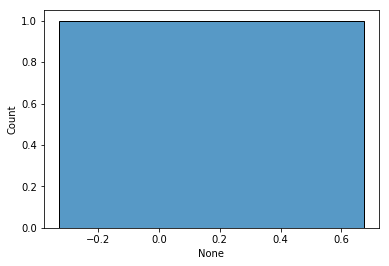

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 282.50it/s]

0.17307692307692307
P0AF12
["5'-METHYLTHIOADENOSINE/S-ADENOSYLHOMOCYSTEINE NUCLEOSIDASE"]


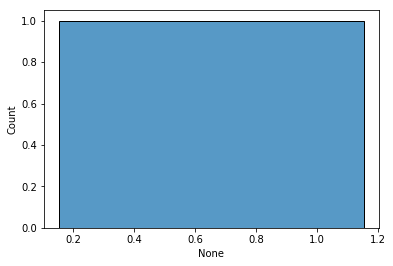

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 295.14it/s]

0.6533333333333333
D3Z7P3
['GLUTAMINASE KIDNEY ISOFORM, MITOCHONDRIAL']


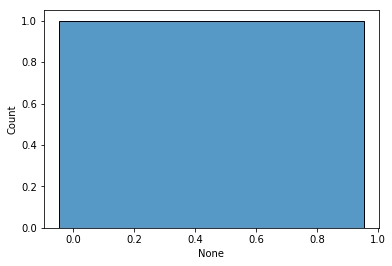

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 265.41it/s]

0.4533333333333333
Q8IVH8
['MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE KINASE 3']


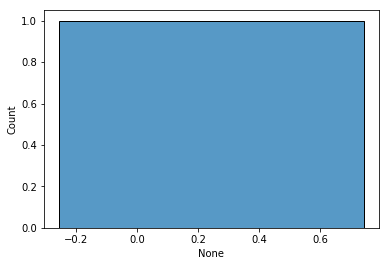

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 275.31it/s]

0.24390243902439024
P39748
['FLAP ENDONUCLEASE 1']


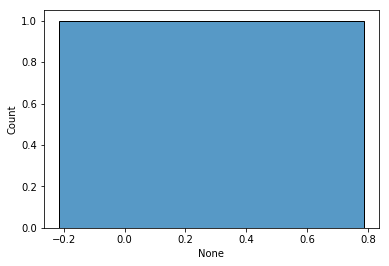

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 326.58it/s]

0.2857142857142857
D1MEN9
['METALLO-BETA-LACTAMASE VIM-2']


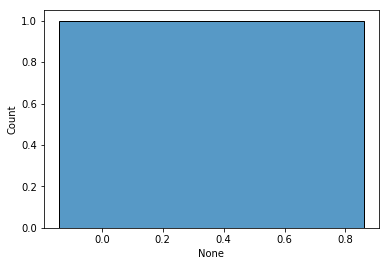

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 232.67it/s]

0.36
P09958
['FURIN']


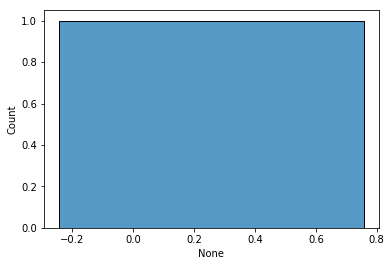

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 295.87it/s]

0.2571428571428571
P21447
['MULTIDRUG RESISTANCE PROTEIN 1A']


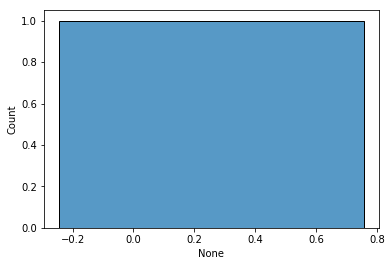

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.2564102564102564
P41597
['CHIMERA PROTEIN OF CC CHEMOKINE RECEPTOR TYPE 2 ISOFORM B']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 227.09it/s]


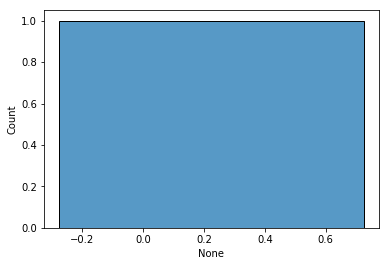

0.22448979591836735
Q13188
['SERINE/THREONINE-PROTEIN KINASE 3']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 228.52it/s]


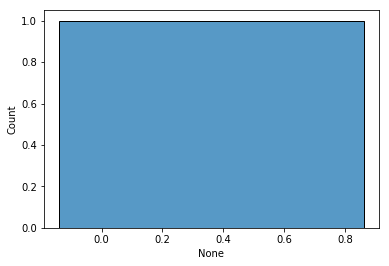

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.3611111111111111
O15382
['BRANCHED-CHAIN-AMINO-ACID AMINOTRANSFERASE, MITOCHONDRIAL']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 227.47it/s]


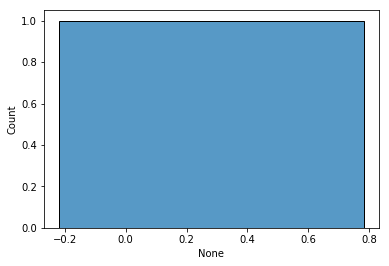

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.28205128205128205
Q9H244
['P2Y PURINOCEPTOR 12, SOLUBLE CYTOCHROME B562']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 240.98it/s]


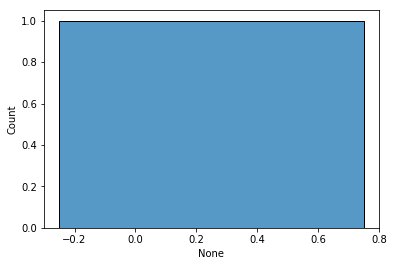

0.25
P27986
['PHOSPHATIDYLINOSITOL 3-KINASE REGULATORY SUBUNIT AL']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 162.26it/s]


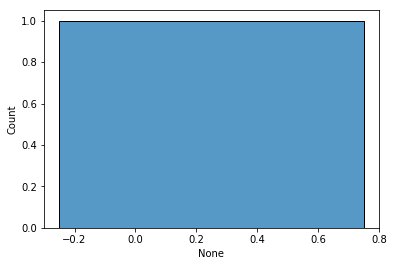

0it [00:00, ?it/s]


0.25
P20035
['HYPOXANTHINE-GUANINE-XANTHINE PHOSPHORIBOSYLTRANSFE']


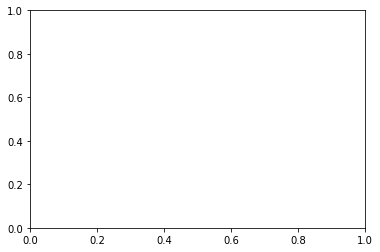

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 241.62it/s]

nan
P12004
['PROLIFERATING CELL NUCLEAR ANTIGEN']


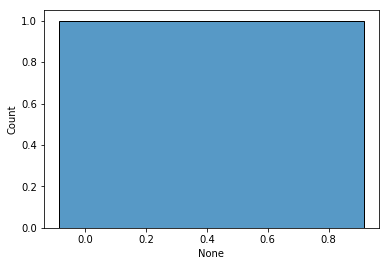

0it [00:00, ?it/s]

0.4153846153846154
Q47066
['BETA-LACTAMASE TOHO-1']


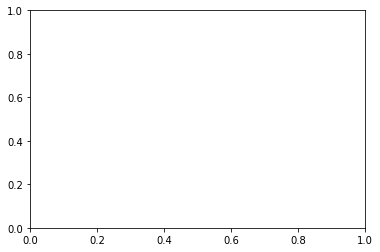

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 225.46it/s]


nan
Q13501
['SEQUESTOSOME-1']


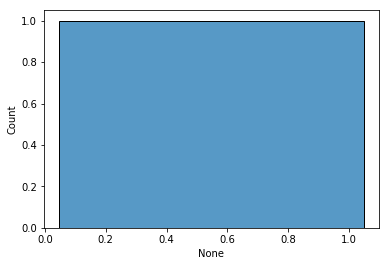

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 203.08it/s]

0.5476190476190477
O00167
['EYES ABSENT HOMOLOG 2']


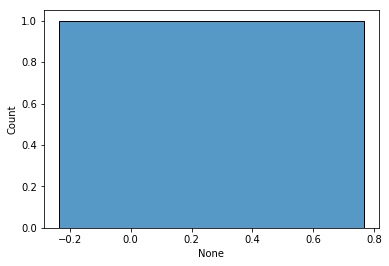

0.2653061224489796
O35543


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 209.10it/s]


['HEMATOPOIETIC PROSTAGLANDIN D SYNTHASE']


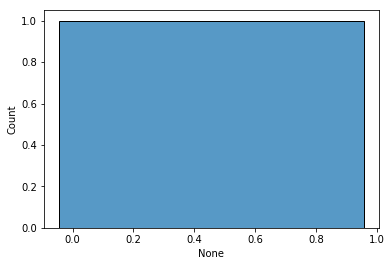

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 235.25it/s]

0.45652173913043476
P04177
['TYROSINE 3-MONOOXYGENASE']


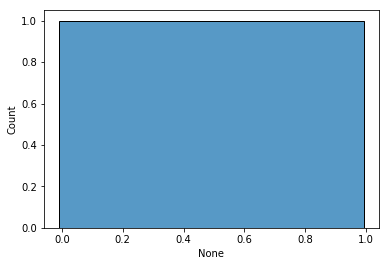

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 262.34it/s]

0.4918032786885246
P00349
['6-PHOSPHOGLUCONATE DEHYDROGENASE (6-PGDH)']


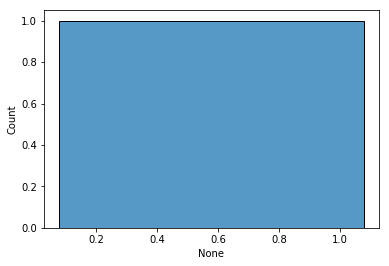

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 197.87it/s]

0.5789473684210527
P48729
['CASEIN KINASE I ISOFORM ALPHA']


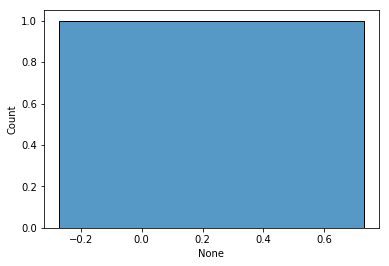

0.22935779816513763
P23921


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 233.21it/s]


['RIBONUCLEOSIDE-DIPHOSPHATE REDUCTASE LARGE SUBUNIT']


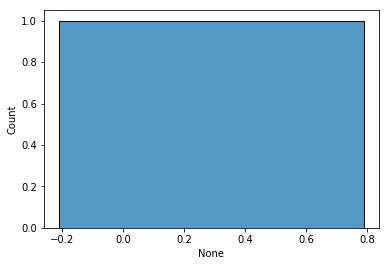

0.2894736842105263
Q13523
['SERINE/THREONINE-PROTEIN KINASE PRP4 HOMOLOG']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 155.29it/s]


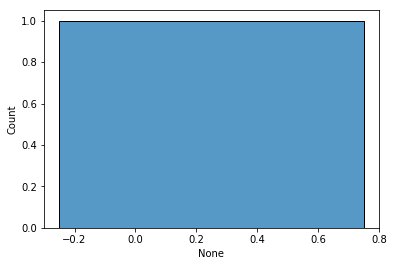

0it [00:00, ?it/s]


0.25
P19440
['GAMMA-GLUTAMYLTRANSPEPTIDASE 1 HEAVY CHAIN']


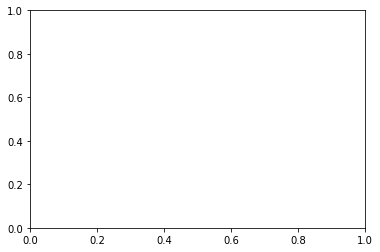

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 195.66it/s]

nan
O95149
['SNURPORTIN-1']


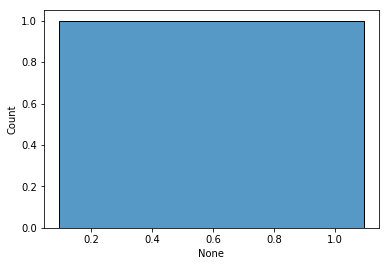

0it [00:00, ?it/s]

0.5948275862068966
O60678
['PROTEIN ARGININE N-METHYLTRANSFERASE 3']


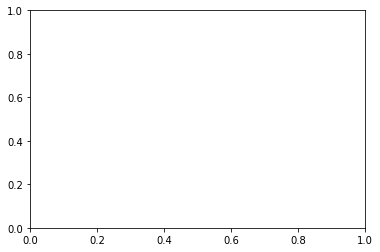

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 187.26it/s]


nan
P12530
['15-LIPOXYGENASE']


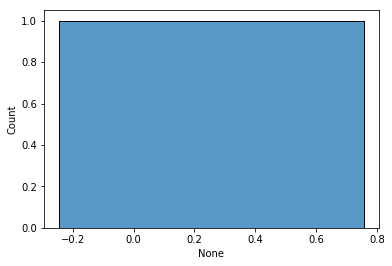

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 172.51it/s]

0.2558139534883721
Q9K578
['METALLO-BETA-LACTAMASE CLASS B3']


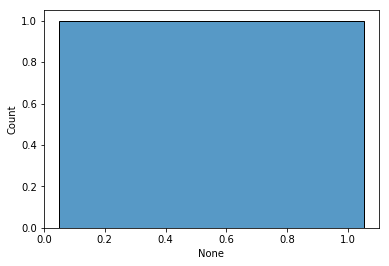

0it [00:00, ?it/s]

0.5510204081632653
P00451
['COAGULATION FACTOR VIII']


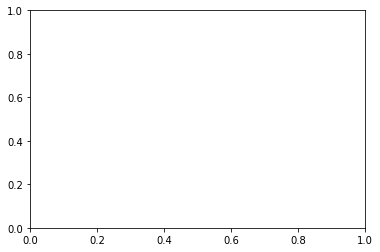

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 215.66it/s]

nan
P11474
['STEROID HORMONE RECEPTOR ERR1']


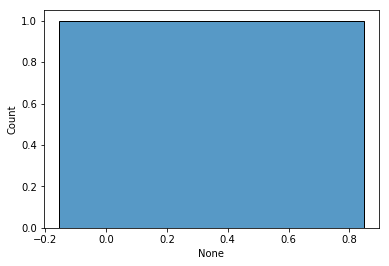

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 239.07it/s]

0.3465346534653465
P07814
['BIFUNCTIONAL GLUTAMATE/PROLINE--TRNA LIGASE']


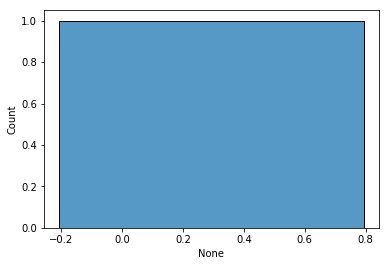

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 174.79it/s]


0.29357798165137616
Q9FV53
['PEPTIDE DEFORMYLASE 1A']


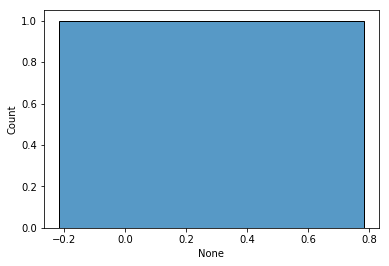

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 240.65it/s]

0.2831858407079646
Q44238
['XAA-PRO DIPEPTIDASE']


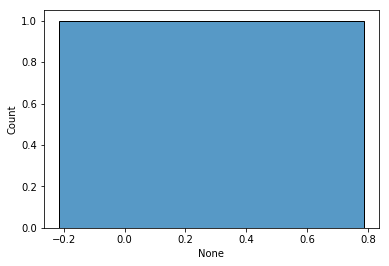

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 168.57it/s]

0.2857142857142857
P24173
['LIPOPOLYSACCHARIDE HEPTOSYLTRANSFERASE 1']


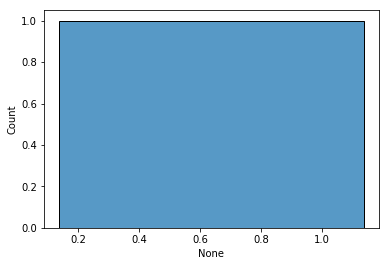

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 191.78it/s]

0.638095238095238
P21730
['C5A ANAPHYLATOXIN CHEMOTACTIC RECEPTOR 1']


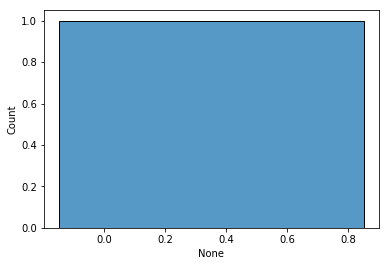

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 230.56it/s]

0.35185185185185186
O43781
['DUAL SPECIFICITY TYROSINE-PHOSPHORYLATION-REGULATED KINASE']


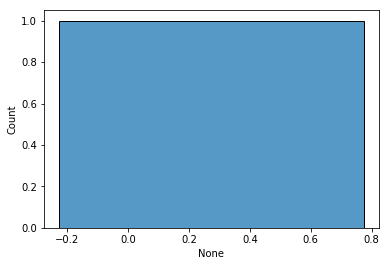

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 206.25it/s]

0.27419354838709675
Q96L34
['MAP/MICROTUBULE AFFINITY-REGULATING KINASE 4']


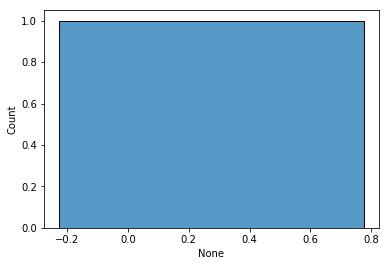

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 203.30it/s]

0.2748091603053435
P27815
["CAMP-SPECIFIC 3',5'-CYCLIC PHOSPHODIESTERASE 4A"]


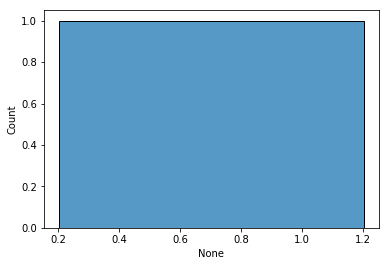

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 228.97it/s]

0.7037037037037037
P47871
['GLUCAGON RECEPTOR,ENDOLYSIN,GLUCAGON RECEPTOR']


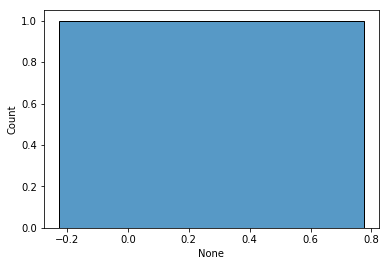

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 228.82it/s]

0.27450980392156865
Q836J0
['GLUTAMATE RACEMASE']


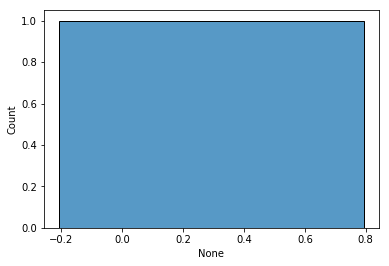

0.2932330827067669
Q96GX5
['SERINE/THREONINE-PROTEIN KINASE GREATWALL,SERINE/THREONINE']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 192.97it/s]


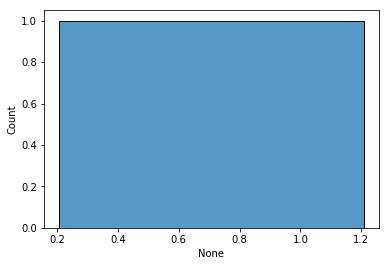

0.7075471698113207
P51141


0it [00:00, ?it/s]


['SEGMENT POLARITY PROTEIN DISHEVELLED HOMOLOG DVL']


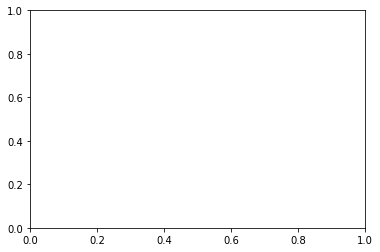

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]

nan
P26885
['PEPTIDYL-PROLYL CIS-TRANS ISOMERASE FKBP2']


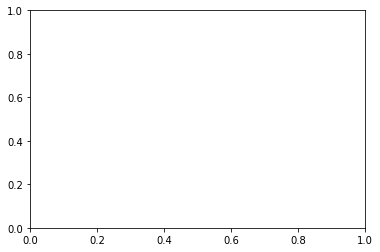

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 199.12it/s]

nan
Q84406
['PROLYL 4-HYDROXYLASE']


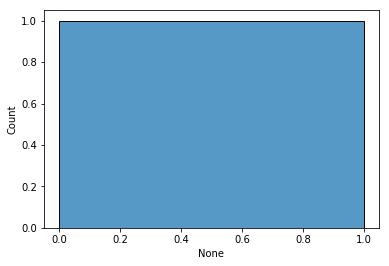

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 215.39it/s]


0.5
O39930
['RNA-DIRECTED RNA POLYMERASE']


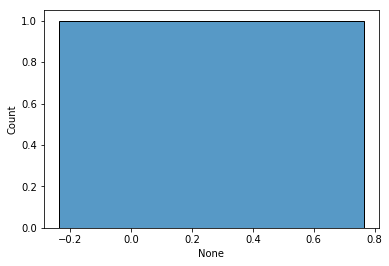

0.2638888888888889
P19623


0it [00:00, ?it/s]


['SPERMIDINE SYNTHASE']


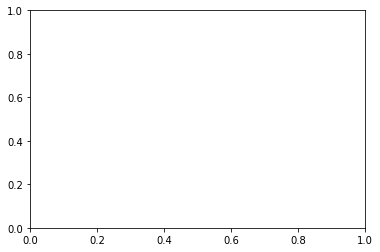

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 235.71it/s]

nan
Q02083
['N-ACYLETHANOLAMINE-HYDROLYZING ACID AMIDASE SUBUNIT ALPHA']


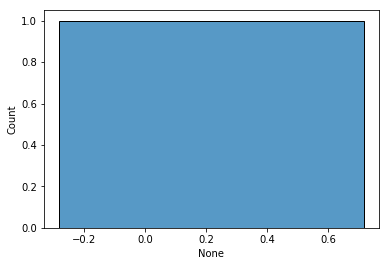

0it [00:00, ?it/s]

0.21739130434782608
P32755
['4-HYDROXYPHENYLPYRUVIC ACID DIOXYGENASE']


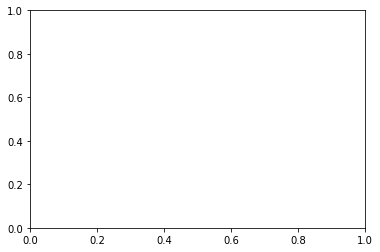

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 213.73it/s]


nan
P13444
['METHIONINE ADENOSYLTRANSFERASE, ALPHA FORM']


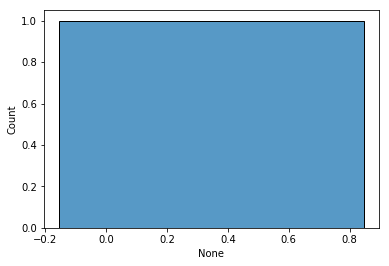

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 296.50it/s]

0.34615384615384615
P00480
['PROTEIN (ORNITHINE TRANSCARBAMOYLASE)']


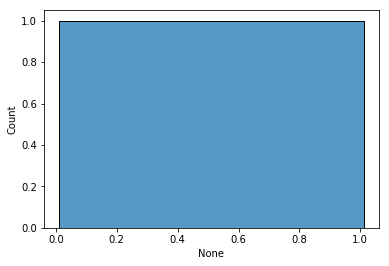

0it [00:00, ?it/s]


0.5111111111111111
P62330
['ADP-RIBOSYLATION FACTOR 6']


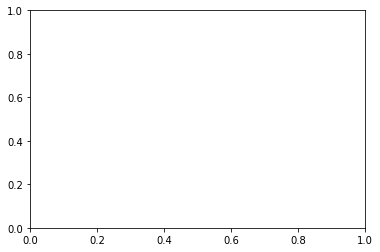

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 273.26it/s]

nan
P56218
['METHIONINE AMINOPEPTIDASE']


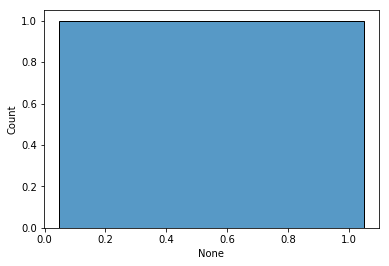

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.5483870967741935
P20292
['ARACHIDONATE 5-LIPOXYGENASE-ACTIVATING PROTEIN']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 286.09it/s]


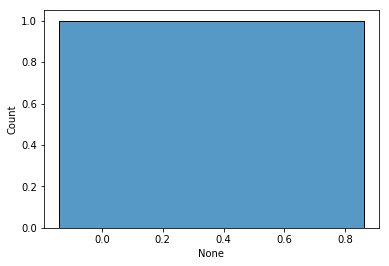

0.36036036036036034
Q9NPD8
['UBIQUITIN-CONJUGATING ENZYME E2 T']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 318.76it/s]


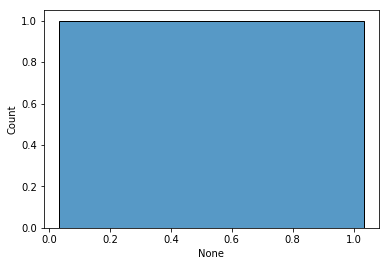

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 219.22it/s]

0.5333333333333333
O32449
['PROLINE IMINOPEPTIDASE']


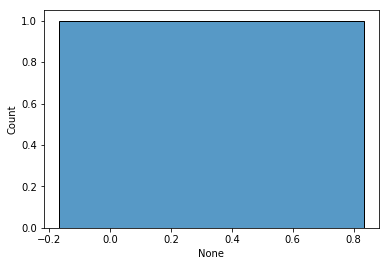

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 185.31it/s]

0.3333333333333333
Q6G7I0
['PANTOTHENATE KINASE']


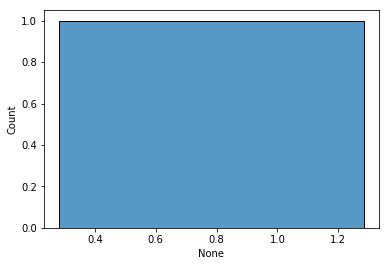

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 198.30it/s]

0.7831325301204819
P0A017
['DIHYDROFOLATE REDUCTASE']


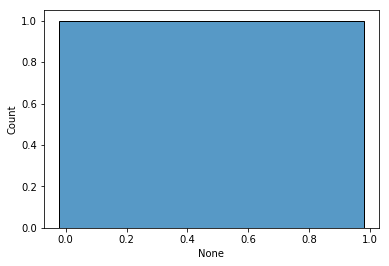

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 195.12it/s]

0.4788732394366197
O54050
['XANTHINE DEHYDROGENASE']


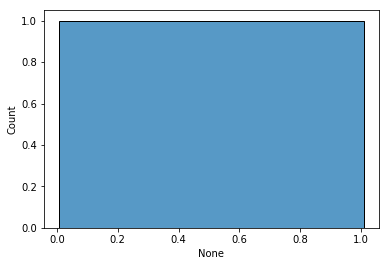

0it [00:00, ?it/s]


0.5081967213114754
Q13541
['EUKARYOTIC TRANSLATION INITIATION 4E']


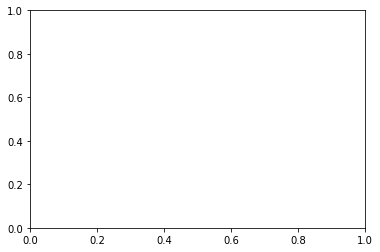

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 213.23it/s]

nan
Q13002
['GLUTAMATE RECEPTOR, IONOTROPIC KAINATE 2']


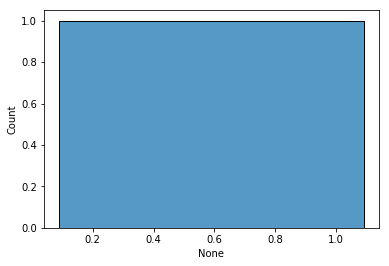

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 245.11it/s]

0.5901639344262295
P0A6L2
['DIHYDRODIPICOLINATE SYNTHASE']


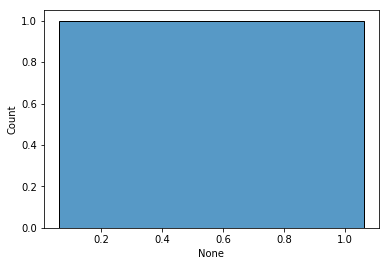

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 290.18it/s]


0.5625
P10827
['THYROID HORMONE RECEPTOR ALPHA']


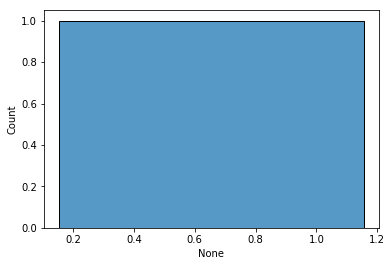

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 221.48it/s]

0.6551724137931034
P13864
['DNA (CYTOSINE-5)-METHYLTRANSFERASE 1']


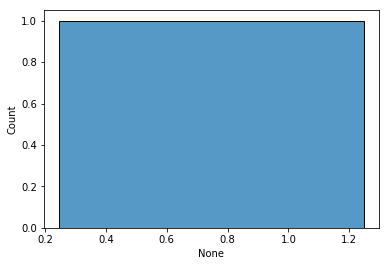

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 218.88it/s]

0.7469879518072289
P30838
['ALDEHYDE DEHYDROGENASE']


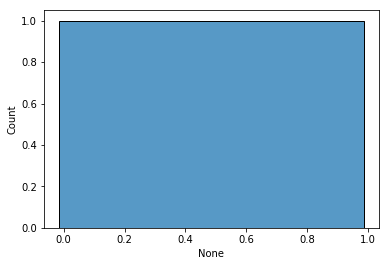

0.4857142857142857
P24723
['PROTEIN KINASE C ETA TYPE']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 223.88it/s]


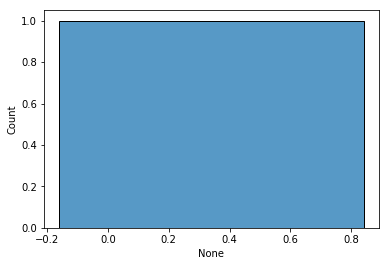

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.3404255319148936
P04015
['HPV11 REGULATORY PROTEIN E2']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 218.52it/s]


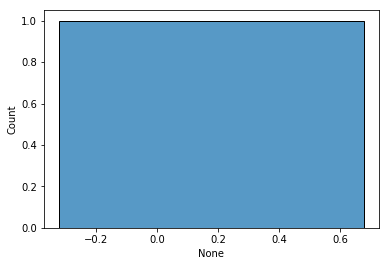

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 272.94it/s]

0.17796610169491525
Q8BTI9
['PHOSPHATIDYLINOSITOL-4,5-BISPHOSPHATE 3-KINASE CATA']


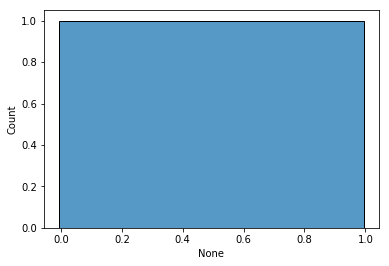

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 241.75it/s]

0.4945054945054945
P27540
['ARYL HYDROCARBON RECEPTOR NUCLEAR TRANSLOCATOR']


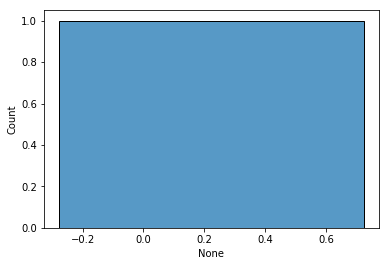

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 202.47it/s]

0.22340425531914893
P53671
['LIM DOMAIN KINASE 2']


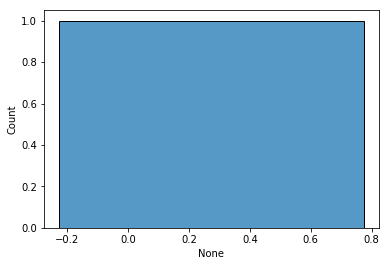

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 197.37it/s]

0.2736842105263158
P05771
['PROTEIN KINASE C-BETA II']


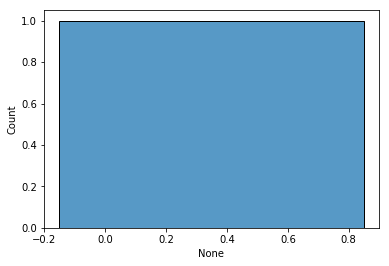

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.3490566037735849
P30530
['TYROSINE-PROTEIN KINASE RECEPTOR UFO']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 194.78it/s]


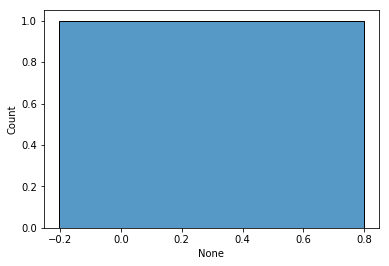

0.29770992366412213
P40347
['TYROSINE PHOSPHATASE']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 209.25it/s]


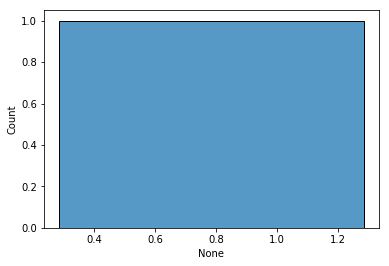

0.7857142857142857
P53041


0it [00:00, ?it/s]


['SERINE/THREONINE-PROTEIN PHOSPHATASE 5']


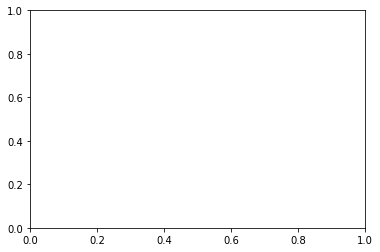

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 153.29it/s]

nan
Q15759
['MITOGEN-ACTIVATED PROTEIN KINASE 11']


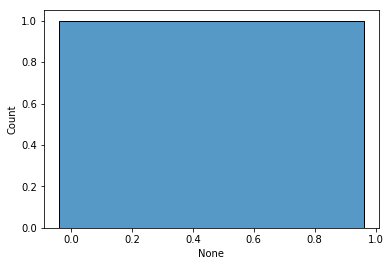

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 201.47it/s]

0.4609375
P51512
['MATRIX METALLOPROTEINASE-16']


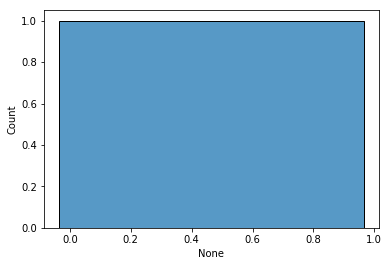

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 172.62it/s]

0.46511627906976744
Q9Y259
['CHOLINE/ETHANOLAMINE KINASE']


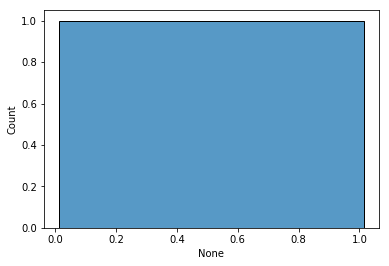

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 173.77it/s]

0.5138888888888888
P16469
['ARACHIDONATE 12-LIPOXYGENASE, 12S-TYPE']


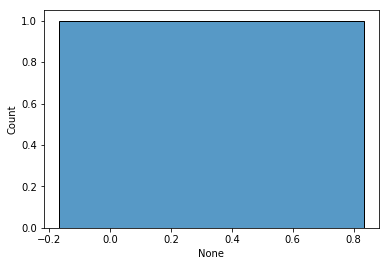

0it [00:00, ?it/s]

0.3333333333333333
P60842
['EUKARYOTIC INITIATION FACTOR 4A-I']


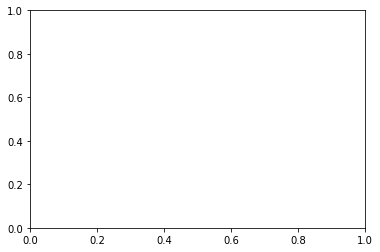

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 187.40it/s]

nan
P02692
['LIVER FATTY ACID BINDING PROTEIN']


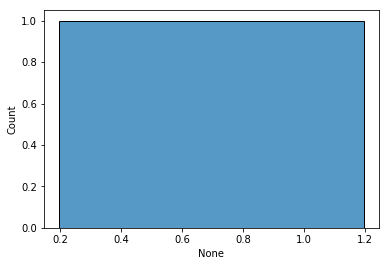

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 258.25it/s]

0.696969696969697
P60484
['PHOSPHOINOSITIDE PHOSPHOTASE PTEN']


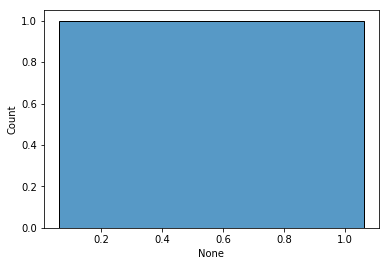

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 236.10it/s]


0.5625
Q9UL51
['POTASSIUM/SODIUM HYPERPOLARIZATION-ACTIVATED CYCLIC']


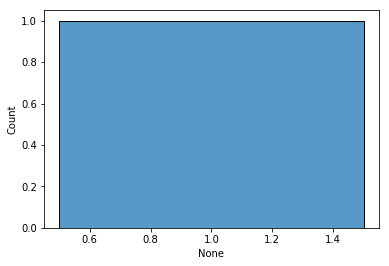

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 212.94it/s]

1.0
P14625
['ENDOPLASMIN']


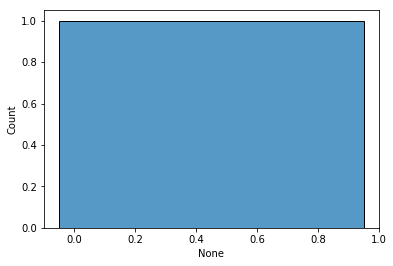

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 218.91it/s]

0.45054945054945056
O95363
['PHENYLALANYL-TRNA SYNTHETASE, MITOCHONDRIAL']


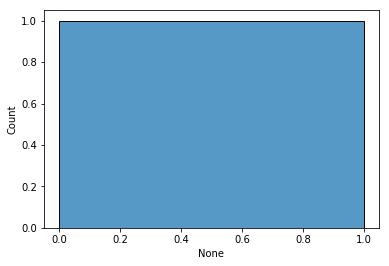

0it [00:00, ?it/s]

0.5
P16581
['E-SELECTIN']


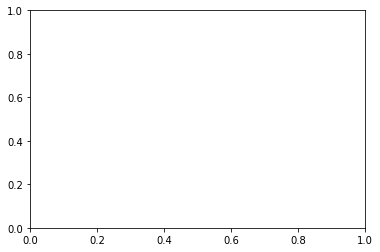

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 197.55it/s]

nan
O95050
['INDOLETHYLAMINE N-METHYLTRANSFERASE']


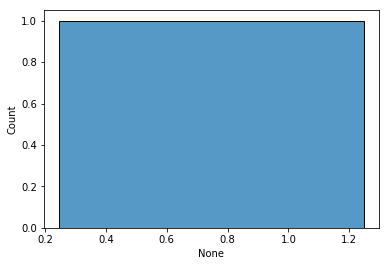

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 270.86it/s]

0.7469879518072289
P43249
['G PROTEIN-COUPLED RECEPTOR KINASE 5']


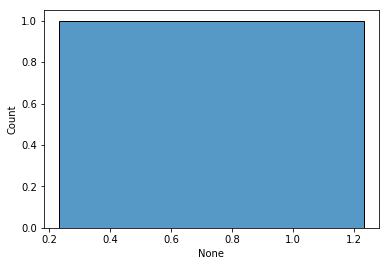

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 238.10it/s]


0.7333333333333333
Q07806
['PENICILLIN-BINDING PROTEIN 1A']


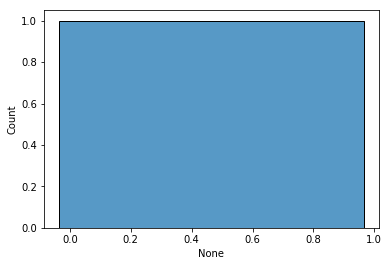

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 215.50it/s]

0.46511627906976744
Q53GL7
['POLY [ADP-RIBOSE] POLYMERASE 10']


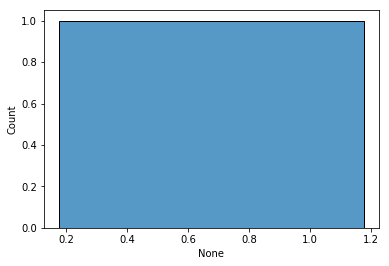

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 235.73it/s]

0.6774193548387096
P29965
['CD40 LIGAND']


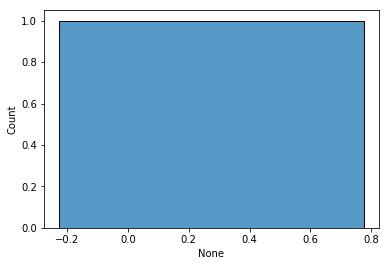

0it [00:00, ?it/s]

0.275
P16098
['BETA-AMYLASE']


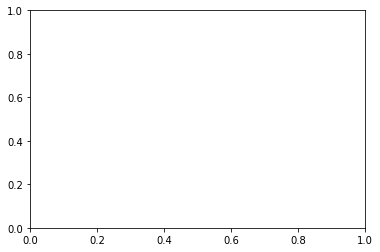

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]

nan
P9WQN9
['DIACYLGLYCEROL ACYLTRANSFERASE/MYCOLYLTRANSFERASE AG85C']


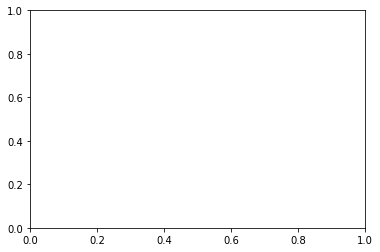

0it [00:00, ?it/s]

nan
P0AD65
['PEPTIDOGLYCAN D,D-TRANSPEPTIDASE MRDA']


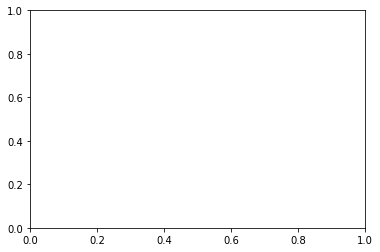

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 223.55it/s]


nan
Q15393
['SPLICING FACTOR 3B SUBUNIT 3']


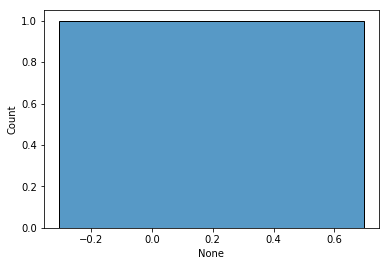

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 206.79it/s]

0.1958041958041958
P41180
['EXTRACELLULAR CALCIUM-SENSING RECEPTOR']


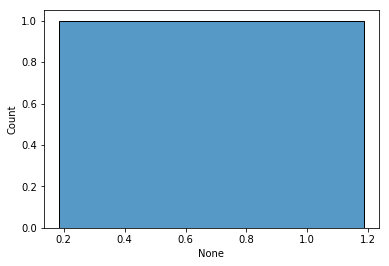

0it [00:00, ?it/s]

0.6851851851851852
P0AEB2
['D-ALANYL-D-ALANINE CARBOXYPEPTIDASE DACA']


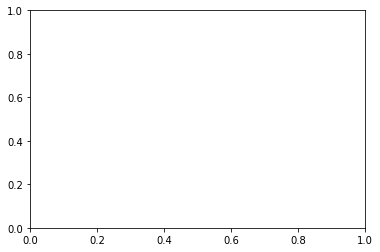

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 214.81it/s]

nan
Q6IQ20
['N-ACYL-PHOSPHATIDYLETHANOLAMINE-HYDROLYZING PHOSPHO']


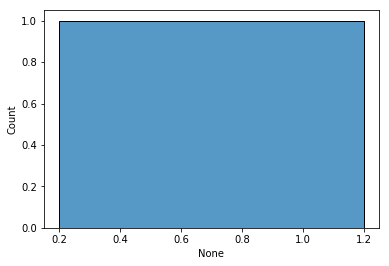

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 234.52it/s]

0.7
P9WI81
['SERINE/THREONINE-PROTEIN KINASE PKNB']


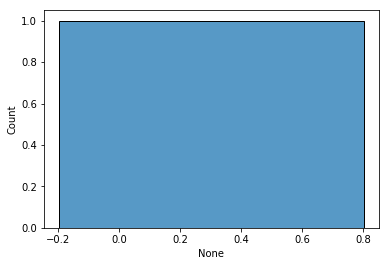

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 234.38it/s]


0.30275229357798167
P15145
['AMINOPEPTIDASE N']


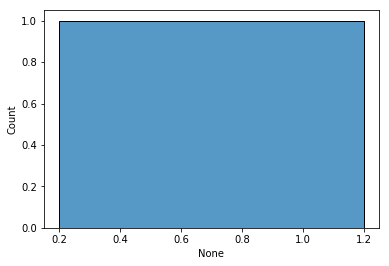

0it [00:00, ?it/s]


0.7
P04273
['MAJOR PRION PROTEIN']


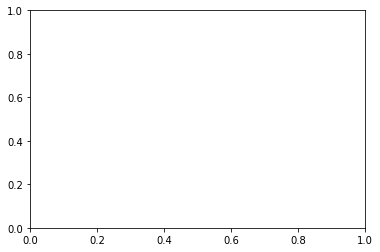

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 219.28it/s]

nan
Q96KS0
['EGL NINE HOMOLOG 2']


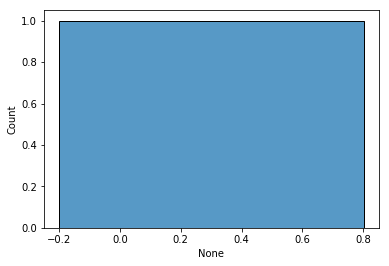

0it [00:00, ?it/s]

0.30120481927710846
P28161
['GLUTATHIONE S-TRANSFERASE MU 2']


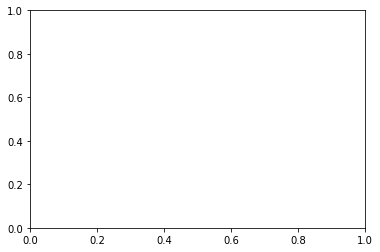

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 195.84it/s]


nan
P00808
['BETA-LACTAMASE']


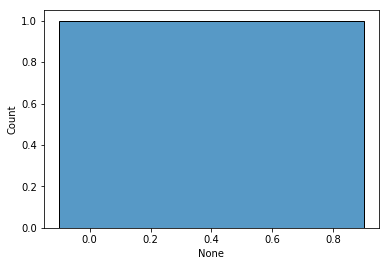

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 207.92it/s]

0.4
P54830
['TYROSINE-PROTEIN PHOSPHATASE NON-RECEPTOR TYPE 5']


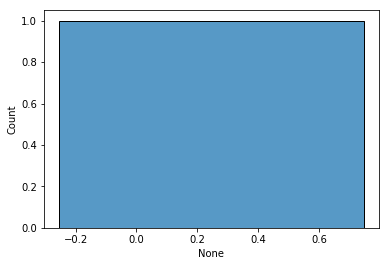

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 193.99it/s]

0.2465753424657534
P21554
['CANNABINOID RECEPTOR 1,GLGA GLYCOGEN SYNTHASE,CANNABINOID']


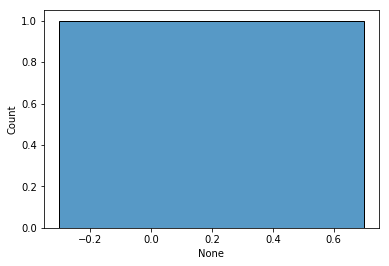

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 205.56it/s]

0.1984126984126984
Q00959
['N-METHYL-D-ASPARTATE RECEPTOR NMDAR2A SUBUNIT']


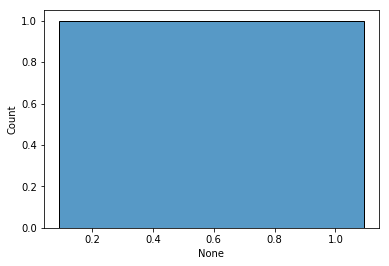

0it [00:00, ?it/s]

0.5925925925925926
P22392
['NUCLEOSIDE DIPHOSPHATE KINASE B']


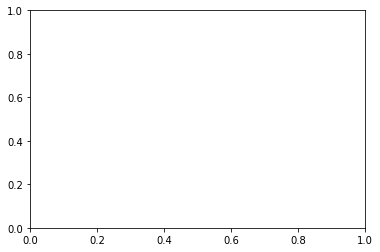

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|                                                     | 0/1 [00:00<?, ?it/s]

nan
Q6S996
['CLASS I PHOSPHODIESTERASE PDEB1']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 147.94it/s]


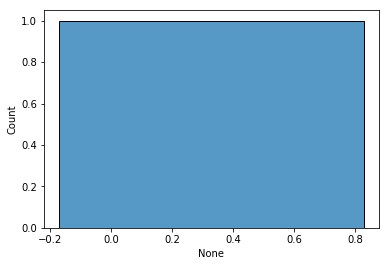

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.3291139240506329
P19120
['HEAT-SHOCK COGNATE 70 KDA PROTEIN']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.30it/s]


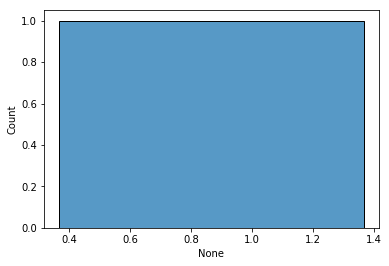

0it [00:00, ?it/s]

0.8666666666666667
P05696
['PROTEIN KINASE C ALPHA TYPE']


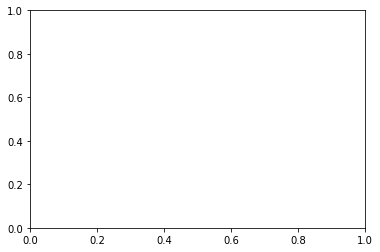

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 167.45it/s]

nan
O15648
['ATP-DEPENDENT 6-PHOSPHOFRUCTOKINASE']


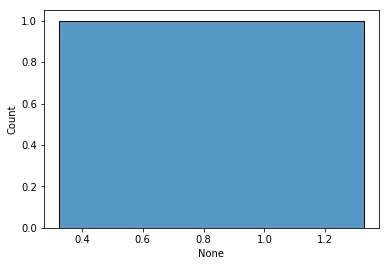

0it [00:00, ?it/s]

0.8260869565217391
P13612
['INTEGRIN ALPHA-4']


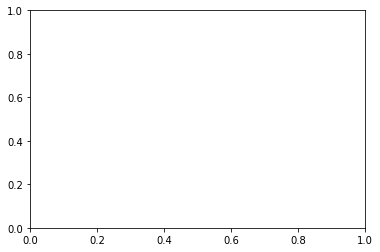

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 221.72it/s]


nan
P34972
['G PROTEIN COUPLED RECEPTOR,T4 LYSOZYME,G PROTEIN COUPLED']


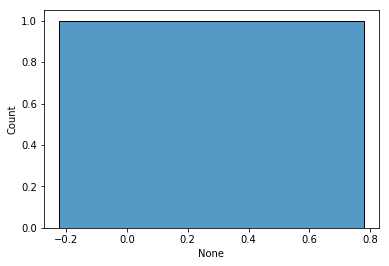

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 170.11it/s]

0.27835051546391754
P0AEY8
['MULTIDRUG TRANSPORTER MDFA']


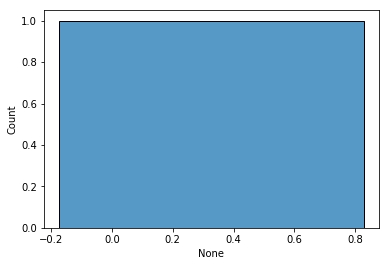

0it [00:00, ?it/s]


0.32727272727272727
P68826
['PEPTIDE DEFORMYLASE']


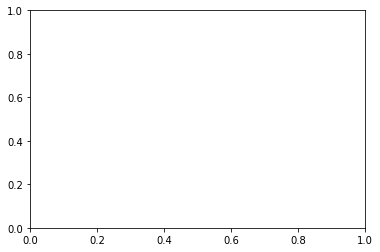

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 201.13it/s]

nan
P04271
['PROTEIN S100-B']


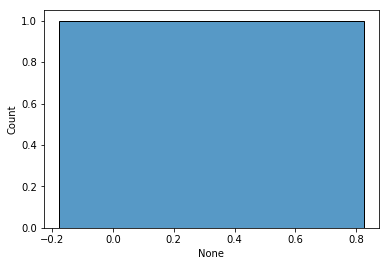

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 217.95it/s]

0.323943661971831
P0A749
['UDP-N-ACETYLGLUCOSAMINE 1']


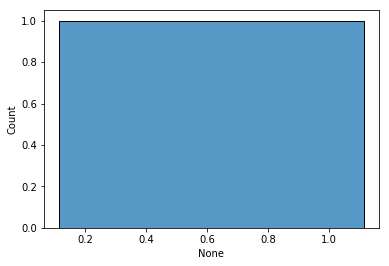

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 231.18it/s]


0.6140350877192983
O53580
['LONG-CHAIN-FATTY-ACID--AMP LIGASE FADD32']


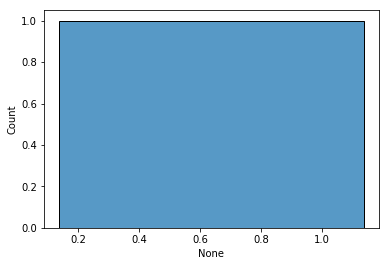

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 183.58it/s]

0.6379310344827587
Q13564
['NEDD8-ACTIVATING ENZYME E1 REGULATORY SUBUNIT']


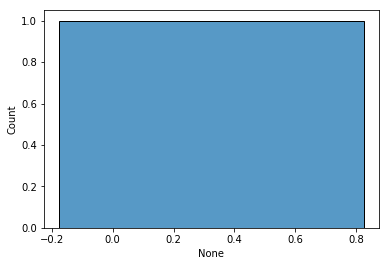

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 142.39it/s]

0.32456140350877194
P54577
['TYROSINE--TRNA LIGASE, CYTOPLASMIC']


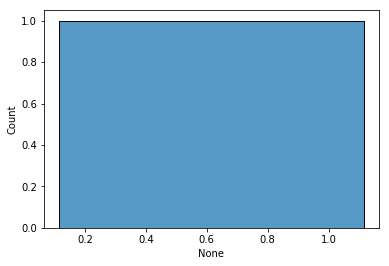

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 226.10it/s]

0.6153846153846154
Q9Y5A9
['YTH DOMAIN-CONTAINING FAMILY PROTEIN 2']


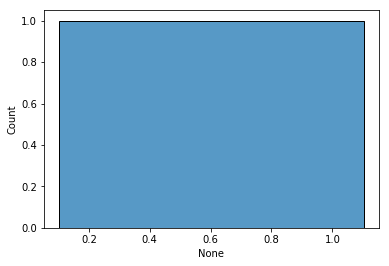

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 237.66it/s]

0.6029411764705882
Q86U44
['METTL3']


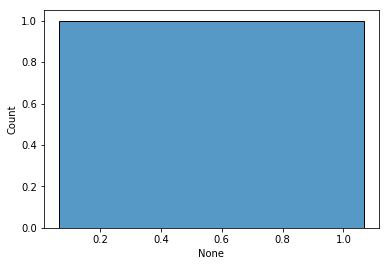

0.5662650602409639
P9WID5
['ADENOSINE KINASE']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 238.14it/s]


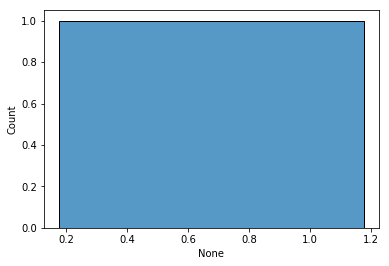

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 252.20it/s]

0.676923076923077
P11926
['ORNITHINE DECARBOXYLASE']


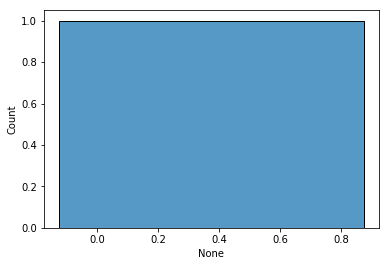

0it [00:00, ?it/s]

0.375
Q82134
['HTLV-1 PROTEASE']


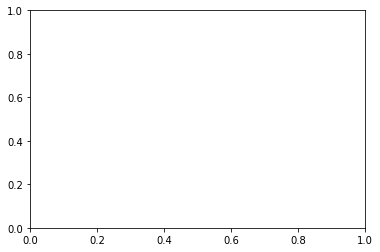

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]

nan
P36888
['RECEPTOR-TYPE TYROSINE-PROTEIN KINASE FLT3']


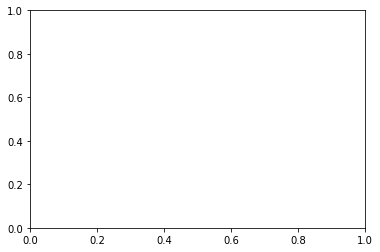

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 258.06it/s]

nan
Q96SB4
['SRSF PROTEIN KINASE 1,SRSF PROTEIN KINASE 1']


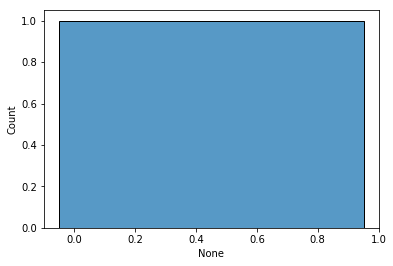

0it [00:00, ?it/s]


0.45098039215686275
P25787
['PROTEASOME SUBUNIT ALPHA TYPE-2']


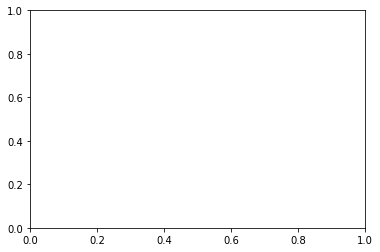

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 212.66it/s]

nan
O15054
['LYSINE-SPECIFIC DEMETHYLASE 6B']


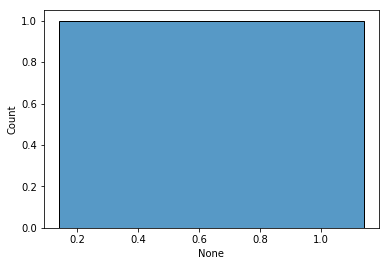

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 215.97it/s]

0.6404494382022472
Q27546
['INOSINE-URIDINE NUCLEOSIDE N-RIBOHYDROLASE']


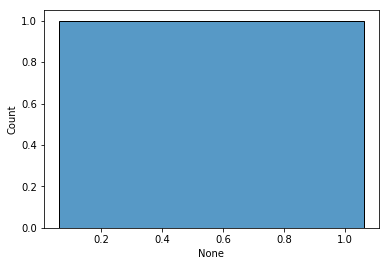

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.5625
Q9WYW0
['NAD-DEPENDENT DEACETYLASE']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 201.94it/s]


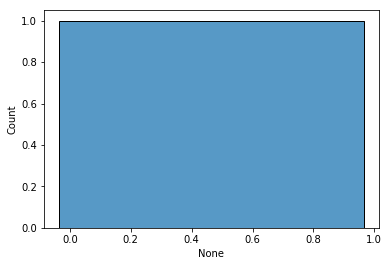

0.46511627906976744
Q9L5C7
['BETA-LACTAMASE CTX-M-9']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 187.91it/s]


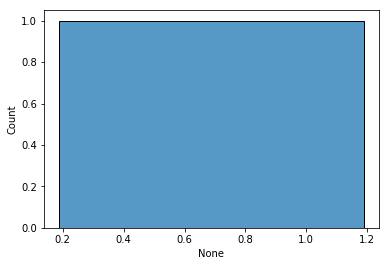

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 234.03it/s]


0.6885245901639344
P29320
['EPH RECEPTOR A3']


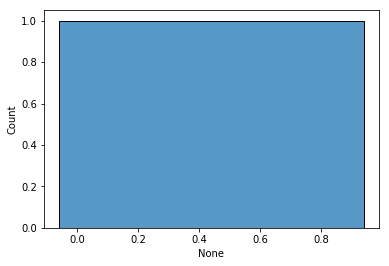

0.44086021505376344
P09616
['ALPHA-HEMOLYSIN']


0it [00:00, ?it/s]


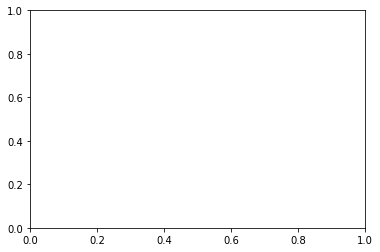

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 261.08it/s]

nan
P30418
['MYRISTOYL-COA:PROTEIN N-MYRISTOYLTRANSFERASE']


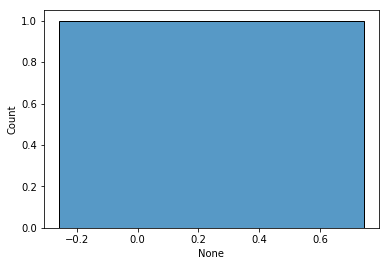

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 267.99it/s]

0.24271844660194175
Q9JLS3
['SERINE/THREONINE-PROTEIN KINASE TAO2']


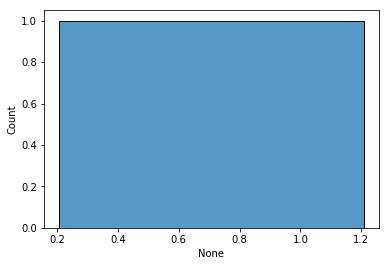

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 238.53it/s]


0.7075471698113207
Q9BXF3
['CAT EYE SYNDROME CRITICAL REGION PROTEIN 2']


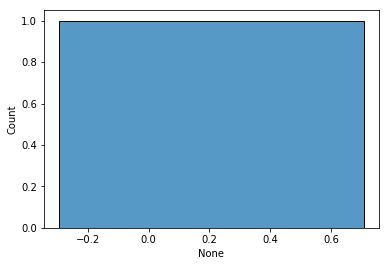

0it [00:00, ?it/s]

0.20689655172413793
O95140
['MITOFUSIN-2,CDNA FLJ57997, HIGHLY SIMILAR TO TRANSMEMBRANE']


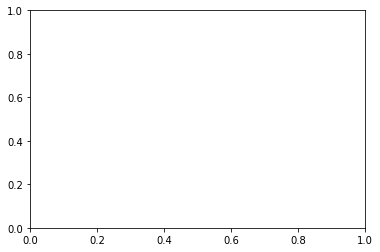

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 249.60it/s]

nan
P60174
['TRIOSEPHOSPHATE ISOMERASE']


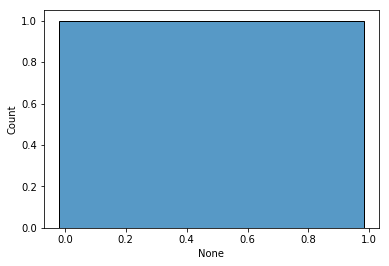

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 186.31it/s]

0.48148148148148145
P0A9J4
['2-DEHYDROPANTOATE 2-REDUCTASE']


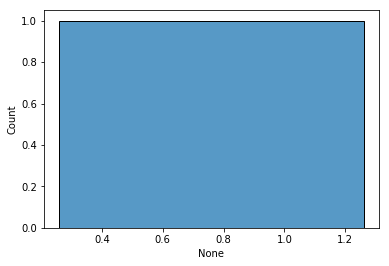

0.7604166666666666
P42892
['ENDOTHELIN-CONVERTING ENZYME 1']


0it [00:00, ?it/s]


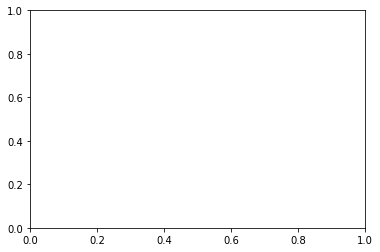

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 191.34it/s]

nan
Q15661
['TRYPTASE ALPHA/BETA-1']


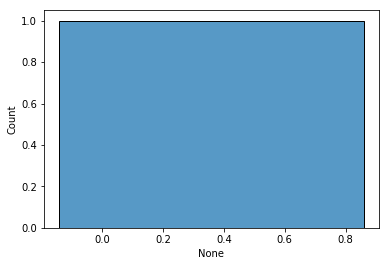

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 251.97it/s]

0.35964912280701755
Q9NNX6
['CD209 ANTIGEN']


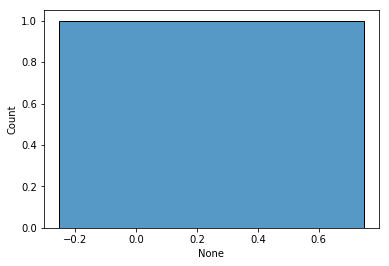

0it [00:00, ?it/s]


0.24778761061946902
O60882
['MATRIX METALLOPROTEINASE-20']


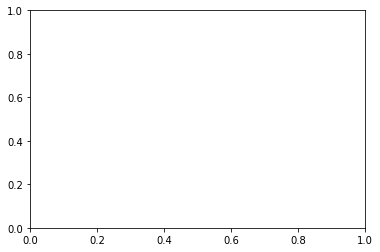

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 213.94it/s]

nan
O15075
['SERINE/THREONINE-PROTEIN KINASE DCLK1']


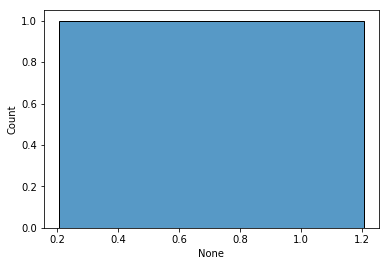

0it [00:00, ?it/s]

0.7064220183486238
P25116
['PROTEINASE-ACTIVATED RECEPTOR 1, LYSOZYME']


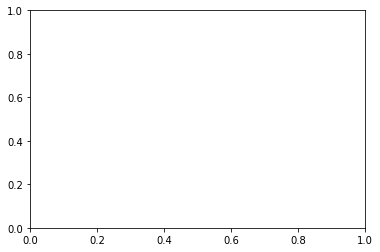

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 191.34it/s]


nan
P16278
['BETA-GALACTOSIDASE']


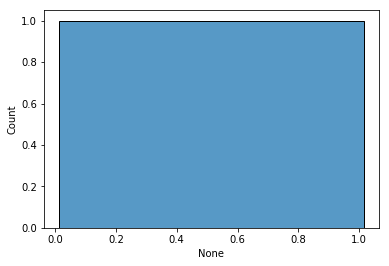

0it [00:00, ?it/s]

0.5142857142857142
P05100
['DNA-3-METHYLADENINE GLYCOSYLASE I']


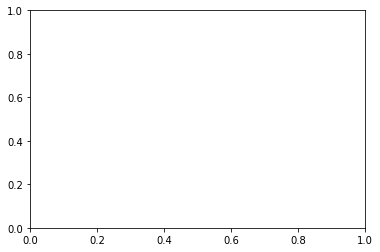

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 164.76it/s]


nan
P34998
['CORTICOTROPIN-RELEASING FACTOR RECEPTOR 1']


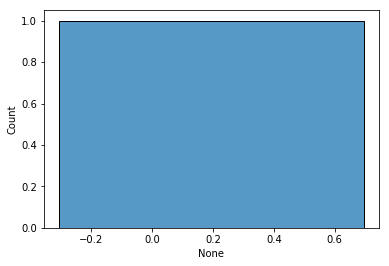

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 214.01it/s]

0.1951219512195122
P43250
['G PROTEIN-COUPLED RECEPTOR KINASE 6']


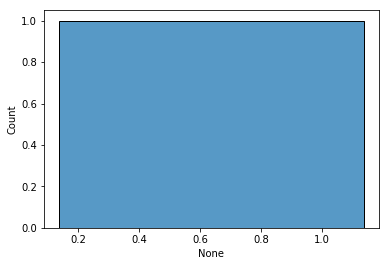

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.6376811594202898
O95551
['TYROSYL-DNA PHOSPHODIESTERASE 2']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 201.40it/s]


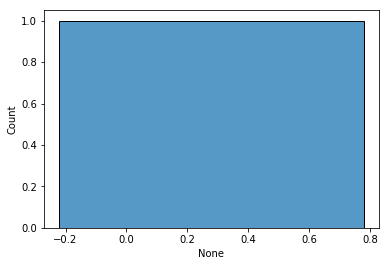

0.27956989247311825
O95372
['ACYL-PROTEIN THIOESTERASE 2']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 203.66it/s]


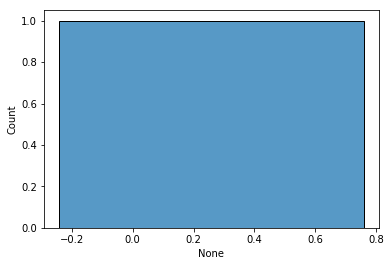

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 236.81it/s]

0.25892857142857145
P34884
['MACROPHAGE MIGRATION INHIBITORY FACTOR']


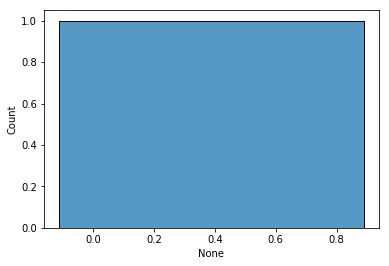

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 216.32it/s]

0.3888888888888889
P0AGL2
['PROTEIN TDCF']


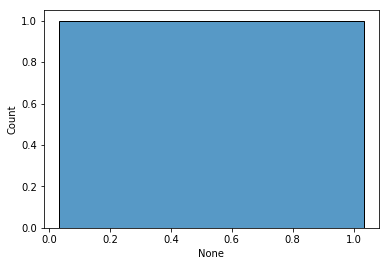

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 238.73it/s]

0.5333333333333333
P10688
['PHOSPHOLIPASE C DELTA-1']


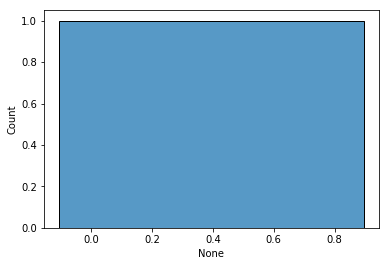

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 181.19it/s]

0.3953488372093023
Q6PFX9
['TANKYRASE-1']


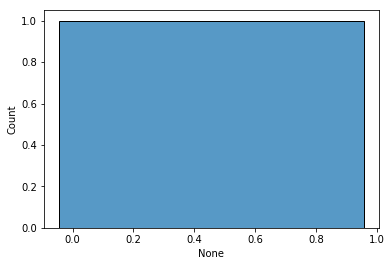

0it [00:00, ?it/s]

0.4563106796116505
Q13510
['ACID CERAMIDASE SUBUNIT ALPHA']


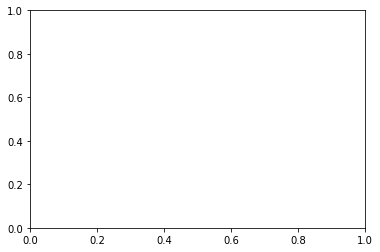

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 173.93it/s]

nan
Q16873
['LEUKOTRIENE C4 SYNTHASE']


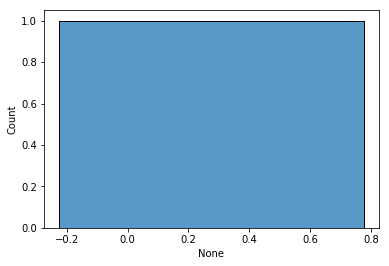

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 239.54it/s]

0.2755102040816326
Q07075
['GLUTAMYL AMINOPEPTIDASE']


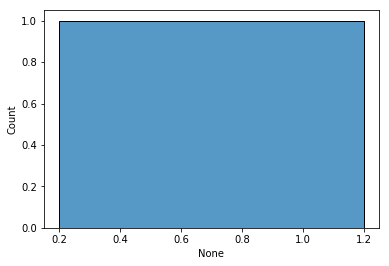

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 170.97it/s]

0.7
Q9HBH1
['PEPTIDE DEFORMYLASE']


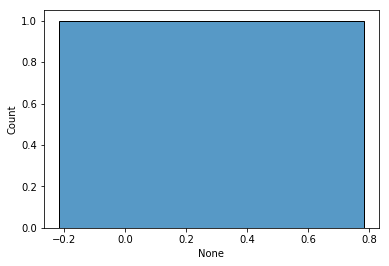

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 219.01it/s]

0.2831858407079646
P0AB91
['PHOSPHO-2-DEHYDRO-3-DEOXYHEPTONATE ALDOLASE, PHE-SENSITIVE']


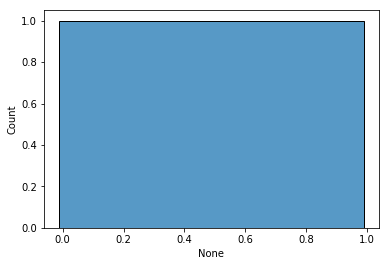

0it [00:00, ?it/s]


0.4888888888888889
C3L5T6
['NICOTINATE-NUCLEOTIDE ADENYLYLTRANSFERASE']


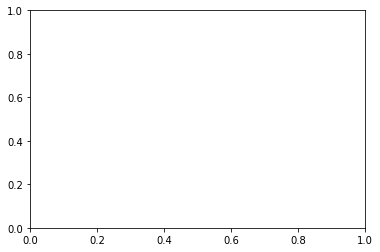

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 186.95it/s]

nan
P60953
['G25K GTP-BINDING PROTEIN']


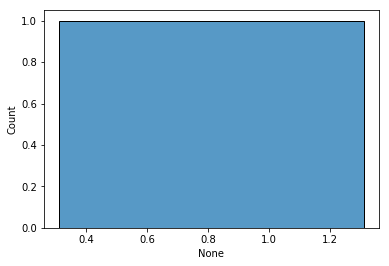

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 325.80it/s]

0.8117647058823529
P06709
['BIFUNCTIONAL LIGASE/REPRESSOR BIRA']


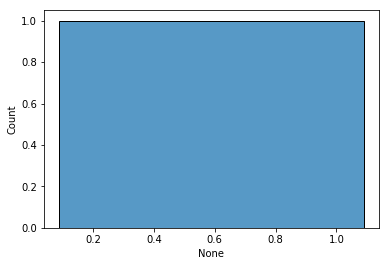

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 256.41it/s]


0.5895522388059702
O75311
['GLYCINE RECEPTOR SUBUNIT ALPHA-3,GLYCINE RECEPTOR']


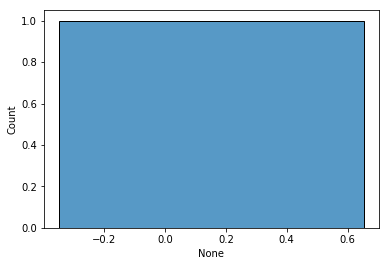

0it [00:00, ?it/s]

0.1527777777777778
G5EBR3
['AVERMECTIN-SENSITIVE GLUTAMATE-GATED CHLORIDE CHANN']


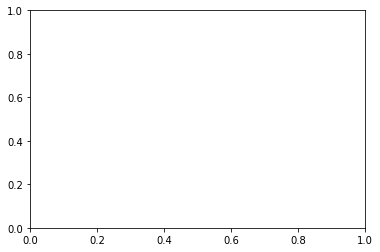

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 227.75it/s]

nan
P10724
['ALANINE RACEMASE']


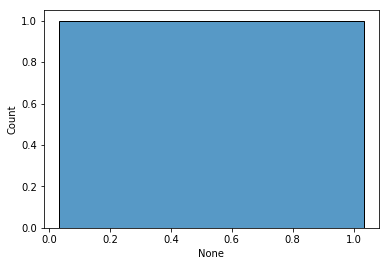

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 226.72it/s]

0.5333333333333333
P78362
['SRSF PROTEIN KINASE 2,SRSF PROTEIN KINASE 2']


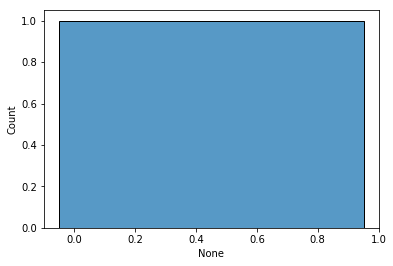

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.45098039215686275
P23874
['PROTEIN HIPA']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 191.79it/s]


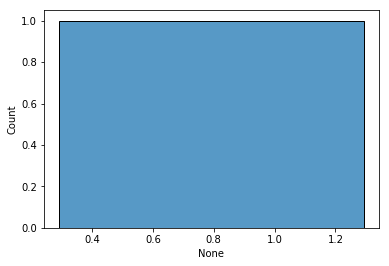

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 172.26it/s]

0.7926829268292683
Q9KID9
['FKBO']


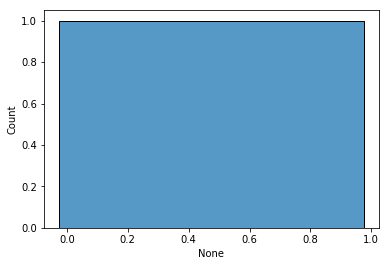

0.475
P06858
['LIPOPROTEIN LIPASE']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 201.42it/s]


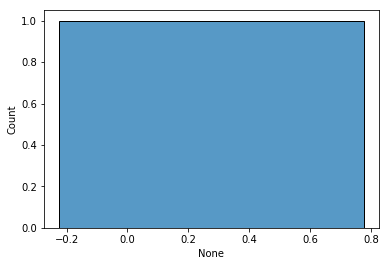

0.27611940298507465
P29218


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 248.01it/s]

['INOSITOL MONOPHOSPHATASE 1']


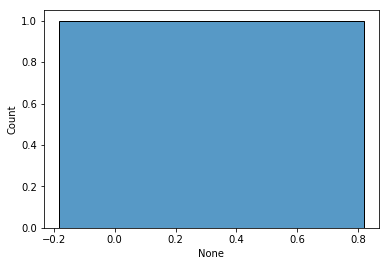

0.3181818181818182
P80457


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 237.97it/s]

['XANTHINE DEHYDROGENASE/OXIDASE']


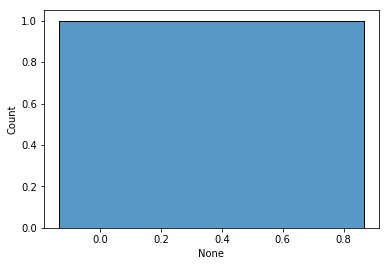

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 215.99it/s]

0.36585365853658536
Q99873
['PROTEIN ARGININE N-METHYLTRANSFERASE 1']


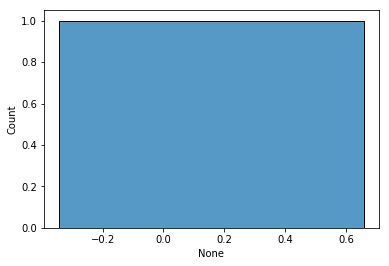

0it [00:00, ?it/s]

0.15789473684210525
P10384
['LONG-CHAIN FATTY ACID TRANSPORT PROTEIN']


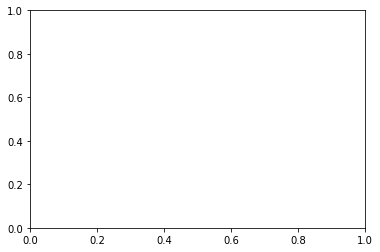

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]

nan
Q02853
['STROMELYSIN 3']


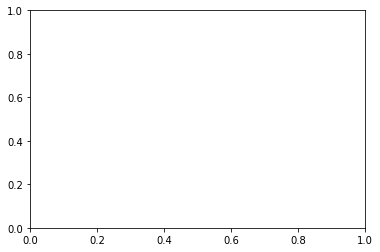

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 217.55it/s]

nan
Q9NS75
['CYSTEINYL LEUKOTRIENE RECEPTOR 2,SOLUBLE CYTOCHROME B562']


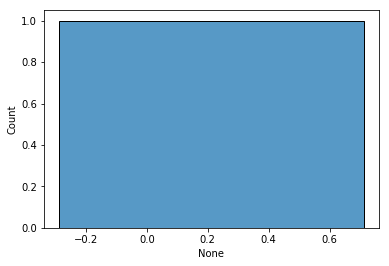

0it [00:00, ?it/s]


0.21212121212121213
Q8NBP7
['PROPROTEIN CONVERTASE SUBTILISIN/KEXIN TYPE 9']


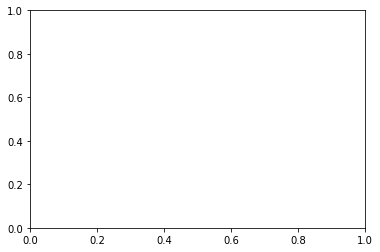

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 244.03it/s]

nan
P96884
['BIFUNCTIONAL LIGASE/REPRESSOR BIRA']


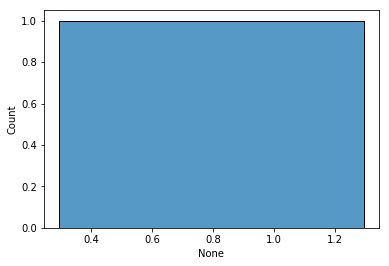

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 277.35it/s]

0.7950819672131147
Q9BVS4
['SERINE/THREONINE-PROTEIN KINASE RIO2']


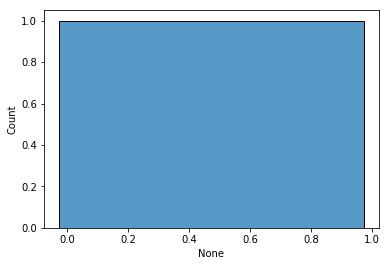

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 228.63it/s]

0.47368421052631576
P45352
['THYMIDYLATE SYNTHASE']


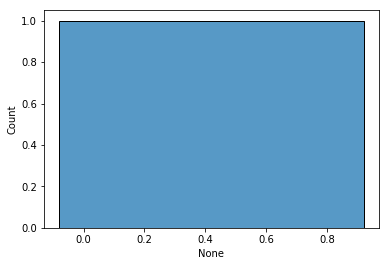

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 279.92it/s]

0.42016806722689076
P0C1S8
['WEE1-LIKE PROTEIN KINASE 2']


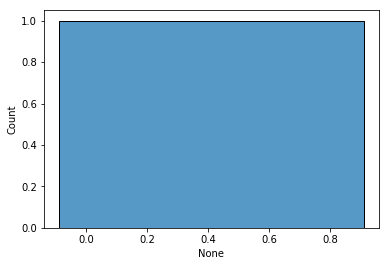

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 265.13it/s]

0.4108527131782946
Q460N3
['POLY [ADP-RIBOSE] POLYMERASE 15']


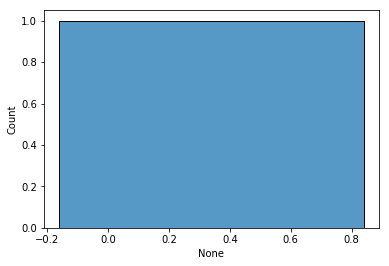

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 271.70it/s]

0.33962264150943394
Q99538
['LEGUMAIN']


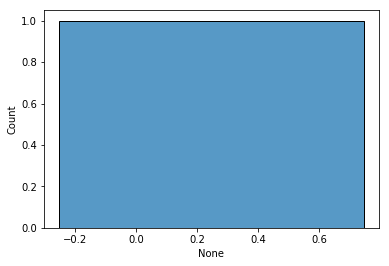

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 215.49it/s]

0.24719101123595505
P60709
['ACTIN PEPTIDE']


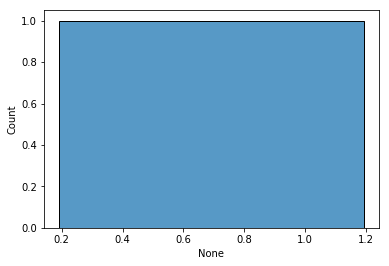

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 197.50it/s]

0.6923076923076923
P07948
['TYROSINE-PROTEIN KINASE LYN']


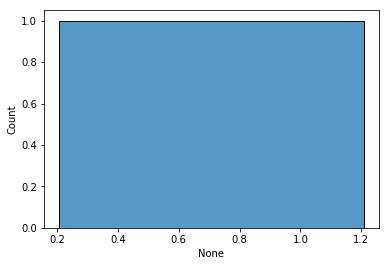

0it [00:00, ?it/s]

0.7075471698113207
Q63T71
['2-C-METHYL-D-ERYTHRITOL 2,4-CYCLODIPHOSPHATE SYNTHASE']


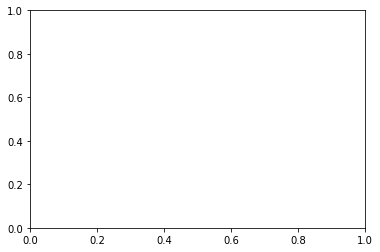

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 241.89it/s]

nan
P15531
['NUCLEOSIDE DIPHOSPHATE KINASE A']


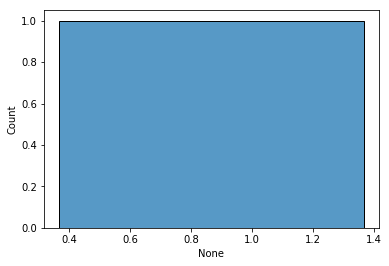

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 283.36it/s]

0.8666666666666667
P11881
['INOSITOL 1,4,5-TRISPHOSPHATE RECEPTOR TYPE 1']


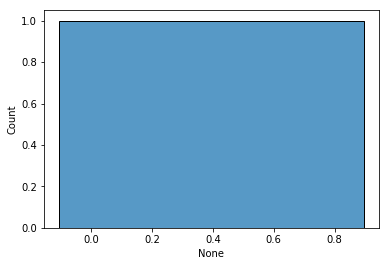

0it [00:00, ?it/s]


0.3953488372093023
Q9HC16
['DNA DC->DU-EDITING ENZYME APOBEC-3G']


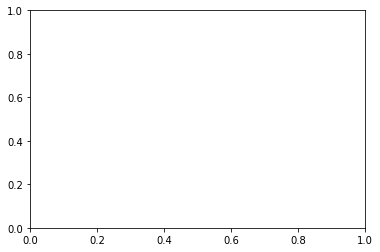

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]

nan
P50213
['ISOCITRATE DEHYDROGENASE [NAD] SUBUNIT ALPHA']


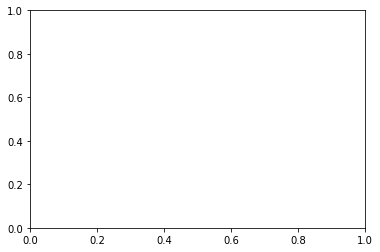

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 183.74it/s]

nan
P21453
['SPHINGOSINE 1-PHOSPHATE RECEPTOR 1, LYSOZYME CHIMER']


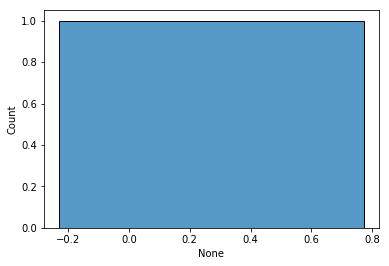

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 240.72it/s]

0.2717391304347826
P07140
['ACETYLCHOLINESTERASE']


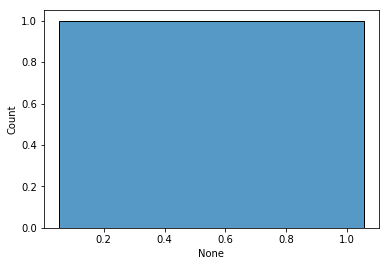

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 202.71it/s]

0.5540540540540541
Q01812
['GLUTAMATE RECEPTOR IONOTROPIC, KAINATE 4,GLUTAMATE RECEPTOR']


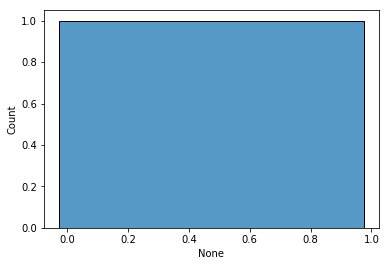

0it [00:00, ?it/s]

0.4745762711864407
O95453
['POLY(A)-SPECIFIC RIBONUCLEASE PARN']


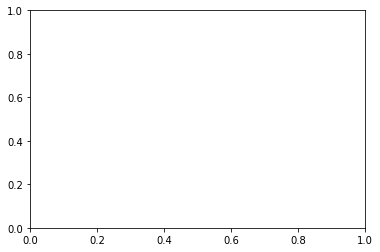

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 286.01it/s]

nan
O15357
['PHOSPHATIDYLINOSITOL-3,4,5-TRISPHOSPHATE 5-PHOSPHAT']


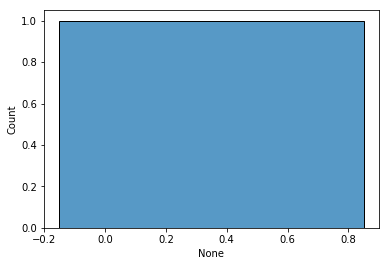

0it [00:00, ?it/s]

0.35
Q96GD4
['AURORA KINASE B']


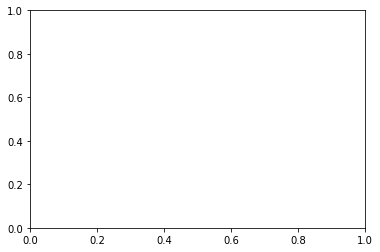

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 247.00it/s]

nan
P10826
['RETINOIC ACID RECEPTOR BETA']


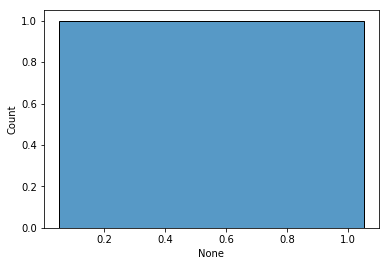

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 308.22it/s]

0.5522388059701493
P50583
["BIS(5'-NUCLEOSYL)-TETRAPHOSPHATASE"]


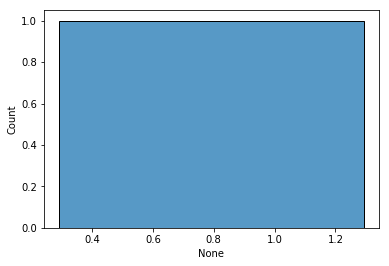

0.7926829268292683
P07686


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 272.78it/s]


['BETA-HEXOSAMINIDASE BETA CHAIN']


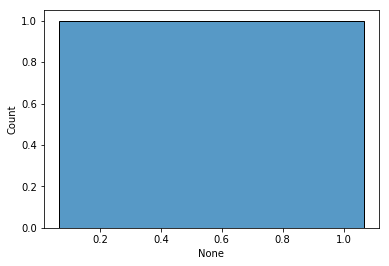

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 264.21it/s]

0.5660377358490566
O95470
['SPHINGOSINE-1-PHOSPHATE LYASE 1']


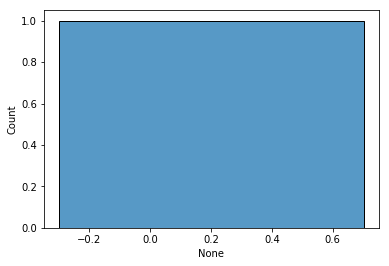

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.2013888888888889
P34897
['SERINE HYDROXYMETHYLTRANSFERASE, MITOCHONDRIAL']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 243.18it/s]


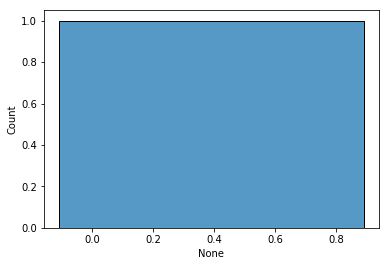

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 249.87it/s]

0.39166666666666666
P16154
['TOXIN A']


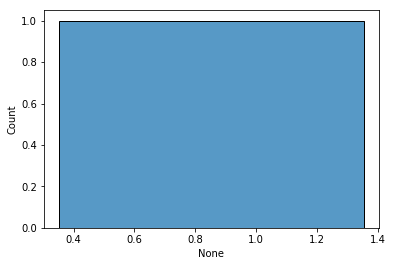

0it [00:00, ?it/s]

0.8529411764705882
E5KIY2
['BETA-LACTAMASE']


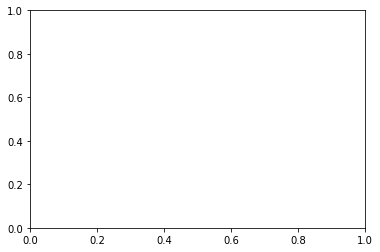

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]

nan
Q15109
['ADVANCED GLYCOSYLATION END PRODUCT-SPECIFIC RECEPTOR']


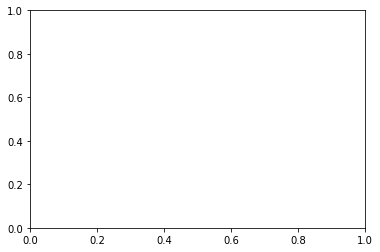

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 245.74it/s]

nan
O94788
['RETINAL DEHYDROGENASE 2']


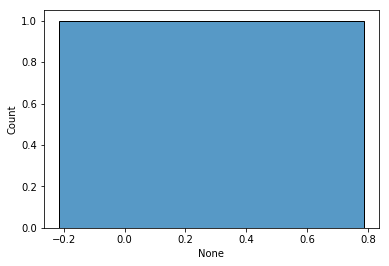

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 299.29it/s]


0.2857142857142857
Q9H7E2
['TUDOR DOMAIN-CONTAINING PROTEIN 3']


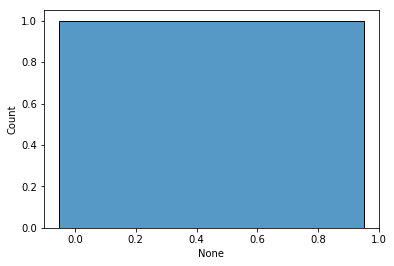

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 293.95it/s]

0.4489795918367347
P60546
['GUANYLATE KINASE']


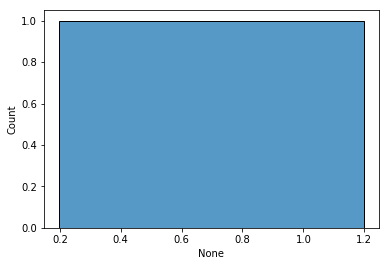

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 341.69it/s]

0.6981132075471698
P10276
['RETINOIC ACID RECEPTOR ALPHA']


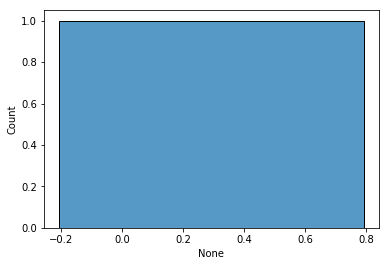

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 297.32it/s]

0.29292929292929293
P51617
['INTERLEUKIN-1 RECEPTOR-ASSOCIATED KINASE 1']


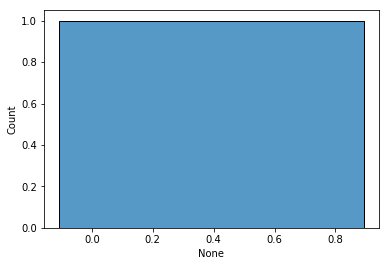

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 320.15it/s]

0.39285714285714285
P0AB71
['PROTEIN (FRUCTOSE-BISPHOSPHATE ALDOLASE II)']


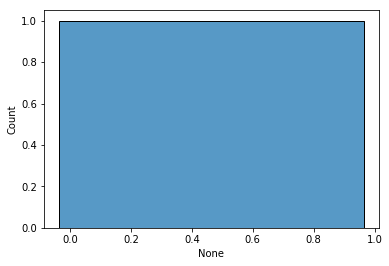

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.4642857142857143
O00443
['PHOSPHATIDYLINOSITOL 4-PHOSPHATE 3-KINASE C2 DOMAIN']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 230.77it/s]


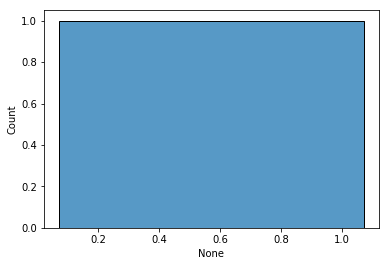

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 297.43it/s]

0.5714285714285714
O43598
["2'-DEOXYNUCLEOSIDE 5'-PHOSPHATE N-HYDROLASE 1"]


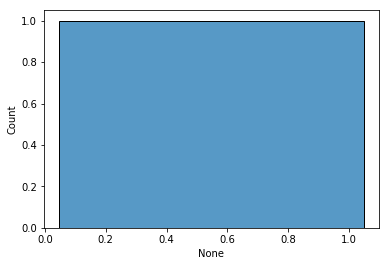

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 276.25it/s]

0.5473684210526316
O25776
['FLAVODOXIN']


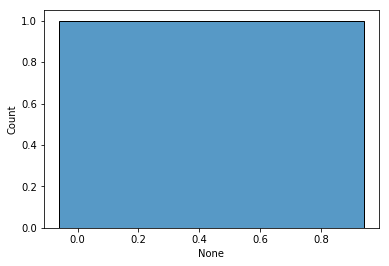

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 213.19it/s]

0.44
P49888
['ESTROGEN SULFOTRANSFERASE']


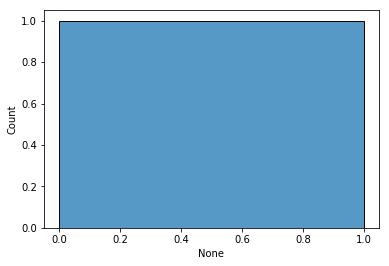

0it [00:00, ?it/s]

0.5
P08138
['TUMOR NECROSIS FACTOR RECEPTOR SUPERFAMILY MEMBER 16']


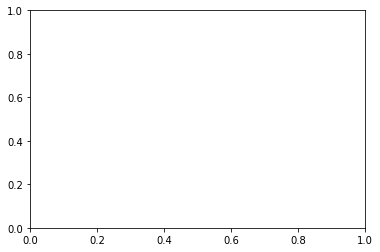

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]

nan
Q81VW8
['DIHYDROPTEROATE SYNTHASE']


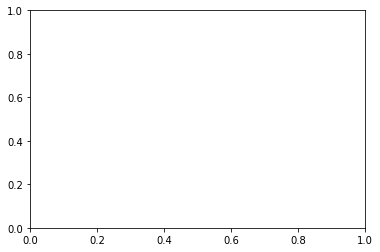

nan
Q8IZX4
['TRANSCRIPTION INITIATION FACTOR TFIID SUBUNIT 1-LIKE']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 179.12it/s]


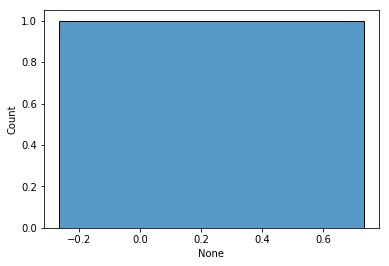

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 192.74it/s]


0.2336448598130841
Q93088
['BETAINE--HOMOCYSTEINE S-METHYLTRANSFERASE 1']


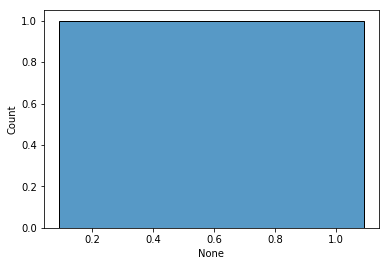

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 286.20it/s]

0.5909090909090909
Q8TDX5
['2-AMINO-3-CARBOXYMUCONATE-6-SEMIALDEHYDE DECARBOXYL']


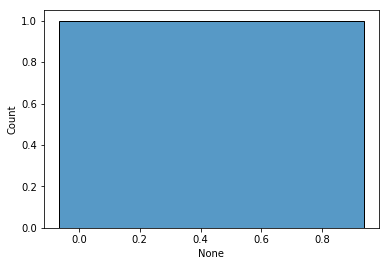

0it [00:00, ?it/s]

0.4358974358974359
O15550
['LYSINE-SPECIFIC DEMETHYLASE 6A']


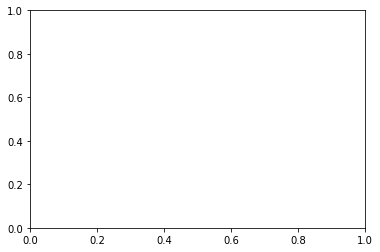

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 225.32it/s]

nan
O00444
['SERINE/THREONINE-PROTEIN KINASE PLK4']


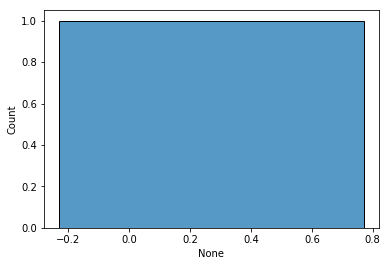

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 174.43it/s]

0.2702702702702703
P08185
['CORTICOSTEROID-BINDING GLOBULIN']


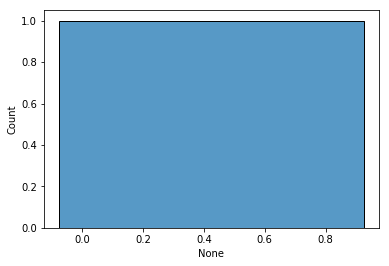

0.425
P62166


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 284.30it/s]


['NEURONAL CALCIUM SENSOR 1']


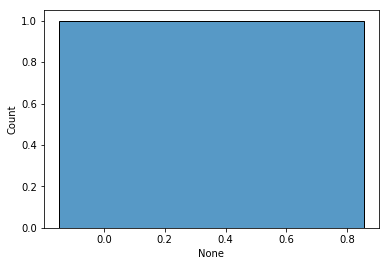

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 200.50it/s]

0.35353535353535354
Q01853
['TRANSITIONAL ENDOPLASMIC RETICULUM ATPASE']


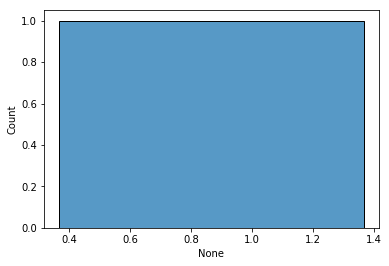

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 225.11it/s]

0.8666666666666667
P02769
['SERUM ALBUMIN']


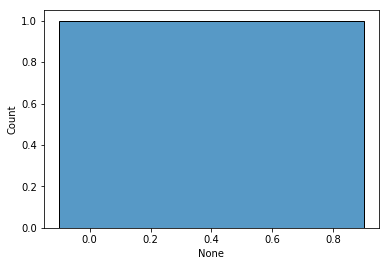

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 266.83it/s]

0.4
P9WMN1
['ATP PHOSPHORIBOSYLTRANSFERASE']


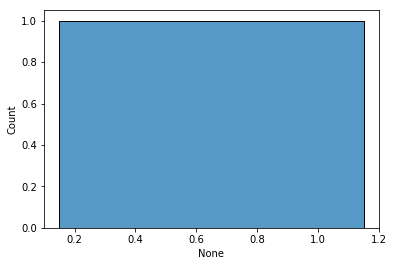

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 264.36it/s]

0.65
Q16832
['DISCOIDIN DOMAIN-CONTAINING RECEPTOR 2']


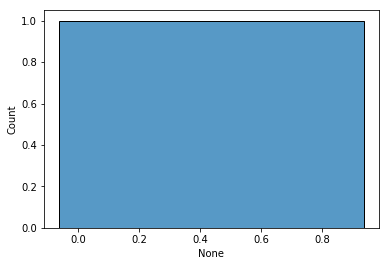

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 288.84it/s]

0.4375
P08567
['PLECKSTRIN']


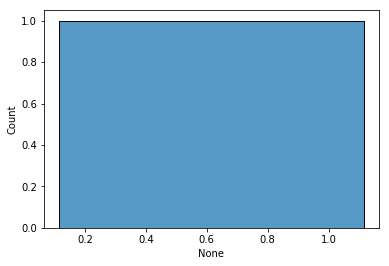

0it [00:00, ?it/s]

0.6153846153846154
Q848S6
['CARBAPENEM-HYDROLYZING BETA-LACTAMASE KPC']


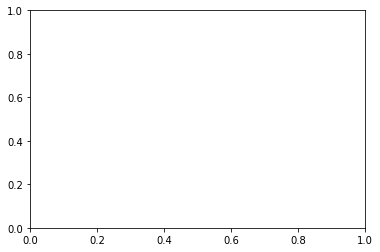

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]

nan
P04574
['CALPAIN']


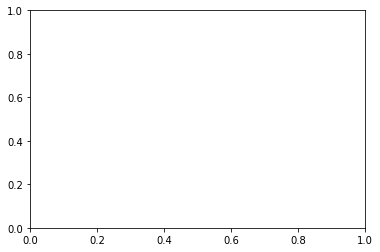

  0%|                                                     | 0/1 [00:00<?, ?it/s]

nan
P62509
['ESTROGEN-RELATED RECEPTOR GAMMA']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 228.08it/s]


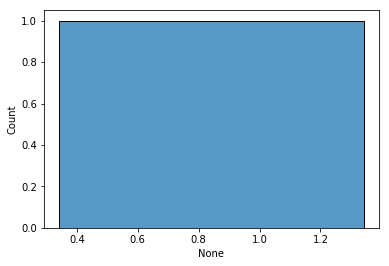

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 331.02it/s]


0.8421052631578947
Q8N371
['JMJC DOMAIN-CONTAINING PROTEIN 5']


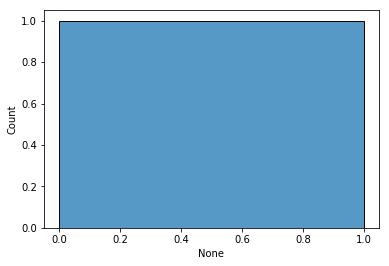

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 204.44it/s]

0.5
Q9KPI8
['MTA/SAH NUCLEOSIDASE']


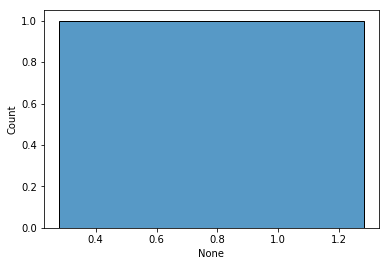

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 201.88it/s]

0.7804878048780488
Q64444
['CARBONIC ANHYDRASE IV']


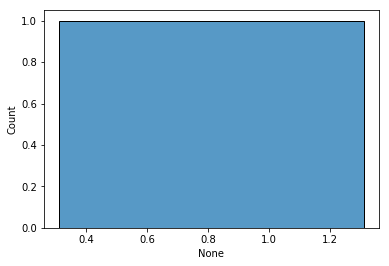

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 262.78it/s]

0.8115942028985508
P17948
['VASCULAR ENDOTHELIAL GROWTH FACTOR RECEPTOR 1']


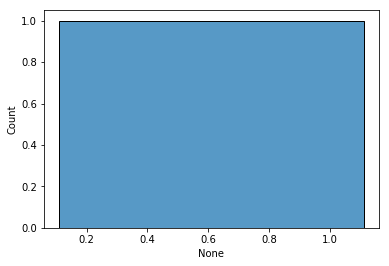

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 316.96it/s]

0.6103896103896104
O75608
['ACYL-PROTEIN THIOESTERASE 1']


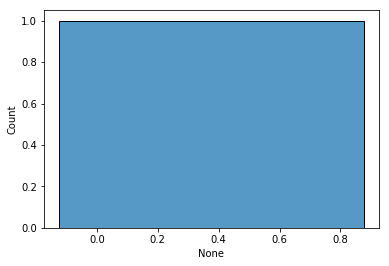

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 229.05it/s]

0.3763440860215054
P04036
['DIHYDRODIPICOLINATE REDUCTASE']


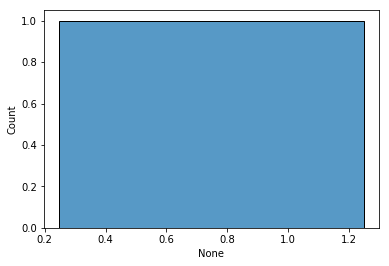

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 214.17it/s]

0.7479674796747967
P51436
['D(4) DOPAMINE RECEPTOR,SOLUBLE CYTOCHROME B562,D(4)']


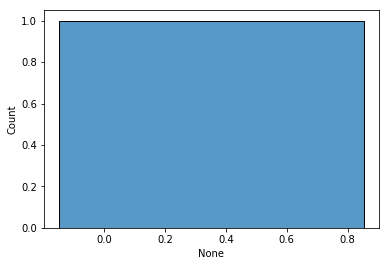

0it [00:00, ?it/s]

0.35294117647058826
O75844
['CAAX PRENYL PROTEASE 1 HOMOLOG']


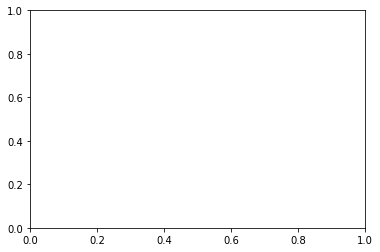

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 319.93it/s]

nan
P15813
['ANTIGEN-PRESENTING GLYCOPROTEIN CD1D']


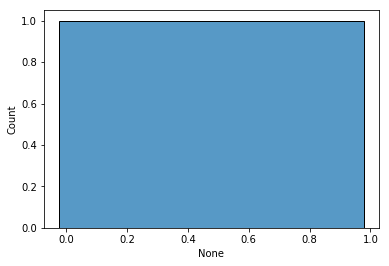

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 317.39it/s]

0.4777777777777778
P19438
['SOLUBLE TUMOR NECROSIS FACTOR RECEPTOR 1']


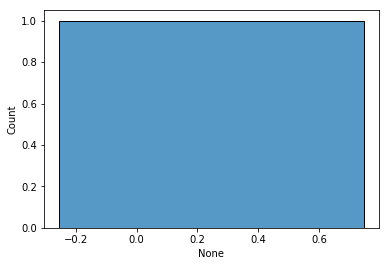

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 299.00it/s]


0.2462686567164179
Q6VAB6
['KINASE SUPPRESSOR OF RAS 2']


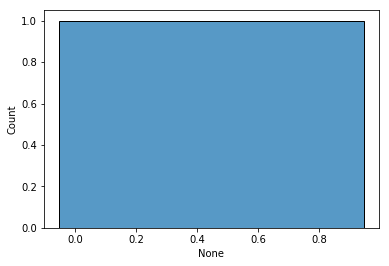

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 286.93it/s]

0.4470588235294118
P51532
['TRANSCRIPTION ACTIVATOR BRG1']


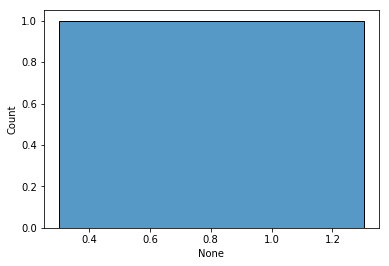

0it [00:00, ?it/s]

0.8023952095808383
P29477
['NITRIC OXIDE SYNTHASE, INDUCIBLE']


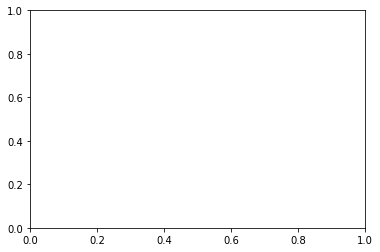

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 223.70it/s]

nan
Q46085
['COLH PROTEIN']


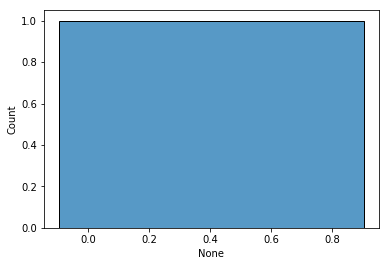

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 285.35it/s]

0.40425531914893614
P21579
['SYNAPTOTAGMIN-1']


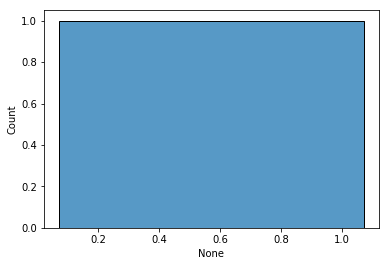

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 293.18it/s]


0.5714285714285714
P08514
['INTEGRIN ALPHAIIB BETA3']


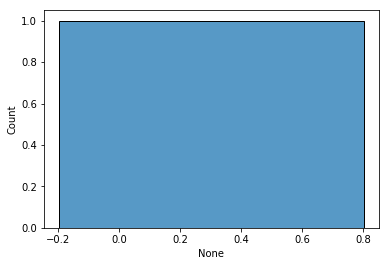

0it [00:00, ?it/s]

0.3026315789473684
P51452
['DUAL SPECIFICITY PROTEIN PHOSPHATASE 3']


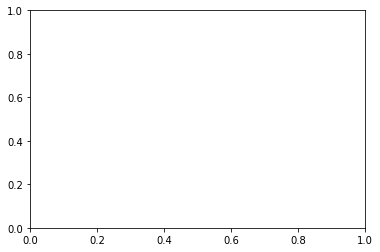

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 282.48it/s]

nan
P55263
['ADENOSINE KINASE']


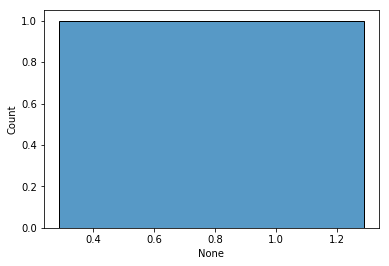

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 241.62it/s]

0.7878787878787878
Q9Y2R2
['TYROSINE-PROTEIN PHOSPHATASE NON-RECEPTOR TYPE 22']


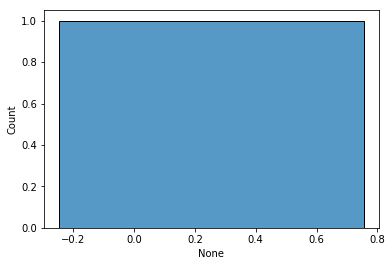

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 202.90it/s]

0.2545454545454545
P60487
['PYRIDOXAL PHOSPHATE PHOSPHATASE']


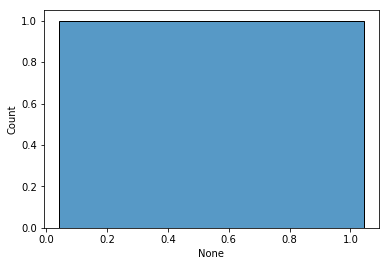

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 223.42it/s]

0.5434782608695652
P34948
['MANNOSE-6-PHOSPHATE ISOMERASE']


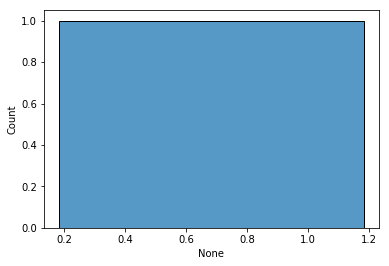

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 285.00it/s]

0.6829268292682927
Q6GI75
['ENOYL-[ACYL-CARRIER-PROTEIN] REDUCTASE [NADPH] FABI']


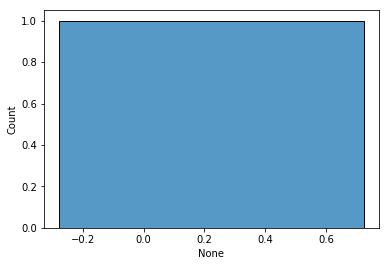

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 266.63it/s]

0.22321428571428573
Q5VWZ2
['LYSOPHOSPHOLIPASE-LIKE PROTEIN 1']


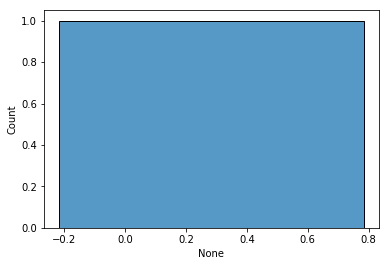

0it [00:00, ?it/s]

0.28378378378378377
Q26964
['TRANS-SIALIDASE']


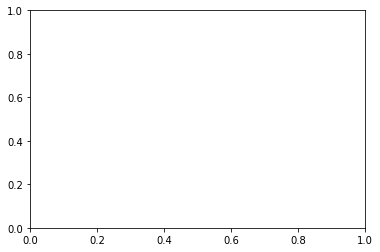

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|                                                     | 0/1 [00:00<?, ?it/s]

nan
P21860
['RECEPTOR TYROSINE-PROTEIN KINASE ERBB-3']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 275.69it/s]


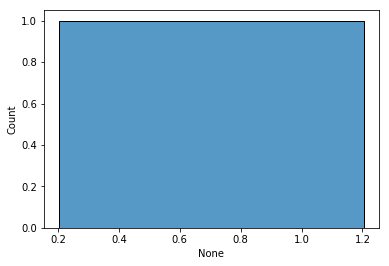

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.7040816326530612
P14604
['2-ENOYL-COA HYDRATASE']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 237.79it/s]


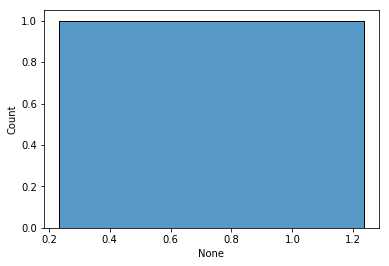

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 213.86it/s]


0.7342657342657343
P0A6F3
['GLYCEROL KINASE']


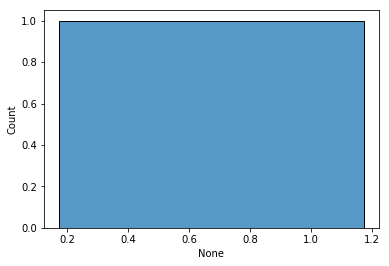

0it [00:00, ?it/s]

0.6739130434782609
Q9Y468
['LETHAL(3)MALIGNANT BRAIN TUMOR-LIKE PROTEIN']


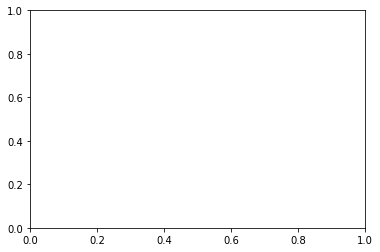

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 234.69it/s]

nan
P31153
['S-ADENOSYLMETHIONINE SYNTHASE ISOFORM TYPE-2']


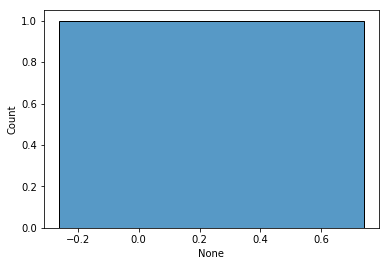

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 233.61it/s]

0.2391304347826087
P07858
['CATHEPSIN B']


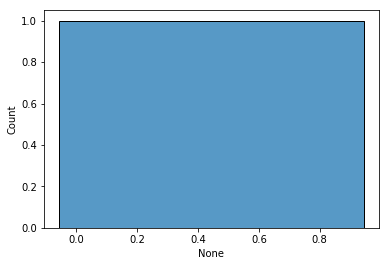

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 174.30it/s]


0.4444444444444444
A2RP81
['BETA-LACTAMASE']


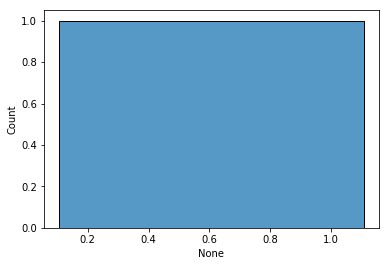

0it [00:00, ?it/s]

0.6065573770491803
P46934
['E3 UBIQUITIN-PROTEIN LIGASE NEDD4']


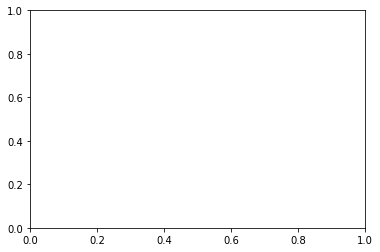

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]

nan
Q9QZH4
["5'-AMP-ACTIVATED PROTEIN KINASE SUBUNIT BETA-2"]


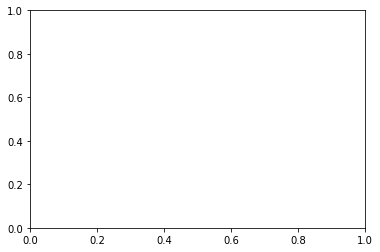

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 194.54it/s]

nan
P11064
['TYROSINE PHOSPHATASE']


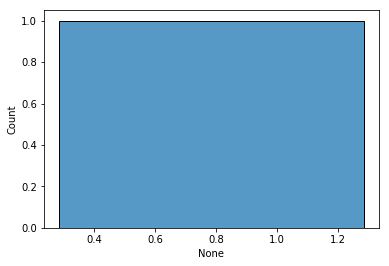

0it [00:00, ?it/s]


0.7857142857142857
P00690
['ALPHA-AMYLASE']


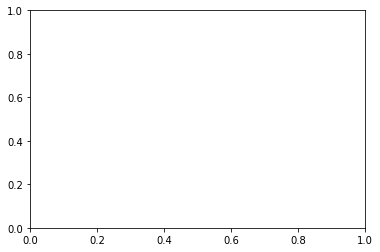

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 209.74it/s]

nan
P43115
['PROSTAGLANDIN E2 RECEPTOR EP3 SUBTYPE, ENDOLYSIN CHIMERA']


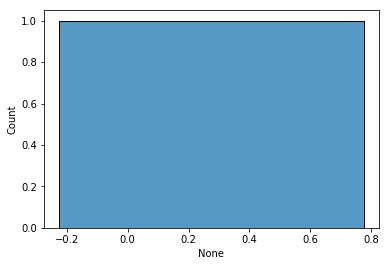

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 223.62it/s]

0.2753623188405797
O95251
['HISTONE ACETYLTRANSFERASE KAT7']


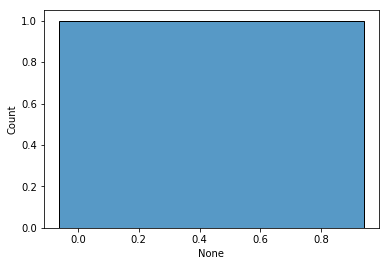

0it [00:00, ?it/s]

0.43902439024390244
P62745
['RHO-RELATED GTP-BINDING PROTEIN RHOB']


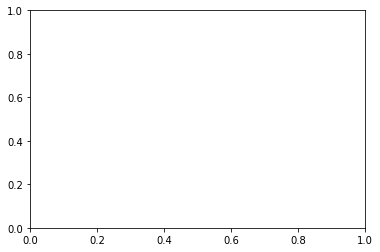

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]

nan
P02787
['SEROTRANSFERRIN']


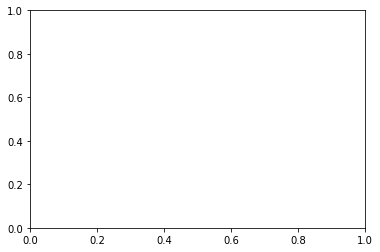

0it [00:00, ?it/s]

nan
P80386
["5'-AMP-ACTIVATED PROTEIN KINASE SUBUNIT BETA-1"]


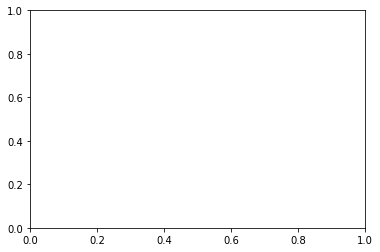

0it [00:00, ?it/s]


nan
P48147
['PROLYL ENDOPEPTIDASE']


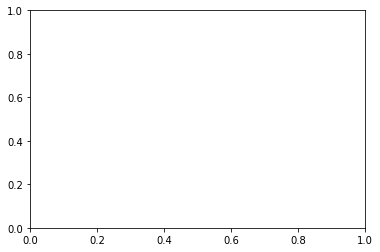

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 159.84it/s]

nan
Q9RUB5
['1-DEOXY-D-XYLULOSE-5-PHOSPHATE SYNTHASE']


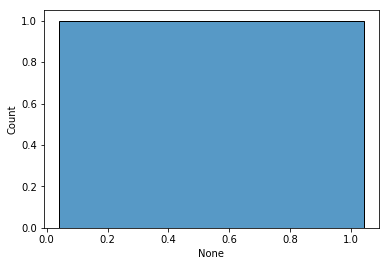

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 198.50it/s]

0.5412844036697247
Q9P1W9
['SERINE/THREONINE-PROTEIN KINASE PIM-2']


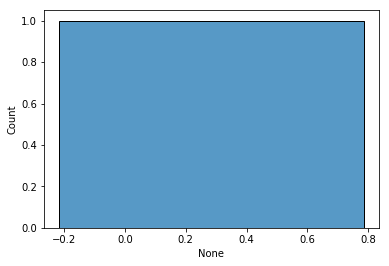

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.2845528455284553
P16732
['UL89 HCMV TERMINASE']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 185.39it/s]


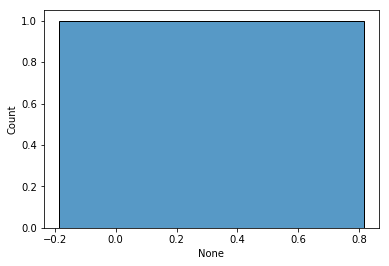

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 194.39it/s]

0.3148148148148148
Q9ULX7
['CARBONIC ANHYDRASE 14']


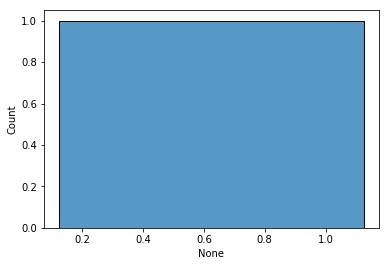

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 310.69it/s]

0.625
Q9Y337
['KALLIKREIN-5']


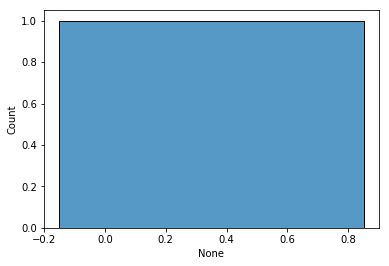

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.3504273504273504
P00693
['ALPHA-AMYLASE']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 157.33it/s]


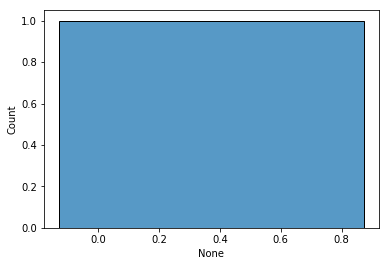

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 272.59it/s]

0.37254901960784315
Q9Y530
['UNCHARACTERIZED PROTEIN C6ORF130']


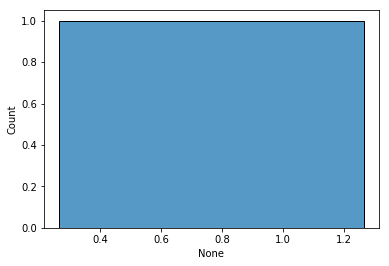

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 224.62it/s]

0.7647058823529411
O60658
['HIGH AFFINITY CAMP-SPECIFIC AND IBMX-INSENSITIVE']


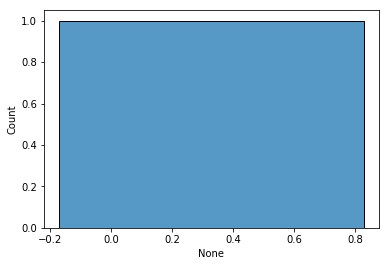

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 189.86it/s]

0.3291139240506329
Q9GZU7
['CARBOXY-TERMINAL DOMAIN RNA POLYMERASE II POLYPEPTI']


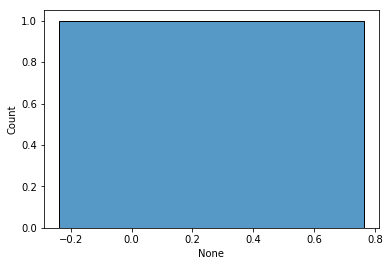

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 229.11it/s]

0.2625
Q9TVW2
['ADENOSINE KINASE']


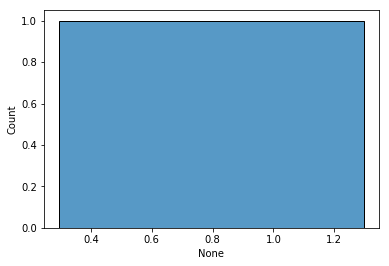

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 245.93it/s]


0.7966101694915254
Q02293
['FARNESYLTRANSFERASE']


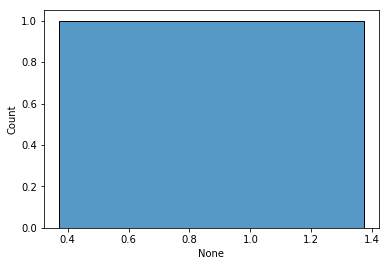

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 247.80it/s]

0.8723404255319149
P14410
['SUCRASE-ISOMALTASE']


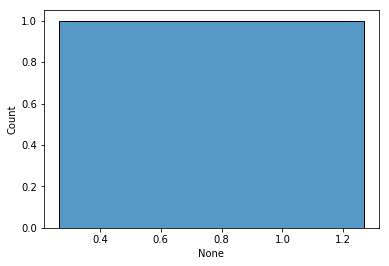

0it [00:00, ?it/s]

0.7666666666666667
Q27686
['PYRUVATE KINASE']


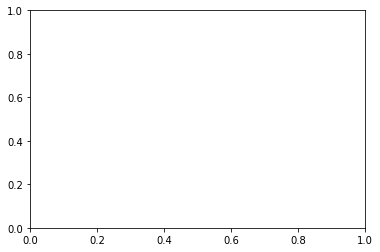

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 309.95it/s]

nan
P51686
['C-C CHEMOKINE RECEPTOR TYPE 9']


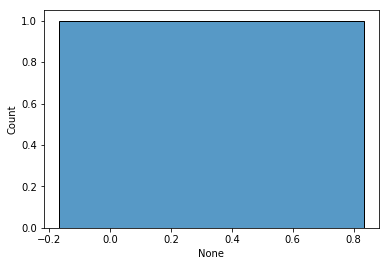

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 192.76it/s]

0.3333333333333333
P17252
['PROTEIN KINASE C ALPHA TYPE']


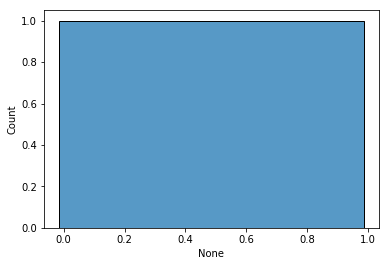

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 202.17it/s]


0.4854368932038835
O35627
['CONSTITUTIVE ANDROSTANE RECEPTOR']


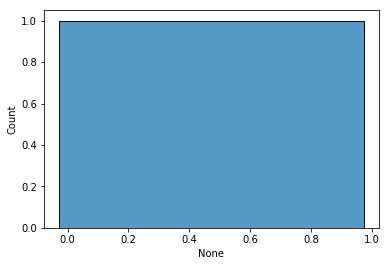

0.47297297297297297
Q8G9Q0
['BETA-LACTAMASE IMP-1']


0it [00:00, ?it/s]


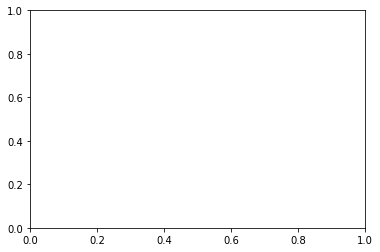

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 250.77it/s]

nan
O35795
['ECTONUCLEOSIDE TRIPHOSPHATE DIPHOSPHOHYDROLASE 2']


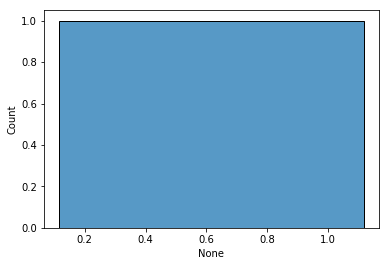

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 195.70it/s]

0.6164383561643836
Q15059
['BROMODOMAIN-CONTAINING PROTEIN 3']


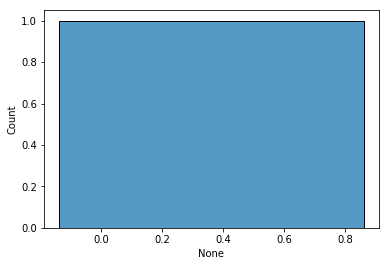

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 243.52it/s]


0.3617021276595745
P56690
['ISOLEUCYL-TRNA SYNTHETASE']


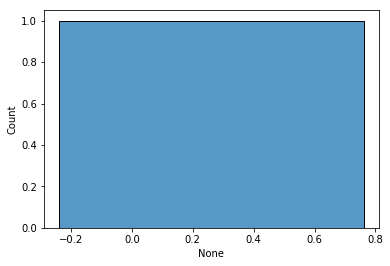

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 227.86it/s]

0.26136363636363635
P78552
['INTERLEUKIN-13 RECEPTOR SUBUNIT ALPHA-1']


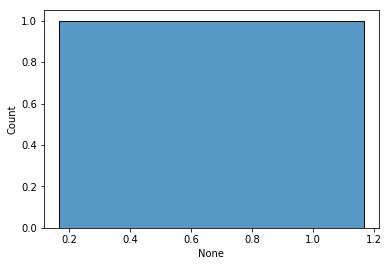

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 295.00it/s]

0.6666666666666666
P0A1P6
['GLUTAMINE SYNTHETASE']


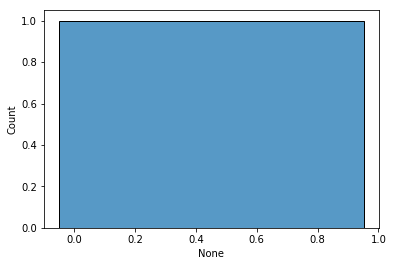

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 244.92it/s]

0.45161290322580644
P32248
['C-C CHEMOKINE RECEPTOR TYPE 7,SIALIDASE A,C-C CHEMOKINE']


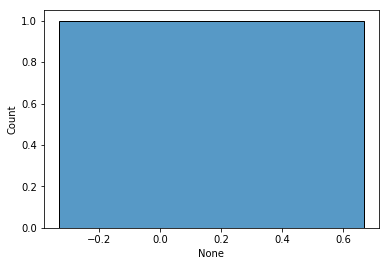

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 261.46it/s]

0.168141592920354
Q07599
['NEURAMINIDASE']


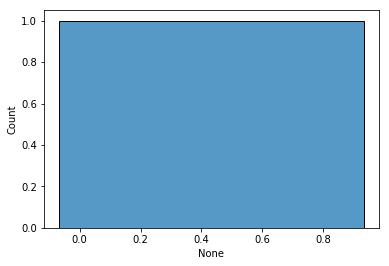

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 262.24it/s]

0.43283582089552236
P23471
['RECEPTOR-TYPE TYROSINE-PROTEIN PHOSPHATASE ZETA']


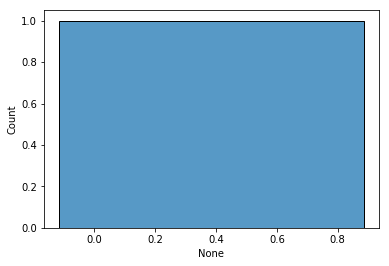

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 225.37it/s]

0.3853211009174312
P07650
['THYMIDINE PHOSPHORYLASE']


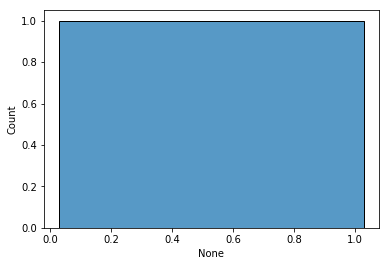

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 200.19it/s]

0.5294117647058824
P49674
['CASEIN KINASE I ISOFORM EPSILON']


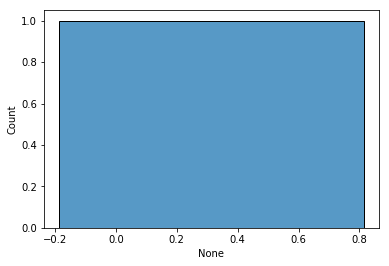

0.3140495867768595
P13861
['CAMP-DEPENDENT PROTEIN KINASE TYPE II-ALPHA']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 237.14it/s]


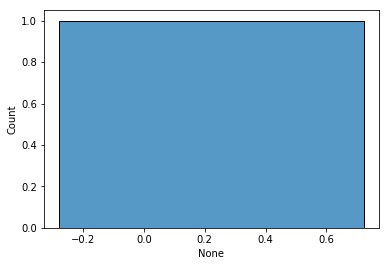

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 243.64it/s]

0.2222222222222222
P24530
['ENDOTHELIN B RECEPTOR,ENDOLYSIN,ENDOTHELIN B RECEPTOR']


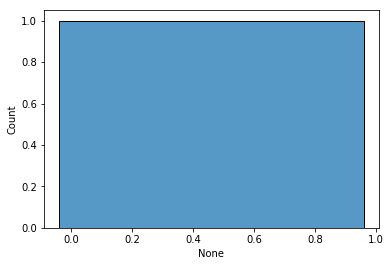

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 295.31it/s]

0.46
P25103
['SUBSTANCE-P RECEPTOR, GLGA GLYCOGEN SYNTHASE, SUBSTANCE-P']


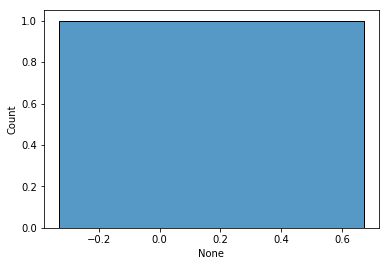

0it [00:00, ?it/s]

0.17073170731707318
P80192
['MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE 9']


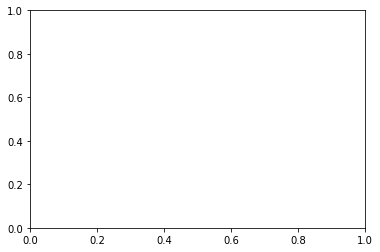

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]

nan
P51659
['ESTRADIOL 17 BETA-DEHYDROGENASE 4']


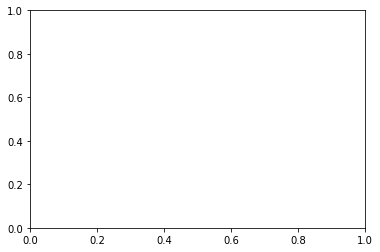

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 260.29it/s]

nan
P15319
['CHAPERONE PROTEIN PAPD']


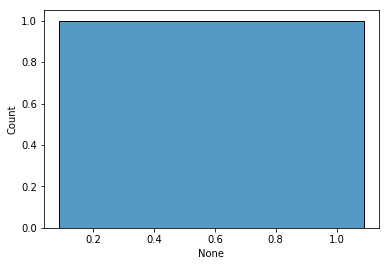

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 230.08it/s]

0.5888888888888889
Q9UJ71
['LANGERIN']


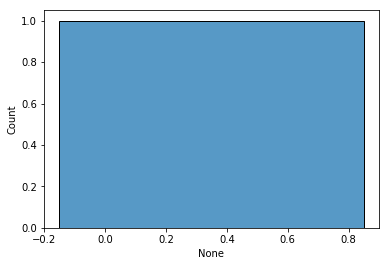

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.3492063492063492
Q96GG9
['DCN1-LIKE PROTEIN 1']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 289.18it/s]


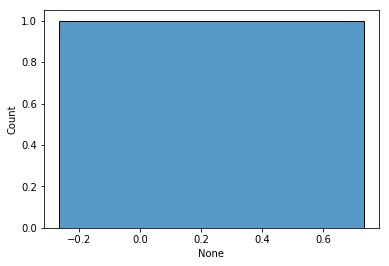

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 260.76it/s]

0.23417721518987342
Q6NYC1
['BIFUNCTIONAL ARGININE DEMETHYLASE AND LYSYL-HYDROXYLASE']


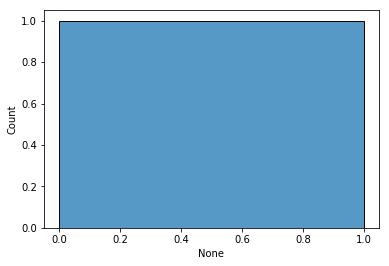

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 276.78it/s]

0.5
O43683
['MITOTIC CHECKPOINT SERINE/THREONINE-PROTEIN KINASE BUB1']


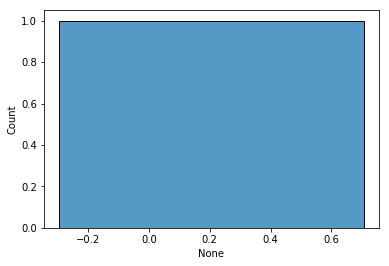

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 228.72it/s]

0.20588235294117646
Q96EP0
['E3 UBIQUITIN-PROTEIN LIGASE RNF31']


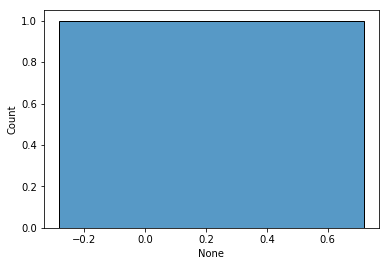

0it [00:00, ?it/s]

0.21794871794871795
Q02790
['PEPTIDYL-PROLYL CIS-TRANS ISOMERASE FKBP4']


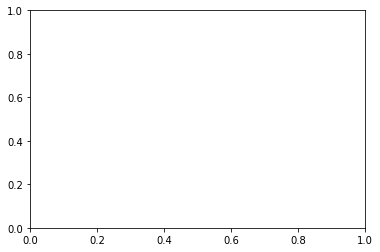

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]

nan
P41145
['KAPPA-TYPE OPIOID RECEPTOR, LYSOZYME']


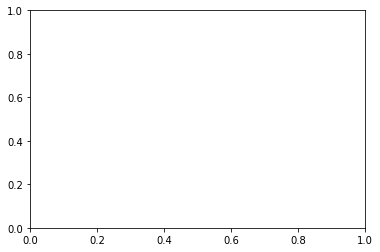

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 227.28it/s]

nan
P00778
['ALPHA-LYTIC PROTEASE']


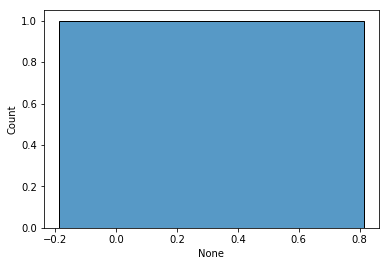

0it [00:00, ?it/s]


0.31313131313131315
P27338
['AMINE OXIDASE [FLAVIN-CONTAINING] B']


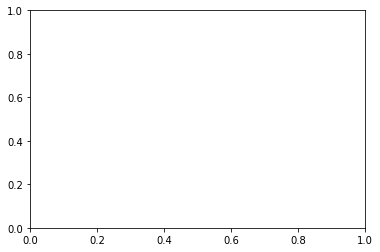

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0it [00:00, ?it/s]

nan
P9WP25
['4-HYDROXY-TETRAHYDRODIPICOLINATE SYNTHASE']


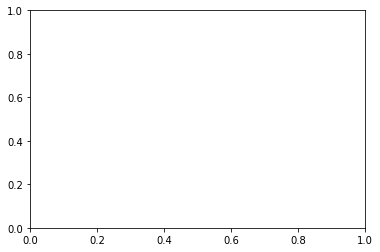

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 209.29it/s]

nan
P33527
['MULTIDRUG RESISTANCE-ASSOCIATED PROTEIN 1']


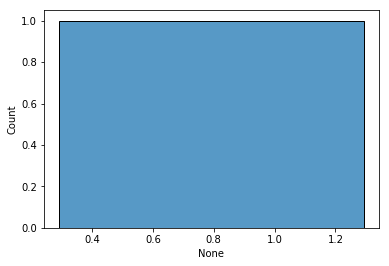

0it [00:00, ?it/s]


0.7926829268292683
P00803
['SIGNAL PEPTIDASE I']


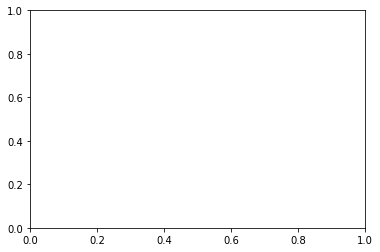

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 220.56it/s]

nan
P12104
['FATTY ACID-BINDING PROTEIN, INTESTINAL']


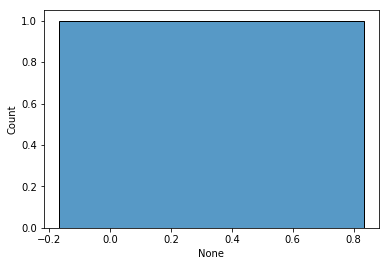

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 280.22it/s]

0.3333333333333333
P15494
['MAJOR POLLEN ALLERGEN BET V 1-A']


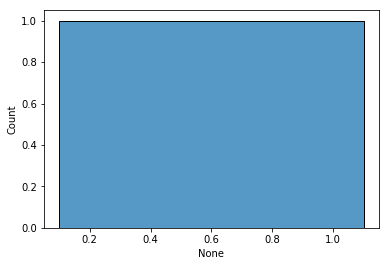

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 280.26it/s]


0.6
P53686
['NAD-DEPENDENT DEACETYLASE HST2']


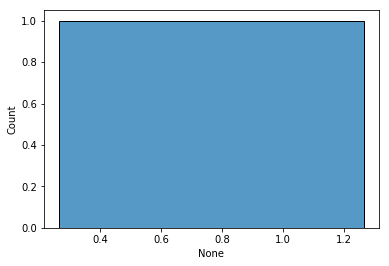

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 227.83it/s]

0.7647058823529411
Q4FZB7
['HISTONE-LYSINE N-METHYLTRANSFERASE SUV420H1']


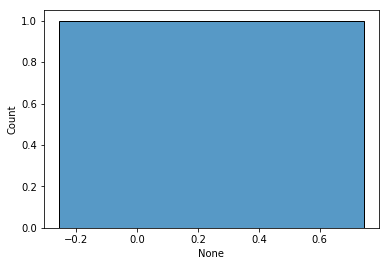

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 217.30it/s]

0.2441860465116279
O08498
['CLASS B CARBAPENEMASE BLAB-1']


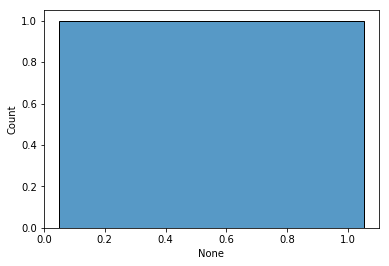

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 242.88it/s]

0.5510204081632653
B2RXH2
['2-OXOGLUTARATE OXYGENASE']


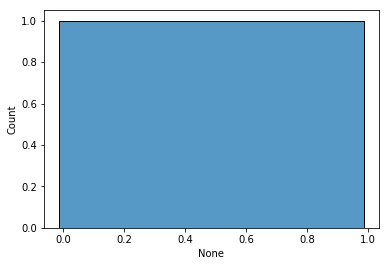

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 199.42it/s]

0.4864864864864865
P62965
['CELLULAR RETINOIC ACID BINDING PROTEIN TYPE I']


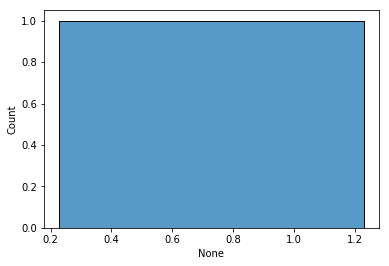

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 273.16it/s]

0.7288135593220338
P9WH43
['30S RIBOSOMAL PROTEIN S1']


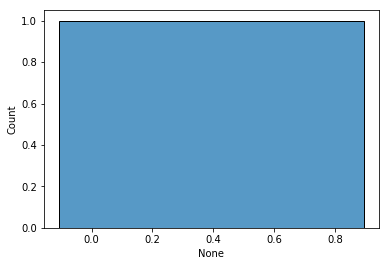

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 199.46it/s]

0.3939393939393939
Q7KZI7
['SERINE/THREONINE-PROTEIN KINASE MARK2']


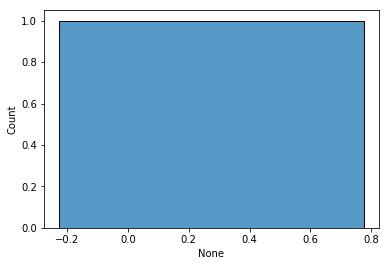

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 171.50it/s]

0.275
Q9I7A8
['PEPTIDE DEFORMYLASE']


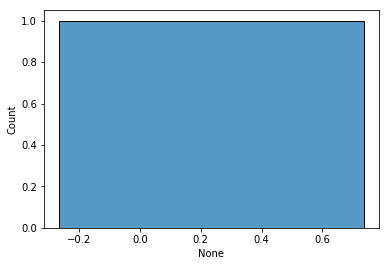

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0.23529411764705882
P42866
['MU-TYPE OPIOID RECEPTOR']


100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 211.35it/s]


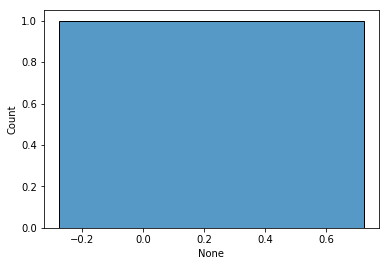

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 227.59it/s]

0.22413793103448276
P9WQD9
['3-OXOACYL-[ACYL-CARRIER-PROTEIN] SYNTHASE 1']


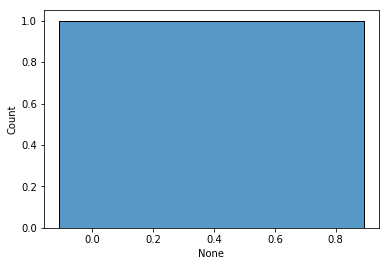

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 243.74it/s]

0.3918918918918919
Q9HAZ1
['DUAL SPECIFICITY PROTEIN KINASE CLK4']


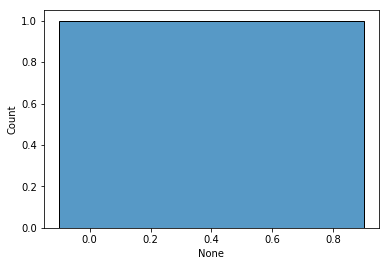

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 215.30it/s]

0.4
P48449
['LANOSTEROL SYNTHASE']


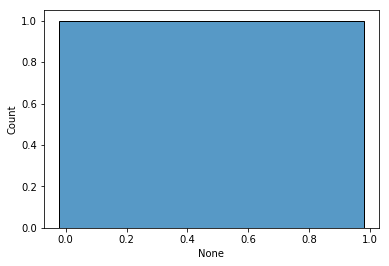

0it [00:00, ?it/s]

0.4791666666666667
Q64663
['P2X PURINOCEPTOR 7']


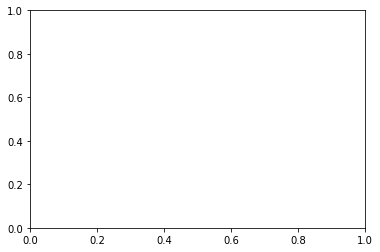

/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 222.83it/s]

nan
P43403
['TYROSINE-PROTEIN KINASE ZAP-70']


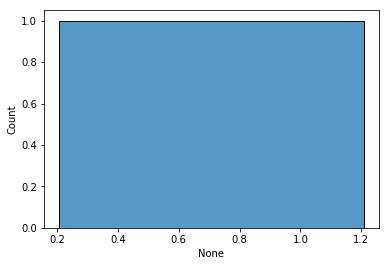

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 209.52it/s]

0.7075471698113207
Q6L8Q7
["2',5'-PHOSPHODIESTERASE 12"]


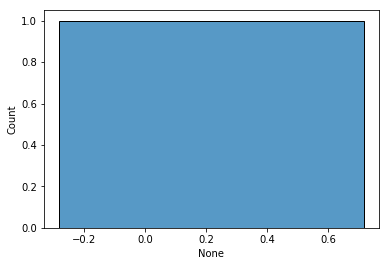

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 240.71it/s]


0.21739130434782608
P9WNP5
['1,4-DIHYDROXY-2-NAPHTHOYL-COA SYNTHASE']


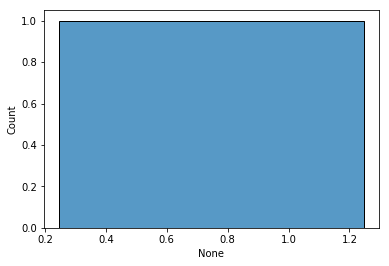

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 196.20it/s]

0.7467532467532467
Q9Y4E8
['UBIQUITIN CARBOXYL-TERMINAL HYDROLASE 15']


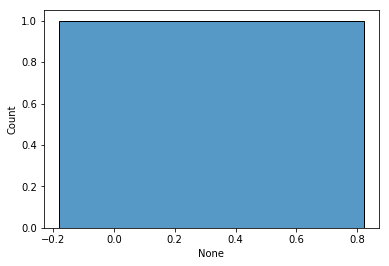

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 301.36it/s]

0.32075471698113206
P06241
['PROTO-ONCOGENE TYROSINE-PROTEIN KINASE FYN']


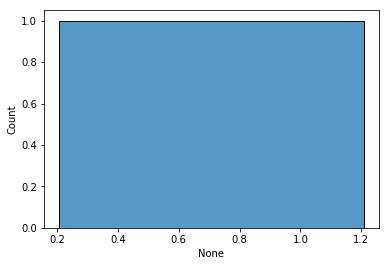

0it [00:00, ?it/s]

0.7075471698113207
P00183
['CYTOCHROME P450-CAM']


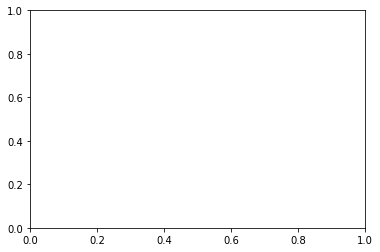

nan


/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/bb596/anaconda3/envs/bioconfpred/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
for uniprot_id in merged_table['Uniprot ID'].value_counts().index :
    print(uniprot_id)
    uniprot_table = merged_table[(merged_table['Uniprot ID'] == uniprot_id)]
    print(uniprot_table['protein name'].unique())
    uniprot_pdbs = uniprot_table['PDB code'].unique()
    uniprot_names = pdbbind_cel_df[pdbbind_cel_df['pdb_id'].isin(uniprot_pdbs)]['ligand_name'].unique()
    uniprot_smiles = cel_df[cel_df['ensemble_name'].isin(uniprot_names)]['smiles'].unique()
    
    sims = []
    for smiles in tqdm(uniprot_smiles) :
        # mol = Chem.MolFromSmiles(smiles)
        #display(mol)
        closest_smiles, closest_sims = ss.find_closest_in_subset(smiles, uniprot_smiles)
        #display(Draw.MolsToGridImage([Chem.MolFromSmiles(smiles) for smiles in closest_smiles]))
        sims.append(closest_sims[0])
        
    sns.histplot(x=sims)
    plt.show()
        
    print(np.mean(sims))

In [8]:
for uniprot_id in merged_table['Uniprot ID'].value_counts().index :
    print(uniprot_id)
    uniprot_table = merged_table[(merged_table['Uniprot ID'] == uniprot_id)]
    print(uniprot_table['protein name'].unique())
    uniprot_pdbs = uniprot_table['PDB code'].unique()
    uniprot_names = pdbbind_cel_df[pdbbind_cel_df['pdb_id'].isin(uniprot_pdbs)]['ligand_name'].unique()
    uniprot_smiles = cel_df[cel_df['ensemble_name'].isin(uniprot_names)]['smiles'].unique()
    
    uniprot_in_closest = []
    for smiles in uniprot_smiles :
        mol = Chem.MolFromSmiles(smiles)
        #display(mol)
        closest_smiles, closest_sims = ss.find_closest_in_set(smiles)
        #display(Draw.MolsToGridImage([Chem.MolFromSmiles(smiles) for smiles in closest_smiles]))
        closest_names = cel_df[cel_df['smiles'].isin(closest_smiles)]['ensemble_name'].unique()
        closest_pdbs = pdbbind_cel_df[pdbbind_cel_df['ligand_name'].isin(closest_names)]['pdb_id'].unique()
        closest_pdbbind = merged_table[merged_table['PDB code'].isin(closest_pdbs)]
        uniprots = closest_pdbbind['Uniprot ID'].values
        uniprot_in_closest.append(uniprot_id in uniprots)
        
        # sns.histplot(x=uniprot_in_closest)
        
    print(np.mean(uniprot_in_closest))


  5%|██▏                                      | 17/313 [00:00<00:01, 164.45it/s]

P00918
['CARBONIC ANHYDRASE 2' 'CARBONIC ANHYDRASE IX-MIMIC']



 13%|█████▎                                   | 26/201 [00:00<00:00, 252.36it/s]

0.7795527156549521
P56817
['BETA-SECRETASE 1' 'BETA-SECRETASE-1']



 10%|███▉                                     | 16/168 [00:00<00:00, 155.02it/s]

0.9154228855721394
P24941
['CELL DIVISION PROTEIN KINASE 2' 'CYCLIN-DEPENDENT KINASE 2']



 16%|██████▌                                  | 25/157 [00:00<00:00, 248.46it/s]

0.6547619047619048
O60885
['BROMODOMAIN-CONTAINING PROTEIN 4' 'BROMODOMAIN-CONTAINING PROTEIN 2']



 19%|███████▉                                 | 27/140 [00:00<00:00, 260.82it/s]

0.7197452229299363
P07900
['HEAT SHOCK PROTEIN HSP90-ALPHA' 'HEAT SHOCK PROTEIN HSP 90-ALPHA']



 12%|████▊                                    | 16/135 [00:00<00:00, 153.20it/s]

0.7714285714285715
P00734
['THROMBIN' 'THROMBIN ALPHA' 'PROTHROMBIN' 'THROMBIN LIGHT CHAIN'
 'THROMBIN HEAVY CHAIN' 'THROMBIN ALPHA (SMALL SUBUNIT)'
 'THROMBIN SHORT CHAIN']



 13%|█████▌                                   | 16/119 [00:00<00:00, 157.32it/s]

0.7555555555555555
Q16539
['MITOGEN-ACTIVATED PROTEIN KINASE 14'
 'MITOGEN-ACTIVATED PROTEIN KINASE P38']



 44%|██████████████████▎                       | 24/55 [00:00<00:00, 235.15it/s]

0.6050420168067226
O60674
['TYROSINE-PROTEIN KINASE JAK2']



 30%|████████████▌                             | 23/77 [00:00<00:00, 222.27it/s]

0.5636363636363636
P03366
['REVERSE TRANSCRIPTASE/RIBONUCLEASE H'
 'HIV-1 REVERSE TRANSCRIPTASE/RIBONUCLEASE H'
 'HIV-1 REVERSE TRANSCRIPTASE P66 SUBUNIT' 'HIV-1 PROTEASE'
 'HIV-1 REVERSE TRANSCRIPTASE' 'HIV-1 INTEGRASE' 'P66 RT'
 'HIV-1 REVERSE TRANSCRIPTASE, P66 SUBUNIT' 'PROTEASE']



  0%|                                                    | 0/92 [00:00<?, ?it/s]

0.5844155844155844
Q9H2K2
['TANKYRASE-2']


KeyboardInterrupt: 

In [7]:
merged_table[merged_table['gene_symbol_lowercase'] == 'brpf1'].head()

PDB code resolution release year_x  -logKd/Ki             Kd/Ki  \
5004     5o4t       1.50           2018        3.4  IC50>400uM    //   
5005     5o4t       1.50           2018        3.4  IC50>400uM    //   
5006     5o4t       1.50           2018        3.4  IC50>400uM    //   
5007     5c87       1.55           2016        3.7  Kd>200uM      //   
5008     5c87       1.55           2016        3.7  Kd>200uM      //   

     reference ligand name activity_list sep     value units  release year_y  \
5004  5mwg.pdf         9KT  [uM, >, 400]   >  400000.0    nM            2018   
5005  5mwg.pdf         9KT  [uM, >, 400]   >  400000.0    nM            2018   
5006  5mwg.pdf         9KT  [uM, >, 400]   >  400000.0    nM            2018   
5007  5c7n.pdf         4YS  [uM, >, 200]   >  200000.0    nM            2016   
5008  5c7n.pdf         4YS  [uM, >, 200]   >  200000.0    nM            2016   

     Uniprot ID protein name  active accession component_synonym  \
5004     P55201     PEREGRIN   False    P55201             BRPF1   
5005     P55201     PEREGRIN   False    P55201             BRPF1   
5006     P55201     PEREGRIN   False    P55201             BRPF1   
5007     P55201     PEREGRIN   False    P55201             BRPF1   
5008     P55201     PEREGRIN   False    P55201             BRPF1   

                                     protein_class_desc  \
5004                  epigenetic regulator  reader  brd   
5005                  epigenetic regulator  reader  phd   
5006  epigenetic regulator  reader  methyl-lysine  pwwp   
5007                  epigenetic regulator  reader  brd   
5008                  epigenetic regulator  reader  phd   

                                           level3 gene_symbol_lowercase  
5004            epigenetic regulator  reader  brd                 brpf1  
5005            epigenetic regulator  reader  phd                 brpf1  
5006  epigenetic regulator  reader  methyl-lysine                 brpf1  
5007            epigenetic regulator  reader  brd                 brpf1  
5008            epigenetic regulator  reader  phd                 brpf1

In [11]:
for gene_symbol in merged_table['gene_symbol_lowercase'].value_counts().index :
    print(gene_symbol)
    gene_table = merged_table[(merged_table['gene_symbol_lowercase'] == gene_symbol)]
    gene_pdbs = gene_table['PDB code'].unique()
    gene_smiles = smiles_df[(smiles_df['id'].isin(gene_pdbs)) 
                            & (smiles_df['included'])]['smiles'].unique()
    
    gene_in_closest = []
    for smiles in gene_smiles :
        mol = Chem.MolFromSmiles(smiles)
        #display(mol)
        closest_smiles, closest_sims = ss.find_closest_in_set(smiles)
        #display(Draw.MolsToGridImage([Chem.MolFromSmiles(smiles) for smiles in closest_smiles]))
        closest_pdbs = smiles_df[(smiles_df['smiles'].isin(closest_smiles)) 
                             & (smiles_df['included'])]['id'].unique()
        closest_pdbbind = merged_table[merged_table['PDB code'].isin(closest_pdbs)]
        genes = closest_pdbbind['gene_symbol_lowercase'].values
        gene_in_closest.append(gene_symbol in genes)
        
    print(np.mean(gene_in_closest))

ca2


NameError: name 'smiles_df' is not defined